In [4]:
!pip install opencv-python

In [5]:
pip uninstall tensorflow -y

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow==2.13.0

  Obtaining dependency information for tensorflow==2.13.0 from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for numpy<=1.24.3,>=1.22 from https://files.pythonhosted.org/packages/f0/e8/1ea9adebdccaadfc208c7517e09f5145ed5a73069779ff436393085d47a2/numpy-1.24.3-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Obtaining dependency information for protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3 from https://files.pythonhosted.org/packages/79/84/c700d6c3f3be770495b08a1c035e330497a31420e4a39a24c22c02cefc6c/protobuf-4.25.6-cp310-abi3-win_amd64.whl.metadata
  Using cached protobuf-4.25.6-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Obtaining dependency information for typing-ext

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\New folder\\Lib\\site-packages\\~.mpy.libs\\libscipy_openblas64_-c16e4918366c6bc1f1cd71e28ca36fc0.dll'
Consider using the `--user` option or check the permissions.



In [7]:
!pip install gdown

In [8]:
!pip install ultralytics opencv-python

  Obtaining dependency information for typing-extensions>=4.10.0 from https://files.pythonhosted.org/packages/8b/54/b1ae86c0973cc6f0210b53d508ca3641fb6d0c56823f288d108bc7ab3cc8/typing_extensions-4.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/45.8 kB ? eta -:--:--
   ---------------------------------------- 45.8/45.8 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.2 which is incompatible.


In [9]:
!pip install pandas scikit-learn

In [10]:
import cv2
print(cv2.__version__)

4.11.0


In [11]:
import zipfile

zip_path = "archive.zip"  # replace with your actual filename
extract_to = "traffic_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extracted to:", extract_to)


Extracted to: traffic_dataset


In [12]:
import os

base_path = "traffic_dataset"

# List all folders/files inside extracted dataset
for root, dirs, files in os.walk(base_path):
    print(f"📂 {root}")
    for d in dirs:
        print(f"  📁 {d}")
    for f in files[:5]:  # Show only first 5 files
        print(f"  📄 {f}")
    print("-" * 50)


📂 traffic_dataset
  📁 test_dataset
  📁 train_dataset
  📄 submit_example.json
--------------------------------------------------
📂 traffic_dataset\test_dataset
  📁 test_images
--------------------------------------------------
📂 traffic_dataset\test_dataset\test_images
  📄 00007.jpg
  📄 00009.jpg
  📄 00024.jpg
  📄 00035.jpg
  📄 00038.jpg
--------------------------------------------------
📂 traffic_dataset\train_dataset
  📁 train_images
  📄 train.json
--------------------------------------------------
📂 traffic_dataset\train_dataset\train_images
  📄 00001.jpg
  📄 00002.jpg
  📄 00003.jpg
  📄 00004.jpg
  📄 00005.jpg
--------------------------------------------------


In [13]:
import glob
import os

# Paths to train and test folders
train_path = os.path.join("traffic_dataset", "train_dataset","train_images")
test_path = os.path.join("traffic_dataset", "test_dataset","test_images")

# List all images in each folder
train_image = glob.glob(os.path.join(train_path, "*.jpg"))  # or .png if needed
test_image = glob.glob(os.path.join(test_path, "*.jpg"))

print("Train images:", len(train_image))
print("Test images:", len(test_image))

Train images: 2600
Test images: 400


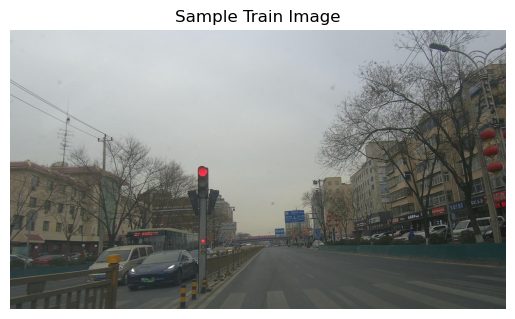

In [14]:
import cv2
import matplotlib.pyplot as plt

# Show one image from train
img = cv2.imread(train_image[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Sample Train Image")
plt.axis('off')
plt.show()

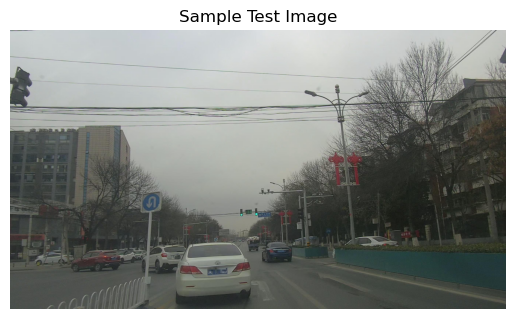

In [28]:
import cv2
import matplotlib.pyplot as plt

# Show one image from train
img = cv2.imread(test_image[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Sample Test Image")
plt.axis('off')
plt.show()

In [15]:
import cv2
import numpy as np
import os
import random
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from ultralytics import YOLO
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

D:\New folder\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [16]:
datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate images by 20 degrees
    width_shift_range=0.2,   # Shift images horizontally
    height_shift_range=0.2,  # Shift images vertically
    shear_range=0.15,        # Shear transformations
    zoom_range=0.2,          # Zoom into images
    horizontal_flip=True,    # Flip horizontally
    brightness_range=[0.5, 1.5], # Vary brightness
    fill_mode='nearest'      # Fill missing pixels
)

In [17]:
# Path to dataset
train_path = "traffic_dataset/train_dataset/train_images"
save_augmented_path = "traffic_dataset/augmented_train"

# Create directory to save augmented images
os.makedirs(save_augmented_path, exist_ok=True)

# Load images
image_files = glob.glob(os.path.join(train_path, "*.jpg"))  # Modify for PNG/JPEG

for img_path in image_files:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

    img = np.expand_dims(img, axis=0)  # Add batch dimension for generator

    # Generate 5 augmented images per original image
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=save_augmented_path,
                              save_prefix="aug", save_format="jpg"):
        i += 1
        if i >= 5:  # Generate only 5 augmentations per image
            break

print(f"Augmentation completed! Augmented images saved in {save_augmented_path}")


KeyboardInterrupt: 

In [ ]:
augmented_images = glob.glob(os.path.join(save_augmented_path, "*.jpg"))

# Display a few augmented images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    img = cv2.imread(augmented_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].axis("off")

plt.show()

In [32]:
def detect_lanes(image):
    # Resize for consistent processing
    image = cv2.resize(image, (640, 480))

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection using Canny
    edges = cv2.Canny(blur, 50, 150)

    # Create a mask for region of interest
    mask = np.zeros_like(edges)
    height, width = edges.shape
    polygon = np.array([[
        (0, height),
        (width, height),
        (width // 2 + 50, height // 2 + 60),
        (width // 2 - 50, height // 2 + 60),
    ]], np.int32)

    cv2.fillPoly(mask, polygon, 255)
    cropped_edges = cv2.bitwise_and(edges, mask)

    # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(
        cropped_edges,
        rho=2,
        theta=np.pi / 180,
        threshold=50,
        minLineLength=40,
        maxLineGap=100
    )

    line_image = np.zeros_like(image)

    # Draw lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

    # Overlay lines on original image
    combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)

    return combo_image


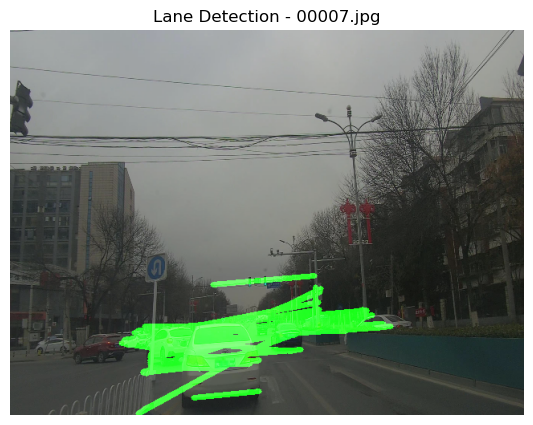

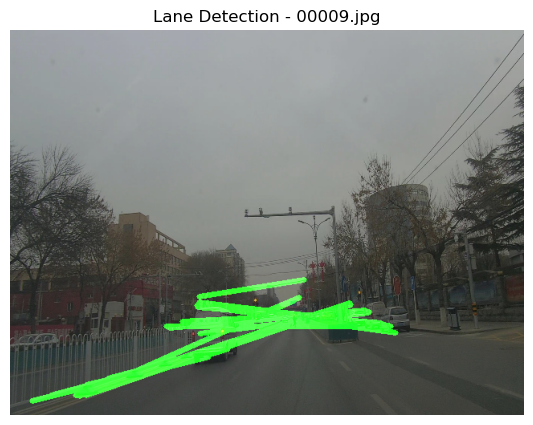

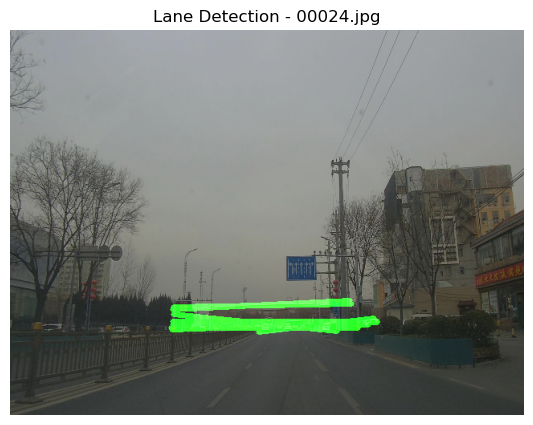

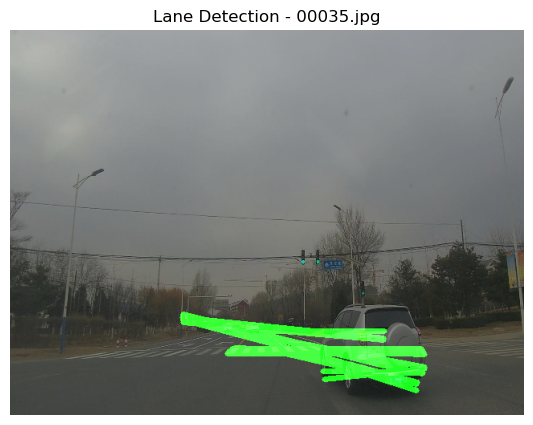

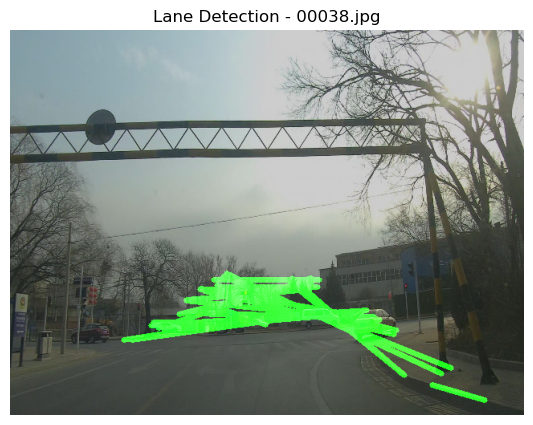

In [33]:
# Update with your actual dataset path
image_paths = glob.glob("traffic_dataset/test_dataset/test_images/*.jpg")

for img_path in image_paths[:5]:  # Test on first 5 images
    image = cv2.imread(img_path)
    lanes_image = detect_lanes(image)

    # Show output
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(lanes_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Lane Detection - {os.path.basename(img_path)}")
    plt.axis("off")
    plt.show()


In [34]:
output_dir = "lane_detected_images"
os.makedirs(output_dir, exist_ok=True)

for img_path in image_paths:
    image = cv2.imread(img_path)
    lanes_image = detect_lanes(image)
    
    filename = os.path.basename(img_path)
    cv2.imwrite(os.path.join(output_dir, filename), lanes_image)


In [18]:
model = YOLO("yolov8n.pt")

# Define lane polygons manually or from Hough lines
lane_polygons = [
    [(100, 480), (250, 300), (350, 300), (500, 480)],  # Example lane polygon
    # Add more for multi-lane roads
]

def is_in_lane(center, lanes):
    for poly in lanes:
        if cv2.pointPolygonTest(np.array(poly, dtype=np.int32), center, False) >= 0:
            return True
    return False

image = cv2.imread("your_image.jpg")
results = model(image)

# Draw lanes
for poly in lane_polygons:
    cv2.polylines(image, [np.array(poly)], isClosed=True, color=(0, 255, 0), thickness=2)

for box, cls in zip(results[0].boxes.xyxy, results[0].boxes.cls):
    class_name = model.names[int(cls)]
    if class_name in ['car', 'truck', 'bus', 'motorcycle']:
        x1, y1, x2, y2 = map(int, box)
        center = ((x1 + x2) // 2, (y1 + y2) // 2)
        
        if not is_in_lane(center, lane_polygons):
            # Wrong lane
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(image, "WRONG LANE", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        else:
            # Correct lane
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2.imshow("Result", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 12.5MB/s]


FileNotFoundError: [Errno 2] No such file or directory: 'your_image.jpg'

In [19]:
# Load YOLOv8 pre-trained model
model = YOLO("yolov8n.pt")  # Use "yolov8s.pt" for better accuracy

# Define vehicle classes
vehicle_classes = ['car', 'bus', 'truck', 'motorcycle']

# Define dataset paths
train_path = "traffic_dataset/train_dataset/train_images"
test_path = "traffic_dataset/test_dataset/test_images"

# Function to determine congestion level
def get_congestion_level(vehicle_count):
    if vehicle_count < 5:
        return "Low"
    elif 5 <= vehicle_count < 15:
        return "Medium"
    else:
        return "High"

# Function to get vehicle count for each image
def count_vehicles(image_path):
    img = cv2.imread(image_path)  # Load image
    if img is None:
        return None, None  # Skip if image cannot be loaded

    results = model(img)  # Run YOLO detection
    vehicle_count = sum([1 for c in results[0].boxes.cls if model.names[int(c)] in vehicle_classes])
    
    congestion_level = get_congestion_level(vehicle_count)  # Get congestion level
    return vehicle_count, congestion_level

# Process all images in a folder
def process_dataset(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png"))]
    data = []
    
    for image_file in tqdm(image_files, desc=f"Processing {folder_path}"):
        image_path = os.path.join(folder_path, image_file)
        count, congestion = count_vehicles(image_path)
        if count is not None:
            data.append({"image": image_file, "vehicle_count": count, "congestion_level": congestion})
    
    return pd.DataFrame(data)

# Run on train & test sets
train_data = process_dataset(train_path)
test_data = process_dataset(test_path)

# Save results to CSV
train_data.to_csv("train_vehicle_counts.csv", index=False)
test_data.to_csv("test_vehicle_counts.csv", index=False)

print("Vehicle count and congestion level data saved successfully!")

Processing traffic_dataset/train_dataset/train_images:   0%|                                  | 0/2600 [00:00<?, ?it/s]


0: 384x640 4 cars, 1 bus, 3 traffic lights, 135.0ms
Speed: 7.1ms preprocess, 135.0ms inference, 8.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                        | 1/2600 [00:02<1:37:05,  2.24s/it]


0: 384x640 7 cars, 1 bus, 3 traffic lights, 91.2ms
Speed: 3.6ms preprocess, 91.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                          | 2/2600 [00:02<43:11,  1.00it/s]


0: 384x640 3 cars, 83.8ms
Speed: 3.4ms preprocess, 83.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                          | 3/2600 [00:02<25:49,  1.68it/s]


0: 384x640 3 cars, 69.0ms
Speed: 3.1ms preprocess, 69.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                          | 4/2600 [00:02<17:23,  2.49it/s]


0: 384x640 1 car, 69.9ms
Speed: 2.9ms preprocess, 69.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                          | 5/2600 [00:02<12:45,  3.39it/s]


0: 384x640 1 car, 84.8ms
Speed: 3.0ms preprocess, 84.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                          | 6/2600 [00:02<10:09,  4.25it/s]


0: 384x640 2 persons, 4 cars, 1 traffic light, 82.9ms
Speed: 3.4ms preprocess, 82.9ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                          | 7/2600 [00:02<08:32,  5.06it/s]


0: 384x640 3 cars, 1 traffic light, 77.8ms
Speed: 3.3ms preprocess, 77.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                          | 8/2600 [00:03<07:20,  5.88it/s]


0: 384x640 3 cars, 1 traffic light, 69.6ms
Speed: 2.6ms preprocess, 69.6ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                          | 9/2600 [00:03<06:26,  6.70it/s]


0: 384x640 5 persons, 5 cars, 2 traffic lights, 81.7ms
Speed: 2.8ms preprocess, 81.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                         | 10/2600 [00:03<06:00,  7.19it/s]


0: 384x640 15 cars, 80.9ms
Speed: 2.9ms preprocess, 80.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                         | 11/2600 [00:03<05:42,  7.56it/s]


0: 384x640 7 cars, 1 bus, 84.0ms
Speed: 4.4ms preprocess, 84.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|                         | 12/2600 [00:03<05:32,  7.79it/s]


0: 384x640 1 car, 3 trucks, 70.4ms
Speed: 2.7ms preprocess, 70.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   0%|▏                        | 13/2600 [00:03<05:12,  8.27it/s]


0: 384x640 7 cars, 1 bus, 1 truck, 74.8ms
Speed: 2.8ms preprocess, 74.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 14/2600 [00:03<05:02,  8.56it/s]


0: 384x640 2 persons, 6 cars, 1 motorcycle, 1 bus, 78.4ms
Speed: 2.5ms preprocess, 78.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 15/2600 [00:03<04:57,  8.68it/s]


0: 384x640 3 cars, 1 bus, 1 traffic light, 82.4ms
Speed: 2.9ms preprocess, 82.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 16/2600 [00:03<05:00,  8.61it/s]


0: 384x640 5 cars, 1 bus, 1 traffic light, 70.3ms
Speed: 2.7ms preprocess, 70.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 17/2600 [00:04<04:48,  8.94it/s]


0: 384x640 1 person, 5 cars, 1 bus, 1 traffic light, 64.5ms
Speed: 2.4ms preprocess, 64.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 3 cars, 1 motorcycle, 1 bus, 70.8ms
Speed: 2.5ms preprocess, 70.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 19/2600 [00:04<04:32,  9.48it/s]


0: 384x640 1 bicycle, 1 car, 1 traffic light, 1 stop sign, 84.3ms
Speed: 2.5ms preprocess, 84.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 20/2600 [00:04<04:39,  9.24it/s]


0: 384x640 2 persons, 8 cars, 1 bus, 1 truck, 79.5ms
Speed: 2.3ms preprocess, 79.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 21/2600 [00:04<04:43,  9.08it/s]


0: 384x640 6 cars, 1 bus, 2 trucks, 1 traffic light, 66.8ms
Speed: 2.5ms preprocess, 66.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 1 truck, 1 kite, 75.0ms
Speed: 2.3ms preprocess, 75.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 23/2600 [00:04<04:39,  9.21it/s]


0: 384x640 4 cars, 87.0ms
Speed: 3.9ms preprocess, 87.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 24/2600 [00:04<04:54,  8.76it/s]


0: 384x640 1 person, 2 cars, 2 traffic lights, 77.8ms
Speed: 2.4ms preprocess, 77.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▏                        | 25/2600 [00:04<04:58,  8.63it/s]


0: 384x640 4 cars, 2 traffic lights, 68.1ms
Speed: 2.4ms preprocess, 68.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 26/2600 [00:05<04:54,  8.75it/s]


0: 384x640 3 cars, 64.6ms
Speed: 2.5ms preprocess, 64.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 27/2600 [00:05<04:49,  8.87it/s]


0: 384x640 3 cars, 82.3ms
Speed: 3.0ms preprocess, 82.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 28/2600 [00:05<05:00,  8.56it/s]


0: 384x640 5 cars, 2 traffic lights, 86.4ms
Speed: 2.3ms preprocess, 86.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 29/2600 [00:05<05:11,  8.26it/s]


0: 384x640 4 cars, 2 traffic lights, 69.0ms
Speed: 2.5ms preprocess, 69.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 30/2600 [00:05<05:08,  8.33it/s]


0: 384x640 5 cars, 2 traffic lights, 69.3ms
Speed: 2.8ms preprocess, 69.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 31/2600 [00:05<05:00,  8.56it/s]


0: 384x640 1 person, 5 cars, 4 traffic lights, 68.4ms
Speed: 3.2ms preprocess, 68.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 32/2600 [00:05<04:52,  8.77it/s]


0: 384x640 3 persons, 5 cars, 3 traffic lights, 76.6ms
Speed: 2.7ms preprocess, 76.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 33/2600 [00:05<04:56,  8.66it/s]


0: 384x640 1 car, 2 traffic lights, 73.6ms
Speed: 3.4ms preprocess, 73.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 34/2600 [00:05<04:57,  8.64it/s]


0: 384x640 1 car, 72.4ms
Speed: 2.7ms preprocess, 72.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 35/2600 [00:06<04:55,  8.69it/s]


0: 384x640 3 cars, 2 traffic lights, 70.6ms
Speed: 2.4ms preprocess, 70.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 36/2600 [00:06<04:54,  8.70it/s]


0: 384x640 1 car, 1 traffic light, 72.6ms
Speed: 3.4ms preprocess, 72.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 37/2600 [00:06<04:50,  8.83it/s]


0: 384x640 1 car, 1 traffic light, 73.6ms
Speed: 2.4ms preprocess, 73.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   1%|▎                        | 38/2600 [00:06<04:50,  8.82it/s]


0: 384x640 2 persons, 4 cars, 3 traffic lights, 70.9ms
Speed: 2.4ms preprocess, 70.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 39/2600 [00:06<04:49,  8.85it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 74.2ms
Speed: 2.4ms preprocess, 74.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 40/2600 [00:06<04:51,  8.79it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 76.0ms
Speed: 2.5ms preprocess, 76.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 41/2600 [00:06<04:54,  8.68it/s]


0: 384x640 3 cars, 1 traffic light, 68.3ms
Speed: 2.0ms preprocess, 68.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 42/2600 [00:06<04:50,  8.81it/s]


0: 384x640 6 cars, 2 traffic lights, 71.1ms
Speed: 2.4ms preprocess, 71.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 43/2600 [00:07<04:51,  8.78it/s]


0: 384x640 1 person, 1 bicycle, 3 cars, 63.3ms
Speed: 2.5ms preprocess, 63.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 44/2600 [00:07<04:46,  8.93it/s]


0: 384x640 2 cars, 1 traffic light, 66.9ms
Speed: 2.7ms preprocess, 66.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 45/2600 [00:07<04:47,  8.87it/s]


0: 384x640 2 cars, 4 traffic lights, 69.4ms
Speed: 2.2ms preprocess, 69.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 46/2600 [00:07<04:47,  8.89it/s]


0: 384x640 1 car, 72.0ms
Speed: 2.2ms preprocess, 72.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 47/2600 [00:07<04:48,  8.84it/s]


0: 384x640 1 traffic light, 70.3ms
Speed: 2.6ms preprocess, 70.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 48/2600 [00:07<04:51,  8.76it/s]


0: 384x640 1 car, 1 traffic light, 68.3ms
Speed: 2.3ms preprocess, 68.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 49/2600 [00:07<04:50,  8.80it/s]


0: 384x640 5 persons, 6 cars, 1 motorcycle, 3 traffic lights, 72.5ms
Speed: 2.5ms preprocess, 72.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 50/2600 [00:07<04:52,  8.73it/s]


0: 384x640 3 persons, 4 cars, 1 traffic light, 70.6ms
Speed: 2.3ms preprocess, 70.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▍                        | 51/2600 [00:07<04:54,  8.64it/s]


0: 384x640 13 cars, 2 traffic lights, 72.4ms
Speed: 2.7ms preprocess, 72.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 52/2600 [00:08<04:56,  8.60it/s]


0: 384x640 2 persons, 3 cars, 77.4ms
Speed: 2.7ms preprocess, 77.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 53/2600 [00:08<05:02,  8.43it/s]


0: 384x640 3 bicycles, 6 cars, 67.2ms
Speed: 2.5ms preprocess, 67.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 54/2600 [00:08<04:56,  8.59it/s]


0: 384x640 1 person, 1 car, 2 traffic lights, 86.4ms
Speed: 2.4ms preprocess, 86.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 55/2600 [00:08<05:07,  8.26it/s]


0: 384x640 2 cars, 1 traffic light, 76.0ms
Speed: 2.6ms preprocess, 76.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 56/2600 [00:08<05:10,  8.19it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 70.8ms
Speed: 2.5ms preprocess, 70.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 57/2600 [00:08<05:06,  8.29it/s]


0: 384x640 1 truck, 67.3ms
Speed: 2.4ms preprocess, 67.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 58/2600 [00:08<05:01,  8.44it/s]


0: 384x640 (no detections), 79.5ms
Speed: 2.7ms preprocess, 79.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 59/2600 [00:08<05:04,  8.33it/s]


0: 384x640 2 persons, 3 traffic lights, 76.6ms
Speed: 2.4ms preprocess, 76.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 60/2600 [00:09<05:05,  8.30it/s]


0: 384x640 5 cars, 4 traffic lights, 75.2ms
Speed: 2.2ms preprocess, 75.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 61/2600 [00:09<05:06,  8.28it/s]


0: 384x640 10 cars, 3 traffic lights, 1 stop sign, 71.1ms
Speed: 2.6ms preprocess, 71.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 62/2600 [00:09<05:02,  8.38it/s]


0: 384x640 3 persons, 9 cars, 1 bus, 1 traffic light, 70.1ms
Speed: 2.1ms preprocess, 70.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 63/2600 [00:09<04:59,  8.46it/s]


0: 384x640 10 cars, 77.6ms
Speed: 2.1ms preprocess, 77.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▌                        | 64/2600 [00:09<05:03,  8.37it/s]


0: 384x640 4 persons, 10 cars, 1 truck, 67.7ms
Speed: 2.9ms preprocess, 67.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   2%|▋                        | 65/2600 [00:09<05:00,  8.45it/s]


0: 384x640 4 persons, 8 cars, 1 motorcycle, 78.6ms
Speed: 3.5ms preprocess, 78.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 66/2600 [00:09<05:04,  8.32it/s]


0: 384x640 4 persons, 1 bicycle, 2 cars, 1 bus, 96.2ms
Speed: 2.5ms preprocess, 96.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 67/2600 [00:09<05:21,  7.87it/s]


0: 384x640 3 cars, 1 traffic light, 80.0ms
Speed: 4.1ms preprocess, 80.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 68/2600 [00:10<05:31,  7.64it/s]


0: 384x640 4 cars, 76.1ms
Speed: 2.3ms preprocess, 76.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 69/2600 [00:10<05:24,  7.81it/s]


0: 384x640 6 cars, 1 bus, 75.8ms
Speed: 2.3ms preprocess, 75.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 70/2600 [00:10<05:15,  8.02it/s]


0: 384x640 1 person, 4 cars, 69.0ms
Speed: 2.4ms preprocess, 69.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 71/2600 [00:10<05:03,  8.32it/s]


0: 384x640 3 cars, 2 traffic lights, 68.7ms
Speed: 2.2ms preprocess, 68.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 72/2600 [00:10<05:01,  8.40it/s]


0: 384x640 7 cars, 1 traffic light, 81.0ms
Speed: 2.7ms preprocess, 81.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 73/2600 [00:10<05:10,  8.14it/s]


0: 384x640 2 persons, 4 cars, 1 handbag, 76.1ms
Speed: 2.6ms preprocess, 76.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 74/2600 [00:10<05:08,  8.18it/s]


0: 384x640 9 cars, 2 traffic lights, 72.0ms
Speed: 2.5ms preprocess, 72.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 75/2600 [00:10<05:00,  8.40it/s]


0: 384x640 1 car, 74.5ms
Speed: 2.4ms preprocess, 74.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 76/2600 [00:10<04:56,  8.51it/s]


0: 384x640 3 cars, 75.6ms
Speed: 2.8ms preprocess, 75.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▋                        | 77/2600 [00:11<04:59,  8.42it/s]


0: 384x640 2 persons, 8 cars, 1 truck, 1 traffic light, 71.0ms
Speed: 2.3ms preprocess, 71.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 78/2600 [00:11<04:57,  8.47it/s]


0: 384x640 5 cars, 2 traffic lights, 66.5ms
Speed: 2.4ms preprocess, 66.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 79/2600 [00:11<04:50,  8.68it/s]


0: 384x640 2 cars, 70.0ms
Speed: 2.4ms preprocess, 70.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 80/2600 [00:11<04:49,  8.69it/s]


0: 384x640 5 cars, 1 traffic light, 80.2ms
Speed: 2.4ms preprocess, 80.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 81/2600 [00:11<04:59,  8.42it/s]


0: 384x640 3 cars, 1 traffic light, 69.9ms
Speed: 2.2ms preprocess, 69.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 82/2600 [00:11<04:57,  8.46it/s]


0: 384x640 2 cars, 82.1ms
Speed: 4.0ms preprocess, 82.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 83/2600 [00:11<05:03,  8.28it/s]


0: 384x640 9 cars, 70.7ms
Speed: 2.5ms preprocess, 70.7ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 84/2600 [00:11<05:02,  8.33it/s]


0: 384x640 4 cars, 70.4ms
Speed: 2.2ms preprocess, 70.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 85/2600 [00:12<04:57,  8.44it/s]


0: 384x640 6 cars, 1 truck, 2 traffic lights, 66.5ms
Speed: 2.1ms preprocess, 66.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 86/2600 [00:12<04:52,  8.59it/s]


0: 384x640 2 cars, 72.4ms
Speed: 3.3ms preprocess, 72.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 87/2600 [00:12<04:53,  8.55it/s]


0: 384x640 1 car, 1 truck, 77.8ms
Speed: 2.9ms preprocess, 77.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 88/2600 [00:12<04:59,  8.40it/s]


0: 384x640 5 cars, 82.7ms
Speed: 2.3ms preprocess, 82.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 89/2600 [00:12<05:08,  8.14it/s]


0: 384x640 6 cars, 1 bench, 73.7ms
Speed: 2.6ms preprocess, 73.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   3%|▊                        | 90/2600 [00:12<05:03,  8.27it/s]


0: 384x640 1 person, 10 cars, 1 traffic light, 69.3ms
Speed: 2.9ms preprocess, 69.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                        | 91/2600 [00:12<04:57,  8.44it/s]


0: 384x640 4 cars, 1 bus, 68.2ms
Speed: 2.6ms preprocess, 68.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                        | 92/2600 [00:12<04:51,  8.62it/s]


0: 384x640 9 cars, 73.6ms
Speed: 3.4ms preprocess, 73.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                        | 93/2600 [00:12<04:51,  8.61it/s]


0: 384x640 3 cars, 1 bus, 1 truck, 68.0ms
Speed: 3.0ms preprocess, 68.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                        | 94/2600 [00:13<04:52,  8.58it/s]


0: 384x640 5 cars, 1 bus, 2 traffic lights, 76.4ms
Speed: 2.4ms preprocess, 76.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                        | 95/2600 [00:13<04:54,  8.49it/s]


0: 384x640 5 cars, 1 truck, 1 traffic light, 74.3ms
Speed: 3.3ms preprocess, 74.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                        | 96/2600 [00:13<04:55,  8.48it/s]


0: 384x640 6 cars, 1 traffic light, 71.3ms
Speed: 2.7ms preprocess, 71.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                        | 97/2600 [00:13<04:53,  8.52it/s]


0: 384x640 8 cars, 76.8ms
Speed: 3.2ms preprocess, 76.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                        | 98/2600 [00:13<04:58,  8.37it/s]


0: 384x640 7 cars, 1 traffic light, 68.4ms
Speed: 2.4ms preprocess, 68.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                        | 99/2600 [00:13<04:55,  8.48it/s]


0: 384x640 2 cars, 2 clocks, 74.7ms
Speed: 2.4ms preprocess, 74.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                       | 100/2600 [00:13<04:58,  8.38it/s]


0: 384x640 11 cars, 2 traffic lights, 76.1ms
Speed: 2.4ms preprocess, 76.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                       | 101/2600 [00:13<05:03,  8.23it/s]


0: 384x640 2 persons, 4 cars, 66.9ms
Speed: 2.9ms preprocess, 66.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                       | 102/2600 [00:14<04:58,  8.37it/s]


0: 384x640 4 cars, 1 traffic light, 70.4ms
Speed: 2.6ms preprocess, 70.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                       | 103/2600 [00:14<04:54,  8.48it/s]


0: 384x640 2 cars, 1 traffic light, 66.2ms
Speed: 2.3ms preprocess, 66.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                       | 104/2600 [00:14<04:46,  8.72it/s]


0: 384x640 6 persons, 5 cars, 1 traffic light, 65.9ms
Speed: 2.8ms preprocess, 65.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                       | 105/2600 [00:14<04:43,  8.82it/s]


0: 384x640 3 persons, 8 cars, 2 motorcycles, 66.8ms
Speed: 2.1ms preprocess, 66.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                       | 106/2600 [00:14<04:43,  8.79it/s]


0: 384x640 5 cars, 1 truck, 89.3ms
Speed: 2.7ms preprocess, 89.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                       | 107/2600 [00:14<05:02,  8.23it/s]


0: 384x640 2 persons, 10 cars, 71.1ms
Speed: 3.1ms preprocess, 71.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|▉                       | 108/2600 [00:14<04:59,  8.33it/s]


0: 384x640 1 person, 7 cars, 1 bus, 68.8ms
Speed: 2.3ms preprocess, 68.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|█                       | 109/2600 [00:14<04:51,  8.56it/s]


0: 384x640 4 persons, 2 cars, 2 motorcycles, 1 traffic light, 70.6ms
Speed: 2.3ms preprocess, 70.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|█                       | 110/2600 [00:14<04:48,  8.64it/s]


0: 384x640 12 cars, 2 traffic lights, 68.3ms
Speed: 2.4ms preprocess, 68.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|█                       | 111/2600 [00:15<04:44,  8.76it/s]


0: 384x640 3 cars, 64.6ms
Speed: 3.1ms preprocess, 64.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|█                       | 112/2600 [00:15<04:38,  8.94it/s]


0: 384x640 7 cars, 72.1ms
Speed: 3.0ms preprocess, 72.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|█                       | 113/2600 [00:15<04:41,  8.83it/s]


0: 384x640 6 cars, 76.0ms
Speed: 2.4ms preprocess, 76.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|█                       | 114/2600 [00:15<04:45,  8.71it/s]


0: 384x640 1 person, 7 cars, 70.1ms
Speed: 2.5ms preprocess, 70.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|█                       | 115/2600 [00:15<04:48,  8.62it/s]


0: 384x640 3 cars, 1 traffic light, 71.1ms
Speed: 2.3ms preprocess, 71.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|█                       | 116/2600 [00:15<04:47,  8.63it/s]


0: 384x640 2 cars, 1 traffic light, 68.5ms
Speed: 2.1ms preprocess, 68.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   4%|█                       | 117/2600 [00:15<04:43,  8.76it/s]


0: 384x640 3 persons, 12 cars, 3 traffic lights, 82.4ms
Speed: 2.9ms preprocess, 82.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█                       | 118/2600 [00:15<04:53,  8.47it/s]


0: 384x640 2 persons, 1 bicycle, 5 cars, 72.1ms
Speed: 3.2ms preprocess, 72.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█                       | 119/2600 [00:15<04:50,  8.54it/s]


0: 384x640 1 car, 1 truck, 73.4ms
Speed: 2.6ms preprocess, 73.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█                       | 120/2600 [00:16<04:53,  8.45it/s]


0: 384x640 5 cars, 1 train, 1 truck, 81.9ms
Speed: 2.5ms preprocess, 81.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█                       | 121/2600 [00:16<04:57,  8.34it/s]


0: 384x640 4 cars, 1 bus, 1 traffic light, 1 stop sign, 82.6ms
Speed: 3.8ms preprocess, 82.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 122/2600 [00:16<05:03,  8.15it/s]


0: 384x640 3 cars, 1 traffic light, 76.2ms
Speed: 2.5ms preprocess, 76.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 123/2600 [00:16<05:03,  8.15it/s]


0: 384x640 1 person, 73.5ms
Speed: 2.4ms preprocess, 73.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 124/2600 [00:16<05:01,  8.22it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 72.7ms
Speed: 2.3ms preprocess, 72.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 125/2600 [00:16<04:57,  8.32it/s]


0: 384x640 3 cars, 1 traffic light, 77.8ms
Speed: 2.4ms preprocess, 77.8ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 126/2600 [00:16<05:00,  8.24it/s]


0: 384x640 2 traffic lights, 77.2ms
Speed: 2.5ms preprocess, 77.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 127/2600 [00:16<05:00,  8.24it/s]


0: 384x640 3 cars, 1 train, 1 truck, 2 traffic lights, 66.5ms
Speed: 3.2ms preprocess, 66.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 128/2600 [00:17<04:55,  8.38it/s]


0: 384x640 2 cars, 1 bus, 2 trucks, 68.2ms
Speed: 2.2ms preprocess, 68.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 129/2600 [00:17<04:48,  8.58it/s]


0: 384x640 1 person, 3 cars, 1 bus, 71.0ms
Speed: 2.1ms preprocess, 71.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 130/2600 [00:17<04:44,  8.69it/s]


0: 384x640 2 persons, 6 cars, 73.4ms
Speed: 2.3ms preprocess, 73.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 131/2600 [00:17<04:43,  8.70it/s]


0: 384x640 4 cars, 1 traffic light, 1 clock, 87.0ms
Speed: 3.9ms preprocess, 87.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 132/2600 [00:17<05:06,  8.05it/s]


0: 384x640 2 persons, 4 cars, 1 bus, 1 truck, 3 traffic lights, 64.2ms
Speed: 2.4ms preprocess, 64.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 133/2600 [00:17<04:55,  8.34it/s]


0: 384x640 2 persons, 7 cars, 2 trucks, 1 traffic light, 68.8ms
Speed: 2.8ms preprocess, 68.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 134/2600 [00:17<04:50,  8.50it/s]


0: 384x640 7 cars, 2 traffic lights, 75.7ms
Speed: 2.6ms preprocess, 75.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▏                      | 135/2600 [00:17<04:52,  8.41it/s]


0: 384x640 2 cars, 2 traffic lights, 75.8ms
Speed: 2.5ms preprocess, 75.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▎                      | 136/2600 [00:18<04:53,  8.40it/s]


0: 384x640 4 cars, 1 bus, 1 kite, 72.3ms
Speed: 2.3ms preprocess, 72.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▎                      | 137/2600 [00:18<04:50,  8.48it/s]


0: 384x640 1 car, 74.0ms
Speed: 2.5ms preprocess, 74.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▎                      | 138/2600 [00:18<04:48,  8.54it/s]


0: 384x640 9 cars, 2 traffic lights, 70.1ms
Speed: 2.9ms preprocess, 70.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▎                      | 139/2600 [00:18<04:49,  8.51it/s]


0: 384x640 3 cars, 75.0ms
Speed: 3.1ms preprocess, 75.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▎                      | 140/2600 [00:18<04:51,  8.44it/s]


0: 384x640 7 cars, 1 traffic light, 71.0ms
Speed: 3.1ms preprocess, 71.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▎                      | 141/2600 [00:18<04:49,  8.51it/s]


0: 384x640 2 cars, 75.9ms
Speed: 2.6ms preprocess, 75.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   5%|█▎                      | 142/2600 [00:18<04:51,  8.44it/s]


0: 384x640 1 car, 1 truck, 73.5ms
Speed: 2.3ms preprocess, 73.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▎                      | 143/2600 [00:18<04:49,  8.49it/s]


0: 384x640 1 car, 1 boat, 69.9ms
Speed: 2.3ms preprocess, 69.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▎                      | 144/2600 [00:18<04:46,  8.59it/s]


0: 384x640 8 cars, 78.9ms
Speed: 2.3ms preprocess, 78.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▎                      | 145/2600 [00:19<04:48,  8.52it/s]


0: 384x640 4 cars, 75.3ms
Speed: 2.5ms preprocess, 75.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▎                      | 146/2600 [00:19<04:51,  8.43it/s]


0: 384x640 4 cars, 3 traffic lights, 73.8ms
Speed: 2.7ms preprocess, 73.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▎                      | 147/2600 [00:19<04:50,  8.45it/s]


0: 384x640 4 persons, 5 cars, 2 motorcycles, 72.6ms
Speed: 2.5ms preprocess, 72.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▎                      | 148/2600 [00:19<04:51,  8.42it/s]


0: 384x640 3 persons, 1 car, 1 truck, 3 traffic lights, 73.1ms
Speed: 2.6ms preprocess, 73.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 149/2600 [00:19<04:51,  8.42it/s]


0: 384x640 1 person, 5 cars, 2 traffic lights, 71.4ms
Speed: 2.7ms preprocess, 71.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 150/2600 [00:19<04:49,  8.46it/s]


0: 384x640 2 cars, 74.4ms
Speed: 2.7ms preprocess, 74.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 151/2600 [00:19<04:47,  8.52it/s]


0: 384x640 1 person, 7 cars, 2 motorcycles, 73.1ms
Speed: 2.4ms preprocess, 73.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 152/2600 [00:19<04:49,  8.45it/s]


0: 384x640 4 cars, 1 traffic light, 72.2ms
Speed: 2.8ms preprocess, 72.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 153/2600 [00:20<04:47,  8.51it/s]


0: 384x640 1 person, 1 car, 66.5ms
Speed: 2.3ms preprocess, 66.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 154/2600 [00:20<04:40,  8.71it/s]


0: 384x640 1 person, 2 cars, 2 trucks, 3 traffic lights, 82.5ms
Speed: 2.5ms preprocess, 82.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 155/2600 [00:20<04:46,  8.53it/s]


0: 384x640 8 cars, 1 traffic light, 71.6ms
Speed: 2.4ms preprocess, 71.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 156/2600 [00:20<04:44,  8.59it/s]


0: 384x640 7 cars, 3 traffic lights, 72.3ms
Speed: 2.4ms preprocess, 72.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 157/2600 [00:20<04:40,  8.70it/s]


0: 384x640 6 cars, 1 bus, 1 truck, 72.9ms
Speed: 2.2ms preprocess, 72.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 158/2600 [00:20<04:44,  8.59it/s]


0: 384x640 4 cars, 63.7ms
Speed: 2.3ms preprocess, 63.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 159/2600 [00:20<04:39,  8.75it/s]


0: 384x640 1 person, 2 cars, 1 truck, 73.7ms
Speed: 4.2ms preprocess, 73.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 160/2600 [00:20<04:44,  8.59it/s]


0: 384x640 1 bicycle, 3 cars, 1 traffic light, 69.0ms
Speed: 2.3ms preprocess, 69.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 161/2600 [00:20<04:40,  8.68it/s]


0: 384x640 4 cars, 1 traffic light, 69.8ms
Speed: 3.2ms preprocess, 69.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▍                      | 162/2600 [00:21<04:39,  8.72it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 1 truck, 1 traffic light, 66.6ms
Speed: 2.7ms preprocess, 66.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▌                      | 163/2600 [00:21<04:34,  8.86it/s]


0: 384x640 3 cars, 1 bird, 68.5ms
Speed: 2.6ms preprocess, 68.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▌                      | 164/2600 [00:21<04:33,  8.92it/s]


0: 384x640 3 cars, 1 traffic light, 74.7ms
Speed: 3.1ms preprocess, 74.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▌                      | 165/2600 [00:21<04:39,  8.70it/s]


0: 384x640 3 cars, 71.4ms
Speed: 2.2ms preprocess, 71.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▌                      | 166/2600 [00:21<04:37,  8.78it/s]


0: 384x640 1 car, 71.2ms
Speed: 2.8ms preprocess, 71.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▌                      | 167/2600 [00:21<04:36,  8.81it/s]


0: 384x640 3 cars, 76.0ms
Speed: 2.4ms preprocess, 76.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▌                      | 168/2600 [00:21<04:38,  8.74it/s]


0: 384x640 4 cars, 76.8ms
Speed: 2.4ms preprocess, 76.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   6%|█▌                      | 169/2600 [00:21<04:42,  8.61it/s]


0: 384x640 1 car, 1 traffic light, 72.0ms
Speed: 2.7ms preprocess, 72.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▌                      | 170/2600 [00:21<04:43,  8.58it/s]


0: 384x640 4 cars, 4 traffic lights, 72.2ms
Speed: 2.7ms preprocess, 72.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▌                      | 171/2600 [00:22<04:45,  8.51it/s]


0: 384x640 1 car, 1 truck, 4 traffic lights, 74.0ms
Speed: 2.3ms preprocess, 74.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▌                      | 172/2600 [00:22<04:44,  8.53it/s]


0: 384x640 1 car, 1 traffic light, 65.7ms
Speed: 2.5ms preprocess, 65.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▌                      | 173/2600 [00:22<04:38,  8.70it/s]


0: 384x640 1 bus, 69.2ms
Speed: 2.3ms preprocess, 69.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▌                      | 174/2600 [00:22<04:34,  8.83it/s]


0: 384x640 1 car, 1 traffic light, 71.5ms
Speed: 2.6ms preprocess, 71.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▌                      | 175/2600 [00:22<04:35,  8.79it/s]


0: 384x640 5 cars, 2 traffic lights, 70.3ms
Speed: 2.4ms preprocess, 70.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▌                      | 176/2600 [00:22<04:39,  8.68it/s]


0: 384x640 5 cars, 68.3ms
Speed: 2.4ms preprocess, 68.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 177/2600 [00:22<04:36,  8.76it/s]


0: 384x640 4 cars, 70.4ms
Speed: 2.5ms preprocess, 70.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 178/2600 [00:22<04:35,  8.80it/s]


0: 384x640 3 cars, 1 traffic light, 69.2ms
Speed: 3.3ms preprocess, 69.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 179/2600 [00:23<04:40,  8.62it/s]


0: 384x640 7 cars, 2 traffic lights, 65.4ms
Speed: 2.2ms preprocess, 65.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 180/2600 [00:23<04:37,  8.72it/s]


0: 384x640 1 car, 2 traffic lights, 67.2ms
Speed: 2.0ms preprocess, 67.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 181/2600 [00:23<04:36,  8.75it/s]


0: 384x640 1 car, 2 traffic lights, 71.8ms
Speed: 3.4ms preprocess, 71.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 182/2600 [00:23<04:39,  8.64it/s]


0: 384x640 1 car, 1 traffic light, 81.0ms
Speed: 2.2ms preprocess, 81.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 183/2600 [00:23<04:45,  8.47it/s]


0: 384x640 1 person, 4 cars, 74.7ms
Speed: 2.2ms preprocess, 74.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 184/2600 [00:23<04:47,  8.42it/s]


0: 384x640 2 cars, 69.4ms
Speed: 2.0ms preprocess, 69.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 185/2600 [00:23<04:49,  8.34it/s]


0: 384x640 6 cars, 64.8ms
Speed: 2.3ms preprocess, 64.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 186/2600 [00:23<04:39,  8.63it/s]


0: 384x640 1 person, 7 cars, 1 truck, 3 traffic lights, 74.2ms
Speed: 2.9ms preprocess, 74.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 187/2600 [00:23<04:40,  8.60it/s]


0: 384x640 3 cars, 1 truck, 1 traffic light, 1 kite, 78.9ms
Speed: 2.4ms preprocess, 78.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 188/2600 [00:24<04:46,  8.42it/s]


0: 384x640 5 cars, 1 bus, 1 truck, 1 traffic light, 67.9ms
Speed: 2.7ms preprocess, 67.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▋                      | 189/2600 [00:24<04:41,  8.58it/s]


0: 384x640 5 cars, 1 bus, 1 truck, 67.1ms
Speed: 2.5ms preprocess, 67.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▊                      | 190/2600 [00:24<04:35,  8.73it/s]


0: 384x640 1 person, 6 cars, 1 bus, 1 truck, 2 traffic lights, 71.9ms
Speed: 2.6ms preprocess, 71.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▊                      | 191/2600 [00:24<04:35,  8.73it/s]


0: 384x640 (no detections), 76.4ms
Speed: 2.5ms preprocess, 76.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▊                      | 192/2600 [00:24<04:38,  8.64it/s]


0: 384x640 1 car, 1 truck, 1 traffic light, 76.6ms
Speed: 2.8ms preprocess, 76.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▊                      | 193/2600 [00:24<04:42,  8.52it/s]


0: 384x640 1 car, 1 truck, 4 traffic lights, 65.9ms
Speed: 2.2ms preprocess, 65.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   7%|█▊                      | 194/2600 [00:24<04:35,  8.73it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 74.8ms
Speed: 2.7ms preprocess, 74.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▊                      | 195/2600 [00:24<04:37,  8.66it/s]


0: 384x640 1 person, 2 cars, 4 traffic lights, 71.7ms
Speed: 3.0ms preprocess, 71.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▊                      | 196/2600 [00:24<04:39,  8.59it/s]


0: 384x640 3 cars, 1 bus, 73.6ms
Speed: 2.1ms preprocess, 73.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▊                      | 197/2600 [00:25<04:38,  8.63it/s]


0: 384x640 1 car, 3 traffic lights, 71.5ms
Speed: 2.8ms preprocess, 71.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▊                      | 198/2600 [00:25<04:38,  8.64it/s]


0: 384x640 1 truck, 78.4ms
Speed: 3.1ms preprocess, 78.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▊                      | 199/2600 [00:25<04:42,  8.51it/s]


0: 384x640 3 cars, 1 bus, 70.3ms
Speed: 2.5ms preprocess, 70.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▊                      | 200/2600 [00:25<04:37,  8.65it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 67.6ms
Speed: 2.4ms preprocess, 67.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▊                      | 201/2600 [00:25<04:34,  8.74it/s]


0: 384x640 2 cars, 1 bus, 4 traffic lights, 68.3ms
Speed: 2.5ms preprocess, 68.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▊                      | 202/2600 [00:25<04:34,  8.74it/s]


0: 384x640 1 person, 6 cars, 1 bus, 1 traffic light, 68.0ms
Speed: 2.6ms preprocess, 68.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▊                      | 203/2600 [00:25<04:30,  8.85it/s]


0: 384x640 2 cars, 1 bus, 2 traffic lights, 71.6ms
Speed: 2.1ms preprocess, 71.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 204/2600 [00:25<04:30,  8.86it/s]


0: 384x640 1 car, 1 bus, 1 apple, 75.9ms
Speed: 2.5ms preprocess, 75.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 205/2600 [00:26<04:34,  8.73it/s]


0: 384x640 2 persons, 6 cars, 1 bus, 2 trucks, 76.8ms
Speed: 2.1ms preprocess, 76.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 206/2600 [00:26<04:37,  8.62it/s]


0: 384x640 1 person, 6 cars, 3 traffic lights, 76.7ms
Speed: 3.2ms preprocess, 76.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 207/2600 [00:26<04:43,  8.44it/s]


0: 384x640 2 persons, 4 cars, 1 truck, 77.9ms
Speed: 3.0ms preprocess, 77.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 208/2600 [00:26<04:49,  8.25it/s]


0: 384x640 3 persons, 1 car, 83.1ms
Speed: 4.8ms preprocess, 83.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 209/2600 [00:26<04:57,  8.05it/s]


0: 384x640 3 cars, 8 traffic lights, 80.1ms
Speed: 3.1ms preprocess, 80.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 210/2600 [00:26<05:05,  7.82it/s]


0: 384x640 3 cars, 1 bus, 1 traffic light, 80.8ms
Speed: 3.5ms preprocess, 80.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 211/2600 [00:26<05:05,  7.81it/s]


0: 384x640 7 cars, 2 buss, 1 truck, 84.6ms
Speed: 2.7ms preprocess, 84.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 212/2600 [00:26<05:08,  7.74it/s]


0: 384x640 3 cars, 1 bus, 1 truck, 88.9ms
Speed: 3.8ms preprocess, 88.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 213/2600 [00:27<05:14,  7.59it/s]


0: 384x640 1 car, 2 buss, 1 truck, 80.1ms
Speed: 3.8ms preprocess, 80.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 214/2600 [00:27<05:10,  7.68it/s]


0: 384x640 3 cars, 1 bus, 1 truck, 63.5ms
Speed: 2.5ms preprocess, 63.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 215/2600 [00:27<04:50,  8.22it/s]


0: 384x640 2 cars, 1 airplane, 3 traffic lights, 75.0ms
Speed: 2.3ms preprocess, 75.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|█▉                      | 216/2600 [00:27<04:46,  8.32it/s]


0: 384x640 2 persons, 2 cars, 1 motorcycle, 1 traffic light, 72.8ms
Speed: 2.2ms preprocess, 72.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|██                      | 217/2600 [00:27<04:42,  8.44it/s]


0: 384x640 3 cars, 2 traffic lights, 71.8ms
Speed: 2.3ms preprocess, 71.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|██                      | 218/2600 [00:27<04:40,  8.50it/s]


0: 384x640 3 cars, 2 traffic lights, 74.1ms
Speed: 2.6ms preprocess, 74.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|██                      | 219/2600 [00:27<04:38,  8.54it/s]


0: 384x640 7 cars, 70.4ms
Speed: 2.0ms preprocess, 70.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|██                      | 220/2600 [00:27<04:36,  8.62it/s]


0: 384x640 3 cars, 1 truck, 68.6ms
Speed: 2.3ms preprocess, 68.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   8%|██                      | 221/2600 [00:27<04:32,  8.74it/s]


0: 384x640 3 cars, 95.6ms
Speed: 3.0ms preprocess, 95.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██                      | 222/2600 [00:28<04:53,  8.10it/s]


0: 384x640 2 cars, 76.3ms
Speed: 3.0ms preprocess, 76.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██                      | 223/2600 [00:28<04:50,  8.18it/s]


0: 384x640 2 persons, 3 cars, 1 traffic light, 71.6ms
Speed: 2.1ms preprocess, 71.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██                      | 224/2600 [00:28<04:44,  8.35it/s]


0: 384x640 1 person, 4 cars, 3 traffic lights, 71.0ms
Speed: 3.3ms preprocess, 71.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██                      | 225/2600 [00:28<04:42,  8.42it/s]


0: 384x640 4 cars, 2 traffic lights, 69.4ms
Speed: 2.4ms preprocess, 69.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██                      | 226/2600 [00:28<04:37,  8.55it/s]


0: 384x640 1 car, 64.6ms
Speed: 2.5ms preprocess, 64.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██                      | 227/2600 [00:28<04:27,  8.86it/s]


0: 384x640 3 persons, 2 cars, 1 motorcycle, 1 traffic light, 71.0ms
Speed: 2.4ms preprocess, 71.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██                      | 228/2600 [00:28<04:29,  8.80it/s]


0: 384x640 4 persons, 2 cars, 1 bus, 70.5ms
Speed: 3.0ms preprocess, 70.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██                      | 229/2600 [00:28<04:28,  8.82it/s]


0: 384x640 7 persons, 3 cars, 1 bus, 1 truck, 71.1ms
Speed: 2.4ms preprocess, 71.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██                      | 230/2600 [00:29<04:28,  8.84it/s]


0: 384x640 6 persons, 5 cars, 1 motorcycle, 66.8ms
Speed: 2.6ms preprocess, 66.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 231/2600 [00:29<04:24,  8.95it/s]


0: 384x640 3 persons, 4 cars, 1 motorcycle, 1 truck, 69.6ms
Speed: 2.6ms preprocess, 69.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 232/2600 [00:29<04:23,  9.00it/s]


0: 384x640 2 persons, 8 cars, 2 traffic lights, 72.0ms
Speed: 2.8ms preprocess, 72.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 233/2600 [00:29<04:27,  8.86it/s]


0: 384x640 1 person, 4 cars, 2 traffic lights, 74.0ms
Speed: 2.3ms preprocess, 74.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 234/2600 [00:29<04:27,  8.84it/s]


0: 384x640 1 person, 6 cars, 71.4ms
Speed: 2.8ms preprocess, 71.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 235/2600 [00:29<04:29,  8.76it/s]


0: 384x640 3 cars, 2 traffic lights, 68.4ms
Speed: 9.6ms preprocess, 68.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 236/2600 [00:29<04:34,  8.62it/s]


0: 384x640 5 cars, 3 traffic lights, 71.3ms
Speed: 2.5ms preprocess, 71.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 237/2600 [00:29<04:34,  8.61it/s]


0: 384x640 6 cars, 3 traffic lights, 75.2ms
Speed: 2.7ms preprocess, 75.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 238/2600 [00:29<04:34,  8.60it/s]


0: 384x640 4 cars, 1 truck, 3 traffic lights, 70.6ms
Speed: 2.3ms preprocess, 70.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 239/2600 [00:30<04:32,  8.67it/s]


0: 384x640 4 cars, 1 truck, 1 traffic light, 70.2ms
Speed: 2.6ms preprocess, 70.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 240/2600 [00:30<04:31,  8.69it/s]


0: 384x640 2 cars, 3 traffic lights, 66.6ms
Speed: 3.1ms preprocess, 66.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 241/2600 [00:30<04:28,  8.77it/s]


0: 384x640 2 persons, 3 cars, 66.8ms
Speed: 2.7ms preprocess, 66.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 242/2600 [00:30<04:25,  8.90it/s]


0: 384x640 6 persons, 6 cars, 1 traffic light, 70.7ms
Speed: 2.2ms preprocess, 70.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▏                     | 243/2600 [00:30<04:22,  8.96it/s]


0: 384x640 1 car, 2 traffic lights, 69.0ms
Speed: 2.7ms preprocess, 69.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▎                     | 244/2600 [00:30<04:22,  8.96it/s]


0: 384x640 4 cars, 3 traffic lights, 95.3ms
Speed: 2.7ms preprocess, 95.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▎                     | 245/2600 [00:30<04:43,  8.30it/s]


0: 384x640 1 person, 7 cars, 66.6ms
Speed: 2.6ms preprocess, 66.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:   9%|██▎                     | 246/2600 [00:30<04:33,  8.60it/s]


0: 384x640 3 cars, 2 traffic lights, 67.3ms
Speed: 2.4ms preprocess, 67.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 247/2600 [00:30<04:28,  8.78it/s]


0: 384x640 2 traffic lights, 72.9ms
Speed: 3.0ms preprocess, 72.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 248/2600 [00:31<04:28,  8.76it/s]


0: 384x640 1 car, 1 bus, 3 traffic lights, 71.6ms
Speed: 2.5ms preprocess, 71.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 249/2600 [00:31<04:27,  8.78it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 70.7ms
Speed: 2.5ms preprocess, 70.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 250/2600 [00:31<04:26,  8.83it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 67.3ms
Speed: 2.1ms preprocess, 67.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 251/2600 [00:31<04:20,  9.01it/s]


0: 384x640 1 car, 2 trucks, 1 traffic light, 68.4ms
Speed: 2.7ms preprocess, 68.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 252/2600 [00:31<04:18,  9.07it/s]


0: 384x640 1 car, 1 truck, 1 traffic light, 79.9ms
Speed: 3.6ms preprocess, 79.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 253/2600 [00:31<04:32,  8.61it/s]


0: 384x640 2 cars, 1 truck, 76.8ms
Speed: 2.0ms preprocess, 76.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 254/2600 [00:31<04:33,  8.58it/s]


0: 384x640 1 car, 1 truck, 2 traffic lights, 74.3ms
Speed: 2.5ms preprocess, 74.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 255/2600 [00:31<04:31,  8.65it/s]


0: 384x640 2 trucks, 2 traffic lights, 69.7ms
Speed: 2.5ms preprocess, 69.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 256/2600 [00:32<04:28,  8.73it/s]


0: 384x640 2 cars, 2 traffic lights, 70.7ms
Speed: 2.5ms preprocess, 70.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▎                     | 257/2600 [00:32<04:28,  8.73it/s]


0: 384x640 7 cars, 74.1ms
Speed: 3.6ms preprocess, 74.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 258/2600 [00:32<04:35,  8.51it/s]


0: 384x640 2 persons, 4 cars, 1 traffic light, 68.4ms
Speed: 2.5ms preprocess, 68.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 259/2600 [00:32<04:31,  8.62it/s]


0: 384x640 6 cars, 1 traffic light, 72.1ms
Speed: 3.8ms preprocess, 72.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 260/2600 [00:32<04:32,  8.58it/s]


0: 384x640 1 person, 8 cars, 2 trucks, 1 traffic light, 70.6ms
Speed: 2.8ms preprocess, 70.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 261/2600 [00:32<04:33,  8.56it/s]


0: 384x640 2 persons, 9 cars, 1 bus, 67.8ms
Speed: 2.5ms preprocess, 67.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 262/2600 [00:32<04:28,  8.70it/s]


0: 384x640 1 person, 7 cars, 66.9ms
Speed: 2.7ms preprocess, 66.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 263/2600 [00:32<04:26,  8.75it/s]


0: 384x640 6 cars, 2 traffic lights, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 264/2600 [00:32<04:18,  9.05it/s]


0: 384x640 1 person, 2 cars, 70.7ms
Speed: 2.2ms preprocess, 70.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 265/2600 [00:33<04:17,  9.08it/s]


0: 384x640 7 cars, 2 traffic lights, 71.5ms
Speed: 2.4ms preprocess, 71.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 266/2600 [00:33<04:20,  8.97it/s]


0: 384x640 1 person, 3 cars, 1 bus, 2 traffic lights, 73.8ms
Speed: 2.4ms preprocess, 73.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 267/2600 [00:33<04:24,  8.83it/s]


0: 384x640 5 cars, 2 traffic lights, 70.4ms
Speed: 2.5ms preprocess, 70.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 268/2600 [00:33<04:23,  8.86it/s]


0: 384x640 3 cars, 1 traffic light, 73.3ms
Speed: 2.1ms preprocess, 73.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 269/2600 [00:33<04:21,  8.91it/s]


0: 384x640 1 car, 1 traffic light, 70.3ms
Speed: 2.3ms preprocess, 70.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▍                     | 270/2600 [00:33<04:21,  8.90it/s]


0: 384x640 1 car, 1 traffic light, 74.8ms
Speed: 2.4ms preprocess, 74.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▌                     | 271/2600 [00:33<04:23,  8.83it/s]


0: 384x640 1 car, 1 traffic light, 71.0ms
Speed: 2.6ms preprocess, 71.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▌                     | 272/2600 [00:33<04:25,  8.77it/s]


0: 384x640 4 cars, 1 traffic light, 68.8ms
Speed: 2.7ms preprocess, 68.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  10%|██▌                     | 273/2600 [00:33<04:22,  8.88it/s]


0: 384x640 5 cars, 1 truck, 1 traffic light, 65.5ms
Speed: 2.4ms preprocess, 65.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 274/2600 [00:34<04:18,  9.01it/s]


0: 384x640 4 cars, 1 traffic light, 69.6ms
Speed: 2.4ms preprocess, 69.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 275/2600 [00:34<04:18,  9.01it/s]


0: 384x640 5 cars, 1 truck, 1 traffic light, 71.2ms
Speed: 3.2ms preprocess, 71.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 276/2600 [00:34<04:20,  8.91it/s]


0: 384x640 4 cars, 1 truck, 1 traffic light, 70.2ms
Speed: 2.6ms preprocess, 70.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 277/2600 [00:34<04:18,  8.97it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 71.3ms
Speed: 2.4ms preprocess, 71.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 278/2600 [00:34<04:21,  8.88it/s]


0: 384x640 4 cars, 1 traffic light, 71.9ms
Speed: 2.6ms preprocess, 71.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 279/2600 [00:34<04:26,  8.69it/s]


0: 384x640 2 cars, 6 traffic lights, 75.4ms
Speed: 2.5ms preprocess, 75.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 280/2600 [00:34<04:30,  8.57it/s]


0: 384x640 2 cars, 3 traffic lights, 95.0ms
Speed: 3.2ms preprocess, 95.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 281/2600 [00:34<04:53,  7.91it/s]


0: 384x640 1 car, 3 traffic lights, 70.7ms
Speed: 3.8ms preprocess, 70.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 282/2600 [00:35<04:53,  7.89it/s]


0: 384x640 1 car, 1 bus, 2 traffic lights, 89.2ms
Speed: 5.8ms preprocess, 89.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 283/2600 [00:35<05:01,  7.69it/s]


0: 384x640 1 car, 2 trucks, 66.2ms
Speed: 2.5ms preprocess, 66.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▌                     | 284/2600 [00:35<04:46,  8.09it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 68.8ms
Speed: 2.6ms preprocess, 68.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 285/2600 [00:35<04:38,  8.32it/s]


0: 384x640 6 cars, 1 traffic light, 70.4ms
Speed: 2.3ms preprocess, 70.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 286/2600 [00:35<04:31,  8.53it/s]


0: 384x640 3 cars, 1 traffic light, 77.6ms
Speed: 3.1ms preprocess, 77.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 287/2600 [00:35<04:33,  8.46it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 64.8ms
Speed: 2.9ms preprocess, 64.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 288/2600 [00:35<04:24,  8.74it/s]


0: 384x640 7 cars, 4 trucks, 2 traffic lights, 76.7ms
Speed: 3.2ms preprocess, 76.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 289/2600 [00:35<04:26,  8.67it/s]


0: 384x640 1 person, 3 traffic lights, 73.3ms
Speed: 2.4ms preprocess, 73.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 290/2600 [00:35<04:28,  8.60it/s]


0: 384x640 4 cars, 70.1ms
Speed: 2.9ms preprocess, 70.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 291/2600 [00:36<04:27,  8.64it/s]


0: 384x640 3 cars, 2 traffic lights, 72.6ms
Speed: 2.7ms preprocess, 72.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 292/2600 [00:36<04:26,  8.66it/s]


0: 384x640 1 car, 73.6ms
Speed: 2.4ms preprocess, 73.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 293/2600 [00:36<04:27,  8.61it/s]


0: 384x640 3 traffic lights, 65.6ms
Speed: 2.4ms preprocess, 65.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 294/2600 [00:36<04:24,  8.72it/s]


0: 384x640 4 cars, 2 traffic lights, 70.9ms
Speed: 2.4ms preprocess, 70.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 295/2600 [00:36<04:23,  8.74it/s]


0: 384x640 3 cars, 1 truck, 69.4ms
Speed: 2.8ms preprocess, 69.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 296/2600 [00:36<04:18,  8.90it/s]


0: 384x640 5 cars, 72.1ms
Speed: 3.0ms preprocess, 72.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▋                     | 297/2600 [00:36<04:16,  8.97it/s]


0: 384x640 3 cars, 2 trucks, 78.0ms
Speed: 2.8ms preprocess, 78.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  11%|██▊                     | 298/2600 [00:36<04:22,  8.78it/s]


0: 384x640 3 cars, 1 truck, 1 stop sign, 67.6ms
Speed: 2.4ms preprocess, 67.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 299/2600 [00:36<04:19,  8.86it/s]


0: 384x640 3 cars, 1 truck, 67.3ms
Speed: 2.7ms preprocess, 67.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 300/2600 [00:37<04:15,  9.00it/s]


0: 384x640 10 cars, 2 trucks, 66.9ms
Speed: 2.1ms preprocess, 66.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 301/2600 [00:37<04:17,  8.92it/s]


0: 384x640 5 cars, 74.2ms
Speed: 3.1ms preprocess, 74.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 302/2600 [00:37<04:20,  8.84it/s]


0: 384x640 2 cars, 1 traffic light, 75.5ms
Speed: 2.6ms preprocess, 75.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 303/2600 [00:37<04:23,  8.71it/s]


0: 384x640 1 car, 68.4ms
Speed: 2.3ms preprocess, 68.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 304/2600 [00:37<04:21,  8.79it/s]


0: 384x640 2 cars, 1 truck, 5 traffic lights, 67.2ms
Speed: 3.1ms preprocess, 67.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 305/2600 [00:37<04:23,  8.72it/s]


0: 384x640 2 persons, 5 cars, 1 traffic light, 70.0ms
Speed: 3.3ms preprocess, 70.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 306/2600 [00:37<04:22,  8.73it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 1 fire hydrant, 67.9ms
Speed: 2.5ms preprocess, 67.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 307/2600 [00:37<04:17,  8.90it/s]


0: 384x640 1 car, 69.9ms
Speed: 2.6ms preprocess, 69.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 308/2600 [00:37<04:20,  8.80it/s]


0: 384x640 1 traffic light, 69.1ms
Speed: 2.6ms preprocess, 69.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 309/2600 [00:38<04:16,  8.95it/s]


0: 384x640 1 car, 1 bus, 2 trucks, 68.6ms
Speed: 2.8ms preprocess, 68.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 310/2600 [00:38<04:22,  8.74it/s]


0: 384x640 2 cars, 1 truck, 1 traffic light, 72.6ms
Speed: 2.3ms preprocess, 72.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▊                     | 311/2600 [00:38<04:19,  8.81it/s]


0: 384x640 (no detections), 69.4ms
Speed: 3.2ms preprocess, 69.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 312/2600 [00:38<04:17,  8.87it/s]


0: 384x640 1 car, 1 boat, 77.2ms
Speed: 2.7ms preprocess, 77.2ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 313/2600 [00:38<04:23,  8.69it/s]


0: 384x640 2 cars, 71.7ms
Speed: 3.0ms preprocess, 71.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 314/2600 [00:38<04:23,  8.67it/s]


0: 384x640 2 cars, 71.9ms
Speed: 2.1ms preprocess, 71.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 315/2600 [00:38<04:20,  8.78it/s]


0: 384x640 5 cars, 71.2ms
Speed: 2.6ms preprocess, 71.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 316/2600 [00:38<04:18,  8.83it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 65.8ms
Speed: 2.3ms preprocess, 65.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 317/2600 [00:38<04:13,  9.02it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 79.6ms
Speed: 3.7ms preprocess, 79.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 318/2600 [00:39<04:23,  8.67it/s]


0: 384x640 3 persons, 2 cars, 1 traffic light, 71.1ms
Speed: 2.2ms preprocess, 71.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 319/2600 [00:39<04:24,  8.62it/s]


0: 384x640 7 cars, 1 truck, 1 traffic light, 66.4ms
Speed: 2.7ms preprocess, 66.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 320/2600 [00:39<04:21,  8.72it/s]


0: 384x640 4 cars, 3 traffic lights, 71.6ms
Speed: 2.4ms preprocess, 71.6ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 321/2600 [00:39<04:22,  8.69it/s]


0: 384x640 5 cars, 1 truck, 1 traffic light, 75.3ms
Speed: 2.3ms preprocess, 75.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 322/2600 [00:39<04:22,  8.68it/s]


0: 384x640 6 cars, 1 traffic light, 70.7ms
Speed: 2.9ms preprocess, 70.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 323/2600 [00:39<04:23,  8.63it/s]


0: 384x640 1 person, 4 cars, 2 trucks, 1 traffic light, 71.5ms
Speed: 2.8ms preprocess, 71.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|██▉                     | 324/2600 [00:39<04:22,  8.66it/s]


0: 384x640 1 person, 1 bus, 1 truck, 1 traffic light, 71.4ms
Speed: 2.6ms preprocess, 71.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  12%|███                     | 325/2600 [00:39<04:19,  8.77it/s]


0: 384x640 2 cars, 1 truck, 1 boat, 1 traffic light, 73.8ms
Speed: 3.1ms preprocess, 73.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 326/2600 [00:40<04:19,  8.78it/s]


0: 384x640 1 car, 2 traffic lights, 68.4ms
Speed: 2.5ms preprocess, 68.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 327/2600 [00:40<04:18,  8.79it/s]


0: 384x640 1 car, 2 traffic lights, 76.4ms
Speed: 2.4ms preprocess, 76.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 328/2600 [00:40<04:20,  8.73it/s]


0: 384x640 2 cars, 1 truck, 2 traffic lights, 93.4ms
Speed: 2.3ms preprocess, 93.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 329/2600 [00:40<04:34,  8.28it/s]


0: 384x640 1 car, 1 train, 90.7ms
Speed: 3.6ms preprocess, 90.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 330/2600 [00:40<04:47,  7.91it/s]


0: 384x640 1 car, 2 traffic lights, 92.7ms
Speed: 5.8ms preprocess, 92.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 331/2600 [00:40<05:01,  7.52it/s]


0: 384x640 1 person, 6 cars, 1 traffic light, 75.9ms
Speed: 2.5ms preprocess, 75.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 332/2600 [00:40<04:53,  7.74it/s]


0: 384x640 3 cars, 103.6ms
Speed: 4.2ms preprocess, 103.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 333/2600 [00:40<05:06,  7.39it/s]


0: 384x640 4 cars, 1 traffic light, 76.8ms
Speed: 2.6ms preprocess, 76.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 334/2600 [00:41<04:56,  7.65it/s]


0: 384x640 4 cars, 2 traffic lights, 75.1ms
Speed: 2.8ms preprocess, 75.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 335/2600 [00:41<04:45,  7.94it/s]


0: 384x640 1 person, 7 cars, 3 traffic lights, 69.5ms
Speed: 2.6ms preprocess, 69.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 336/2600 [00:41<04:35,  8.22it/s]


0: 384x640 3 cars, 1 truck, 71.7ms
Speed: 2.9ms preprocess, 71.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 337/2600 [00:41<04:26,  8.50it/s]


0: 384x640 2 cars, 6 traffic lights, 125.8ms
Speed: 2.9ms preprocess, 125.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███                     | 338/2600 [00:41<05:03,  7.46it/s]


0: 384x640 5 cars, 3 traffic lights, 97.9ms
Speed: 2.4ms preprocess, 97.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 339/2600 [00:41<05:09,  7.31it/s]


0: 384x640 6 cars, 4 traffic lights, 66.8ms
Speed: 2.7ms preprocess, 66.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 340/2600 [00:41<04:51,  7.75it/s]


0: 384x640 4 cars, 3 traffic lights, 72.0ms
Speed: 2.1ms preprocess, 72.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 341/2600 [00:41<04:42,  7.99it/s]


0: 384x640 4 cars, 1 truck, 72.6ms
Speed: 2.9ms preprocess, 72.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 342/2600 [00:42<04:39,  8.09it/s]


0: 384x640 2 cars, 2 trucks, 96.1ms
Speed: 2.4ms preprocess, 96.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 343/2600 [00:42<04:53,  7.68it/s]


0: 384x640 2 cars, 1 bus, 2 trucks, 89.7ms
Speed: 3.6ms preprocess, 89.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 344/2600 [00:42<04:58,  7.55it/s]


0: 384x640 2 cars, 1 bus, 2 trucks, 1 traffic light, 73.7ms
Speed: 2.0ms preprocess, 73.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 345/2600 [00:42<04:49,  7.79it/s]


0: 384x640 3 cars, 1 traffic light, 72.0ms
Speed: 3.7ms preprocess, 72.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 346/2600 [00:42<04:41,  8.01it/s]


0: 384x640 3 cars, 95.0ms
Speed: 4.0ms preprocess, 95.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 347/2600 [00:42<04:52,  7.70it/s]


0: 384x640 2 cars, 4 traffic lights, 85.7ms
Speed: 2.5ms preprocess, 85.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 348/2600 [00:42<04:54,  7.64it/s]


0: 384x640 1 person, 1 bicycle, 14 cars, 3 traffic lights, 83.9ms
Speed: 2.7ms preprocess, 83.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 349/2600 [00:42<04:53,  7.67it/s]


0: 384x640 1 person, 4 cars, 71.3ms
Speed: 2.5ms preprocess, 71.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  13%|███▏                    | 350/2600 [00:43<04:44,  7.91it/s]


0: 384x640 3 cars, 2 traffic lights, 67.2ms
Speed: 2.0ms preprocess, 67.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▏                    | 351/2600 [00:43<04:31,  8.28it/s]


0: 384x640 5 cars, 2 traffic lights, 75.1ms
Speed: 2.5ms preprocess, 75.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▏                    | 352/2600 [00:43<04:27,  8.41it/s]


0: 384x640 (no detections), 93.5ms
Speed: 2.5ms preprocess, 93.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 353/2600 [00:43<04:38,  8.06it/s]


0: 384x640 1 person, 1 car, 1 bus, 88.0ms
Speed: 2.9ms preprocess, 88.0ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 354/2600 [00:43<04:50,  7.73it/s]


0: 384x640 1 car, 73.0ms
Speed: 2.4ms preprocess, 73.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 355/2600 [00:43<04:45,  7.87it/s]


0: 384x640 1 traffic light, 68.3ms
Speed: 2.2ms preprocess, 68.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 356/2600 [00:43<04:34,  8.17it/s]


0: 384x640 (no detections), 70.7ms
Speed: 2.2ms preprocess, 70.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 357/2600 [00:43<04:29,  8.32it/s]


0: 384x640 1 traffic light, 74.5ms
Speed: 2.9ms preprocess, 74.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 358/2600 [00:44<04:26,  8.40it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 66.1ms
Speed: 2.4ms preprocess, 66.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 359/2600 [00:44<04:24,  8.47it/s]


0: 384x640 6 cars, 68.0ms
Speed: 2.4ms preprocess, 68.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 360/2600 [00:44<04:19,  8.64it/s]


0: 384x640 1 person, 5 cars, 70.7ms
Speed: 2.5ms preprocess, 70.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 361/2600 [00:44<04:16,  8.73it/s]


0: 384x640 8 cars, 1 truck, 4 traffic lights, 73.8ms
Speed: 2.4ms preprocess, 73.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 362/2600 [00:44<04:15,  8.75it/s]


0: 384x640 2 cars, 1 traffic light, 70.7ms
Speed: 2.1ms preprocess, 70.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 363/2600 [00:44<04:13,  8.84it/s]


0: 384x640 1 car, 79.3ms
Speed: 2.5ms preprocess, 79.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 364/2600 [00:44<04:20,  8.57it/s]


0: 384x640 1 car, 1 traffic light, 80.6ms
Speed: 2.1ms preprocess, 80.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▎                    | 365/2600 [00:44<04:28,  8.34it/s]


0: 384x640 3 cars, 2 trucks, 1 traffic light, 75.2ms
Speed: 3.4ms preprocess, 75.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 366/2600 [00:45<04:27,  8.34it/s]


0: 384x640 1 person, 2 cars, 1 bus, 2 traffic lights, 1 kite, 77.3ms
Speed: 3.4ms preprocess, 77.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 367/2600 [00:45<04:31,  8.23it/s]


0: 384x640 1 car, 1 bus, 1 traffic light, 76.7ms
Speed: 2.2ms preprocess, 76.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 368/2600 [00:45<04:31,  8.23it/s]


0: 384x640 2 cars, 1 bus, 80.2ms
Speed: 2.0ms preprocess, 80.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 369/2600 [00:45<04:30,  8.24it/s]


0: 384x640 1 car, 87.6ms
Speed: 3.0ms preprocess, 87.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 370/2600 [00:45<04:38,  8.02it/s]


0: 384x640 1 person, 6 cars, 9 traffic lights, 91.1ms
Speed: 2.7ms preprocess, 91.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 371/2600 [00:45<04:51,  7.65it/s]


0: 384x640 6 cars, 3 traffic lights, 77.2ms
Speed: 3.9ms preprocess, 77.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 372/2600 [00:45<04:48,  7.73it/s]


0: 384x640 5 cars, 3 traffic lights, 69.7ms
Speed: 2.7ms preprocess, 69.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 373/2600 [00:45<04:36,  8.05it/s]


0: 384x640 1 person, 5 cars, 4 traffic lights, 101.2ms
Speed: 3.3ms preprocess, 101.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 374/2600 [00:46<04:53,  7.58it/s]


0: 384x640 5 cars, 1 traffic light, 88.1ms
Speed: 3.2ms preprocess, 88.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 375/2600 [00:46<04:57,  7.48it/s]


0: 384x640 10 cars, 1 truck, 67.3ms
Speed: 2.4ms preprocess, 67.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 376/2600 [00:46<04:41,  7.91it/s]


0: 384x640 2 cars, 2 traffic lights, 65.1ms
Speed: 2.9ms preprocess, 65.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  14%|███▍                    | 377/2600 [00:46<04:26,  8.34it/s]


0: 384x640 5 cars, 1 truck, 1 traffic light, 71.5ms
Speed: 3.2ms preprocess, 71.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▍                    | 378/2600 [00:46<04:23,  8.43it/s]


0: 384x640 7 cars, 4 traffic lights, 78.5ms
Speed: 2.5ms preprocess, 78.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▍                    | 379/2600 [00:46<04:24,  8.41it/s]


0: 384x640 4 cars, 4 traffic lights, 69.4ms
Speed: 2.9ms preprocess, 69.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 380/2600 [00:46<04:19,  8.55it/s]


0: 384x640 6 cars, 6 traffic lights, 61.9ms
Speed: 2.4ms preprocess, 61.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 381/2600 [00:46<04:09,  8.90it/s]


0: 384x640 6 cars, 65.8ms
Speed: 2.2ms preprocess, 65.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 382/2600 [00:46<04:05,  9.04it/s]


0: 384x640 5 cars, 3 traffic lights, 64.8ms
Speed: 2.5ms preprocess, 64.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 383/2600 [00:47<04:01,  9.19it/s]


0: 384x640 5 cars, 64.5ms
Speed: 2.4ms preprocess, 64.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 384/2600 [00:47<04:00,  9.22it/s]


0: 384x640 2 cars, 60.3ms
Speed: 2.5ms preprocess, 60.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 6 traffic lights, 68.2ms
Speed: 2.2ms preprocess, 68.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 386/2600 [00:47<03:54,  9.46it/s]


0: 384x640 3 cars, 2 traffic lights, 76.1ms
Speed: 3.0ms preprocess, 76.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 387/2600 [00:47<04:01,  9.16it/s]


0: 384x640 (no detections), 77.9ms
Speed: 2.5ms preprocess, 77.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 388/2600 [00:47<04:07,  8.92it/s]


0: 384x640 1 car, 63.7ms
Speed: 2.3ms preprocess, 63.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 389/2600 [00:47<04:05,  9.00it/s]


0: 384x640 (no detections), 62.7ms
Speed: 2.2ms preprocess, 62.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 390/2600 [00:47<03:59,  9.22it/s]


0: 384x640 (no detections), 65.9ms
Speed: 2.2ms preprocess, 65.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 391/2600 [00:47<03:58,  9.27it/s]


0: 384x640 8 cars, 1 truck, 2 traffic lights, 64.7ms
Speed: 2.1ms preprocess, 64.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▌                    | 392/2600 [00:48<03:56,  9.33it/s]


0: 384x640 1 car, 70.9ms
Speed: 3.8ms preprocess, 70.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 393/2600 [00:48<04:01,  9.14it/s]


0: 384x640 10 cars, 3 traffic lights, 104.4ms
Speed: 3.1ms preprocess, 104.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 394/2600 [00:48<04:30,  8.16it/s]


0: 384x640 9 cars, 2 traffic lights, 85.2ms
Speed: 3.3ms preprocess, 85.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 395/2600 [00:48<04:47,  7.66it/s]


0: 384x640 14 cars, 5 traffic lights, 68.7ms
Speed: 2.3ms preprocess, 68.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 396/2600 [00:48<04:36,  7.97it/s]


0: 384x640 4 cars, 67.0ms
Speed: 2.4ms preprocess, 67.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 397/2600 [00:48<04:26,  8.28it/s]


0: 384x640 3 cars, 2 traffic lights, 68.7ms
Speed: 2.8ms preprocess, 68.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 398/2600 [00:48<04:21,  8.43it/s]


0: 384x640 5 cars, 4 traffic lights, 71.2ms
Speed: 2.6ms preprocess, 71.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 399/2600 [00:48<04:17,  8.54it/s]


0: 384x640 3 cars, 1 traffic light, 62.4ms
Speed: 2.3ms preprocess, 62.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 400/2600 [00:49<04:08,  8.87it/s]


0: 384x640 3 cars, 72.9ms
Speed: 2.5ms preprocess, 72.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 401/2600 [00:49<04:08,  8.85it/s]


0: 384x640 1 person, 6 cars, 2 traffic lights, 78.2ms
Speed: 2.3ms preprocess, 78.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  15%|███▋                    | 402/2600 [00:49<04:14,  8.65it/s]


0: 384x640 2 persons, 5 cars, 67.7ms
Speed: 3.3ms preprocess, 67.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▋                    | 403/2600 [00:49<04:12,  8.70it/s]


0: 384x640 5 cars, 3 traffic lights, 61.6ms
Speed: 2.2ms preprocess, 61.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▋                    | 404/2600 [00:49<04:08,  8.85it/s]


0: 384x640 5 cars, 72.0ms
Speed: 2.1ms preprocess, 72.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▋                    | 405/2600 [00:49<04:15,  8.60it/s]


0: 384x640 5 cars, 2 traffic lights, 81.1ms
Speed: 2.4ms preprocess, 81.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▋                    | 406/2600 [00:49<04:20,  8.42it/s]


0: 384x640 2 persons, 5 cars, 5 traffic lights, 68.2ms
Speed: 2.4ms preprocess, 68.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 407/2600 [00:49<04:17,  8.53it/s]


0: 384x640 6 cars, 5 traffic lights, 69.4ms
Speed: 2.6ms preprocess, 69.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 408/2600 [00:49<04:12,  8.68it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 1 fire hydrant, 70.2ms
Speed: 3.9ms preprocess, 70.2ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 409/2600 [00:50<04:14,  8.61it/s]


0: 384x640 11 cars, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 410/2600 [00:50<04:06,  8.87it/s]


0: 384x640 5 cars, 1 traffic light, 71.0ms
Speed: 2.5ms preprocess, 71.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 411/2600 [00:50<04:09,  8.78it/s]


0: 384x640 14 cars, 2 traffic lights, 130.8ms
Speed: 3.8ms preprocess, 130.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 412/2600 [00:50<04:51,  7.52it/s]


0: 384x640 7 cars, 1 traffic light, 68.8ms
Speed: 2.8ms preprocess, 68.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 413/2600 [00:50<04:39,  7.83it/s]


0: 384x640 3 persons, 7 cars, 83.6ms
Speed: 2.6ms preprocess, 83.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 414/2600 [00:50<04:37,  7.87it/s]


0: 384x640 2 persons, 1 bicycle, 5 cars, 127.0ms
Speed: 3.9ms preprocess, 127.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 415/2600 [00:50<05:19,  6.85it/s]


0: 384x640 1 person, 6 cars, 68.3ms
Speed: 2.2ms preprocess, 68.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 416/2600 [00:51<05:00,  7.27it/s]


0: 384x640 2 cars, 67.1ms
Speed: 3.0ms preprocess, 67.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 417/2600 [00:51<04:42,  7.73it/s]


0: 384x640 4 cars, 69.7ms
Speed: 2.1ms preprocess, 69.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 418/2600 [00:51<04:28,  8.14it/s]


0: 384x640 12 cars, 4 traffic lights, 64.9ms
Speed: 2.1ms preprocess, 64.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▊                    | 419/2600 [00:51<04:16,  8.50it/s]


0: 384x640 8 cars, 5 traffic lights, 64.7ms
Speed: 2.2ms preprocess, 64.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 420/2600 [00:51<04:07,  8.81it/s]


0: 384x640 2 persons, 10 cars, 1 traffic light, 63.3ms
Speed: 2.4ms preprocess, 63.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 421/2600 [00:51<04:03,  8.95it/s]


0: 384x640 2 cars, 1 truck, 61.9ms
Speed: 2.6ms preprocess, 61.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 422/2600 [00:51<03:56,  9.20it/s]


0: 384x640 8 cars, 1 truck, 82.9ms
Speed: 2.5ms preprocess, 82.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 423/2600 [00:51<04:08,  8.75it/s]


0: 384x640 3 cars, 1 bus, 1 truck, 1 traffic light, 64.2ms
Speed: 2.4ms preprocess, 64.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 424/2600 [00:51<04:06,  8.82it/s]


0: 384x640 4 cars, 1 bus, 63.1ms
Speed: 2.4ms preprocess, 63.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 425/2600 [00:51<04:00,  9.03it/s]


0: 384x640 4 traffic lights, 69.7ms
Speed: 2.5ms preprocess, 69.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 426/2600 [00:52<04:01,  8.99it/s]


0: 384x640 2 persons, 7 cars, 1 traffic light, 69.9ms
Speed: 2.5ms preprocess, 69.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 427/2600 [00:52<04:03,  8.91it/s]


0: 384x640 1 person, 7 cars, 1 bus, 1 traffic light, 72.9ms
Speed: 2.9ms preprocess, 72.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 428/2600 [00:52<04:05,  8.85it/s]


0: 384x640 1 stop sign, 61.3ms
Speed: 2.4ms preprocess, 61.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  16%|███▉                    | 429/2600 [00:52<03:57,  9.13it/s]


0: 384x640 2 persons, 7 cars, 65.4ms
Speed: 2.3ms preprocess, 65.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|███▉                    | 430/2600 [00:52<03:57,  9.13it/s]


0: 384x640 2 persons, 2 cars, 1 traffic light, 66.5ms
Speed: 3.3ms preprocess, 66.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|███▉                    | 431/2600 [00:52<03:54,  9.26it/s]


0: 384x640 1 person, 4 cars, 73.8ms
Speed: 2.6ms preprocess, 73.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|███▉                    | 432/2600 [00:52<03:58,  9.09it/s]


0: 384x640 1 car, 2 trucks, 61.7ms
Speed: 2.3ms preprocess, 61.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|███▉                    | 433/2600 [00:52<03:55,  9.20it/s]


0: 384x640 9 cars, 100.0ms
Speed: 2.9ms preprocess, 100.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 434/2600 [00:53<04:19,  8.36it/s]


0: 384x640 8 cars, 1 traffic light, 76.7ms
Speed: 4.5ms preprocess, 76.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 435/2600 [00:53<04:31,  7.98it/s]


0: 384x640 6 cars, 1 motorcycle, 1 bus, 1 truck, 2 traffic lights, 68.2ms
Speed: 3.2ms preprocess, 68.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 436/2600 [00:53<04:26,  8.13it/s]


0: 384x640 5 cars, 1 truck, 66.5ms
Speed: 2.1ms preprocess, 66.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 437/2600 [00:53<04:15,  8.47it/s]


0: 384x640 8 cars, 1 truck, 85.3ms
Speed: 2.3ms preprocess, 85.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 438/2600 [00:53<04:21,  8.26it/s]


0: 384x640 8 cars, 1 traffic light, 72.3ms
Speed: 2.8ms preprocess, 72.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 439/2600 [00:53<04:19,  8.33it/s]


0: 384x640 8 cars, 82.0ms
Speed: 2.9ms preprocess, 82.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 440/2600 [00:53<04:25,  8.14it/s]


0: 384x640 1 person, 2 cars, 1 truck, 1 traffic light, 68.4ms
Speed: 3.3ms preprocess, 68.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 441/2600 [00:53<04:20,  8.29it/s]


0: 384x640 1 person, 1 bicycle, 4 cars, 69.2ms
Speed: 3.5ms preprocess, 69.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 442/2600 [00:53<04:14,  8.48it/s]


0: 384x640 3 cars, 3 traffic lights, 71.4ms
Speed: 2.4ms preprocess, 71.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 443/2600 [00:54<04:11,  8.56it/s]


0: 384x640 5 cars, 3 traffic lights, 63.2ms
Speed: 2.9ms preprocess, 63.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 444/2600 [00:54<04:02,  8.89it/s]


0: 384x640 4 cars, 1 bus, 2 traffic lights, 67.5ms
Speed: 2.2ms preprocess, 67.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 445/2600 [00:54<03:58,  9.03it/s]


0: 384x640 11 cars, 1 truck, 2 traffic lights, 64.0ms
Speed: 2.1ms preprocess, 64.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████                    | 446/2600 [00:54<03:54,  9.18it/s]


0: 384x640 5 cars, 2 traffic lights, 66.4ms
Speed: 2.3ms preprocess, 66.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████▏                   | 447/2600 [00:54<03:52,  9.24it/s]


0: 384x640 6 cars, 67.6ms
Speed: 2.1ms preprocess, 67.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████▏                   | 448/2600 [00:54<03:53,  9.23it/s]


0: 384x640 4 cars, 68.7ms
Speed: 2.4ms preprocess, 68.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████▏                   | 449/2600 [00:54<03:56,  9.10it/s]


0: 384x640 8 cars, 1 traffic light, 1 stop sign, 69.8ms
Speed: 3.6ms preprocess, 69.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████▏                   | 450/2600 [00:54<03:58,  9.01it/s]


0: 384x640 4 cars, 1 truck, 3 traffic lights, 64.0ms
Speed: 2.1ms preprocess, 64.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████▏                   | 451/2600 [00:54<03:56,  9.07it/s]


0: 384x640 5 cars, 1 bus, 68.2ms
Speed: 3.1ms preprocess, 68.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████▏                   | 452/2600 [00:55<03:57,  9.04it/s]


0: 384x640 1 traffic light, 68.9ms
Speed: 2.1ms preprocess, 68.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████▏                   | 453/2600 [00:55<03:56,  9.07it/s]


0: 384x640 3 cars, 72.0ms
Speed: 2.2ms preprocess, 72.0ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  17%|████▏                   | 454/2600 [00:55<03:59,  8.95it/s]


0: 384x640 1 person, 2 cars, 2 trucks, 67.5ms
Speed: 2.1ms preprocess, 67.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▏                   | 455/2600 [00:55<03:56,  9.08it/s]


0: 384x640 (no detections), 67.4ms
Speed: 2.7ms preprocess, 67.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▏                   | 456/2600 [00:55<03:55,  9.12it/s]


0: 384x640 6 cars, 1 truck, 59.9ms
Speed: 2.2ms preprocess, 59.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▏                   | 457/2600 [00:55<03:49,  9.32it/s]


0: 384x640 7 cars, 2 trucks, 1 traffic light, 62.7ms
Speed: 2.3ms preprocess, 62.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▏                   | 458/2600 [00:55<03:49,  9.34it/s]


0: 384x640 3 cars, 1 truck, 1 traffic light, 1 potted plant, 60.5ms
Speed: 2.3ms preprocess, 60.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▏                   | 459/2600 [00:55<03:44,  9.52it/s]


0: 384x640 6 cars, 70.9ms
Speed: 2.8ms preprocess, 70.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▏                   | 460/2600 [00:55<03:49,  9.32it/s]


0: 384x640 2 persons, 7 cars, 1 bus, 1 traffic light, 64.3ms
Speed: 2.1ms preprocess, 64.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 461/2600 [00:56<03:47,  9.42it/s]


0: 384x640 1 person, 6 cars, 1 truck, 5 traffic lights, 63.9ms
Speed: 2.2ms preprocess, 63.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 462/2600 [00:56<03:44,  9.54it/s]


0: 384x640 1 person, 7 cars, 4 traffic lights, 69.4ms
Speed: 2.9ms preprocess, 69.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 463/2600 [00:56<03:50,  9.28it/s]


0: 384x640 2 persons, 5 cars, 3 traffic lights, 68.8ms
Speed: 2.5ms preprocess, 68.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 464/2600 [00:56<03:53,  9.13it/s]


0: 384x640 2 persons, 5 cars, 1 bus, 2 trucks, 3 traffic lights, 68.0ms
Speed: 2.6ms preprocess, 68.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 465/2600 [00:56<03:54,  9.11it/s]


0: 384x640 1 person, 6 cars, 1 traffic light, 77.5ms
Speed: 2.8ms preprocess, 77.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 466/2600 [00:56<04:00,  8.86it/s]


0: 384x640 5 cars, 79.1ms
Speed: 2.6ms preprocess, 79.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 467/2600 [00:56<04:07,  8.62it/s]


0: 384x640 1 car, 1 truck, 2 traffic lights, 70.2ms
Speed: 2.8ms preprocess, 70.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 468/2600 [00:56<04:06,  8.63it/s]


0: 384x640 1 car, 70.5ms
Speed: 2.9ms preprocess, 70.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 469/2600 [00:56<04:06,  8.66it/s]


0: 384x640 2 cars, 2 traffic lights, 72.9ms
Speed: 2.5ms preprocess, 72.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 470/2600 [00:57<04:06,  8.66it/s]


0: 384x640 2 cars, 5 traffic lights, 77.2ms
Speed: 2.6ms preprocess, 77.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 471/2600 [00:57<04:10,  8.49it/s]


0: 384x640 1 person, 5 cars, 4 traffic lights, 64.0ms
Speed: 2.2ms preprocess, 64.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▎                   | 472/2600 [00:57<04:03,  8.74it/s]


0: 384x640 4 cars, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 61.8ms
Speed: 2.0ms preprocess, 61.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▍                   | 474/2600 [00:57<03:48,  9.32it/s]


0: 384x640 2 cars, 1 traffic light, 61.7ms
Speed: 2.0ms preprocess, 61.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 1 truck, 1 traffic light, 67.8ms
Speed: 2.8ms preprocess, 67.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▍                   | 476/2600 [00:57<03:45,  9.43it/s]


0: 384x640 1 person, 1 car, 3 trucks, 1 traffic light, 65.2ms
Speed: 2.3ms preprocess, 65.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▍                   | 477/2600 [00:57<03:44,  9.44it/s]


0: 384x640 1 car, 1 bus, 1 train, 1 truck, 2 traffic lights, 61.6ms
Speed: 2.3ms preprocess, 61.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▍                   | 478/2600 [00:57<03:42,  9.54it/s]


0: 384x640 2 persons, 3 cars, 2 trucks, 2 traffic lights, 58.1ms
Speed: 2.2ms preprocess, 58.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▍                   | 479/2600 [00:57<03:40,  9.62it/s]


0: 384x640 1 person, 2 cars, 1 truck, 2 traffic lights, 63.7ms
Speed: 2.1ms preprocess, 63.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▍                   | 480/2600 [00:58<03:41,  9.58it/s]


0: 384x640 1 person, 6 cars, 1 truck, 66.7ms
Speed: 2.4ms preprocess, 66.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  18%|████▍                   | 481/2600 [00:58<03:44,  9.45it/s]


0: 384x640 7 cars, 3 trucks, 63.8ms
Speed: 2.8ms preprocess, 63.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▍                   | 482/2600 [00:58<03:43,  9.46it/s]


0: 384x640 10 cars, 1 traffic light, 57.5ms
Speed: 2.2ms preprocess, 57.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11 cars, 3 traffic lights, 58.9ms
Speed: 2.1ms preprocess, 58.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▍                   | 484/2600 [00:58<03:34,  9.86it/s]


0: 384x640 7 cars, 1 truck, 2 traffic lights, 59.8ms
Speed: 2.5ms preprocess, 59.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 7 cars, 1 motorcycle, 4 traffic lights, 69.9ms
Speed: 3.4ms preprocess, 69.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▍                   | 486/2600 [00:58<03:37,  9.71it/s]


0: 384x640 1 person, 7 cars, 1 bus, 64.6ms
Speed: 2.9ms preprocess, 64.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▍                   | 487/2600 [00:58<03:38,  9.68it/s]


0: 384x640 3 persons, 4 cars, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 488/2600 [00:58<03:36,  9.74it/s]


0: 384x640 10 cars, 58.1ms
Speed: 2.7ms preprocess, 58.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 4 cars, 58.0ms
Speed: 2.4ms preprocess, 58.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 490/2600 [00:59<03:32,  9.94it/s]


0: 384x640 1 person, 8 cars, 1 traffic light, 64.7ms
Speed: 2.3ms preprocess, 64.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 491/2600 [00:59<03:34,  9.85it/s]


0: 384x640 1 person, 6 cars, 1 truck, 1 traffic light, 66.3ms
Speed: 2.7ms preprocess, 66.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 492/2600 [00:59<03:38,  9.67it/s]


0: 384x640 1 person, 8 cars, 1 traffic light, 63.7ms
Speed: 2.8ms preprocess, 63.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 493/2600 [00:59<03:39,  9.59it/s]


0: 384x640 3 persons, 1 bicycle, 10 cars, 1 truck, 59.1ms
Speed: 2.1ms preprocess, 59.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 7 cars, 1 traffic light, 60.4ms
Speed: 2.3ms preprocess, 60.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 495/2600 [00:59<03:35,  9.76it/s]


0: 384x640 1 person, 6 cars, 61.3ms
Speed: 2.3ms preprocess, 61.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bicycle, 4 cars, 1 bus, 2 traffic lights, 64.5ms
Speed: 2.4ms preprocess, 64.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 497/2600 [00:59<03:34,  9.79it/s]


0: 384x640 2 persons, 8 cars, 1 traffic light, 66.0ms
Speed: 2.9ms preprocess, 66.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 498/2600 [00:59<03:36,  9.70it/s]


0: 384x640 5 cars, 62.0ms
Speed: 2.6ms preprocess, 62.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 499/2600 [01:00<03:37,  9.65it/s]


0: 384x640 4 cars, 59.6ms
Speed: 2.4ms preprocess, 59.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 2 traffic lights, 61.8ms
Speed: 2.3ms preprocess, 61.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▌                   | 501/2600 [01:00<03:34,  9.77it/s]


0: 384x640 8 cars, 1 bus, 2 traffic lights, 60.0ms
Speed: 2.5ms preprocess, 60.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 5 cars, 1 truck, 2 traffic lights, 1 kite, 66.8ms
Speed: 2.1ms preprocess, 66.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▋                   | 503/2600 [01:00<03:35,  9.75it/s]


0: 384x640 2 persons, 2 cars, 1 truck, 2 traffic lights, 71.5ms
Speed: 2.9ms preprocess, 71.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▋                   | 504/2600 [01:00<03:40,  9.49it/s]


0: 384x640 2 persons, 5 cars, 2 buss, 2 trucks, 1 traffic light, 70.1ms
Speed: 2.8ms preprocess, 70.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▋                   | 505/2600 [01:00<03:43,  9.36it/s]


0: 384x640 3 cars, 67.3ms
Speed: 2.7ms preprocess, 67.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  19%|████▋                   | 506/2600 [01:00<03:44,  9.33it/s]


0: 384x640 1 car, 1 truck, 2 traffic lights, 63.7ms
Speed: 2.9ms preprocess, 63.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▋                   | 507/2600 [01:00<03:43,  9.36it/s]


0: 384x640 (no detections), 66.5ms
Speed: 2.5ms preprocess, 66.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▋                   | 508/2600 [01:01<03:43,  9.37it/s]


0: 384x640 4 cars, 61.2ms
Speed: 2.1ms preprocess, 61.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 1 traffic light, 1 bird, 59.1ms
Speed: 2.5ms preprocess, 59.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▋                   | 510/2600 [01:01<03:34,  9.73it/s]


0: 384x640 3 cars, 1 truck, 2 traffic lights, 1 kite, 59.8ms
Speed: 2.1ms preprocess, 59.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 bus, 2 traffic lights, 59.6ms
Speed: 2.3ms preprocess, 59.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▋                   | 512/2600 [01:01<03:31,  9.87it/s]


0: 384x640 4 cars, 2 trucks, 63.0ms
Speed: 2.1ms preprocess, 63.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 59.9ms
Speed: 2.4ms preprocess, 59.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▋                   | 514/2600 [01:01<03:28, 10.00it/s]


0: 384x640 3 cars, 57.2ms
Speed: 2.0ms preprocess, 57.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 5 cars, 1 motorcycle, 1 truck, 1 traffic light, 59.2ms
Speed: 2.2ms preprocess, 59.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 516/2600 [01:01<03:25, 10.14it/s]


0: 384x640 8 cars, 60.9ms
Speed: 2.1ms preprocess, 60.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 truck, 62.6ms
Speed: 2.3ms preprocess, 62.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 518/2600 [01:01<03:26, 10.07it/s]


0: 384x640 9 cars, 2 trucks, 2 traffic lights, 60.8ms
Speed: 2.2ms preprocess, 60.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 4 bicycles, 6 cars, 1 bus, 1 truck, 2 traffic lights, 62.1ms
Speed: 2.6ms preprocess, 62.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 520/2600 [01:02<03:27, 10.00it/s]


0: 384x640 3 persons, 9 cars, 1 bus, 63.2ms
Speed: 2.9ms preprocess, 63.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 521/2600 [01:02<03:30,  9.88it/s]


0: 384x640 2 persons, 1 bicycle, 4 cars, 1 motorcycle, 1 truck, 1 traffic light, 70.0ms
Speed: 2.4ms preprocess, 70.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 522/2600 [01:02<03:34,  9.69it/s]


0: 384x640 6 cars, 1 traffic light, 1 fire hydrant, 63.6ms
Speed: 2.4ms preprocess, 63.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 523/2600 [01:02<03:34,  9.69it/s]


0: 384x640 1 person, 8 cars, 2 fire hydrants, 62.1ms
Speed: 3.1ms preprocess, 62.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 524/2600 [01:02<03:35,  9.66it/s]


0: 384x640 6 cars, 2 traffic lights, 64.1ms
Speed: 2.4ms preprocess, 64.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 525/2600 [01:02<03:36,  9.58it/s]


0: 384x640 5 cars, 64.0ms
Speed: 2.5ms preprocess, 64.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 526/2600 [01:02<03:37,  9.53it/s]


0: 384x640 1 person, 1 bicycle, 9 cars, 2 traffic lights, 67.9ms
Speed: 2.6ms preprocess, 67.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 527/2600 [01:02<03:39,  9.44it/s]


0: 384x640 8 cars, 1 traffic light, 73.7ms
Speed: 2.4ms preprocess, 73.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▊                   | 528/2600 [01:03<03:45,  9.18it/s]


0: 384x640 5 cars, 2 traffic lights, 60.4ms
Speed: 2.4ms preprocess, 60.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▉                   | 529/2600 [01:03<03:40,  9.39it/s]


0: 384x640 9 cars, 2 traffic lights, 59.1ms
Speed: 2.2ms preprocess, 59.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 61.2ms
Speed: 2.2ms preprocess, 61.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▉                   | 531/2600 [01:03<03:31,  9.76it/s]


0: 384x640 2 persons, 6 cars, 1 truck, 61.8ms
Speed: 2.4ms preprocess, 61.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▉                   | 532/2600 [01:03<03:32,  9.74it/s]


0: 384x640 6 cars, 63.7ms
Speed: 1.8ms preprocess, 63.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  20%|████▉                   | 533/2600 [01:03<03:33,  9.69it/s]


0: 384x640 2 persons, 6 cars, 64.0ms
Speed: 2.6ms preprocess, 64.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|████▉                   | 534/2600 [01:03<03:34,  9.63it/s]


0: 384x640 6 cars, 61.1ms
Speed: 2.3ms preprocess, 61.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|████▉                   | 535/2600 [01:03<03:34,  9.64it/s]


0: 384x640 2 persons, 6 cars, 60.2ms
Speed: 2.1ms preprocess, 60.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1 bus, 61.1ms
Speed: 2.2ms preprocess, 61.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|████▉                   | 537/2600 [01:03<03:26,  9.97it/s]


0: 384x640 6 cars, 1 bus, 1 truck, 1 traffic light, 60.9ms
Speed: 2.2ms preprocess, 60.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 2 trucks, 58.6ms
Speed: 2.4ms preprocess, 58.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|████▉                   | 539/2600 [01:04<03:26, 10.00it/s]


0: 384x640 6 cars, 1 bus, 60.7ms
Speed: 2.3ms preprocess, 60.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|████▉                   | 540/2600 [01:04<03:26,  9.99it/s]


0: 384x640 6 cars, 1 bus, 1 truck, 2 traffic lights, 58.3ms
Speed: 2.1ms preprocess, 58.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 bus, 2 traffic lights, 58.7ms
Speed: 2.5ms preprocess, 58.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 542/2600 [01:04<03:22, 10.15it/s]


0: 384x640 7 cars, 1 truck, 1 traffic light, 60.2ms
Speed: 2.9ms preprocess, 60.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 5 cars, 1 traffic light, 62.0ms
Speed: 2.5ms preprocess, 62.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 544/2600 [01:04<03:25, 10.02it/s]


0: 384x640 2 persons, 9 cars, 1 traffic light, 74.5ms
Speed: 2.6ms preprocess, 74.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 545/2600 [01:04<03:32,  9.67it/s]


0: 384x640 3 persons, 3 bicycles, 6 cars, 1 traffic light, 68.0ms
Speed: 4.6ms preprocess, 68.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 546/2600 [01:04<03:38,  9.42it/s]


0: 384x640 1 person, 4 bicycles, 6 cars, 1 motorcycle, 1 traffic light, 62.4ms
Speed: 2.4ms preprocess, 62.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 547/2600 [01:04<03:36,  9.50it/s]


0: 384x640 4 cars, 5 traffic lights, 59.4ms
Speed: 3.1ms preprocess, 59.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 2 trucks, 2 traffic lights, 62.5ms
Speed: 2.6ms preprocess, 62.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 549/2600 [01:05<03:31,  9.68it/s]


0: 384x640 5 cars, 3 traffic lights, 59.8ms
Speed: 2.2ms preprocess, 59.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 550/2600 [01:05<03:30,  9.74it/s]


0: 384x640 2 persons, 5 cars, 2 trucks, 2 traffic lights, 1 kite, 60.4ms
Speed: 2.6ms preprocess, 60.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 551/2600 [01:05<03:29,  9.79it/s]


0: 384x640 9 cars, 1 truck, 4 traffic lights, 61.0ms
Speed: 2.3ms preprocess, 61.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 552/2600 [01:05<03:28,  9.80it/s]


0: 384x640 1 person, 1 car, 56.2ms
Speed: 2.3ms preprocess, 56.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 57.5ms
Speed: 2.1ms preprocess, 57.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 554/2600 [01:05<03:23, 10.05it/s]


0: 384x640 5 cars, 1 traffic light, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████                   | 555/2600 [01:05<03:25,  9.93it/s]


0: 384x640 2 cars, 1 traffic light, 62.9ms
Speed: 2.0ms preprocess, 62.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████▏                  | 556/2600 [01:05<03:28,  9.79it/s]


0: 384x640 6 cars, 2 trucks, 1 traffic light, 69.1ms
Speed: 2.2ms preprocess, 69.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████▏                  | 557/2600 [01:06<03:33,  9.58it/s]


0: 384x640 7 cars, 1 truck, 71.0ms
Speed: 2.7ms preprocess, 71.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  21%|█████▏                  | 558/2600 [01:06<03:38,  9.33it/s]


0: 384x640 1 car, 67.0ms
Speed: 2.7ms preprocess, 67.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▏                  | 559/2600 [01:06<03:38,  9.32it/s]


0: 384x640 6 cars, 1 traffic light, 60.3ms
Speed: 2.1ms preprocess, 60.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 cars, 2 traffic lights, 1 stop sign, 60.8ms
Speed: 2.4ms preprocess, 60.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▏                  | 561/2600 [01:06<03:32,  9.61it/s]


0: 384x640 1 car, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▏                  | 562/2600 [01:06<03:42,  9.16it/s]


0: 384x640 3 cars, 2 traffic lights, 64.1ms
Speed: 2.4ms preprocess, 64.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▏                  | 563/2600 [01:06<03:39,  9.26it/s]


0: 384x640 5 cars, 1 traffic light, 63.4ms
Speed: 2.8ms preprocess, 63.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▏                  | 564/2600 [01:06<03:37,  9.34it/s]


0: 384x640 4 cars, 64.9ms
Speed: 2.5ms preprocess, 64.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▏                  | 565/2600 [01:06<03:36,  9.40it/s]


0: 384x640 1 person, 7 cars, 1 truck, 1 traffic light, 62.6ms
Speed: 2.0ms preprocess, 62.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▏                  | 566/2600 [01:06<03:34,  9.47it/s]


0: 384x640 3 cars, 1 truck, 1 traffic light, 64.2ms
Speed: 2.4ms preprocess, 64.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▏                  | 567/2600 [01:07<03:32,  9.57it/s]


0: 384x640 2 cars, 1 boat, 69.4ms
Speed: 1.9ms preprocess, 69.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▏                  | 568/2600 [01:07<03:34,  9.49it/s]


0: 384x640 5 cars, 70.3ms
Speed: 2.8ms preprocess, 70.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 569/2600 [01:07<03:38,  9.28it/s]


0: 384x640 4 cars, 5 traffic lights, 68.1ms
Speed: 2.4ms preprocess, 68.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 570/2600 [01:07<03:41,  9.18it/s]


0: 384x640 2 cars, 65.1ms
Speed: 2.4ms preprocess, 65.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 571/2600 [01:07<03:37,  9.32it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 65.8ms
Speed: 2.1ms preprocess, 65.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 572/2600 [01:07<03:36,  9.36it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 64.6ms
Speed: 2.4ms preprocess, 64.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 573/2600 [01:07<03:35,  9.40it/s]


0: 384x640 1 car, 1 traffic light, 71.4ms
Speed: 2.5ms preprocess, 71.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 574/2600 [01:07<03:41,  9.16it/s]


0: 384x640 2 cars, 2 traffic lights, 64.7ms
Speed: 2.4ms preprocess, 64.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 575/2600 [01:07<03:40,  9.20it/s]


0: 384x640 2 cars, 66.7ms
Speed: 2.7ms preprocess, 66.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 576/2600 [01:08<03:38,  9.26it/s]


0: 384x640 3 cars, 2 traffic lights, 65.3ms
Speed: 2.2ms preprocess, 65.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 577/2600 [01:08<03:37,  9.30it/s]


0: 384x640 1 person, 3 cars, 3 traffic lights, 1 fire hydrant, 66.1ms
Speed: 2.5ms preprocess, 66.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 578/2600 [01:08<03:39,  9.22it/s]


0: 384x640 4 cars, 1 bus, 2 traffic lights, 64.8ms
Speed: 2.7ms preprocess, 64.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 579/2600 [01:08<03:38,  9.26it/s]


0: 384x640 1 person, 3 cars, 1 bus, 1 truck, 2 traffic lights, 67.7ms
Speed: 2.5ms preprocess, 67.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 580/2600 [01:08<03:39,  9.22it/s]


0: 384x640 3 cars, 4 traffic lights, 68.4ms
Speed: 2.5ms preprocess, 68.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 581/2600 [01:08<03:40,  9.17it/s]


0: 384x640 2 cars, 2 traffic lights, 62.9ms
Speed: 2.7ms preprocess, 62.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▎                  | 582/2600 [01:08<03:38,  9.26it/s]


0: 384x640 1 bus, 61.9ms
Speed: 2.5ms preprocess, 61.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▍                  | 583/2600 [01:08<03:34,  9.40it/s]


0: 384x640 1 car, 1 bus, 2 traffic lights, 79.3ms
Speed: 2.9ms preprocess, 79.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▍                  | 584/2600 [01:08<03:46,  8.91it/s]


0: 384x640 5 cars, 1 bus, 2 traffic lights, 107.4ms
Speed: 7.2ms preprocess, 107.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  22%|█████▍                  | 585/2600 [01:09<04:15,  7.90it/s]


0: 384x640 2 cars, 68.6ms
Speed: 2.7ms preprocess, 68.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 586/2600 [01:09<04:04,  8.23it/s]


0: 384x640 1 car, 1 bus, 2 traffic lights, 77.3ms
Speed: 3.0ms preprocess, 77.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 587/2600 [01:09<04:05,  8.19it/s]


0: 384x640 5 cars, 1 truck, 2 traffic lights, 89.7ms
Speed: 3.2ms preprocess, 89.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 588/2600 [01:09<04:13,  7.93it/s]


0: 384x640 5 cars, 2 traffic lights, 72.7ms
Speed: 2.5ms preprocess, 72.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 589/2600 [01:09<04:09,  8.06it/s]


0: 384x640 (no detections), 67.7ms
Speed: 3.0ms preprocess, 67.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 590/2600 [01:09<03:59,  8.38it/s]


0: 384x640 1 car, 64.2ms
Speed: 2.2ms preprocess, 64.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 591/2600 [01:09<03:49,  8.77it/s]


0: 384x640 2 cars, 64.8ms
Speed: 2.5ms preprocess, 64.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 592/2600 [01:09<03:42,  9.02it/s]


0: 384x640 (no detections), 71.9ms
Speed: 3.0ms preprocess, 71.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 593/2600 [01:10<03:45,  8.88it/s]


0: 384x640 2 cars, 1 truck, 3 traffic lights, 73.1ms
Speed: 2.7ms preprocess, 73.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 594/2600 [01:10<03:47,  8.81it/s]


0: 384x640 9 cars, 72.1ms
Speed: 2.5ms preprocess, 72.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▍                  | 595/2600 [01:10<03:48,  8.76it/s]


0: 384x640 6 cars, 1 truck, 66.7ms
Speed: 3.4ms preprocess, 66.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 596/2600 [01:10<03:47,  8.82it/s]


0: 384x640 8 cars, 1 truck, 2 traffic lights, 65.4ms
Speed: 2.2ms preprocess, 65.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 597/2600 [01:10<03:42,  8.99it/s]


0: 384x640 4 cars, 1 truck, 64.9ms
Speed: 2.1ms preprocess, 64.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 598/2600 [01:10<03:38,  9.18it/s]


0: 384x640 3 cars, 2 traffic lights, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 599/2600 [01:10<03:33,  9.37it/s]


0: 384x640 4 cars, 3 traffic lights, 60.1ms
Speed: 2.7ms preprocess, 60.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 600/2600 [01:10<03:29,  9.54it/s]


0: 384x640 8 cars, 4 traffic lights, 70.7ms
Speed: 2.2ms preprocess, 70.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 601/2600 [01:10<03:33,  9.34it/s]


0: 384x640 7 cars, 2 traffic lights, 72.3ms
Speed: 2.5ms preprocess, 72.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 602/2600 [01:10<03:39,  9.10it/s]


0: 384x640 4 cars, 5 traffic lights, 170.6ms
Speed: 10.2ms preprocess, 170.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 603/2600 [01:11<05:03,  6.58it/s]


0: 384x640 8 cars, 2 trucks, 2 traffic lights, 309.1ms
Speed: 5.0ms preprocess, 309.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 604/2600 [01:11<07:14,  4.59it/s]


0: 384x640 12 cars, 1 train, 1 traffic light, 179.1ms
Speed: 14.0ms preprocess, 179.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 605/2600 [01:11<07:41,  4.33it/s]


0: 384x640 7 cars, 1 traffic light, 93.3ms
Speed: 2.7ms preprocess, 93.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 606/2600 [01:12<06:51,  4.85it/s]


0: 384x640 7 cars, 1 bus, 1 train, 1 truck, 1 traffic light, 80.0ms
Speed: 2.7ms preprocess, 80.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 607/2600 [01:12<06:05,  5.45it/s]


0: 384x640 5 cars, 1 truck, 4 traffic lights, 93.8ms
Speed: 3.2ms preprocess, 93.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 608/2600 [01:12<05:41,  5.82it/s]


0: 384x640 3 cars, 2 traffic lights, 82.7ms
Speed: 3.2ms preprocess, 82.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▌                  | 609/2600 [01:12<05:20,  6.22it/s]


0: 384x640 5 cars, 4 traffic lights, 77.5ms
Speed: 3.1ms preprocess, 77.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  23%|█████▋                  | 610/2600 [01:12<04:58,  6.66it/s]


0: 384x640 3 cars, 2 traffic lights, 79.9ms
Speed: 2.2ms preprocess, 79.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 611/2600 [01:12<04:44,  6.99it/s]


0: 384x640 3 cars, 1 traffic light, 95.4ms
Speed: 2.9ms preprocess, 95.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 612/2600 [01:12<04:52,  6.79it/s]


0: 384x640 4 cars, 1 traffic light, 80.2ms
Speed: 2.8ms preprocess, 80.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 613/2600 [01:12<04:40,  7.09it/s]


0: 384x640 1 person, 2 cars, 83.8ms
Speed: 3.2ms preprocess, 83.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 614/2600 [01:13<04:34,  7.22it/s]


0: 384x640 6 cars, 2 traffic lights, 80.0ms
Speed: 3.6ms preprocess, 80.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 615/2600 [01:13<04:29,  7.37it/s]


0: 384x640 6 cars, 3 traffic lights, 81.3ms
Speed: 2.7ms preprocess, 81.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 616/2600 [01:13<04:28,  7.39it/s]


0: 384x640 7 cars, 5 traffic lights, 148.9ms
Speed: 5.3ms preprocess, 148.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 617/2600 [01:13<05:18,  6.23it/s]


0: 384x640 2 persons, 3 cars, 1 traffic light, 64.8ms
Speed: 2.4ms preprocess, 64.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 618/2600 [01:13<04:47,  6.88it/s]


0: 384x640 4 cars, 1 traffic light, 96.1ms
Speed: 3.0ms preprocess, 96.1ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 619/2600 [01:13<04:47,  6.89it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 190.8ms
Speed: 3.5ms preprocess, 190.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 620/2600 [01:14<06:01,  5.48it/s]


0: 384x640 4 cars, 1 traffic light, 88.3ms
Speed: 2.5ms preprocess, 88.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 621/2600 [01:14<05:37,  5.87it/s]


0: 384x640 4 cars, 1 stop sign, 65.4ms
Speed: 2.2ms preprocess, 65.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▋                  | 622/2600 [01:14<04:59,  6.61it/s]


0: 384x640 1 car, 1 traffic light, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 623/2600 [01:14<04:31,  7.27it/s]


0: 384x640 5 cars, 1 traffic light, 71.0ms
Speed: 2.4ms preprocess, 71.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 624/2600 [01:14<04:16,  7.69it/s]


0: 384x640 2 cars, 88.4ms
Speed: 2.9ms preprocess, 88.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 625/2600 [01:14<04:18,  7.65it/s]


0: 384x640 1 person, 4 cars, 1 traffic light, 83.7ms
Speed: 2.5ms preprocess, 83.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 626/2600 [01:14<04:23,  7.48it/s]


0: 384x640 6 cars, 1 traffic light, 70.6ms
Speed: 2.2ms preprocess, 70.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 627/2600 [01:14<04:10,  7.87it/s]


0: 384x640 4 cars, 76.4ms
Speed: 2.4ms preprocess, 76.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 628/2600 [01:15<04:03,  8.09it/s]


0: 384x640 1 person, 3 cars, 1 truck, 1 traffic light, 96.5ms
Speed: 3.5ms preprocess, 96.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 629/2600 [01:15<04:15,  7.71it/s]


0: 384x640 4 persons, 8 cars, 84.5ms
Speed: 5.3ms preprocess, 84.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 630/2600 [01:15<04:24,  7.45it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 78.7ms
Speed: 2.5ms preprocess, 78.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 631/2600 [01:15<04:19,  7.59it/s]


0: 384x640 1 person, 6 cars, 2 traffic lights, 68.6ms
Speed: 2.9ms preprocess, 68.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 632/2600 [01:15<04:07,  7.94it/s]


0: 384x640 4 cars, 1 truck, 1 bench, 75.6ms
Speed: 2.9ms preprocess, 75.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 633/2600 [01:15<04:04,  8.04it/s]


0: 384x640 4 cars, 1 traffic light, 77.1ms
Speed: 3.2ms preprocess, 77.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 634/2600 [01:15<04:04,  8.06it/s]


0: 384x640 7 cars, 3 traffic lights, 1 fire hydrant, 69.6ms
Speed: 2.6ms preprocess, 69.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 635/2600 [01:15<03:56,  8.31it/s]


0: 384x640 1 person, 4 cars, 1 motorcycle, 1 truck, 71.5ms
Speed: 2.5ms preprocess, 71.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▊                  | 636/2600 [01:16<03:52,  8.45it/s]


0: 384x640 7 cars, 1 traffic light, 74.8ms
Speed: 2.5ms preprocess, 74.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  24%|█████▉                  | 637/2600 [01:16<03:52,  8.46it/s]


0: 384x640 8 cars, 1 traffic light, 68.8ms
Speed: 3.4ms preprocess, 68.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 638/2600 [01:16<03:49,  8.54it/s]


0: 384x640 10 cars, 1 traffic light, 66.6ms
Speed: 2.6ms preprocess, 66.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 639/2600 [01:16<03:43,  8.77it/s]


0: 384x640 5 cars, 67.5ms
Speed: 2.7ms preprocess, 67.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 640/2600 [01:16<03:41,  8.85it/s]


0: 384x640 3 cars, 75.9ms
Speed: 2.6ms preprocess, 75.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 641/2600 [01:16<03:42,  8.79it/s]


0: 384x640 1 car, 77.8ms
Speed: 2.6ms preprocess, 77.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 642/2600 [01:16<03:46,  8.64it/s]


0: 384x640 4 cars, 1 truck, 3 traffic lights, 127.4ms
Speed: 3.8ms preprocess, 127.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 643/2600 [01:16<04:25,  7.37it/s]


0: 384x640 6 cars, 4 traffic lights, 77.9ms
Speed: 2.7ms preprocess, 77.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 644/2600 [01:17<04:20,  7.51it/s]


0: 384x640 6 cars, 81.0ms
Speed: 2.7ms preprocess, 81.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 645/2600 [01:17<04:18,  7.56it/s]


0: 384x640 1 person, 6 cars, 86.2ms
Speed: 3.2ms preprocess, 86.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 646/2600 [01:17<04:23,  7.40it/s]


0: 384x640 7 cars, 3 traffic lights, 103.3ms
Speed: 4.5ms preprocess, 103.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 647/2600 [01:17<04:35,  7.09it/s]


0: 384x640 1 person, 6 cars, 1 traffic light, 78.9ms
Speed: 2.5ms preprocess, 78.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 648/2600 [01:17<04:26,  7.31it/s]


0: 384x640 8 cars, 70.0ms
Speed: 2.7ms preprocess, 70.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|█████▉                  | 649/2600 [01:17<04:14,  7.65it/s]


0: 384x640 8 cars, 1 truck, 1 traffic light, 95.3ms
Speed: 2.7ms preprocess, 95.3ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 650/2600 [01:17<04:38,  7.01it/s]


0: 384x640 4 cars, 1 bus, 77.6ms
Speed: 4.9ms preprocess, 77.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 651/2600 [01:18<04:33,  7.12it/s]


0: 384x640 2 persons, 6 cars, 1 bus, 2 traffic lights, 75.9ms
Speed: 2.9ms preprocess, 75.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 652/2600 [01:18<04:20,  7.47it/s]


0: 384x640 2 persons, 10 cars, 1 traffic light, 76.8ms
Speed: 2.3ms preprocess, 76.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 653/2600 [01:18<04:15,  7.63it/s]


0: 384x640 1 person, 2 bicycles, 7 cars, 1 traffic light, 79.3ms
Speed: 2.6ms preprocess, 79.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 654/2600 [01:18<04:11,  7.73it/s]


0: 384x640 3 cars, 80.5ms
Speed: 3.6ms preprocess, 80.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 655/2600 [01:18<04:09,  7.80it/s]


0: 384x640 1 bicycle, 5 cars, 81.3ms
Speed: 2.7ms preprocess, 81.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 656/2600 [01:18<04:11,  7.72it/s]


0: 384x640 7 persons, 5 cars, 1 truck, 3 traffic lights, 90.6ms
Speed: 5.0ms preprocess, 90.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 657/2600 [01:18<04:19,  7.49it/s]


0: 384x640 2 persons, 11 cars, 1 motorcycle, 3 traffic lights, 76.9ms
Speed: 2.8ms preprocess, 76.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 658/2600 [01:18<04:14,  7.62it/s]


0: 384x640 4 persons, 6 cars, 1 motorcycle, 1 traffic light, 92.1ms
Speed: 2.8ms preprocess, 92.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 659/2600 [01:19<04:19,  7.48it/s]


0: 384x640 5 persons, 8 cars, 117.4ms
Speed: 6.9ms preprocess, 117.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 660/2600 [01:19<04:49,  6.69it/s]


0: 384x640 1 person, 6 cars, 2 motorcycles, 3 traffic lights, 75.0ms
Speed: 2.6ms preprocess, 75.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 661/2600 [01:19<04:33,  7.08it/s]


0: 384x640 7 cars, 82.3ms
Speed: 2.4ms preprocess, 82.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  25%|██████                  | 662/2600 [01:19<04:26,  7.28it/s]


0: 384x640 5 cars, 1 bus, 1 truck, 77.3ms
Speed: 3.2ms preprocess, 77.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████                  | 663/2600 [01:19<04:18,  7.50it/s]


0: 384x640 (no detections), 80.8ms
Speed: 2.0ms preprocess, 80.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 664/2600 [01:19<04:10,  7.74it/s]


0: 384x640 1 car, 1 traffic light, 84.3ms
Speed: 2.7ms preprocess, 84.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 665/2600 [01:19<04:08,  7.80it/s]


0: 384x640 1 person, 1 bicycle, 90.5ms
Speed: 4.0ms preprocess, 90.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 666/2600 [01:20<04:14,  7.60it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 90.1ms
Speed: 2.3ms preprocess, 90.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 667/2600 [01:20<04:17,  7.50it/s]


0: 384x640 3 cars, 1 traffic light, 77.4ms
Speed: 2.7ms preprocess, 77.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 668/2600 [01:20<04:08,  7.77it/s]


0: 384x640 7 cars, 1 truck, 74.8ms
Speed: 2.9ms preprocess, 74.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 669/2600 [01:20<04:02,  7.97it/s]


0: 384x640 2 cars, 3 traffic lights, 80.0ms
Speed: 2.9ms preprocess, 80.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 670/2600 [01:20<03:58,  8.10it/s]


0: 384x640 3 cars, 2 traffic lights, 90.3ms
Speed: 3.2ms preprocess, 90.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 671/2600 [01:20<04:07,  7.80it/s]


0: 384x640 4 cars, 2 trucks, 2 traffic lights, 78.1ms
Speed: 3.4ms preprocess, 78.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 672/2600 [01:20<04:05,  7.87it/s]


0: 384x640 3 cars, 1 truck, 72.9ms
Speed: 2.5ms preprocess, 72.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 673/2600 [01:20<03:58,  8.10it/s]


0: 384x640 2 cars, 1 truck, 2 traffic lights, 73.4ms
Speed: 2.7ms preprocess, 73.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 674/2600 [01:21<03:52,  8.28it/s]


0: 384x640 1 car, 74.0ms
Speed: 3.4ms preprocess, 74.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 675/2600 [01:21<03:54,  8.22it/s]


0: 384x640 2 cars, 72.2ms
Speed: 2.5ms preprocess, 72.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 676/2600 [01:21<03:50,  8.34it/s]


0: 384x640 2 cars, 1 traffic light, 74.6ms
Speed: 2.6ms preprocess, 74.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▏                 | 677/2600 [01:21<03:50,  8.35it/s]


0: 384x640 1 bus, 1 truck, 83.1ms
Speed: 3.2ms preprocess, 83.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 678/2600 [01:21<03:53,  8.22it/s]


0: 384x640 6 cars, 2 trucks, 1 traffic light, 82.7ms
Speed: 3.4ms preprocess, 82.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 679/2600 [01:21<03:55,  8.16it/s]


0: 384x640 2 cars, 1 truck, 72.6ms
Speed: 3.4ms preprocess, 72.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 680/2600 [01:21<03:51,  8.28it/s]


0: 384x640 1 car, 81.0ms
Speed: 2.6ms preprocess, 81.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 681/2600 [01:21<03:50,  8.33it/s]


0: 384x640 1 person, 4 cars, 4 traffic lights, 76.0ms
Speed: 3.6ms preprocess, 76.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 682/2600 [01:21<03:57,  8.07it/s]


0: 384x640 1 person, 1 bicycle, 2 cars, 3 traffic lights, 72.0ms
Speed: 3.9ms preprocess, 72.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 683/2600 [01:22<03:52,  8.25it/s]


0: 384x640 3 cars, 2 motorcycles, 2 traffic lights, 73.3ms
Speed: 2.3ms preprocess, 73.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 684/2600 [01:22<03:48,  8.37it/s]


0: 384x640 1 person, 3 cars, 1 bus, 1 truck, 1 traffic light, 81.4ms
Speed: 4.8ms preprocess, 81.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 685/2600 [01:22<03:53,  8.20it/s]


0: 384x640 2 cars, 1 truck, 76.4ms
Speed: 2.6ms preprocess, 76.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 686/2600 [01:22<03:54,  8.17it/s]


0: 384x640 2 cars, 78.1ms
Speed: 2.2ms preprocess, 78.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 687/2600 [01:22<03:54,  8.16it/s]


0: 384x640 5 cars, 1 truck, 2 traffic lights, 78.8ms
Speed: 3.7ms preprocess, 78.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 688/2600 [01:22<03:57,  8.06it/s]


0: 384x640 3 persons, 4 cars, 65.9ms
Speed: 2.4ms preprocess, 65.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  26%|██████▎                 | 689/2600 [01:22<03:49,  8.33it/s]


0: 384x640 12 cars, 1 bus, 2 trucks, 74.2ms
Speed: 2.6ms preprocess, 74.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▎                 | 690/2600 [01:22<03:46,  8.43it/s]


0: 384x640 9 cars, 1 kite, 71.3ms
Speed: 2.7ms preprocess, 71.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 691/2600 [01:23<03:44,  8.51it/s]


0: 384x640 4 traffic lights, 68.6ms
Speed: 2.3ms preprocess, 68.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 692/2600 [01:23<03:43,  8.56it/s]


0: 384x640 2 cars, 72.0ms
Speed: 2.9ms preprocess, 72.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 693/2600 [01:23<03:42,  8.57it/s]


0: 384x640 2 persons, 2 cars, 1 traffic light, 92.9ms
Speed: 2.7ms preprocess, 92.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 694/2600 [01:23<03:54,  8.14it/s]


0: 384x640 2 cars, 65.4ms
Speed: 2.7ms preprocess, 65.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 695/2600 [01:23<03:45,  8.43it/s]


0: 384x640 7 cars, 1 traffic light, 64.8ms
Speed: 2.3ms preprocess, 64.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 696/2600 [01:23<03:37,  8.74it/s]


0: 384x640 5 cars, 1 traffic light, 71.3ms
Speed: 2.5ms preprocess, 71.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 697/2600 [01:23<03:37,  8.76it/s]


0: 384x640 5 cars, 3 traffic lights, 80.5ms
Speed: 2.8ms preprocess, 80.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 698/2600 [01:23<03:43,  8.51it/s]


0: 384x640 4 cars, 2 traffic lights, 82.9ms
Speed: 4.8ms preprocess, 82.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 699/2600 [01:24<03:54,  8.10it/s]


0: 384x640 3 traffic lights, 72.4ms
Speed: 2.7ms preprocess, 72.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 700/2600 [01:24<03:55,  8.08it/s]


0: 384x640 1 person, 3 cars, 1 truck, 1 traffic light, 75.7ms
Speed: 2.9ms preprocess, 75.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 701/2600 [01:24<03:51,  8.20it/s]


0: 384x640 1 person, 1 motorcycle, 1 truck, 1 traffic light, 69.5ms
Speed: 2.8ms preprocess, 69.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 702/2600 [01:24<03:47,  8.33it/s]


0: 384x640 2 persons, 3 cars, 1 motorcycle, 1 truck, 70.2ms
Speed: 2.8ms preprocess, 70.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 703/2600 [01:24<03:46,  8.39it/s]


0: 384x640 1 person, 9 cars, 1 motorcycle, 2 traffic lights, 72.1ms
Speed: 3.0ms preprocess, 72.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▍                 | 704/2600 [01:24<03:46,  8.38it/s]


0: 384x640 2 cars, 73.1ms
Speed: 2.6ms preprocess, 73.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 705/2600 [01:24<03:45,  8.42it/s]


0: 384x640 2 cars, 1 stop sign, 73.4ms
Speed: 2.8ms preprocess, 73.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 706/2600 [01:24<03:43,  8.49it/s]


0: 384x640 1 car, 2 trucks, 2 traffic lights, 66.3ms
Speed: 2.9ms preprocess, 66.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 707/2600 [01:24<03:37,  8.69it/s]


0: 384x640 2 cars, 69.7ms
Speed: 2.9ms preprocess, 69.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 708/2600 [01:25<03:37,  8.68it/s]


0: 384x640 5 cars, 2 traffic lights, 70.4ms
Speed: 3.0ms preprocess, 70.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 709/2600 [01:25<03:38,  8.67it/s]


0: 384x640 1 truck, 2 traffic lights, 69.6ms
Speed: 2.5ms preprocess, 69.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 710/2600 [01:25<03:35,  8.77it/s]


0: 384x640 1 car, 67.1ms
Speed: 2.5ms preprocess, 67.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 711/2600 [01:25<03:33,  8.85it/s]


0: 384x640 5 cars, 2 traffic lights, 72.2ms
Speed: 2.7ms preprocess, 72.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 712/2600 [01:25<03:34,  8.81it/s]


0: 384x640 3 persons, 6 cars, 2 traffic lights, 68.6ms
Speed: 2.7ms preprocess, 68.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 713/2600 [01:25<03:32,  8.87it/s]


0: 384x640 2 persons, 10 cars, 1 motorcycle, 4 traffic lights, 72.9ms
Speed: 2.3ms preprocess, 72.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  27%|██████▌                 | 714/2600 [01:25<03:41,  8.51it/s]


0: 384x640 1 car, 66.5ms
Speed: 2.8ms preprocess, 66.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▌                 | 715/2600 [01:25<03:37,  8.67it/s]


0: 384x640 1 traffic light, 88.8ms
Speed: 2.4ms preprocess, 88.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▌                 | 716/2600 [01:26<03:47,  8.29it/s]


0: 384x640 2 cars, 1 bus, 2 trucks, 95.9ms
Speed: 2.8ms preprocess, 95.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▌                 | 717/2600 [01:26<03:59,  7.86it/s]


0: 384x640 2 cars, 3 traffic lights, 80.4ms
Speed: 3.0ms preprocess, 80.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 718/2600 [01:26<04:00,  7.83it/s]


0: 384x640 4 cars, 1 truck, 2 traffic lights, 84.0ms
Speed: 2.9ms preprocess, 84.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 719/2600 [01:26<04:01,  7.79it/s]


0: 384x640 1 person, 4 cars, 1 truck, 2 traffic lights, 81.0ms
Speed: 2.5ms preprocess, 81.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 720/2600 [01:26<04:00,  7.81it/s]


0: 384x640 3 cars, 1 truck, 1 traffic light, 78.7ms
Speed: 2.6ms preprocess, 78.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 721/2600 [01:26<04:00,  7.82it/s]


0: 384x640 1 boat, 1 traffic light, 90.6ms
Speed: 3.2ms preprocess, 90.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 722/2600 [01:26<04:07,  7.60it/s]


0: 384x640 3 cars, 84.4ms
Speed: 3.2ms preprocess, 84.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 723/2600 [01:26<04:07,  7.58it/s]


0: 384x640 8 cars, 1 kite, 77.2ms
Speed: 2.7ms preprocess, 77.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 724/2600 [01:27<04:02,  7.75it/s]


0: 384x640 1 person, 7 cars, 85.1ms
Speed: 3.1ms preprocess, 85.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 725/2600 [01:27<04:03,  7.71it/s]


0: 384x640 12 cars, 3 traffic lights, 73.0ms
Speed: 2.8ms preprocess, 73.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 726/2600 [01:27<03:55,  7.95it/s]


0: 384x640 4 cars, 67.4ms
Speed: 2.5ms preprocess, 67.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 727/2600 [01:27<03:45,  8.31it/s]


0: 384x640 8 cars, 69.1ms
Speed: 2.5ms preprocess, 69.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 728/2600 [01:27<03:41,  8.46it/s]


0: 384x640 4 cars, 71.4ms
Speed: 3.3ms preprocess, 71.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 729/2600 [01:27<03:38,  8.56it/s]


0: 384x640 5 cars, 1 traffic light, 68.3ms
Speed: 2.5ms preprocess, 68.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 730/2600 [01:27<03:34,  8.70it/s]


0: 384x640 7 cars, 3 traffic lights, 70.5ms
Speed: 2.9ms preprocess, 70.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▋                 | 731/2600 [01:27<03:36,  8.62it/s]


0: 384x640 (no detections), 70.4ms
Speed: 2.4ms preprocess, 70.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 732/2600 [01:27<03:35,  8.68it/s]


0: 384x640 2 traffic lights, 84.8ms
Speed: 2.5ms preprocess, 84.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 733/2600 [01:28<03:41,  8.42it/s]


0: 384x640 1 car, 69.5ms
Speed: 3.1ms preprocess, 69.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 734/2600 [01:28<03:38,  8.55it/s]


0: 384x640 (no detections), 69.9ms
Speed: 2.7ms preprocess, 69.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 735/2600 [01:28<03:33,  8.74it/s]


0: 384x640 1 car, 76.0ms
Speed: 2.6ms preprocess, 76.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 736/2600 [01:28<03:37,  8.58it/s]


0: 384x640 1 person, 1 car, 1 truck, 8 traffic lights, 67.6ms
Speed: 2.3ms preprocess, 67.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 737/2600 [01:28<03:34,  8.69it/s]


0: 384x640 (no detections), 67.2ms
Speed: 2.5ms preprocess, 67.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 738/2600 [01:28<03:32,  8.77it/s]


0: 384x640 2 cars, 2 traffic lights, 72.9ms
Speed: 2.9ms preprocess, 72.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 739/2600 [01:28<03:33,  8.72it/s]


0: 384x640 9 cars, 67.4ms
Speed: 2.3ms preprocess, 67.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 740/2600 [01:28<03:32,  8.75it/s]


0: 384x640 3 persons, 1 bicycle, 8 cars, 2 motorcycles, 3 traffic lights, 69.6ms
Speed: 2.8ms preprocess, 69.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  28%|██████▊                 | 741/2600 [01:29<03:30,  8.81it/s]


0: 384x640 1 person, 8 cars, 1 truck, 2 traffic lights, 70.2ms
Speed: 2.6ms preprocess, 70.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▊                 | 742/2600 [01:29<03:31,  8.77it/s]


0: 384x640 2 cars, 1 traffic light, 68.6ms
Speed: 2.8ms preprocess, 68.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▊                 | 743/2600 [01:29<03:30,  8.80it/s]


0: 384x640 4 cars, 4 traffic lights, 71.2ms
Speed: 2.4ms preprocess, 71.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▊                 | 744/2600 [01:29<03:32,  8.74it/s]


0: 384x640 7 cars, 71.2ms
Speed: 2.7ms preprocess, 71.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 745/2600 [01:29<03:32,  8.75it/s]


0: 384x640 6 cars, 2 traffic lights, 1 stop sign, 74.8ms
Speed: 3.5ms preprocess, 74.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 746/2600 [01:29<03:35,  8.62it/s]


0: 384x640 3 persons, 12 cars, 69.3ms
Speed: 2.5ms preprocess, 69.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 747/2600 [01:29<03:33,  8.70it/s]


0: 384x640 4 persons, 11 cars, 1 motorcycle, 69.1ms
Speed: 2.5ms preprocess, 69.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 748/2600 [01:29<03:32,  8.71it/s]


0: 384x640 4 persons, 1 bicycle, 7 cars, 2 buss, 1 truck, 1 traffic light, 66.6ms
Speed: 2.9ms preprocess, 66.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 749/2600 [01:29<03:30,  8.78it/s]


0: 384x640 1 person, 12 cars, 3 traffic lights, 1 fire hydrant, 70.1ms
Speed: 2.3ms preprocess, 70.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 750/2600 [01:30<03:32,  8.70it/s]


0: 384x640 14 cars, 2 traffic lights, 72.5ms
Speed: 2.5ms preprocess, 72.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 751/2600 [01:30<03:32,  8.68it/s]


0: 384x640 13 cars, 3 traffic lights, 1 kite, 73.9ms
Speed: 2.7ms preprocess, 73.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 752/2600 [01:30<03:35,  8.56it/s]


0: 384x640 1 person, 15 cars, 3 traffic lights, 74.9ms
Speed: 2.6ms preprocess, 74.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 753/2600 [01:30<03:36,  8.52it/s]


0: 384x640 13 cars, 5 traffic lights, 78.8ms
Speed: 4.6ms preprocess, 78.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 754/2600 [01:30<03:41,  8.35it/s]


0: 384x640 1 person, 69.8ms
Speed: 2.8ms preprocess, 69.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 755/2600 [01:30<03:39,  8.41it/s]


0: 384x640 1 kite, 77.4ms
Speed: 3.9ms preprocess, 77.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 756/2600 [01:30<03:40,  8.38it/s]


0: 384x640 4 cars, 1 truck, 67.4ms
Speed: 2.6ms preprocess, 67.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 757/2600 [01:30<03:34,  8.61it/s]


0: 384x640 7 cars, 69.1ms
Speed: 2.8ms preprocess, 69.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|██████▉                 | 758/2600 [01:30<03:32,  8.66it/s]


0: 384x640 7 cars, 1 traffic light, 72.6ms
Speed: 3.4ms preprocess, 72.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|███████                 | 759/2600 [01:31<03:32,  8.67it/s]


0: 384x640 7 cars, 71.7ms
Speed: 2.7ms preprocess, 71.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|███████                 | 760/2600 [01:31<03:32,  8.64it/s]


0: 384x640 6 cars, 1 traffic light, 69.3ms
Speed: 2.4ms preprocess, 69.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|███████                 | 761/2600 [01:31<03:32,  8.64it/s]


0: 384x640 1 car, 72.8ms
Speed: 2.1ms preprocess, 72.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|███████                 | 762/2600 [01:31<03:31,  8.69it/s]


0: 384x640 1 car, 2 traffic lights, 69.2ms
Speed: 2.0ms preprocess, 69.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|███████                 | 763/2600 [01:31<03:28,  8.80it/s]


0: 384x640 3 traffic lights, 77.7ms
Speed: 2.7ms preprocess, 77.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|███████                 | 764/2600 [01:31<03:34,  8.57it/s]


0: 384x640 1 car, 69.8ms
Speed: 2.2ms preprocess, 69.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|███████                 | 765/2600 [01:31<03:31,  8.67it/s]


0: 384x640 1 car, 78.3ms
Speed: 2.9ms preprocess, 78.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  29%|███████                 | 766/2600 [01:31<03:34,  8.54it/s]


0: 384x640 4 cars, 76.9ms
Speed: 3.1ms preprocess, 76.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████                 | 767/2600 [01:32<03:36,  8.46it/s]


0: 384x640 3 cars, 71.3ms
Speed: 3.5ms preprocess, 71.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████                 | 768/2600 [01:32<03:36,  8.46it/s]


0: 384x640 2 cars, 80.3ms
Speed: 2.6ms preprocess, 80.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████                 | 769/2600 [01:32<03:39,  8.34it/s]


0: 384x640 1 car, 4 traffic lights, 79.5ms
Speed: 3.0ms preprocess, 79.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████                 | 770/2600 [01:32<03:42,  8.22it/s]


0: 384x640 2 cars, 1 traffic light, 78.6ms
Speed: 2.4ms preprocess, 78.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████                 | 771/2600 [01:32<03:42,  8.22it/s]


0: 384x640 2 persons, 2 cars, 1 airplane, 1 traffic light, 73.6ms
Speed: 2.4ms preprocess, 73.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 772/2600 [01:32<03:39,  8.34it/s]


0: 384x640 3 persons, 2 cars, 3 traffic lights, 80.4ms
Speed: 2.2ms preprocess, 80.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 773/2600 [01:32<03:41,  8.27it/s]


0: 384x640 2 cars, 3 traffic lights, 85.0ms
Speed: 2.7ms preprocess, 85.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 774/2600 [01:32<03:46,  8.06it/s]


0: 384x640 5 cars, 4 traffic lights, 80.1ms
Speed: 2.5ms preprocess, 80.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 775/2600 [01:33<03:49,  7.96it/s]


0: 384x640 3 cars, 4 traffic lights, 85.7ms
Speed: 3.5ms preprocess, 85.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 776/2600 [01:33<03:52,  7.85it/s]


0: 384x640 7 cars, 78.6ms
Speed: 2.7ms preprocess, 78.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 777/2600 [01:33<03:49,  7.96it/s]


0: 384x640 3 persons, 5 cars, 1 traffic light, 72.2ms
Speed: 3.4ms preprocess, 72.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 778/2600 [01:33<03:43,  8.16it/s]


0: 384x640 3 cars, 1 traffic light, 69.5ms
Speed: 2.9ms preprocess, 69.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 779/2600 [01:33<03:34,  8.47it/s]


0: 384x640 5 cars, 1 truck, 2 traffic lights, 74.8ms
Speed: 2.4ms preprocess, 74.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 780/2600 [01:33<03:34,  8.48it/s]


0: 384x640 1 person, 6 cars, 5 traffic lights, 77.5ms
Speed: 2.4ms preprocess, 77.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 781/2600 [01:33<03:35,  8.45it/s]


0: 384x640 3 cars, 2 traffic lights, 1 clock, 76.3ms
Speed: 2.9ms preprocess, 76.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 782/2600 [01:33<03:35,  8.42it/s]


0: 384x640 2 cars, 112.8ms
Speed: 5.0ms preprocess, 112.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 783/2600 [01:34<04:02,  7.50it/s]


0: 384x640 1 car, 2 traffic lights, 78.8ms
Speed: 2.6ms preprocess, 78.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 784/2600 [01:34<03:59,  7.58it/s]


0: 384x640 (no detections), 69.0ms
Speed: 2.7ms preprocess, 69.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▏                | 785/2600 [01:34<03:46,  8.03it/s]


0: 384x640 4 cars, 1 traffic light, 72.8ms
Speed: 4.0ms preprocess, 72.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▎                | 786/2600 [01:34<03:39,  8.25it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 73.0ms
Speed: 2.9ms preprocess, 73.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▎                | 787/2600 [01:34<03:36,  8.39it/s]


0: 384x640 1 car, 1 bus, 1 traffic light, 72.6ms
Speed: 2.7ms preprocess, 72.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▎                | 788/2600 [01:34<03:39,  8.27it/s]


0: 384x640 3 cars, 1 truck, 72.2ms
Speed: 3.7ms preprocess, 72.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▎                | 789/2600 [01:34<03:36,  8.36it/s]


0: 384x640 2 traffic lights, 69.4ms
Speed: 2.6ms preprocess, 69.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▎                | 790/2600 [01:34<03:33,  8.49it/s]


0: 384x640 3 cars, 3 traffic lights, 75.3ms
Speed: 3.3ms preprocess, 75.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▎                | 791/2600 [01:34<03:35,  8.41it/s]


0: 384x640 2 persons, 2 cars, 72.8ms
Speed: 3.0ms preprocess, 72.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▎                | 792/2600 [01:35<03:35,  8.38it/s]


0: 384x640 1 person, 1 truck, 1 traffic light, 65.7ms
Speed: 2.3ms preprocess, 65.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  30%|███████▎                | 793/2600 [01:35<03:31,  8.53it/s]


0: 384x640 2 cars, 1 traffic light, 69.6ms
Speed: 3.1ms preprocess, 69.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▎                | 794/2600 [01:35<03:27,  8.70it/s]


0: 384x640 5 cars, 1 traffic light, 77.9ms
Speed: 3.0ms preprocess, 77.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▎                | 795/2600 [01:35<03:31,  8.55it/s]


0: 384x640 2 cars, 1 truck, 1 traffic light, 86.4ms
Speed: 2.9ms preprocess, 86.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▎                | 796/2600 [01:35<03:41,  8.16it/s]


0: 384x640 3 cars, 1 truck, 8 traffic lights, 87.5ms
Speed: 4.0ms preprocess, 87.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▎                | 797/2600 [01:35<03:48,  7.90it/s]


0: 384x640 3 cars, 76.6ms
Speed: 2.0ms preprocess, 76.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▎                | 798/2600 [01:35<03:44,  8.02it/s]


0: 384x640 3 cars, 79.7ms
Speed: 4.3ms preprocess, 79.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 799/2600 [01:35<03:44,  8.02it/s]


0: 384x640 5 cars, 5 traffic lights, 78.4ms
Speed: 2.5ms preprocess, 78.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 800/2600 [01:36<03:41,  8.14it/s]


0: 384x640 3 persons, 7 cars, 1 traffic light, 70.9ms
Speed: 2.7ms preprocess, 70.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 801/2600 [01:36<03:35,  8.33it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 91.1ms
Speed: 3.2ms preprocess, 91.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 802/2600 [01:36<03:44,  8.01it/s]


0: 384x640 3 persons, 7 cars, 1 traffic light, 74.7ms
Speed: 2.5ms preprocess, 74.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 803/2600 [01:36<03:42,  8.09it/s]


0: 384x640 3 cars, 1 truck, 72.8ms
Speed: 3.5ms preprocess, 72.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 804/2600 [01:36<03:38,  8.21it/s]


0: 384x640 2 cars, 1 traffic light, 74.2ms
Speed: 2.6ms preprocess, 74.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 805/2600 [01:36<03:34,  8.36it/s]


0: 384x640 6 cars, 2 traffic lights, 68.7ms
Speed: 2.8ms preprocess, 68.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 806/2600 [01:36<03:29,  8.56it/s]


0: 384x640 1 car, 1 traffic light, 70.0ms
Speed: 2.8ms preprocess, 70.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 807/2600 [01:36<03:27,  8.65it/s]


0: 384x640 1 car, 2 traffic lights, 76.1ms
Speed: 4.4ms preprocess, 76.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 808/2600 [01:37<03:28,  8.57it/s]


0: 384x640 1 person, 1 car, 72.3ms
Speed: 3.1ms preprocess, 72.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 809/2600 [01:37<03:29,  8.55it/s]


0: 384x640 2 cars, 1 traffic light, 67.1ms
Speed: 2.6ms preprocess, 67.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 810/2600 [01:37<03:24,  8.76it/s]


0: 384x640 7 cars, 1 bus, 1 traffic light, 68.1ms
Speed: 3.6ms preprocess, 68.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 811/2600 [01:37<03:21,  8.89it/s]


0: 384x640 5 cars, 1 bus, 1 truck, 1 traffic light, 77.1ms
Speed: 2.7ms preprocess, 77.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▍                | 812/2600 [01:37<03:24,  8.76it/s]


0: 384x640 1 person, 1 car, 79.8ms
Speed: 2.9ms preprocess, 79.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▌                | 813/2600 [01:37<03:29,  8.53it/s]


0: 384x640 1 person, 2 cars, 1 bus, 80.5ms
Speed: 5.8ms preprocess, 80.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▌                | 814/2600 [01:37<03:36,  8.24it/s]


0: 384x640 5 cars, 1 bus, 74.2ms
Speed: 2.5ms preprocess, 74.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▌                | 815/2600 [01:37<03:40,  8.11it/s]


0: 384x640 5 cars, 1 bus, 80.1ms
Speed: 2.7ms preprocess, 80.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▌                | 816/2600 [01:37<03:38,  8.15it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 76.2ms
Speed: 2.6ms preprocess, 76.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▌                | 817/2600 [01:38<03:36,  8.23it/s]


0: 384x640 13 cars, 75.4ms
Speed: 2.5ms preprocess, 75.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  31%|███████▌                | 818/2600 [01:38<03:33,  8.34it/s]


0: 384x640 1 person, 12 cars, 66.4ms
Speed: 3.1ms preprocess, 66.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▌                | 819/2600 [01:38<03:27,  8.59it/s]


0: 384x640 1 person, 7 cars, 1 truck, 1 traffic light, 70.9ms
Speed: 3.2ms preprocess, 70.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▌                | 820/2600 [01:38<03:25,  8.65it/s]


0: 384x640 1 car, 74.9ms
Speed: 2.6ms preprocess, 74.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▌                | 821/2600 [01:38<03:28,  8.54it/s]


0: 384x640 5 cars, 71.6ms
Speed: 2.9ms preprocess, 71.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▌                | 822/2600 [01:38<03:31,  8.42it/s]


0: 384x640 2 cars, 71.6ms
Speed: 2.4ms preprocess, 71.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▌                | 823/2600 [01:38<03:27,  8.58it/s]


0: 384x640 4 cars, 1 traffic light, 75.3ms
Speed: 2.7ms preprocess, 75.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▌                | 824/2600 [01:38<03:27,  8.57it/s]


0: 384x640 (no detections), 76.6ms
Speed: 2.3ms preprocess, 76.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▌                | 825/2600 [01:39<03:28,  8.53it/s]


0: 384x640 5 cars, 68.8ms
Speed: 2.3ms preprocess, 68.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▌                | 826/2600 [01:39<03:25,  8.65it/s]


0: 384x640 1 car, 2 traffic lights, 2 birds, 79.1ms
Speed: 3.5ms preprocess, 79.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 827/2600 [01:39<03:27,  8.56it/s]


0: 384x640 2 cars, 1 traffic light, 73.0ms
Speed: 2.9ms preprocess, 73.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 828/2600 [01:39<03:24,  8.66it/s]


0: 384x640 1 person, 2 cars, 77.9ms
Speed: 3.2ms preprocess, 77.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 829/2600 [01:39<03:27,  8.52it/s]


0: 384x640 4 cars, 73.3ms
Speed: 2.9ms preprocess, 73.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 830/2600 [01:39<03:28,  8.51it/s]


0: 384x640 1 person, 4 cars, 65.1ms
Speed: 2.4ms preprocess, 65.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 831/2600 [01:39<03:23,  8.71it/s]


0: 384x640 5 cars, 76.7ms
Speed: 2.3ms preprocess, 76.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 832/2600 [01:39<03:25,  8.62it/s]


0: 384x640 1 car, 2 traffic lights, 72.1ms
Speed: 2.8ms preprocess, 72.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 833/2600 [01:39<03:24,  8.63it/s]


0: 384x640 2 persons, 1 truck, 1 traffic light, 73.1ms
Speed: 2.5ms preprocess, 73.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 834/2600 [01:40<03:24,  8.64it/s]


0: 384x640 1 bus, 80.3ms
Speed: 3.3ms preprocess, 80.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 835/2600 [01:40<03:29,  8.43it/s]


0: 384x640 10 cars, 1 bus, 67.6ms
Speed: 3.0ms preprocess, 67.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 836/2600 [01:40<03:27,  8.51it/s]


0: 384x640 1 person, 2 cars, 2 buss, 1 truck, 74.0ms
Speed: 2.3ms preprocess, 74.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 837/2600 [01:40<03:27,  8.48it/s]


0: 384x640 2 persons, 3 cars, 2 buss, 72.4ms
Speed: 2.6ms preprocess, 72.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 838/2600 [01:40<03:26,  8.53it/s]


0: 384x640 4 persons, 9 cars, 1 bus, 1 truck, 3 traffic lights, 71.6ms
Speed: 2.5ms preprocess, 71.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▋                | 839/2600 [01:40<03:26,  8.54it/s]


0: 384x640 4 persons, 1 car, 1 truck, 66.9ms
Speed: 2.6ms preprocess, 66.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▊                | 840/2600 [01:40<03:21,  8.73it/s]


0: 384x640 1 person, 2 cars, 75.1ms
Speed: 2.1ms preprocess, 75.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▊                | 841/2600 [01:40<03:18,  8.85it/s]


0: 384x640 1 person, 6 cars, 1 bus, 77.2ms
Speed: 2.6ms preprocess, 77.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▊                | 842/2600 [01:40<03:24,  8.60it/s]


0: 384x640 2 persons, 4 cars, 1 truck, 80.3ms
Speed: 4.5ms preprocess, 80.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▊                | 843/2600 [01:41<03:27,  8.45it/s]


0: 384x640 1 person, 1 car, 75.5ms
Speed: 2.3ms preprocess, 75.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▊                | 844/2600 [01:41<03:26,  8.49it/s]


0: 384x640 1 person, 10 cars, 2 traffic lights, 70.4ms
Speed: 2.3ms preprocess, 70.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  32%|███████▊                | 845/2600 [01:41<03:24,  8.56it/s]


0: 384x640 6 cars, 1 traffic light, 75.5ms
Speed: 2.3ms preprocess, 75.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▊                | 846/2600 [01:41<03:26,  8.50it/s]


0: 384x640 1 person, 11 cars, 65.5ms
Speed: 2.3ms preprocess, 65.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▊                | 847/2600 [01:41<03:23,  8.62it/s]


0: 384x640 6 cars, 73.4ms
Speed: 3.8ms preprocess, 73.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▊                | 848/2600 [01:41<03:23,  8.61it/s]


0: 384x640 2 persons, 5 cars, 1 traffic light, 73.9ms
Speed: 3.0ms preprocess, 73.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▊                | 849/2600 [01:41<03:23,  8.61it/s]


0: 384x640 7 cars, 1 truck, 73.4ms
Speed: 2.9ms preprocess, 73.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▊                | 850/2600 [01:41<03:23,  8.60it/s]


0: 384x640 1 car, 74.8ms
Speed: 2.9ms preprocess, 74.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▊                | 851/2600 [01:42<03:24,  8.55it/s]


0: 384x640 1 car, 73.0ms
Speed: 2.7ms preprocess, 73.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▊                | 852/2600 [01:42<03:25,  8.51it/s]


0: 384x640 5 cars, 1 traffic light, 74.9ms
Speed: 2.8ms preprocess, 74.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▊                | 853/2600 [01:42<03:25,  8.50it/s]


0: 384x640 3 cars, 76.0ms
Speed: 2.7ms preprocess, 76.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 854/2600 [01:42<03:24,  8.53it/s]


0: 384x640 3 cars, 67.2ms
Speed: 2.4ms preprocess, 67.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 855/2600 [01:42<03:21,  8.66it/s]


0: 384x640 3 cars, 1 truck, 2 traffic lights, 80.3ms
Speed: 2.7ms preprocess, 80.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 856/2600 [01:42<03:23,  8.57it/s]


0: 384x640 1 person, 2 cars, 1 bus, 2 traffic lights, 77.6ms
Speed: 2.4ms preprocess, 77.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 857/2600 [01:42<03:24,  8.51it/s]


0: 384x640 1 car, 1 bus, 1 truck, 2 traffic lights, 72.4ms
Speed: 2.5ms preprocess, 72.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 858/2600 [01:42<03:23,  8.55it/s]


0: 384x640 1 person, 6 cars, 1 truck, 1 traffic light, 71.5ms
Speed: 2.3ms preprocess, 71.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 859/2600 [01:42<03:21,  8.63it/s]


0: 384x640 1 person, 3 cars, 82.1ms
Speed: 3.1ms preprocess, 82.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 860/2600 [01:43<03:26,  8.43it/s]


0: 384x640 1 bus, 1 traffic light, 76.7ms
Speed: 2.9ms preprocess, 76.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 861/2600 [01:43<03:26,  8.41it/s]


0: 384x640 1 person, 6 cars, 69.2ms
Speed: 2.5ms preprocess, 69.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 862/2600 [01:43<03:23,  8.55it/s]


0: 384x640 1 person, 3 cars, 72.7ms
Speed: 3.0ms preprocess, 72.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 863/2600 [01:43<03:20,  8.67it/s]


0: 384x640 1 car, 75.2ms
Speed: 2.8ms preprocess, 75.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 864/2600 [01:43<03:21,  8.62it/s]


0: 384x640 3 cars, 1 truck, 2 traffic lights, 71.1ms
Speed: 2.6ms preprocess, 71.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 865/2600 [01:43<03:20,  8.65it/s]


0: 384x640 1 person, 3 cars, 1 bus, 1 truck, 1 traffic light, 75.2ms
Speed: 3.3ms preprocess, 75.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|███████▉                | 866/2600 [01:43<03:20,  8.63it/s]


0: 384x640 5 cars, 1 bus, 102.3ms
Speed: 2.9ms preprocess, 102.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|████████                | 867/2600 [01:43<03:38,  7.93it/s]


0: 384x640 7 cars, 1 bus, 80.1ms
Speed: 2.5ms preprocess, 80.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|████████                | 868/2600 [01:44<03:40,  7.86it/s]


0: 384x640 6 cars, 1 bus, 1 truck, 2 traffic lights, 72.6ms
Speed: 3.5ms preprocess, 72.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|████████                | 869/2600 [01:44<03:34,  8.07it/s]


0: 384x640 1 person, 9 cars, 1 traffic light, 72.8ms
Speed: 2.6ms preprocess, 72.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  33%|████████                | 870/2600 [01:44<03:30,  8.20it/s]


0: 384x640 10 persons, 3 cars, 1 truck, 1 traffic light, 81.8ms
Speed: 3.0ms preprocess, 81.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 871/2600 [01:44<03:33,  8.11it/s]


0: 384x640 8 persons, 4 cars, 2 traffic lights, 65.8ms
Speed: 2.0ms preprocess, 65.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 872/2600 [01:44<03:25,  8.39it/s]


0: 384x640 4 persons, 4 cars, 2 traffic lights, 72.4ms
Speed: 2.7ms preprocess, 72.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 873/2600 [01:44<03:24,  8.43it/s]


0: 384x640 5 persons, 9 cars, 1 motorcycle, 1 bus, 3 traffic lights, 76.7ms
Speed: 2.5ms preprocess, 76.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 874/2600 [01:44<03:25,  8.39it/s]


0: 384x640 1 person, 2 cars, 2 buss, 1 truck, 1 traffic light, 72.4ms
Speed: 3.5ms preprocess, 72.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 875/2600 [01:44<03:24,  8.42it/s]


0: 384x640 5 cars, 74.9ms
Speed: 2.6ms preprocess, 74.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 876/2600 [01:45<03:22,  8.52it/s]


0: 384x640 5 persons, 1 car, 1 traffic light, 74.3ms
Speed: 2.1ms preprocess, 74.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 877/2600 [01:45<03:23,  8.45it/s]


0: 384x640 3 cars, 1 bus, 1 truck, 1 traffic light, 66.5ms
Speed: 2.4ms preprocess, 66.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 878/2600 [01:45<03:20,  8.60it/s]


0: 384x640 6 persons, 5 cars, 1 truck, 70.2ms
Speed: 3.0ms preprocess, 70.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 879/2600 [01:45<03:17,  8.71it/s]


0: 384x640 2 persons, 6 cars, 1 bus, 4 traffic lights, 76.8ms
Speed: 2.6ms preprocess, 76.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████                | 880/2600 [01:45<03:19,  8.60it/s]


0: 384x640 8 cars, 1 traffic light, 72.0ms
Speed: 3.2ms preprocess, 72.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 881/2600 [01:45<03:20,  8.57it/s]


0: 384x640 10 cars, 1 traffic light, 73.8ms
Speed: 3.2ms preprocess, 73.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 882/2600 [01:45<03:21,  8.54it/s]


0: 384x640 8 cars, 2 buss, 2 traffic lights, 76.2ms
Speed: 2.9ms preprocess, 76.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 883/2600 [01:45<03:21,  8.53it/s]


0: 384x640 2 buss, 72.8ms
Speed: 2.7ms preprocess, 72.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 884/2600 [01:45<03:20,  8.55it/s]


0: 384x640 8 cars, 1 truck, 1 traffic light, 70.0ms
Speed: 2.7ms preprocess, 70.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 885/2600 [01:46<03:17,  8.67it/s]


0: 384x640 1 car, 1 traffic light, 75.3ms
Speed: 2.5ms preprocess, 75.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 886/2600 [01:46<03:19,  8.59it/s]


0: 384x640 1 car, 1 bus, 70.0ms
Speed: 3.0ms preprocess, 70.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 887/2600 [01:46<03:19,  8.59it/s]


0: 384x640 2 cars, 2 buss, 1 truck, 1 traffic light, 81.0ms
Speed: 3.2ms preprocess, 81.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 888/2600 [01:46<03:22,  8.45it/s]


0: 384x640 2 persons, 1 bicycle, 4 cars, 1 motorcycle, 69.8ms
Speed: 2.8ms preprocess, 69.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 889/2600 [01:46<03:19,  8.57it/s]


0: 384x640 1 person, 1 bicycle, 10 cars, 1 motorcycle, 78.8ms
Speed: 3.3ms preprocess, 78.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 890/2600 [01:46<03:22,  8.42it/s]


0: 384x640 5 cars, 3 traffic lights, 73.5ms
Speed: 2.6ms preprocess, 73.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 891/2600 [01:46<03:21,  8.49it/s]


0: 384x640 3 persons, 4 cars, 1 bus, 2 traffic lights, 70.1ms
Speed: 2.4ms preprocess, 70.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 892/2600 [01:46<03:20,  8.54it/s]


0: 384x640 2 persons, 7 cars, 71.4ms
Speed: 3.6ms preprocess, 71.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▏               | 893/2600 [01:47<03:19,  8.55it/s]


0: 384x640 4 cars, 70.7ms
Speed: 2.6ms preprocess, 70.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▎               | 894/2600 [01:47<03:17,  8.64it/s]


0: 384x640 8 cars, 2 buss, 2 traffic lights, 70.1ms
Speed: 2.6ms preprocess, 70.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▎               | 895/2600 [01:47<03:17,  8.64it/s]


0: 384x640 4 cars, 1 bus, 72.2ms
Speed: 2.7ms preprocess, 72.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▎               | 896/2600 [01:47<03:15,  8.71it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 73.3ms
Speed: 3.5ms preprocess, 73.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  34%|████████▎               | 897/2600 [01:47<03:17,  8.61it/s]


0: 384x640 7 persons, 6 cars, 1 bus, 75.0ms
Speed: 2.6ms preprocess, 75.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 898/2600 [01:47<03:19,  8.53it/s]


0: 384x640 11 cars, 1 truck, 1 traffic light, 69.2ms
Speed: 2.4ms preprocess, 69.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 899/2600 [01:47<03:19,  8.52it/s]


0: 384x640 2 persons, 5 cars, 2 motorcycles, 66.3ms
Speed: 2.5ms preprocess, 66.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 900/2600 [01:47<03:17,  8.60it/s]


0: 384x640 4 persons, 69.8ms
Speed: 2.3ms preprocess, 69.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 901/2600 [01:47<03:16,  8.66it/s]


0: 384x640 6 cars, 75.7ms
Speed: 2.5ms preprocess, 75.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 902/2600 [01:48<03:16,  8.63it/s]


0: 384x640 6 cars, 1 traffic light, 79.5ms
Speed: 2.6ms preprocess, 79.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 903/2600 [01:48<03:20,  8.46it/s]


0: 384x640 2 traffic lights, 69.8ms
Speed: 2.7ms preprocess, 69.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 904/2600 [01:48<03:17,  8.61it/s]


0: 384x640 2 persons, 4 cars, 1 motorcycle, 1 traffic light, 71.1ms
Speed: 2.9ms preprocess, 71.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 905/2600 [01:48<03:15,  8.67it/s]


0: 384x640 2 persons, 3 cars, 1 motorcycle, 3 traffic lights, 76.2ms
Speed: 3.3ms preprocess, 76.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 906/2600 [01:48<03:19,  8.47it/s]


0: 384x640 2 persons, 2 cars, 1 motorcycle, 1 bus, 2 traffic lights, 75.4ms
Speed: 3.1ms preprocess, 75.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▎               | 907/2600 [01:48<03:21,  8.40it/s]


0: 384x640 2 persons, 7 cars, 3 traffic lights, 81.1ms
Speed: 3.5ms preprocess, 81.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 908/2600 [01:48<03:24,  8.26it/s]


0: 384x640 2 persons, 1 bicycle, 5 cars, 1 motorcycle, 2 traffic lights, 72.1ms
Speed: 2.7ms preprocess, 72.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 909/2600 [01:48<03:21,  8.40it/s]


0: 384x640 3 persons, 3 cars, 2 motorcycles, 3 traffic lights, 74.8ms
Speed: 2.9ms preprocess, 74.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 910/2600 [01:49<03:21,  8.37it/s]


0: 384x640 2 cars, 1 truck, 71.1ms
Speed: 2.9ms preprocess, 71.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 911/2600 [01:49<03:18,  8.51it/s]


0: 384x640 13 cars, 1 bus, 68.7ms
Speed: 2.4ms preprocess, 68.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 912/2600 [01:49<03:15,  8.64it/s]


0: 384x640 1 person, 4 cars, 2 buss, 1 traffic light, 72.1ms
Speed: 2.8ms preprocess, 72.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 913/2600 [01:49<03:15,  8.64it/s]


0: 384x640 5 cars, 81.6ms
Speed: 2.4ms preprocess, 81.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 914/2600 [01:49<03:18,  8.49it/s]


0: 384x640 4 persons, 10 cars, 1 traffic light, 69.5ms
Speed: 2.8ms preprocess, 69.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 915/2600 [01:49<03:16,  8.56it/s]


0: 384x640 4 cars, 78.9ms
Speed: 2.7ms preprocess, 78.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 916/2600 [01:49<03:21,  8.37it/s]


0: 384x640 1 person, 3 cars, 1 truck, 3 traffic lights, 68.1ms
Speed: 2.5ms preprocess, 68.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 917/2600 [01:49<03:15,  8.62it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 1 traffic light, 78.7ms
Speed: 2.9ms preprocess, 78.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 918/2600 [01:49<03:19,  8.41it/s]


0: 384x640 2 cars, 1 bus, 1 parking meter, 73.9ms
Speed: 2.8ms preprocess, 73.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 919/2600 [01:50<03:18,  8.46it/s]


0: 384x640 2 cars, 1 bus, 1 truck, 76.5ms
Speed: 2.7ms preprocess, 76.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▍               | 920/2600 [01:50<03:19,  8.43it/s]


0: 384x640 11 persons, 1 car, 2 traffic lights, 72.5ms
Speed: 2.1ms preprocess, 72.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▌               | 921/2600 [01:50<03:17,  8.52it/s]


0: 384x640 13 persons, 1 car, 2 traffic lights, 69.8ms
Speed: 2.6ms preprocess, 69.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  35%|████████▌               | 922/2600 [01:50<03:14,  8.63it/s]


0: 384x640 6 persons, 1 bicycle, 5 cars, 78.6ms
Speed: 2.5ms preprocess, 78.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 923/2600 [01:50<03:16,  8.51it/s]


0: 384x640 5 cars, 1 bus, 66.1ms
Speed: 2.4ms preprocess, 66.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 924/2600 [01:50<03:11,  8.74it/s]


0: 384x640 6 cars, 2 traffic lights, 79.4ms
Speed: 2.7ms preprocess, 79.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 925/2600 [01:50<03:14,  8.62it/s]


0: 384x640 4 cars, 1 bus, 78.4ms
Speed: 2.5ms preprocess, 78.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 926/2600 [01:50<03:16,  8.50it/s]


0: 384x640 5 cars, 1 train, 1 truck, 80.3ms
Speed: 3.6ms preprocess, 80.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 927/2600 [01:50<03:19,  8.37it/s]


0: 384x640 3 cars, 1 traffic light, 81.5ms
Speed: 2.8ms preprocess, 81.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 928/2600 [01:51<03:21,  8.30it/s]


0: 384x640 3 cars, 2 traffic lights, 85.3ms
Speed: 3.1ms preprocess, 85.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 929/2600 [01:51<03:26,  8.08it/s]


0: 384x640 4 cars, 2 traffic lights, 86.2ms
Speed: 3.0ms preprocess, 86.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 930/2600 [01:51<03:29,  7.96it/s]


0: 384x640 2 cars, 1 traffic light, 72.3ms
Speed: 2.5ms preprocess, 72.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 931/2600 [01:51<03:22,  8.24it/s]


0: 384x640 1 car, 66.4ms
Speed: 2.6ms preprocess, 66.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 932/2600 [01:51<03:16,  8.47it/s]


0: 384x640 4 cars, 77.0ms
Speed: 2.9ms preprocess, 77.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 933/2600 [01:51<03:17,  8.43it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 82.3ms
Speed: 2.6ms preprocess, 82.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▌               | 934/2600 [01:51<03:20,  8.32it/s]


0: 384x640 1 person, 1 car, 1 motorcycle, 1 traffic light, 73.4ms
Speed: 2.3ms preprocess, 73.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 935/2600 [01:51<03:17,  8.42it/s]


0: 384x640 1 person, 5 cars, 2 motorcycles, 1 traffic light, 91.1ms
Speed: 2.9ms preprocess, 91.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 936/2600 [01:52<03:26,  8.08it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 1 traffic light, 75.5ms
Speed: 2.4ms preprocess, 75.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 937/2600 [01:52<03:21,  8.25it/s]


0: 384x640 6 cars, 1 motorcycle, 71.6ms
Speed: 2.3ms preprocess, 71.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 938/2600 [01:52<03:18,  8.37it/s]


0: 384x640 2 persons, 9 cars, 1 bus, 65.7ms
Speed: 2.6ms preprocess, 65.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 939/2600 [01:52<03:12,  8.65it/s]


0: 384x640 4 cars, 1 bus, 1 traffic light, 88.9ms
Speed: 2.5ms preprocess, 88.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 940/2600 [01:52<03:19,  8.33it/s]


0: 384x640 1 person, 1 car, 1 motorcycle, 1 truck, 73.4ms
Speed: 2.3ms preprocess, 73.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 941/2600 [01:52<03:17,  8.38it/s]


0: 384x640 1 person, 4 cars, 1 motorcycle, 2 traffic lights, 85.0ms
Speed: 3.1ms preprocess, 85.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 942/2600 [01:52<03:23,  8.16it/s]


0: 384x640 1 person, 8 cars, 1 bus, 1 traffic light, 76.8ms
Speed: 2.7ms preprocess, 76.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 943/2600 [01:52<03:23,  8.14it/s]


0: 384x640 2 persons, 6 cars, 1 truck, 1 traffic light, 1 stop sign, 1 kite, 89.8ms
Speed: 2.9ms preprocess, 89.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 944/2600 [01:53<03:27,  7.99it/s]


0: 384x640 1 person, 1 bicycle, 2 cars, 1 truck, 2 traffic lights, 99.6ms
Speed: 2.4ms preprocess, 99.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 945/2600 [01:53<03:37,  7.61it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 1 traffic light, 70.6ms
Speed: 2.5ms preprocess, 70.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 946/2600 [01:53<03:31,  7.84it/s]


0: 384x640 9 cars, 1 truck, 1 traffic light, 73.2ms
Speed: 2.6ms preprocess, 73.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▋               | 947/2600 [01:53<03:24,  8.09it/s]


0: 384x640 1 person, 9 cars, 1 motorcycle, 1 truck, 1 traffic light, 81.4ms
Speed: 2.4ms preprocess, 81.4ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▊               | 948/2600 [01:53<03:29,  7.89it/s]


0: 384x640 3 persons, 11 cars, 1 motorcycle, 1 traffic light, 97.3ms
Speed: 3.9ms preprocess, 97.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  36%|████████▊               | 949/2600 [01:53<03:46,  7.30it/s]


0: 384x640 2 cars, 89.6ms
Speed: 3.1ms preprocess, 89.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 950/2600 [01:53<03:44,  7.35it/s]


0: 384x640 4 cars, 3 traffic lights, 88.1ms
Speed: 2.2ms preprocess, 88.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 951/2600 [01:54<03:43,  7.38it/s]


0: 384x640 4 cars, 2 traffic lights, 86.0ms
Speed: 2.7ms preprocess, 86.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 952/2600 [01:54<03:41,  7.44it/s]


0: 384x640 1 person, 7 cars, 98.3ms
Speed: 12.8ms preprocess, 98.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 953/2600 [01:54<03:53,  7.06it/s]


0: 384x640 9 cars, 1 bus, 1 truck, 3 traffic lights, 80.5ms
Speed: 3.9ms preprocess, 80.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 954/2600 [01:54<03:45,  7.30it/s]


0: 384x640 1 person, 10 cars, 3 traffic lights, 78.5ms
Speed: 3.6ms preprocess, 78.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 955/2600 [01:54<03:38,  7.54it/s]


0: 384x640 13 cars, 81.3ms
Speed: 3.8ms preprocess, 81.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 956/2600 [01:54<03:36,  7.61it/s]


0: 384x640 7 cars, 1 bus, 4 traffic lights, 79.5ms
Speed: 2.7ms preprocess, 79.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 957/2600 [01:54<03:32,  7.73it/s]


0: 384x640 3 persons, 9 cars, 1 traffic light, 74.8ms
Speed: 3.0ms preprocess, 74.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 958/2600 [01:54<03:28,  7.86it/s]


0: 384x640 3 persons, 13 cars, 1 traffic light, 1 backpack, 75.1ms
Speed: 2.5ms preprocess, 75.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 959/2600 [01:55<03:24,  8.01it/s]


0: 384x640 12 cars, 87.6ms
Speed: 2.3ms preprocess, 87.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 960/2600 [01:55<03:29,  7.84it/s]


0: 384x640 6 cars, 87.6ms
Speed: 2.4ms preprocess, 87.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▊               | 961/2600 [01:55<03:34,  7.65it/s]


0: 384x640 1 person, 2 cars, 1 truck, 75.7ms
Speed: 2.6ms preprocess, 75.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 962/2600 [01:55<03:31,  7.74it/s]


0: 384x640 6 cars, 2 trucks, 70.9ms
Speed: 2.3ms preprocess, 70.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 963/2600 [01:55<03:24,  8.02it/s]


0: 384x640 7 cars, 78.0ms
Speed: 3.3ms preprocess, 78.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 964/2600 [01:55<03:20,  8.16it/s]


0: 384x640 2 persons, 14 cars, 1 sports ball, 85.0ms
Speed: 4.2ms preprocess, 85.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 965/2600 [01:55<03:24,  7.98it/s]


0: 384x640 2 cars, 1 truck, 3 traffic lights, 80.5ms
Speed: 3.9ms preprocess, 80.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 966/2600 [01:55<03:22,  8.06it/s]


0: 384x640 3 cars, 2 traffic lights, 67.7ms
Speed: 2.4ms preprocess, 67.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 967/2600 [01:56<03:14,  8.38it/s]


0: 384x640 2 cars, 3 traffic lights, 83.5ms
Speed: 2.8ms preprocess, 83.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 968/2600 [01:56<03:20,  8.13it/s]


0: 384x640 3 cars, 3 traffic lights, 98.1ms
Speed: 3.7ms preprocess, 98.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 969/2600 [01:56<03:30,  7.74it/s]


0: 384x640 3 cars, 1 traffic light, 86.8ms
Speed: 3.5ms preprocess, 86.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 970/2600 [01:56<03:35,  7.57it/s]


0: 384x640 2 persons, 7 cars, 1 traffic light, 92.3ms
Speed: 3.6ms preprocess, 92.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 971/2600 [01:56<03:40,  7.39it/s]


0: 384x640 (no detections), 99.3ms
Speed: 2.6ms preprocess, 99.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 972/2600 [01:56<03:46,  7.18it/s]


0: 384x640 1 truck, 92.7ms
Speed: 2.6ms preprocess, 92.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 973/2600 [01:56<03:46,  7.19it/s]


0: 384x640 5 cars, 1 airplane, 2 trucks, 93.2ms
Speed: 3.6ms preprocess, 93.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  37%|████████▉               | 974/2600 [01:57<03:47,  7.14it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 1 truck, 93.1ms
Speed: 3.3ms preprocess, 93.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 975/2600 [01:57<03:48,  7.12it/s]


0: 384x640 1 person, 1 motorcycle, 6 traffic lights, 73.8ms
Speed: 2.4ms preprocess, 73.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 976/2600 [01:57<03:36,  7.49it/s]


0: 384x640 4 cars, 5 traffic lights, 79.4ms
Speed: 3.4ms preprocess, 79.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 977/2600 [01:57<03:33,  7.61it/s]


0: 384x640 1 truck, 1 traffic light, 73.5ms
Speed: 2.5ms preprocess, 73.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 978/2600 [01:57<03:26,  7.84it/s]


0: 384x640 6 cars, 1 traffic light, 2 kites, 75.7ms
Speed: 2.5ms preprocess, 75.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 979/2600 [01:57<03:22,  8.01it/s]


0: 384x640 2 cars, 2 traffic lights, 73.5ms
Speed: 2.5ms preprocess, 73.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 980/2600 [01:57<03:17,  8.21it/s]


0: 384x640 3 cars, 84.2ms
Speed: 3.7ms preprocess, 84.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 981/2600 [01:57<03:19,  8.10it/s]


0: 384x640 5 cars, 4 traffic lights, 118.2ms
Speed: 2.7ms preprocess, 118.2ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 982/2600 [01:58<03:40,  7.34it/s]


0: 384x640 1 person, 4 cars, 3 motorcycles, 2 traffic lights, 70.2ms
Speed: 2.5ms preprocess, 70.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 983/2600 [01:58<03:33,  7.58it/s]


0: 384x640 3 cars, 1 truck, 2 traffic lights, 74.2ms
Speed: 2.6ms preprocess, 74.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 984/2600 [01:58<03:25,  7.86it/s]


0: 384x640 1 car, 2 traffic lights, 76.1ms
Speed: 2.8ms preprocess, 76.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 985/2600 [01:58<03:20,  8.04it/s]


0: 384x640 1 person, 3 cars, 1 truck, 76.8ms
Speed: 2.8ms preprocess, 76.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 986/2600 [01:58<03:19,  8.11it/s]


0: 384x640 2 persons, 5 cars, 3 traffic lights, 1 sheep, 66.5ms
Speed: 2.3ms preprocess, 66.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 987/2600 [01:58<03:12,  8.39it/s]


0: 384x640 3 persons, 4 cars, 1 traffic light, 2 backpacks, 73.5ms
Speed: 3.7ms preprocess, 73.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████               | 988/2600 [01:58<03:11,  8.42it/s]


0: 384x640 2 persons, 1 car, 1 bus, 1 truck, 4 traffic lights, 72.1ms
Speed: 3.2ms preprocess, 72.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 989/2600 [01:58<03:07,  8.58it/s]


0: 384x640 3 cars, 1 truck, 3 traffic lights, 75.9ms
Speed: 2.5ms preprocess, 75.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 990/2600 [01:58<03:07,  8.60it/s]


0: 384x640 8 cars, 1 traffic light, 66.7ms
Speed: 2.3ms preprocess, 66.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 991/2600 [01:59<03:01,  8.84it/s]


0: 384x640 1 car, 65.2ms
Speed: 2.4ms preprocess, 65.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 992/2600 [01:59<02:57,  9.05it/s]


0: 384x640 2 cars, 73.8ms
Speed: 2.6ms preprocess, 73.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 993/2600 [01:59<02:58,  9.02it/s]


0: 384x640 4 cars, 2 traffic lights, 72.1ms
Speed: 3.2ms preprocess, 72.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 994/2600 [01:59<02:57,  9.03it/s]


0: 384x640 3 cars, 70.4ms
Speed: 2.6ms preprocess, 70.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 995/2600 [01:59<02:56,  9.07it/s]


0: 384x640 2 cars, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 3 traffic lights, 66.2ms
Speed: 2.3ms preprocess, 66.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 997/2600 [01:59<02:50,  9.41it/s]


0: 384x640 2 cars, 72.7ms
Speed: 2.7ms preprocess, 72.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 998/2600 [01:59<02:53,  9.23it/s]


0: 384x640 1 car, 64.0ms
Speed: 2.5ms preprocess, 64.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|█████████▏              | 999/2600 [01:59<02:51,  9.34it/s]


0: 384x640 1 person, 2 cars, 73.7ms
Speed: 2.5ms preprocess, 73.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|████████▊              | 1000/2600 [02:00<02:54,  9.14it/s]


0: 384x640 1 car, 79.2ms
Speed: 2.5ms preprocess, 79.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  38%|████████▊              | 1001/2600 [02:00<02:58,  8.98it/s]


0: 384x640 2 cars, 3 traffic lights, 72.8ms
Speed: 2.5ms preprocess, 72.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▊              | 1002/2600 [02:00<02:58,  8.93it/s]


0: 384x640 2 cars, 2 traffic lights, 65.6ms
Speed: 2.2ms preprocess, 65.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▊              | 1003/2600 [02:00<02:54,  9.13it/s]


0: 384x640 2 cars, 2 traffic lights, 77.9ms
Speed: 2.4ms preprocess, 77.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1004/2600 [02:00<02:57,  9.01it/s]


0: 384x640 1 car, 1 bus, 70.2ms
Speed: 2.8ms preprocess, 70.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1005/2600 [02:00<02:55,  9.09it/s]


0: 384x640 1 car, 1 traffic light, 66.7ms
Speed: 2.5ms preprocess, 66.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1006/2600 [02:00<02:54,  9.14it/s]


0: 384x640 4 cars, 1 traffic light, 65.7ms
Speed: 2.3ms preprocess, 65.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1007/2600 [02:00<02:51,  9.26it/s]


0: 384x640 1 person, 4 cars, 64.7ms
Speed: 2.5ms preprocess, 64.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1008/2600 [02:00<02:49,  9.38it/s]


0: 384x640 4 cars, 1 truck, 66.6ms
Speed: 2.2ms preprocess, 66.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1009/2600 [02:01<02:49,  9.38it/s]


0: 384x640 5 cars, 68.1ms
Speed: 2.3ms preprocess, 68.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1010/2600 [02:01<02:50,  9.30it/s]


0: 384x640 10 cars, 69.9ms
Speed: 2.1ms preprocess, 69.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1011/2600 [02:01<02:52,  9.20it/s]


0: 384x640 2 persons, 3 cars, 1 traffic light, 65.0ms
Speed: 2.3ms preprocess, 65.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1012/2600 [02:01<02:51,  9.26it/s]


0: 384x640 9 persons, 2 bicycles, 1 motorcycle, 1 traffic light, 74.1ms
Speed: 3.2ms preprocess, 74.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1013/2600 [02:01<02:55,  9.04it/s]


0: 384x640 12 persons, 1 car, 4 traffic lights, 78.9ms
Speed: 2.4ms preprocess, 78.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1014/2600 [02:01<03:01,  8.76it/s]


0: 384x640 4 persons, 6 cars, 1 motorcycle, 4 traffic lights, 72.4ms
Speed: 2.6ms preprocess, 72.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1015/2600 [02:01<03:00,  8.76it/s]


0: 384x640 4 persons, 1 car, 1 bus, 71.7ms
Speed: 2.3ms preprocess, 71.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1016/2600 [02:01<03:01,  8.73it/s]


0: 384x640 9 cars, 2 buss, 2 traffic lights, 63.8ms
Speed: 3.0ms preprocess, 63.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|████████▉              | 1017/2600 [02:01<02:57,  8.92it/s]


0: 384x640 1 person, 7 cars, 1 bus, 1 truck, 2 traffic lights, 90.7ms
Speed: 2.3ms preprocess, 90.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|█████████              | 1018/2600 [02:02<03:06,  8.47it/s]


0: 384x640 4 cars, 1 traffic light, 67.8ms
Speed: 2.1ms preprocess, 67.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|█████████              | 1019/2600 [02:02<03:05,  8.53it/s]


0: 384x640 2 persons, 3 cars, 1 bus, 1 truck, 2 traffic lights, 61.3ms
Speed: 2.6ms preprocess, 61.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|█████████              | 1020/2600 [02:02<02:57,  8.88it/s]


0: 384x640 1 person, 4 cars, 64.3ms
Speed: 2.5ms preprocess, 64.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|█████████              | 1021/2600 [02:02<02:52,  9.13it/s]


0: 384x640 (no detections), 72.0ms
Speed: 3.1ms preprocess, 72.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|█████████              | 1022/2600 [02:02<02:56,  8.93it/s]


0: 384x640 1 person, 4 cars, 92.6ms
Speed: 4.3ms preprocess, 92.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|█████████              | 1023/2600 [02:02<03:13,  8.16it/s]


0: 384x640 1 person, 5 cars, 2 traffic lights, 101.0ms
Speed: 5.1ms preprocess, 101.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|█████████              | 1024/2600 [02:02<03:31,  7.45it/s]


0: 384x640 2 persons, 2 cars, 1 motorcycle, 1 traffic light, 175.5ms
Speed: 3.4ms preprocess, 175.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|█████████              | 1025/2600 [02:03<04:23,  5.98it/s]


0: 384x640 1 person, 1 car, 130.9ms
Speed: 6.9ms preprocess, 130.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  39%|█████████              | 1026/2600 [02:03<04:51,  5.41it/s]


0: 384x640 5 cars, 4 traffic lights, 107.2ms
Speed: 4.2ms preprocess, 107.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████              | 1027/2600 [02:03<04:39,  5.63it/s]


0: 384x640 1 person, 8 cars, 1 traffic light, 157.1ms
Speed: 3.7ms preprocess, 157.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████              | 1028/2600 [02:03<04:55,  5.32it/s]


0: 384x640 2 persons, 4 cars, 1 traffic light, 226.4ms
Speed: 4.0ms preprocess, 226.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████              | 1029/2600 [02:03<05:41,  4.60it/s]


0: 384x640 2 persons, 5 cars, 1 traffic light, 92.4ms
Speed: 3.7ms preprocess, 92.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████              | 1030/2600 [02:04<05:03,  5.16it/s]


0: 384x640 9 cars, 1 traffic light, 134.8ms
Speed: 5.2ms preprocess, 134.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████              | 1031/2600 [02:04<05:02,  5.19it/s]


0: 384x640 7 cars, 92.6ms
Speed: 2.9ms preprocess, 92.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1032/2600 [02:04<04:38,  5.62it/s]


0: 384x640 6 cars, 1 traffic light, 87.1ms
Speed: 2.8ms preprocess, 87.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1033/2600 [02:04<04:16,  6.10it/s]


0: 384x640 7 cars, 4 traffic lights, 90.8ms
Speed: 2.6ms preprocess, 90.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1034/2600 [02:04<04:05,  6.38it/s]


0: 384x640 3 persons, 2 cars, 2 traffic lights, 95.4ms
Speed: 4.8ms preprocess, 95.4ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1035/2600 [02:04<04:03,  6.44it/s]


0: 384x640 4 cars, 2 traffic lights, 76.6ms
Speed: 2.7ms preprocess, 76.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1036/2600 [02:04<03:45,  6.93it/s]


0: 384x640 4 cars, 4 traffic lights, 82.1ms
Speed: 2.4ms preprocess, 82.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1037/2600 [02:05<03:37,  7.18it/s]


0: 384x640 4 persons, 2 cars, 2 traffic lights, 87.2ms
Speed: 4.1ms preprocess, 87.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1038/2600 [02:05<03:34,  7.28it/s]


0: 384x640 3 cars, 3 traffic lights, 79.0ms
Speed: 2.5ms preprocess, 79.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1039/2600 [02:05<03:27,  7.52it/s]


0: 384x640 4 cars, 4 traffic lights, 106.4ms
Speed: 4.3ms preprocess, 106.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1040/2600 [02:05<03:40,  7.07it/s]


0: 384x640 2 persons, 1 bicycle, 2 cars, 95.7ms
Speed: 2.7ms preprocess, 95.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1041/2600 [02:05<03:45,  6.91it/s]


0: 384x640 2 cars, 93.4ms
Speed: 3.1ms preprocess, 93.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1042/2600 [02:05<03:44,  6.94it/s]


0: 384x640 1 car, 1 traffic light, 78.2ms
Speed: 2.5ms preprocess, 78.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1043/2600 [02:05<03:34,  7.24it/s]


0: 384x640 1 car, 1 bus, 1 truck, 3 traffic lights, 77.3ms
Speed: 2.4ms preprocess, 77.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1044/2600 [02:06<03:28,  7.45it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 78.7ms
Speed: 2.6ms preprocess, 78.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▏             | 1045/2600 [02:06<03:25,  7.58it/s]


0: 384x640 6 cars, 1 truck, 1 potted plant, 122.1ms
Speed: 2.7ms preprocess, 122.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▎             | 1046/2600 [02:06<03:43,  6.96it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 1 bus, 102.4ms
Speed: 3.1ms preprocess, 102.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▎             | 1047/2600 [02:06<03:51,  6.72it/s]


0: 384x640 3 persons, 2 cars, 1 traffic light, 72.5ms
Speed: 3.4ms preprocess, 72.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▎             | 1048/2600 [02:06<03:38,  7.10it/s]


0: 384x640 2 persons, 2 cars, 70.0ms
Speed: 2.4ms preprocess, 70.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▎             | 1049/2600 [02:06<03:25,  7.56it/s]


0: 384x640 1 person, 2 cars, 2 buss, 1 traffic light, 85.4ms
Speed: 2.1ms preprocess, 85.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▎             | 1050/2600 [02:06<03:24,  7.59it/s]


0: 384x640 7 cars, 1 motorcycle, 1 truck, 3 traffic lights, 88.2ms
Speed: 4.6ms preprocess, 88.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▎             | 1051/2600 [02:07<03:28,  7.44it/s]


0: 384x640 6 cars, 2 buss, 2 traffic lights, 85.8ms
Speed: 3.5ms preprocess, 85.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▎             | 1052/2600 [02:07<03:26,  7.51it/s]


0: 384x640 3 persons, 7 cars, 1 traffic light, 72.4ms
Speed: 2.4ms preprocess, 72.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  40%|█████████▎             | 1053/2600 [02:07<03:17,  7.84it/s]


0: 384x640 4 persons, 1 car, 1 truck, 1 traffic light, 89.0ms
Speed: 3.4ms preprocess, 89.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▎             | 1054/2600 [02:07<03:19,  7.77it/s]


0: 384x640 1 car, 2 traffic lights, 76.3ms
Speed: 2.1ms preprocess, 76.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▎             | 1055/2600 [02:07<03:15,  7.90it/s]


0: 384x640 2 cars, 1 bus, 2 traffic lights, 75.7ms
Speed: 3.6ms preprocess, 75.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▎             | 1056/2600 [02:07<03:12,  8.00it/s]


0: 384x640 3 cars, 1 bus, 1 traffic light, 74.3ms
Speed: 2.7ms preprocess, 74.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▎             | 1057/2600 [02:07<03:07,  8.23it/s]


0: 384x640 4 cars, 1 bus, 1 traffic light, 75.0ms
Speed: 2.9ms preprocess, 75.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▎             | 1058/2600 [02:07<03:06,  8.27it/s]


0: 384x640 3 cars, 1 traffic light, 78.1ms
Speed: 3.0ms preprocess, 78.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▎             | 1059/2600 [02:07<03:10,  8.10it/s]


0: 384x640 1 person, 3 cars, 1 truck, 1 traffic light, 68.1ms
Speed: 2.5ms preprocess, 68.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1060/2600 [02:08<03:07,  8.20it/s]


0: 384x640 1 person, 5 cars, 1 truck, 1 traffic light, 98.8ms
Speed: 2.5ms preprocess, 98.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1061/2600 [02:08<03:18,  7.76it/s]


0: 384x640 6 cars, 1 bus, 77.3ms
Speed: 2.5ms preprocess, 77.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1062/2600 [02:08<03:14,  7.89it/s]


0: 384x640 2 persons, 1 bicycle, 6 cars, 75.0ms
Speed: 2.6ms preprocess, 75.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1063/2600 [02:08<03:13,  7.93it/s]


0: 384x640 9 cars, 4 traffic lights, 75.8ms
Speed: 3.8ms preprocess, 75.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1064/2600 [02:08<03:10,  8.05it/s]


0: 384x640 1 person, 4 cars, 2 buss, 1 traffic light, 73.6ms
Speed: 2.5ms preprocess, 73.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1065/2600 [02:08<03:07,  8.20it/s]


0: 384x640 1 person, 7 cars, 1 traffic light, 78.6ms
Speed: 3.0ms preprocess, 78.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1066/2600 [02:08<03:06,  8.21it/s]


0: 384x640 2 cars, 1 bus, 1 traffic light, 75.5ms
Speed: 2.4ms preprocess, 75.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1067/2600 [02:08<03:06,  8.23it/s]


0: 384x640 5 cars, 1 bus, 3 traffic lights, 86.7ms
Speed: 2.4ms preprocess, 86.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1068/2600 [02:09<03:08,  8.11it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 76.3ms
Speed: 2.8ms preprocess, 76.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1069/2600 [02:09<03:07,  8.18it/s]


0: 384x640 8 cars, 1 traffic light, 80.9ms
Speed: 2.4ms preprocess, 80.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1070/2600 [02:09<03:08,  8.11it/s]


0: 384x640 4 cars, 1 traffic light, 70.8ms
Speed: 2.8ms preprocess, 70.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1071/2600 [02:09<03:04,  8.29it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 76.2ms
Speed: 2.6ms preprocess, 76.2ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1072/2600 [02:09<03:07,  8.17it/s]


0: 384x640 2 persons, 6 cars, 1 motorcycle, 2 traffic lights, 76.6ms
Speed: 3.2ms preprocess, 76.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▍             | 1073/2600 [02:09<03:08,  8.11it/s]


0: 384x640 1 car, 77.1ms
Speed: 3.9ms preprocess, 77.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▌             | 1074/2600 [02:09<03:04,  8.27it/s]


0: 384x640 10 cars, 3 traffic lights, 73.4ms
Speed: 2.6ms preprocess, 73.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▌             | 1075/2600 [02:09<03:02,  8.34it/s]


0: 384x640 3 persons, 5 cars, 78.6ms
Speed: 2.8ms preprocess, 78.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▌             | 1076/2600 [02:10<03:03,  8.33it/s]


0: 384x640 (no detections), 92.9ms
Speed: 2.6ms preprocess, 92.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▌             | 1077/2600 [02:10<03:09,  8.06it/s]


0: 384x640 1 person, 8 cars, 1 motorcycle, 1 truck, 4 traffic lights, 80.1ms
Speed: 3.2ms preprocess, 80.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  41%|█████████▌             | 1078/2600 [02:10<03:11,  7.94it/s]


0: 384x640 1 person, 9 cars, 75.5ms
Speed: 2.4ms preprocess, 75.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1079/2600 [02:10<03:08,  8.08it/s]


0: 384x640 5 cars, 1 truck, 70.9ms
Speed: 2.4ms preprocess, 70.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1080/2600 [02:10<03:03,  8.27it/s]


0: 384x640 1 person, 3 cars, 1 bus, 74.1ms
Speed: 2.5ms preprocess, 74.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1081/2600 [02:10<03:03,  8.30it/s]


0: 384x640 1 person, 8 cars, 1 bus, 1 handbag, 117.1ms
Speed: 2.9ms preprocess, 117.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1082/2600 [02:10<03:27,  7.32it/s]


0: 384x640 1 person, 7 cars, 1 truck, 106.1ms
Speed: 3.5ms preprocess, 106.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1083/2600 [02:11<03:37,  6.98it/s]


0: 384x640 1 person, 6 cars, 1 truck, 108.4ms
Speed: 2.8ms preprocess, 108.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1084/2600 [02:11<03:44,  6.75it/s]


0: 384x640 5 cars, 154.1ms
Speed: 5.2ms preprocess, 154.1ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1085/2600 [02:11<04:15,  5.92it/s]


0: 384x640 3 persons, 1 car, 1 truck, 91.1ms
Speed: 5.3ms preprocess, 91.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1086/2600 [02:11<04:14,  5.94it/s]


0: 384x640 1 person, 3 cars, 1 bus, 1 truck, 2 benchs, 91.0ms
Speed: 3.4ms preprocess, 91.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1087/2600 [02:11<04:00,  6.28it/s]


0: 384x640 6 cars, 2 traffic lights, 85.8ms
Speed: 3.0ms preprocess, 85.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▌             | 1088/2600 [02:11<03:49,  6.58it/s]


0: 384x640 4 cars, 3 traffic lights, 120.0ms
Speed: 3.6ms preprocess, 120.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1089/2600 [02:12<03:58,  6.34it/s]


0: 384x640 4 persons, 3 cars, 4 traffic lights, 95.3ms
Speed: 3.5ms preprocess, 95.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1090/2600 [02:12<03:56,  6.38it/s]


0: 384x640 7 cars, 1 traffic light, 85.3ms
Speed: 3.1ms preprocess, 85.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1091/2600 [02:12<03:44,  6.73it/s]


0: 384x640 1 person, 5 cars, 89.0ms
Speed: 3.4ms preprocess, 89.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1092/2600 [02:12<03:37,  6.92it/s]


0: 384x640 2 persons, 3 cars, 1 bus, 3 trucks, 91.9ms
Speed: 3.7ms preprocess, 91.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1093/2600 [02:12<03:37,  6.93it/s]


0: 384x640 1 person, 3 cars, 1 bus, 75.0ms
Speed: 2.6ms preprocess, 75.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1094/2600 [02:12<03:25,  7.32it/s]


0: 384x640 1 person, 3 cars, 1 bus, 73.5ms
Speed: 2.8ms preprocess, 73.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1095/2600 [02:12<03:17,  7.61it/s]


0: 384x640 5 cars, 2 traffic lights, 94.1ms
Speed: 2.6ms preprocess, 94.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1096/2600 [02:12<03:20,  7.49it/s]


0: 384x640 4 cars, 1 truck, 77.1ms
Speed: 4.4ms preprocess, 77.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1097/2600 [02:13<03:14,  7.74it/s]


0: 384x640 1 person, 1 bus, 81.2ms
Speed: 2.6ms preprocess, 81.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1098/2600 [02:13<03:11,  7.86it/s]


0: 384x640 8 cars, 1 bus, 2 traffic lights, 1 stop sign, 1 bench, 76.3ms
Speed: 3.7ms preprocess, 76.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1099/2600 [02:13<03:09,  7.93it/s]


0: 384x640 3 cars, 73.1ms
Speed: 2.9ms preprocess, 73.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1100/2600 [02:13<03:05,  8.10it/s]


0: 384x640 8 cars, 2 trucks, 2 traffic lights, 74.7ms
Speed: 2.7ms preprocess, 74.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1101/2600 [02:13<03:02,  8.22it/s]


0: 384x640 3 cars, 2 traffic lights, 84.2ms
Speed: 4.2ms preprocess, 84.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▋             | 1102/2600 [02:13<03:05,  8.06it/s]


0: 384x640 3 persons, 5 cars, 1 truck, 107.9ms
Speed: 3.3ms preprocess, 107.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▊             | 1103/2600 [02:13<03:19,  7.51it/s]


0: 384x640 1 car, 1 truck, 2 traffic lights, 92.2ms
Speed: 2.5ms preprocess, 92.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▊             | 1104/2600 [02:13<03:21,  7.42it/s]


0: 384x640 3 persons, 5 cars, 97.1ms
Speed: 7.0ms preprocess, 97.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  42%|█████████▊             | 1105/2600 [02:14<03:31,  7.08it/s]


0: 384x640 2 persons, 4 cars, 1 truck, 78.8ms
Speed: 2.4ms preprocess, 78.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1106/2600 [02:14<03:23,  7.36it/s]


0: 384x640 1 person, 1 bicycle, 8 cars, 3 traffic lights, 78.7ms
Speed: 2.6ms preprocess, 78.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1107/2600 [02:14<03:16,  7.58it/s]


0: 384x640 1 person, 3 cars, 2 motorcycles, 1 bus, 1 traffic light, 93.1ms
Speed: 2.8ms preprocess, 93.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1108/2600 [02:14<03:21,  7.42it/s]


0: 384x640 1 car, 2 traffic lights, 80.0ms
Speed: 2.4ms preprocess, 80.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1109/2600 [02:14<03:15,  7.62it/s]


0: 384x640 5 cars, 1 truck, 4 traffic lights, 76.3ms
Speed: 2.3ms preprocess, 76.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1110/2600 [02:14<03:10,  7.81it/s]


0: 384x640 1 person, 2 cars, 1 truck, 2 traffic lights, 81.5ms
Speed: 3.9ms preprocess, 81.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1111/2600 [02:14<03:12,  7.73it/s]


0: 384x640 9 cars, 1 bus, 80.0ms
Speed: 2.6ms preprocess, 80.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1112/2600 [02:15<03:11,  7.78it/s]


0: 384x640 1 person, 3 cars, 1 truck, 3 traffic lights, 82.1ms
Speed: 2.4ms preprocess, 82.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1113/2600 [02:15<03:10,  7.79it/s]


0: 384x640 3 persons, 3 cars, 1 train, 2 traffic lights, 1 bench, 81.1ms
Speed: 2.4ms preprocess, 81.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1114/2600 [02:15<03:09,  7.82it/s]


0: 384x640 7 persons, 1 car, 1 traffic light, 71.3ms
Speed: 3.5ms preprocess, 71.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1115/2600 [02:15<03:04,  8.03it/s]


0: 384x640 2 persons, 1 traffic light, 1 bench, 1 handbag, 77.7ms
Speed: 2.7ms preprocess, 77.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▊             | 1116/2600 [02:15<03:06,  7.98it/s]


0: 384x640 1 car, 94.8ms
Speed: 2.7ms preprocess, 94.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1117/2600 [02:15<03:13,  7.65it/s]


0: 384x640 2 persons, 6 cars, 87.1ms
Speed: 2.7ms preprocess, 87.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1118/2600 [02:15<03:14,  7.60it/s]


0: 384x640 3 cars, 1 traffic light, 78.2ms
Speed: 2.9ms preprocess, 78.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1119/2600 [02:15<03:12,  7.71it/s]


0: 384x640 5 persons, 1 car, 74.9ms
Speed: 2.6ms preprocess, 74.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1120/2600 [02:16<03:06,  7.94it/s]


0: 384x640 3 cars, 79.9ms
Speed: 2.4ms preprocess, 79.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1121/2600 [02:16<03:06,  7.95it/s]


0: 384x640 1 person, 1 car, 1 motorcycle, 80.7ms
Speed: 3.6ms preprocess, 80.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1122/2600 [02:16<03:07,  7.88it/s]


0: 384x640 4 cars, 2 motorcycles, 1 traffic light, 78.1ms
Speed: 2.7ms preprocess, 78.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1123/2600 [02:16<03:05,  7.98it/s]


0: 384x640 5 cars, 1 bus, 1 traffic light, 80.0ms
Speed: 2.5ms preprocess, 80.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1124/2600 [02:16<03:03,  8.03it/s]


0: 384x640 1 person, 1 car, 77.9ms
Speed: 3.0ms preprocess, 77.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1125/2600 [02:16<03:02,  8.07it/s]


0: 384x640 7 cars, 3 buss, 1 traffic light, 79.0ms
Speed: 2.4ms preprocess, 79.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1126/2600 [02:16<03:02,  8.07it/s]


0: 384x640 1 person, 8 cars, 1 bus, 4 traffic lights, 72.8ms
Speed: 3.0ms preprocess, 72.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1127/2600 [02:16<03:00,  8.16it/s]


0: 384x640 2 cars, 1 bus, 1 umbrella, 1 kite, 68.9ms
Speed: 2.7ms preprocess, 68.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1128/2600 [02:17<02:56,  8.32it/s]


0: 384x640 8 persons, 1 car, 1 bus, 2 traffic lights, 80.7ms
Speed: 5.4ms preprocess, 80.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1129/2600 [02:17<03:05,  7.95it/s]


0: 384x640 6 cars, 1 motorcycle, 5 traffic lights, 79.9ms
Speed: 3.0ms preprocess, 79.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  43%|█████████▉             | 1130/2600 [02:17<03:03,  7.99it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 3 traffic lights, 84.6ms
Speed: 2.9ms preprocess, 84.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1131/2600 [02:17<03:04,  7.94it/s]


0: 384x640 2 cars, 76.8ms
Speed: 2.6ms preprocess, 76.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1132/2600 [02:17<03:00,  8.14it/s]


0: 384x640 1 person, 8 cars, 1 airplane, 2 traffic lights, 70.2ms
Speed: 2.8ms preprocess, 70.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1133/2600 [02:17<02:55,  8.37it/s]


0: 384x640 3 cars, 72.0ms
Speed: 3.0ms preprocess, 72.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1134/2600 [02:17<02:50,  8.58it/s]


0: 384x640 7 cars, 1 truck, 1 traffic light, 72.6ms
Speed: 3.0ms preprocess, 72.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1135/2600 [02:17<02:49,  8.65it/s]


0: 384x640 8 cars, 2 traffic lights, 86.4ms
Speed: 3.0ms preprocess, 86.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1136/2600 [02:17<02:55,  8.35it/s]


0: 384x640 7 cars, 2 traffic lights, 94.3ms
Speed: 3.2ms preprocess, 94.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1137/2600 [02:18<03:02,  8.00it/s]


0: 384x640 3 cars, 1 motorcycle, 81.8ms
Speed: 2.8ms preprocess, 81.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1138/2600 [02:18<03:01,  8.05it/s]


0: 384x640 2 persons, 6 cars, 1 traffic light, 78.7ms
Speed: 3.5ms preprocess, 78.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1139/2600 [02:18<02:59,  8.14it/s]


0: 384x640 5 cars, 2 traffic lights, 173.4ms
Speed: 3.2ms preprocess, 173.4ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1140/2600 [02:18<03:43,  6.53it/s]


0: 384x640 4 cars, 1 truck, 2 traffic lights, 96.0ms
Speed: 3.2ms preprocess, 96.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1141/2600 [02:18<03:43,  6.54it/s]


0: 384x640 3 persons, 2 cars, 1 motorcycle, 1 bus, 80.9ms
Speed: 2.8ms preprocess, 80.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1142/2600 [02:18<03:30,  6.94it/s]


0: 384x640 7 cars, 1 traffic light, 107.5ms
Speed: 2.7ms preprocess, 107.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1143/2600 [02:19<03:33,  6.83it/s]


0: 384x640 1 person, 1 car, 87.9ms
Speed: 3.2ms preprocess, 87.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████             | 1144/2600 [02:19<03:30,  6.92it/s]


0: 384x640 (no detections), 86.1ms
Speed: 4.7ms preprocess, 86.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1145/2600 [02:19<03:24,  7.11it/s]


0: 384x640 1 car, 96.2ms
Speed: 2.8ms preprocess, 96.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1146/2600 [02:19<03:24,  7.11it/s]


0: 384x640 2 persons, 3 cars, 1 traffic light, 88.9ms
Speed: 3.0ms preprocess, 88.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1147/2600 [02:19<03:21,  7.20it/s]


0: 384x640 1 person, 4 cars, 3 traffic lights, 85.4ms
Speed: 3.3ms preprocess, 85.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1148/2600 [02:19<03:17,  7.36it/s]


0: 384x640 8 cars, 1 bus, 1 truck, 78.2ms
Speed: 2.8ms preprocess, 78.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1149/2600 [02:19<03:10,  7.62it/s]


0: 384x640 1 person, 2 cars, 2 buss, 1 train, 83.1ms
Speed: 2.9ms preprocess, 83.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1150/2600 [02:19<03:08,  7.68it/s]


0: 384x640 5 cars, 82.2ms
Speed: 3.1ms preprocess, 82.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1151/2600 [02:20<03:09,  7.66it/s]


0: 384x640 10 persons, 2 cars, 77.2ms
Speed: 2.9ms preprocess, 77.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1152/2600 [02:20<03:06,  7.76it/s]


0: 384x640 5 persons, 5 cars, 1 motorcycle, 90.3ms
Speed: 3.1ms preprocess, 90.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1153/2600 [02:20<03:10,  7.60it/s]


0: 384x640 2 cars, 2 traffic lights, 96.6ms
Speed: 2.6ms preprocess, 96.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1154/2600 [02:20<03:15,  7.38it/s]


0: 384x640 1 person, 1 car, 1 bus, 1 traffic light, 81.5ms
Speed: 4.2ms preprocess, 81.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1155/2600 [02:20<03:11,  7.56it/s]


0: 384x640 2 persons, 3 cars, 1 motorcycle, 1 traffic light, 77.1ms
Speed: 2.7ms preprocess, 77.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1156/2600 [02:20<03:04,  7.84it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 1 bus, 68.8ms
Speed: 2.7ms preprocess, 68.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  44%|██████████▏            | 1157/2600 [02:20<02:56,  8.16it/s]


0: 384x640 3 cars, 92.1ms
Speed: 3.7ms preprocess, 92.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▏            | 1158/2600 [02:20<03:01,  7.92it/s]


0: 384x640 6 cars, 1 traffic light, 85.6ms
Speed: 3.1ms preprocess, 85.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1159/2600 [02:21<03:03,  7.84it/s]


0: 384x640 5 cars, 1 bus, 77.5ms
Speed: 2.9ms preprocess, 77.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1160/2600 [02:21<02:59,  8.01it/s]


0: 384x640 1 bus, 2 trucks, 152.4ms
Speed: 2.6ms preprocess, 152.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1161/2600 [02:21<03:28,  6.90it/s]


0: 384x640 1 person, 2 cars, 1 bus, 1 truck, 2 traffic lights, 127.3ms
Speed: 7.2ms preprocess, 127.3ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1162/2600 [02:21<03:49,  6.26it/s]


0: 384x640 3 persons, 6 cars, 1 traffic light, 112.4ms
Speed: 4.1ms preprocess, 112.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1163/2600 [02:21<03:50,  6.25it/s]


0: 384x640 2 persons, 12 cars, 93.4ms
Speed: 4.9ms preprocess, 93.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1164/2600 [02:21<03:45,  6.37it/s]


0: 384x640 2 persons, 10 cars, 83.8ms
Speed: 2.9ms preprocess, 83.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1165/2600 [02:22<03:32,  6.74it/s]


0: 384x640 3 persons, 12 cars, 1 traffic light, 95.7ms
Speed: 2.6ms preprocess, 95.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1166/2600 [02:22<03:30,  6.81it/s]


0: 384x640 8 cars, 84.3ms
Speed: 4.5ms preprocess, 84.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1167/2600 [02:22<03:24,  7.01it/s]


0: 384x640 6 cars, 72.6ms
Speed: 2.9ms preprocess, 72.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1168/2600 [02:22<03:13,  7.41it/s]


0: 384x640 3 cars, 2 trucks, 3 traffic lights, 87.4ms
Speed: 2.5ms preprocess, 87.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1169/2600 [02:22<03:12,  7.43it/s]


0: 384x640 11 cars, 2 trucks, 97.6ms
Speed: 2.4ms preprocess, 97.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1170/2600 [02:22<03:16,  7.27it/s]


0: 384x640 1 person, 1 car, 1 bus, 1 truck, 1 traffic light, 82.9ms
Speed: 2.9ms preprocess, 82.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1171/2600 [02:22<03:13,  7.37it/s]


0: 384x640 1 person, 2 cars, 1 bus, 1 umbrella, 86.4ms
Speed: 3.3ms preprocess, 86.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▎            | 1172/2600 [02:22<03:13,  7.38it/s]


0: 384x640 3 cars, 1 truck, 86.4ms
Speed: 2.9ms preprocess, 86.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1173/2600 [02:23<03:12,  7.41it/s]


0: 384x640 2 cars, 2 traffic lights, 74.1ms
Speed: 2.4ms preprocess, 74.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1174/2600 [02:23<03:05,  7.71it/s]


0: 384x640 4 cars, 75.5ms
Speed: 2.7ms preprocess, 75.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1175/2600 [02:23<03:01,  7.84it/s]


0: 384x640 4 persons, 5 cars, 75.1ms
Speed: 3.2ms preprocess, 75.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1176/2600 [02:23<02:58,  7.99it/s]


0: 384x640 1 person, 6 cars, 2 buss, 1 traffic light, 78.6ms
Speed: 2.7ms preprocess, 78.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1177/2600 [02:23<02:59,  7.94it/s]


0: 384x640 2 persons, 3 cars, 2 buss, 84.2ms
Speed: 3.1ms preprocess, 84.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1178/2600 [02:23<03:01,  7.85it/s]


0: 384x640 2 persons, 1 car, 1 motorcycle, 80.8ms
Speed: 2.5ms preprocess, 80.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1179/2600 [02:23<02:59,  7.90it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 1 bus, 1 truck, 3 traffic lights, 73.5ms
Speed: 2.4ms preprocess, 73.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1180/2600 [02:23<02:55,  8.09it/s]


0: 384x640 4 persons, 1 car, 2 motorcycles, 2 traffic lights, 77.3ms
Speed: 2.8ms preprocess, 77.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1181/2600 [02:24<02:54,  8.11it/s]


0: 384x640 2 persons, 6 cars, 1 motorcycle, 2 buss, 3 traffic lights, 75.5ms
Speed: 2.5ms preprocess, 75.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  45%|██████████▍            | 1182/2600 [02:24<02:54,  8.15it/s]


0: 384x640 2 persons, 7 cars, 2 motorcycles, 2 traffic lights, 89.5ms
Speed: 2.7ms preprocess, 89.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▍            | 1183/2600 [02:24<03:01,  7.81it/s]


0: 384x640 1 person, 6 cars, 2 traffic lights, 89.2ms
Speed: 2.9ms preprocess, 89.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▍            | 1184/2600 [02:24<03:06,  7.59it/s]


0: 384x640 5 cars, 2 traffic lights, 91.0ms
Speed: 5.0ms preprocess, 91.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▍            | 1185/2600 [02:24<03:15,  7.25it/s]


0: 384x640 6 cars, 2 motorcycles, 1 bus, 1 traffic light, 66.5ms
Speed: 2.4ms preprocess, 66.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▍            | 1186/2600 [02:24<03:03,  7.69it/s]


0: 384x640 5 cars, 2 traffic lights, 69.1ms
Speed: 2.4ms preprocess, 69.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1187/2600 [02:24<02:55,  8.04it/s]


0: 384x640 2 persons, 2 cars, 1 motorcycle, 1 bus, 3 traffic lights, 64.9ms
Speed: 2.5ms preprocess, 64.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1188/2600 [02:24<02:50,  8.27it/s]


0: 384x640 1 person, 1 car, 1 truck, 67.6ms
Speed: 2.5ms preprocess, 67.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1189/2600 [02:25<02:45,  8.51it/s]


0: 384x640 1 person, 4 cars, 1 motorcycle, 4 traffic lights, 62.7ms
Speed: 2.4ms preprocess, 62.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1190/2600 [02:25<02:41,  8.76it/s]


0: 384x640 4 persons, 4 cars, 2 buss, 2 trucks, 1 bench, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1191/2600 [02:25<02:36,  9.01it/s]


0: 384x640 4 persons, 5 cars, 1 truck, 2 traffic lights, 64.0ms
Speed: 2.3ms preprocess, 64.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1192/2600 [02:25<02:34,  9.12it/s]


0: 384x640 3 persons, 8 cars, 67.0ms
Speed: 2.4ms preprocess, 67.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1193/2600 [02:25<02:34,  9.10it/s]


0: 384x640 2 persons, 8 cars, 2 motorcycles, 78.8ms
Speed: 2.3ms preprocess, 78.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1194/2600 [02:25<02:40,  8.78it/s]


0: 384x640 3 persons, 4 cars, 3 traffic lights, 124.0ms
Speed: 3.3ms preprocess, 124.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1195/2600 [02:25<03:06,  7.52it/s]


0: 384x640 8 cars, 2 traffic lights, 101.6ms
Speed: 3.2ms preprocess, 101.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1196/2600 [02:25<03:15,  7.19it/s]


0: 384x640 1 person, 7 cars, 101.6ms
Speed: 2.5ms preprocess, 101.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1197/2600 [02:26<03:19,  7.02it/s]


0: 384x640 1 person, 12 cars, 1 bus, 100.8ms
Speed: 3.1ms preprocess, 100.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1198/2600 [02:26<03:22,  6.92it/s]


0: 384x640 3 persons, 1 bicycle, 3 cars, 3 traffic lights, 87.3ms
Speed: 2.6ms preprocess, 87.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1199/2600 [02:26<03:19,  7.02it/s]


0: 384x640 1 person, 3 cars, 1 truck, 2 traffic lights, 81.4ms
Speed: 4.5ms preprocess, 81.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1200/2600 [02:26<03:14,  7.19it/s]


0: 384x640 10 cars, 102.9ms
Speed: 3.1ms preprocess, 102.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▌            | 1201/2600 [02:26<03:18,  7.06it/s]


0: 384x640 6 cars, 3 traffic lights, 98.3ms
Speed: 5.1ms preprocess, 98.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▋            | 1202/2600 [02:26<03:22,  6.91it/s]


0: 384x640 2 persons, 7 cars, 1 motorcycle, 1 traffic light, 147.6ms
Speed: 3.0ms preprocess, 147.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▋            | 1203/2600 [02:27<03:42,  6.28it/s]


0: 384x640 7 cars, 1 bus, 92.6ms
Speed: 3.1ms preprocess, 92.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▋            | 1204/2600 [02:27<03:34,  6.51it/s]


0: 384x640 2 persons, 4 cars, 2 trucks, 87.8ms
Speed: 2.7ms preprocess, 87.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▋            | 1205/2600 [02:27<03:28,  6.69it/s]


0: 384x640 2 cars, 1 motorcycle, 1 bus, 77.9ms
Speed: 2.4ms preprocess, 77.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▋            | 1206/2600 [02:27<03:15,  7.13it/s]


0: 384x640 2 cars, 1 bus, 71.8ms
Speed: 3.1ms preprocess, 71.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▋            | 1207/2600 [02:27<03:04,  7.54it/s]


0: 384x640 1 person, 1 car, 1 truck, 81.1ms
Speed: 2.7ms preprocess, 81.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▋            | 1208/2600 [02:27<03:01,  7.66it/s]


0: 384x640 3 persons, 8 cars, 1 traffic light, 82.8ms
Speed: 2.9ms preprocess, 82.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  46%|██████████▋            | 1209/2600 [02:27<03:05,  7.51it/s]


0: 384x640 1 bus, 72.0ms
Speed: 2.5ms preprocess, 72.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▋            | 1210/2600 [02:27<02:58,  7.79it/s]


0: 384x640 3 cars, 2 traffic lights, 148.7ms
Speed: 2.5ms preprocess, 148.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▋            | 1211/2600 [02:28<03:25,  6.77it/s]


0: 384x640 2 persons, 2 cars, 161.6ms
Speed: 2.9ms preprocess, 161.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▋            | 1212/2600 [02:28<03:52,  5.97it/s]


0: 384x640 (no detections), 78.9ms
Speed: 3.0ms preprocess, 78.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▋            | 1213/2600 [02:28<03:37,  6.38it/s]


0: 384x640 2 persons, 1 car, 1 bus, 1 traffic light, 67.0ms
Speed: 2.7ms preprocess, 67.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▋            | 1214/2600 [02:28<03:18,  6.99it/s]


0: 384x640 2 persons, 3 cars, 2 traffic lights, 81.9ms
Speed: 2.3ms preprocess, 81.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▋            | 1215/2600 [02:28<03:09,  7.30it/s]


0: 384x640 1 person, 1 car, 1 bus, 2 traffic lights, 79.8ms
Speed: 2.4ms preprocess, 79.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1216/2600 [02:28<03:05,  7.48it/s]


0: 384x640 2 persons, 3 cars, 141.0ms
Speed: 4.1ms preprocess, 141.0ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1217/2600 [02:29<03:29,  6.59it/s]


0: 384x640 6 cars, 1 traffic light, 88.5ms
Speed: 3.9ms preprocess, 88.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1218/2600 [02:29<03:25,  6.74it/s]


0: 384x640 1 person, 4 cars, 1 traffic light, 1 backpack, 80.9ms
Speed: 2.3ms preprocess, 80.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1219/2600 [02:29<03:15,  7.06it/s]


0: 384x640 3 persons, 3 cars, 2 traffic lights, 65.5ms
Speed: 2.1ms preprocess, 65.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1220/2600 [02:29<03:00,  7.67it/s]


0: 384x640 1 car, 2 traffic lights, 120.8ms
Speed: 4.0ms preprocess, 120.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1221/2600 [02:29<03:17,  6.98it/s]


0: 384x640 (no detections), 60.7ms
Speed: 2.4ms preprocess, 60.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1222/2600 [02:29<03:00,  7.65it/s]


0: 384x640 3 cars, 1 traffic light, 66.7ms
Speed: 2.7ms preprocess, 66.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1223/2600 [02:29<02:50,  8.08it/s]


0: 384x640 2 persons, 2 cars, 1 bus, 3 trucks, 1 traffic light, 62.3ms
Speed: 3.1ms preprocess, 62.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1224/2600 [02:29<02:41,  8.49it/s]


0: 384x640 5 persons, 2 cars, 5 motorcycles, 1 truck, 4 traffic lights, 72.4ms
Speed: 2.3ms preprocess, 72.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1225/2600 [02:29<02:39,  8.61it/s]


0: 384x640 6 cars, 2 buss, 2 traffic lights, 73.0ms
Speed: 4.5ms preprocess, 73.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1226/2600 [02:30<02:40,  8.58it/s]


0: 384x640 2 persons, 5 cars, 1 motorcycle, 1 bus, 1 truck, 2 traffic lights, 64.9ms
Speed: 3.2ms preprocess, 64.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1227/2600 [02:30<02:37,  8.74it/s]


0: 384x640 5 cars, 2 traffic lights, 69.0ms
Speed: 2.3ms preprocess, 69.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1228/2600 [02:30<02:35,  8.85it/s]


0: 384x640 1 person, 7 cars, 1 bus, 85.1ms
Speed: 2.4ms preprocess, 85.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▊            | 1229/2600 [02:30<02:47,  8.20it/s]


0: 384x640 6 cars, 3 trucks, 59.3ms
Speed: 2.3ms preprocess, 59.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 bicycle, 2 buss, 2 traffic lights, 63.5ms
Speed: 2.3ms preprocess, 63.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▉            | 1231/2600 [02:30<02:33,  8.94it/s]


0: 384x640 1 person, 2 cars, 66.7ms
Speed: 2.9ms preprocess, 66.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▉            | 1232/2600 [02:30<02:31,  9.03it/s]


0: 384x640 2 cars, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  47%|██████████▉            | 1233/2600 [02:30<02:28,  9.20it/s]


0: 384x640 4 cars, 57.3ms
Speed: 2.7ms preprocess, 57.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 63.9ms
Speed: 2.2ms preprocess, 63.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|██████████▉            | 1235/2600 [02:31<02:23,  9.54it/s]


0: 384x640 1 person, 8 cars, 1 truck, 1 traffic light, 64.9ms
Speed: 2.6ms preprocess, 64.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|██████████▉            | 1236/2600 [02:31<02:23,  9.51it/s]


0: 384x640 7 cars, 1 bus, 1 traffic light, 66.4ms
Speed: 2.3ms preprocess, 66.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|██████████▉            | 1237/2600 [02:31<02:23,  9.52it/s]


0: 384x640 4 cars, 1 traffic light, 68.1ms
Speed: 2.4ms preprocess, 68.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|██████████▉            | 1238/2600 [02:31<02:25,  9.39it/s]


0: 384x640 4 cars, 1 traffic light, 70.2ms
Speed: 2.4ms preprocess, 70.2ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|██████████▉            | 1239/2600 [02:31<02:29,  9.11it/s]


0: 384x640 2 persons, 2 cars, 2 traffic lights, 1 stop sign, 60.5ms
Speed: 2.2ms preprocess, 60.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|██████████▉            | 1240/2600 [02:31<02:27,  9.21it/s]


0: 384x640 2 cars, 1 bus, 1 traffic light, 69.9ms
Speed: 2.6ms preprocess, 69.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|██████████▉            | 1241/2600 [02:31<02:28,  9.17it/s]


0: 384x640 4 persons, 2 cars, 1 traffic light, 64.8ms
Speed: 2.6ms preprocess, 64.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|██████████▉            | 1242/2600 [02:31<02:26,  9.28it/s]


0: 384x640 1 car, 2 traffic lights, 60.9ms
Speed: 2.4ms preprocess, 60.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|██████████▉            | 1243/2600 [02:31<02:24,  9.41it/s]


0: 384x640 2 persons, 1 car, 4 traffic lights, 62.4ms
Speed: 2.3ms preprocess, 62.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1244/2600 [02:32<02:22,  9.51it/s]


0: 384x640 1 person, 1 traffic light, 60.0ms
Speed: 2.5ms preprocess, 60.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1245/2600 [02:32<02:21,  9.61it/s]


0: 384x640 6 persons, 1 car, 1 motorcycle, 65.7ms
Speed: 2.7ms preprocess, 65.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1246/2600 [02:32<02:22,  9.49it/s]


0: 384x640 2 persons, 3 cars, 2 traffic lights, 72.0ms
Speed: 2.6ms preprocess, 72.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1247/2600 [02:32<02:26,  9.22it/s]


0: 384x640 4 persons, 6 cars, 1 traffic light, 63.3ms
Speed: 2.6ms preprocess, 63.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1248/2600 [02:32<02:26,  9.24it/s]


0: 384x640 5 persons, 7 cars, 3 traffic lights, 61.6ms
Speed: 3.0ms preprocess, 61.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1249/2600 [02:32<02:24,  9.37it/s]


0: 384x640 2 persons, 4 cars, 2 trucks, 60.8ms
Speed: 2.2ms preprocess, 60.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1250/2600 [02:32<02:21,  9.53it/s]


0: 384x640 3 cars, 1 bus, 67.5ms
Speed: 2.5ms preprocess, 67.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1251/2600 [02:32<02:24,  9.36it/s]


0: 384x640 1 person, 5 cars, 2 traffic lights, 62.8ms
Speed: 2.1ms preprocess, 62.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1252/2600 [02:32<02:21,  9.52it/s]


0: 384x640 4 cars, 1 truck, 65.7ms
Speed: 2.7ms preprocess, 65.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1253/2600 [02:33<02:22,  9.48it/s]


0: 384x640 1 person, 1 car, 2 trucks, 4 traffic lights, 60.9ms
Speed: 2.2ms preprocess, 60.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 7 cars, 1 motorcycle, 1 bus, 1 traffic light, 60.8ms
Speed: 2.1ms preprocess, 60.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1255/2600 [02:33<02:17,  9.76it/s]


0: 384x640 5 persons, 5 cars, 2 motorcycles, 63.7ms
Speed: 2.4ms preprocess, 63.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1256/2600 [02:33<02:18,  9.73it/s]


0: 384x640 1 person, 3 cars, 2 motorcycles, 64.4ms
Speed: 2.3ms preprocess, 64.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████            | 1257/2600 [02:33<02:19,  9.64it/s]


0: 384x640 6 persons, 1 bus, 67.7ms
Speed: 2.4ms preprocess, 67.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████▏           | 1258/2600 [02:33<02:21,  9.50it/s]


0: 384x640 2 persons, 3 cars, 3 traffic lights, 58.6ms
Speed: 2.0ms preprocess, 58.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 66.3ms
Speed: 2.4ms preprocess, 66.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████▏           | 1260/2600 [02:33<02:19,  9.63it/s]


0: 384x640 2 cars, 71.4ms
Speed: 2.8ms preprocess, 71.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  48%|███████████▏           | 1261/2600 [02:33<02:21,  9.47it/s]


0: 384x640 2 persons, 2 cars, 2 traffic lights, 67.8ms
Speed: 2.6ms preprocess, 67.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▏           | 1262/2600 [02:33<02:21,  9.43it/s]


0: 384x640 2 persons, 1 bicycle, 5 cars, 2 buss, 4 traffic lights, 66.4ms
Speed: 2.3ms preprocess, 66.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▏           | 1263/2600 [02:34<02:22,  9.37it/s]


0: 384x640 4 cars, 1 bus, 1 traffic light, 60.9ms
Speed: 2.1ms preprocess, 60.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▏           | 1264/2600 [02:34<02:20,  9.52it/s]


0: 384x640 1 car, 4 traffic lights, 63.5ms
Speed: 2.4ms preprocess, 63.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▏           | 1265/2600 [02:34<02:19,  9.56it/s]


0: 384x640 1 person, 1 car, 63.0ms
Speed: 2.1ms preprocess, 63.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▏           | 1266/2600 [02:34<02:17,  9.67it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 4 traffic lights, 59.8ms
Speed: 2.5ms preprocess, 59.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1 traffic light, 64.9ms
Speed: 2.5ms preprocess, 64.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▏           | 1268/2600 [02:34<02:16,  9.73it/s]


0: 384x640 3 persons, 9 cars, 2 traffic lights, 62.2ms
Speed: 2.4ms preprocess, 62.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▏           | 1269/2600 [02:34<02:19,  9.57it/s]


0: 384x640 6 persons, 3 cars, 1 motorcycle, 1 truck, 65.5ms
Speed: 2.7ms preprocess, 65.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▏           | 1270/2600 [02:34<02:20,  9.46it/s]


0: 384x640 5 persons, 2 cars, 2 traffic lights, 77.4ms
Speed: 2.8ms preprocess, 77.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▏           | 1271/2600 [02:34<02:25,  9.16it/s]


0: 384x640 1 person, 1 car, 59.5ms
Speed: 2.7ms preprocess, 59.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 60.7ms
Speed: 2.3ms preprocess, 60.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▎           | 1273/2600 [02:35<02:19,  9.51it/s]


0: 384x640 3 persons, 2 cars, 3 traffic lights, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 4 cars, 4 traffic lights, 1 skateboard, 60.3ms
Speed: 2.4ms preprocess, 60.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▎           | 1275/2600 [02:35<02:16,  9.74it/s]


0: 384x640 4 persons, 10 cars, 1 motorcycle, 3 traffic lights, 62.7ms
Speed: 2.1ms preprocess, 62.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▎           | 1276/2600 [02:35<02:15,  9.74it/s]


0: 384x640 9 cars, 1 bus, 4 traffic lights, 61.7ms
Speed: 2.4ms preprocess, 61.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▎           | 1277/2600 [02:35<02:15,  9.77it/s]


0: 384x640 4 cars, 4 traffic lights, 61.2ms
Speed: 2.3ms preprocess, 61.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 61.4ms
Speed: 2.1ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▎           | 1279/2600 [02:35<02:12,  9.94it/s]


0: 384x640 8 cars, 1 truck, 59.3ms
Speed: 2.5ms preprocess, 59.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 1 traffic light, 67.4ms
Speed: 2.2ms preprocess, 67.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▎           | 1281/2600 [02:35<02:12,  9.92it/s]


0: 384x640 5 cars, 2 traffic lights, 58.9ms
Speed: 2.3ms preprocess, 58.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 1 motorcycle, 1 bus, 2 traffic lights, 61.3ms
Speed: 2.1ms preprocess, 61.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▎           | 1283/2600 [02:36<02:11, 10.00it/s]


0: 384x640 7 cars, 1 traffic light, 59.1ms
Speed: 2.0ms preprocess, 59.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 2 trucks, 59.5ms
Speed: 2.1ms preprocess, 59.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  49%|███████████▎           | 1285/2600 [02:36<02:10, 10.06it/s]


0: 384x640 1 car, 1 traffic light, 59.9ms
Speed: 2.2ms preprocess, 59.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 62.1ms
Speed: 2.2ms preprocess, 62.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▍           | 1287/2600 [02:36<02:10, 10.09it/s]


0: 384x640 4 cars, 1 bus, 59.7ms
Speed: 2.2ms preprocess, 59.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 2 traffic lights, 60.8ms
Speed: 2.3ms preprocess, 60.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▍           | 1289/2600 [02:36<02:09, 10.12it/s]


0: 384x640 1 person, 4 cars, 1 bus, 2 traffic lights, 61.1ms
Speed: 2.2ms preprocess, 61.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 4 cars, 2 traffic lights, 1 stop sign, 63.0ms
Speed: 2.1ms preprocess, 63.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▍           | 1291/2600 [02:36<02:10, 10.07it/s]


0: 384x640 4 cars, 1 traffic light, 60.6ms
Speed: 2.3ms preprocess, 60.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6 cars, 1 bus, 3 traffic lights, 60.1ms
Speed: 2.4ms preprocess, 60.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▍           | 1293/2600 [02:37<02:10, 10.01it/s]


0: 384x640 2 persons, 4 cars, 59.9ms
Speed: 3.0ms preprocess, 59.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 motorcycle, 1 truck, 1 traffic light, 60.0ms
Speed: 2.4ms preprocess, 60.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▍           | 1295/2600 [02:37<02:09, 10.04it/s]


0: 384x640 3 cars, 2 trucks, 4 traffic lights, 112.4ms
Speed: 3.2ms preprocess, 112.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1 motorcycle, 1 bus, 1 truck, 89.7ms
Speed: 4.0ms preprocess, 89.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▍           | 1297/2600 [02:37<02:30,  8.66it/s]


0: 384x640 2 persons, 5 cars, 1 bus, 81.2ms
Speed: 5.1ms preprocess, 81.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▍           | 1298/2600 [02:37<02:35,  8.35it/s]


0: 384x640 5 persons, 4 cars, 3 traffic lights, 1 handbag, 110.0ms
Speed: 2.9ms preprocess, 110.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▍           | 1299/2600 [02:37<02:49,  7.70it/s]


0: 384x640 3 cars, 2 traffic lights, 82.5ms
Speed: 2.5ms preprocess, 82.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1300/2600 [02:38<02:48,  7.73it/s]


0: 384x640 6 cars, 1 traffic light, 79.0ms
Speed: 3.1ms preprocess, 79.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1301/2600 [02:38<02:47,  7.73it/s]


0: 384x640 2 persons, 1 car, 1 traffic light, 164.0ms
Speed: 2.6ms preprocess, 164.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1302/2600 [02:38<03:15,  6.63it/s]


0: 384x640 1 person, 11 cars, 102.6ms
Speed: 4.0ms preprocess, 102.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1303/2600 [02:38<03:17,  6.57it/s]


0: 384x640 13 cars, 418.9ms
Speed: 8.6ms preprocess, 418.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1304/2600 [02:39<05:16,  4.10it/s]


0: 384x640 7 cars, 1 bus, 1 truck, 1 traffic light, 142.9ms
Speed: 3.8ms preprocess, 142.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1305/2600 [02:39<05:02,  4.29it/s]


0: 384x640 9 cars, 1 bus, 2 trucks, 150.9ms
Speed: 3.2ms preprocess, 150.9ms inference, 21.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1306/2600 [02:39<05:10,  4.16it/s]


0: 384x640 6 cars, 1 truck, 2 traffic lights, 115.2ms
Speed: 3.2ms preprocess, 115.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1307/2600 [02:39<04:52,  4.43it/s]


0: 384x640 1 car, 1 bus, 3 traffic lights, 134.2ms
Speed: 10.3ms preprocess, 134.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1308/2600 [02:39<04:40,  4.60it/s]


0: 384x640 2 cars, 111.5ms
Speed: 8.3ms preprocess, 111.5ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1309/2600 [02:40<04:25,  4.87it/s]


0: 384x640 4 persons, 1 traffic light, 136.3ms
Speed: 4.0ms preprocess, 136.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1310/2600 [02:40<04:29,  4.79it/s]


0: 384x640 1 person, 2 cars, 144.3ms
Speed: 3.2ms preprocess, 144.3ms inference, 10.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1311/2600 [02:40<04:33,  4.71it/s]


0: 384x640 2 persons, 4 cars, 1 bus, 2 trucks, 2 traffic lights, 133.4ms
Speed: 2.9ms preprocess, 133.4ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1312/2600 [02:40<04:23,  4.88it/s]


0: 384x640 1 person, 6 cars, 1 motorcycle, 1 truck, 2 traffic lights, 243.9ms
Speed: 24.2ms preprocess, 243.9ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  50%|███████████▌           | 1313/2600 [02:41<05:19,  4.03it/s]


0: 384x640 7 cars, 1 truck, 2 traffic lights, 218.9ms
Speed: 5.9ms preprocess, 218.9ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▌           | 1314/2600 [02:41<05:50,  3.67it/s]


0: 384x640 8 cars, 1 traffic light, 246.7ms
Speed: 5.1ms preprocess, 246.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1315/2600 [02:41<06:28,  3.31it/s]


0: 384x640 3 cars, 1 truck, 1 traffic light, 261.1ms
Speed: 8.5ms preprocess, 261.1ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1316/2600 [02:42<06:50,  3.13it/s]


0: 384x640 3 cars, 2 traffic lights, 338.4ms
Speed: 11.7ms preprocess, 338.4ms inference, 10.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1317/2600 [02:42<07:35,  2.82it/s]


0: 384x640 5 cars, 1 bus, 138.6ms
Speed: 9.7ms preprocess, 138.6ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1318/2600 [02:42<06:59,  3.06it/s]


0: 384x640 7 cars, 172.3ms
Speed: 9.8ms preprocess, 172.3ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1319/2600 [02:43<06:27,  3.30it/s]


0: 384x640 5 cars, 151.9ms
Speed: 6.6ms preprocess, 151.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1320/2600 [02:43<05:55,  3.60it/s]


0: 384x640 1 person, 10 cars, 1 motorcycle, 205.6ms
Speed: 5.7ms preprocess, 205.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1321/2600 [02:43<05:54,  3.61it/s]


0: 384x640 9 cars, 1 traffic light, 143.9ms
Speed: 19.5ms preprocess, 143.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1322/2600 [02:43<05:48,  3.67it/s]


0: 384x640 4 cars, 117.6ms
Speed: 6.1ms preprocess, 117.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1323/2600 [02:43<05:09,  4.12it/s]


0: 384x640 8 cars, 1 bus, 1 traffic light, 173.7ms
Speed: 3.1ms preprocess, 173.7ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1324/2600 [02:44<05:04,  4.19it/s]


0: 384x640 4 persons, 6 cars, 1 truck, 2 traffic lights, 106.1ms
Speed: 8.0ms preprocess, 106.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1325/2600 [02:44<04:39,  4.56it/s]


0: 384x640 4 cars, 1 bus, 1 traffic light, 94.0ms
Speed: 4.4ms preprocess, 94.0ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1326/2600 [02:44<04:13,  5.03it/s]


0: 384x640 9 cars, 1 traffic light, 97.8ms
Speed: 2.4ms preprocess, 97.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1327/2600 [02:44<03:50,  5.53it/s]


0: 384x640 7 cars, 1 bus, 1 traffic light, 1 sheep, 113.2ms
Speed: 2.9ms preprocess, 113.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▋           | 1328/2600 [02:44<03:41,  5.74it/s]


0: 384x640 2 persons, 1 car, 2 traffic lights, 1 stop sign, 128.4ms
Speed: 3.5ms preprocess, 128.4ms inference, 11.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1329/2600 [02:44<03:48,  5.56it/s]


0: 384x640 6 cars, 1 motorcycle, 1 truck, 1 traffic light, 224.2ms
Speed: 2.8ms preprocess, 224.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1330/2600 [02:45<04:27,  4.76it/s]


0: 384x640 5 cars, 2 trucks, 2 traffic lights, 317.5ms
Speed: 5.2ms preprocess, 317.5ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1331/2600 [02:45<05:37,  3.76it/s]


0: 384x640 7 cars, 1 truck, 1 traffic light, 271.1ms
Speed: 24.4ms preprocess, 271.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1332/2600 [02:46<06:12,  3.41it/s]


0: 384x640 1 person, 11 cars, 1 motorcycle, 3 traffic lights, 94.2ms
Speed: 4.3ms preprocess, 94.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1333/2600 [02:46<05:38,  3.75it/s]


0: 384x640 2 cars, 3 trucks, 99.5ms
Speed: 3.8ms preprocess, 99.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1334/2600 [02:46<04:55,  4.28it/s]


0: 384x640 1 car, 1 traffic light, 1 kite, 91.3ms
Speed: 7.3ms preprocess, 91.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1335/2600 [02:46<04:21,  4.84it/s]


0: 384x640 5 cars, 1 truck, 99.9ms
Speed: 7.4ms preprocess, 99.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1336/2600 [02:46<04:02,  5.22it/s]


0: 384x640 2 persons, 1 car, 94.2ms
Speed: 3.1ms preprocess, 94.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1337/2600 [02:46<03:43,  5.65it/s]


0: 384x640 3 cars, 98.9ms
Speed: 2.9ms preprocess, 98.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  51%|███████████▊           | 1338/2600 [02:46<03:30,  5.98it/s]


0: 384x640 1 person, 2 cars, 1 truck, 121.3ms
Speed: 6.7ms preprocess, 121.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▊           | 1339/2600 [02:47<03:49,  5.49it/s]


0: 384x640 1 person, 7 cars, 2 buss, 2 traffic lights, 113.8ms
Speed: 4.0ms preprocess, 113.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▊           | 1340/2600 [02:47<03:43,  5.63it/s]


0: 384x640 1 bus, 116.8ms
Speed: 5.6ms preprocess, 116.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▊           | 1341/2600 [02:47<03:44,  5.61it/s]


0: 384x640 2 cars, 182.8ms
Speed: 3.1ms preprocess, 182.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▊           | 1342/2600 [02:47<04:11,  5.00it/s]


0: 384x640 1 person, 1 car, 125.4ms
Speed: 4.7ms preprocess, 125.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1343/2600 [02:47<04:07,  5.08it/s]


0: 384x640 2 cars, 106.8ms
Speed: 7.2ms preprocess, 106.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1344/2600 [02:48<03:51,  5.42it/s]


0: 384x640 3 cars, 102.0ms
Speed: 12.6ms preprocess, 102.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1345/2600 [02:48<03:43,  5.61it/s]


0: 384x640 (no detections), 98.5ms
Speed: 3.7ms preprocess, 98.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1346/2600 [02:48<03:31,  5.92it/s]


0: 384x640 1 person, 1 car, 2 traffic lights, 86.3ms
Speed: 3.9ms preprocess, 86.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1347/2600 [02:48<03:17,  6.33it/s]


0: 384x640 2 cars, 104.1ms
Speed: 5.4ms preprocess, 104.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1348/2600 [02:48<03:16,  6.39it/s]


0: 384x640 1 bus, 97.3ms
Speed: 3.0ms preprocess, 97.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1349/2600 [02:48<03:14,  6.42it/s]


0: 384x640 5 cars, 1 traffic light, 86.9ms
Speed: 2.6ms preprocess, 86.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1350/2600 [02:49<03:06,  6.71it/s]


0: 384x640 1 car, 1 bus, 1 umbrella, 95.1ms
Speed: 2.2ms preprocess, 95.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1351/2600 [02:49<03:02,  6.83it/s]


0: 384x640 2 cars, 81.8ms
Speed: 3.6ms preprocess, 81.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1352/2600 [02:49<02:54,  7.16it/s]


0: 384x640 1 car, 1 bus, 89.9ms
Speed: 2.4ms preprocess, 89.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1353/2600 [02:49<02:53,  7.21it/s]


0: 384x640 3 persons, 3 cars, 1 traffic light, 104.8ms
Speed: 2.6ms preprocess, 104.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1354/2600 [02:49<02:56,  7.06it/s]


0: 384x640 1 car, 85.1ms
Speed: 2.6ms preprocess, 85.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1355/2600 [02:49<02:52,  7.21it/s]


0: 384x640 1 person, 1 car, 2 traffic lights, 94.6ms
Speed: 2.6ms preprocess, 94.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|███████████▉           | 1356/2600 [02:49<02:51,  7.24it/s]


0: 384x640 1 car, 84.3ms
Speed: 2.6ms preprocess, 84.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|████████████           | 1357/2600 [02:49<02:47,  7.40it/s]


0: 384x640 3 cars, 1 traffic light, 101.0ms
Speed: 2.7ms preprocess, 101.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|████████████           | 1358/2600 [02:50<02:52,  7.20it/s]


0: 384x640 2 persons, 90.0ms
Speed: 2.9ms preprocess, 90.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|████████████           | 1359/2600 [02:50<02:49,  7.32it/s]


0: 384x640 1 person, 2 cars, 6 traffic lights, 88.1ms
Speed: 3.3ms preprocess, 88.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|████████████           | 1360/2600 [02:50<02:47,  7.39it/s]


0: 384x640 1 person, 2 cars, 1 bus, 3 traffic lights, 95.9ms
Speed: 4.4ms preprocess, 95.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|████████████           | 1361/2600 [02:50<02:52,  7.18it/s]


0: 384x640 1 person, 1 car, 1 bus, 3 traffic lights, 87.1ms
Speed: 4.3ms preprocess, 87.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|████████████           | 1362/2600 [02:50<02:49,  7.31it/s]


0: 384x640 (no detections), 93.4ms
Speed: 9.3ms preprocess, 93.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|████████████           | 1363/2600 [02:50<02:52,  7.19it/s]


0: 384x640 2 cars, 1 traffic light, 92.6ms
Speed: 2.9ms preprocess, 92.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|████████████           | 1364/2600 [02:50<02:49,  7.27it/s]


0: 384x640 6 cars, 2 buss, 1 truck, 1 traffic light, 80.0ms
Speed: 4.1ms preprocess, 80.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  52%|████████████           | 1365/2600 [02:51<02:43,  7.53it/s]


0: 384x640 2 persons, 4 cars, 2 traffic lights, 86.1ms
Speed: 2.4ms preprocess, 86.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████           | 1366/2600 [02:51<02:41,  7.64it/s]


0: 384x640 3 persons, 3 cars, 3 buss, 3 traffic lights, 88.4ms
Speed: 2.3ms preprocess, 88.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████           | 1367/2600 [02:51<02:39,  7.75it/s]


0: 384x640 2 persons, 85.5ms
Speed: 2.3ms preprocess, 85.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████           | 1368/2600 [02:51<02:38,  7.79it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 77.9ms
Speed: 2.4ms preprocess, 77.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████           | 1369/2600 [02:51<02:35,  7.94it/s]


0: 384x640 5 persons, 9 cars, 1 traffic light, 75.9ms
Speed: 2.6ms preprocess, 75.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████           | 1370/2600 [02:51<02:31,  8.12it/s]


0: 384x640 5 cars, 1 motorcycle, 2 traffic lights, 80.7ms
Speed: 2.5ms preprocess, 80.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1371/2600 [02:51<02:33,  8.02it/s]


0: 384x640 2 persons, 1 motorcycle, 86.3ms
Speed: 2.8ms preprocess, 86.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1372/2600 [02:51<02:32,  8.05it/s]


0: 384x640 2 persons, 1 car, 75.6ms
Speed: 2.5ms preprocess, 75.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1373/2600 [02:52<02:28,  8.24it/s]


0: 384x640 1 person, 2 cars, 2 buss, 3 traffic lights, 82.7ms
Speed: 2.1ms preprocess, 82.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1374/2600 [02:52<02:30,  8.16it/s]


0: 384x640 3 cars, 74.7ms
Speed: 3.0ms preprocess, 74.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1375/2600 [02:52<02:28,  8.26it/s]


0: 384x640 3 cars, 80.3ms
Speed: 2.8ms preprocess, 80.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1376/2600 [02:52<02:28,  8.23it/s]


0: 384x640 1 car, 86.9ms
Speed: 3.6ms preprocess, 86.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1377/2600 [02:52<02:30,  8.14it/s]


0: 384x640 4 cars, 79.9ms
Speed: 3.0ms preprocess, 79.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1378/2600 [02:52<02:29,  8.16it/s]


0: 384x640 5 cars, 1 traffic light, 79.7ms
Speed: 2.4ms preprocess, 79.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1379/2600 [02:52<02:28,  8.22it/s]


0: 384x640 4 cars, 79.1ms
Speed: 2.2ms preprocess, 79.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1380/2600 [02:52<02:27,  8.26it/s]


0: 384x640 1 car, 1 traffic light, 84.4ms
Speed: 2.2ms preprocess, 84.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1381/2600 [02:53<02:29,  8.13it/s]


0: 384x640 2 cars, 1 bench, 103.4ms
Speed: 2.4ms preprocess, 103.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1382/2600 [02:53<02:39,  7.62it/s]


0: 384x640 3 cars, 2 traffic lights, 93.9ms
Speed: 3.4ms preprocess, 93.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1383/2600 [02:53<02:44,  7.41it/s]


0: 384x640 2 cars, 89.6ms
Speed: 2.9ms preprocess, 89.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▏          | 1384/2600 [02:53<02:44,  7.40it/s]


0: 384x640 1 car, 1 traffic light, 99.6ms
Speed: 2.8ms preprocess, 99.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▎          | 1385/2600 [02:53<02:47,  7.23it/s]


0: 384x640 1 person, 3 cars, 2 traffic lights, 88.2ms
Speed: 2.3ms preprocess, 88.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▎          | 1386/2600 [02:53<02:44,  7.40it/s]


0: 384x640 5 persons, 4 cars, 1 handbag, 72.9ms
Speed: 2.3ms preprocess, 72.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▎          | 1387/2600 [02:53<02:37,  7.72it/s]


0: 384x640 2 persons, 7 cars, 4 traffic lights, 77.0ms
Speed: 2.1ms preprocess, 77.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▎          | 1388/2600 [02:53<02:33,  7.88it/s]


0: 384x640 1 person, 4 cars, 1 motorcycle, 1 bus, 2 traffic lights, 80.3ms
Speed: 2.1ms preprocess, 80.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▎          | 1389/2600 [02:54<02:30,  8.03it/s]


0: 384x640 6 cars, 3 traffic lights, 77.7ms
Speed: 2.8ms preprocess, 77.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  53%|████████████▎          | 1390/2600 [02:54<02:27,  8.19it/s]


0: 384x640 4 cars, 1 bus, 81.8ms
Speed: 2.1ms preprocess, 81.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▎          | 1391/2600 [02:54<02:26,  8.24it/s]


0: 384x640 1 car, 72.7ms
Speed: 9.6ms preprocess, 72.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▎          | 1392/2600 [02:54<02:25,  8.30it/s]


0: 384x640 2 persons, 1 bicycle, 4 cars, 2 traffic lights, 80.1ms
Speed: 2.3ms preprocess, 80.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▎          | 1393/2600 [02:54<02:28,  8.14it/s]


0: 384x640 7 cars, 79.1ms
Speed: 2.3ms preprocess, 79.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▎          | 1394/2600 [02:54<02:26,  8.26it/s]


0: 384x640 4 persons, 2 cars, 4 motorcycles, 1 traffic light, 77.1ms
Speed: 3.8ms preprocess, 77.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▎          | 1395/2600 [02:54<02:26,  8.20it/s]


0: 384x640 2 cars, 2 buss, 82.8ms
Speed: 4.2ms preprocess, 82.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▎          | 1396/2600 [02:54<02:26,  8.20it/s]


0: 384x640 8 cars, 1 truck, 85.7ms
Speed: 2.6ms preprocess, 85.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▎          | 1397/2600 [02:55<02:29,  8.06it/s]


0: 384x640 3 persons, 2 cars, 1 traffic light, 79.8ms
Speed: 2.1ms preprocess, 79.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▎          | 1398/2600 [02:55<02:27,  8.15it/s]


0: 384x640 7 cars, 1 truck, 78.4ms
Speed: 2.0ms preprocess, 78.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1399/2600 [02:55<02:25,  8.26it/s]


0: 384x640 7 cars, 3 traffic lights, 79.3ms
Speed: 2.0ms preprocess, 79.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1400/2600 [02:55<02:24,  8.30it/s]


0: 384x640 13 cars, 1 truck, 1 traffic light, 77.9ms
Speed: 2.0ms preprocess, 77.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1401/2600 [02:55<02:23,  8.36it/s]


0: 384x640 7 cars, 1 traffic light, 89.3ms
Speed: 2.4ms preprocess, 89.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1402/2600 [02:55<02:25,  8.22it/s]


0: 384x640 2 persons, 2 cars, 2 traffic lights, 113.8ms
Speed: 2.0ms preprocess, 113.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1403/2600 [02:55<02:36,  7.67it/s]


0: 384x640 2 persons, 3 cars, 1 bus, 1 traffic light, 125.5ms
Speed: 2.2ms preprocess, 125.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1404/2600 [02:55<02:50,  7.00it/s]


0: 384x640 2 persons, 5 cars, 1 motorcycle, 157.7ms
Speed: 3.6ms preprocess, 157.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1405/2600 [02:56<03:20,  5.97it/s]


0: 384x640 2 persons, 1 car, 1 motorcycle, 151.5ms
Speed: 6.7ms preprocess, 151.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1406/2600 [02:56<03:43,  5.33it/s]


0: 384x640 2 persons, 2 cars, 1 motorcycle, 1 traffic light, 1 umbrella, 99.4ms
Speed: 4.1ms preprocess, 99.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1407/2600 [02:56<03:34,  5.55it/s]


0: 384x640 4 persons, 3 cars, 1 motorcycle, 4 traffic lights, 86.9ms
Speed: 2.0ms preprocess, 86.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1408/2600 [02:56<03:18,  6.00it/s]


0: 384x640 1 person, 3 cars, 1 bus, 3 traffic lights, 96.5ms
Speed: 2.6ms preprocess, 96.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1409/2600 [02:56<03:14,  6.12it/s]


0: 384x640 11 persons, 4 cars, 4 traffic lights, 119.8ms
Speed: 4.8ms preprocess, 119.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1410/2600 [02:57<03:16,  6.05it/s]


0: 384x640 4 persons, 2 cars, 1 traffic light, 90.4ms
Speed: 2.7ms preprocess, 90.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1411/2600 [02:57<03:10,  6.26it/s]


0: 384x640 1 person, 3 cars, 1 truck, 79.2ms
Speed: 2.5ms preprocess, 79.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1412/2600 [02:57<02:56,  6.74it/s]


0: 384x640 1 person, 9 cars, 1 bus, 1 truck, 73.3ms
Speed: 5.9ms preprocess, 73.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▍          | 1413/2600 [02:57<02:44,  7.21it/s]


0: 384x640 3 persons, 7 cars, 1 motorcycle, 1 bus, 2 trucks, 2 traffic lights, 84.3ms
Speed: 2.2ms preprocess, 84.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▌          | 1414/2600 [02:57<02:39,  7.43it/s]


0: 384x640 7 cars, 1 motorcycle, 1 traffic light, 90.8ms
Speed: 2.3ms preprocess, 90.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▌          | 1415/2600 [02:57<02:37,  7.51it/s]


0: 384x640 10 cars, 1 traffic light, 72.8ms
Speed: 5.9ms preprocess, 72.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  54%|████████████▌          | 1416/2600 [02:57<02:30,  7.86it/s]


0: 384x640 6 cars, 1 bus, 1 truck, 1 traffic light, 73.9ms
Speed: 2.8ms preprocess, 73.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1417/2600 [02:57<02:29,  7.94it/s]


0: 384x640 9 cars, 1 bus, 1 truck, 2 traffic lights, 79.0ms
Speed: 2.6ms preprocess, 79.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1418/2600 [02:58<02:26,  8.05it/s]


0: 384x640 4 traffic lights, 82.6ms
Speed: 2.3ms preprocess, 82.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1419/2600 [02:58<02:27,  8.02it/s]


0: 384x640 3 cars, 1 truck, 80.2ms
Speed: 3.5ms preprocess, 80.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1420/2600 [02:58<02:25,  8.09it/s]


0: 384x640 3 cars, 1 bus, 1 truck, 80.7ms
Speed: 2.1ms preprocess, 80.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1421/2600 [02:58<02:25,  8.10it/s]


0: 384x640 2 cars, 83.5ms
Speed: 2.4ms preprocess, 83.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1422/2600 [02:58<02:25,  8.09it/s]


0: 384x640 6 cars, 75.8ms
Speed: 2.5ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1423/2600 [02:58<02:24,  8.13it/s]


0: 384x640 4 persons, 6 cars, 81.4ms
Speed: 2.5ms preprocess, 81.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1424/2600 [02:58<02:25,  8.08it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 84.0ms
Speed: 3.7ms preprocess, 84.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1425/2600 [02:58<02:25,  8.05it/s]


0: 384x640 5 cars, 84.8ms
Speed: 2.1ms preprocess, 84.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1426/2600 [02:59<02:27,  7.96it/s]


0: 384x640 3 persons, 5 cars, 1 motorcycle, 3 traffic lights, 87.2ms
Speed: 3.2ms preprocess, 87.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▌          | 1427/2600 [02:59<02:27,  7.97it/s]


0: 384x640 1 person, 5 cars, 82.8ms
Speed: 2.1ms preprocess, 82.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1428/2600 [02:59<02:25,  8.04it/s]


0: 384x640 2 persons, 3 cars, 72.5ms
Speed: 6.5ms preprocess, 72.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1429/2600 [02:59<02:22,  8.23it/s]


0: 384x640 4 persons, 8 cars, 2 traffic lights, 75.2ms
Speed: 2.6ms preprocess, 75.2ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1430/2600 [02:59<02:23,  8.15it/s]


0: 384x640 2 persons, 3 cars, 1 traffic light, 82.3ms
Speed: 2.4ms preprocess, 82.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1431/2600 [02:59<02:23,  8.17it/s]


0: 384x640 4 cars, 1 truck, 2 traffic lights, 87.1ms
Speed: 2.0ms preprocess, 87.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1432/2600 [02:59<02:24,  8.08it/s]


0: 384x640 5 cars, 1 traffic light, 77.8ms
Speed: 5.0ms preprocess, 77.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1433/2600 [02:59<02:23,  8.13it/s]


0: 384x640 5 cars, 1 bus, 5 traffic lights, 79.3ms
Speed: 2.4ms preprocess, 79.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1434/2600 [03:00<02:22,  8.18it/s]


0: 384x640 1 car, 2 traffic lights, 78.2ms
Speed: 2.8ms preprocess, 78.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1435/2600 [03:00<02:21,  8.24it/s]


0: 384x640 3 persons, 3 cars, 1 truck, 1 traffic light, 74.4ms
Speed: 2.6ms preprocess, 74.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1436/2600 [03:00<02:20,  8.28it/s]


0: 384x640 4 persons, 71.5ms
Speed: 2.8ms preprocess, 71.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1437/2600 [03:00<02:19,  8.32it/s]


0: 384x640 4 cars, 77.7ms
Speed: 3.3ms preprocess, 77.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1438/2600 [03:00<02:21,  8.21it/s]


0: 384x640 5 cars, 2 traffic lights, 81.0ms
Speed: 2.1ms preprocess, 81.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1439/2600 [03:00<02:20,  8.25it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 83.6ms
Speed: 3.2ms preprocess, 83.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1440/2600 [03:00<02:22,  8.16it/s]


0: 384x640 4 persons, 1 car, 2 motorcycles, 78.6ms
Speed: 2.8ms preprocess, 78.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▋          | 1441/2600 [03:00<02:22,  8.16it/s]


0: 384x640 4 persons, 1 car, 1 traffic light, 75.7ms
Speed: 2.3ms preprocess, 75.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  55%|████████████▊          | 1442/2600 [03:00<02:21,  8.20it/s]


0: 384x640 4 persons, 1 car, 2 motorcycles, 86.0ms
Speed: 3.2ms preprocess, 86.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1443/2600 [03:01<02:23,  8.05it/s]


0: 384x640 5 persons, 2 cars, 2 traffic lights, 76.4ms
Speed: 2.4ms preprocess, 76.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1444/2600 [03:01<02:24,  7.99it/s]


0: 384x640 3 persons, 6 cars, 81.0ms
Speed: 3.3ms preprocess, 81.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1445/2600 [03:01<02:26,  7.86it/s]


0: 384x640 9 persons, 1 car, 1 motorcycle, 3 traffic lights, 82.8ms
Speed: 2.5ms preprocess, 82.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1446/2600 [03:01<02:25,  7.95it/s]


0: 384x640 4 persons, 4 cars, 1 truck, 77.7ms
Speed: 3.0ms preprocess, 77.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1447/2600 [03:01<02:23,  8.04it/s]


0: 384x640 8 persons, 3 cars, 1 motorcycle, 2 buss, 1 truck, 1 traffic light, 74.9ms
Speed: 3.8ms preprocess, 74.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1448/2600 [03:01<02:20,  8.20it/s]


0: 384x640 4 persons, 3 cars, 2 buss, 82.6ms
Speed: 3.5ms preprocess, 82.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1449/2600 [03:01<02:20,  8.17it/s]


0: 384x640 1 person, 1 car, 1 bus, 1 traffic light, 77.1ms
Speed: 2.1ms preprocess, 77.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1450/2600 [03:01<02:20,  8.21it/s]


0: 384x640 7 cars, 1 traffic light, 74.9ms
Speed: 3.1ms preprocess, 74.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1451/2600 [03:02<02:18,  8.31it/s]


0: 384x640 4 cars, 4 traffic lights, 73.8ms
Speed: 3.0ms preprocess, 73.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1452/2600 [03:02<02:19,  8.23it/s]


0: 384x640 9 cars, 1 frisbee, 90.2ms
Speed: 3.3ms preprocess, 90.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1453/2600 [03:02<02:23,  8.01it/s]


0: 384x640 4 persons, 1 bicycle, 8 cars, 1 bus, 1 traffic light, 77.8ms
Speed: 2.6ms preprocess, 77.8ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1454/2600 [03:02<02:21,  8.08it/s]


0: 384x640 2 cars, 80.0ms
Speed: 5.1ms preprocess, 80.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▊          | 1455/2600 [03:02<02:21,  8.11it/s]


0: 384x640 8 cars, 88.5ms
Speed: 2.4ms preprocess, 88.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1456/2600 [03:02<02:23,  8.00it/s]


0: 384x640 (no detections), 83.6ms
Speed: 2.7ms preprocess, 83.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1457/2600 [03:02<02:24,  7.89it/s]


0: 384x640 3 persons, 5 cars, 1 motorcycle, 1 traffic light, 84.4ms
Speed: 2.4ms preprocess, 84.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1458/2600 [03:02<02:24,  7.89it/s]


0: 384x640 1 person, 4 cars, 76.4ms
Speed: 3.2ms preprocess, 76.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1459/2600 [03:03<02:21,  8.05it/s]


0: 384x640 7 cars, 2 trucks, 2 traffic lights, 75.9ms
Speed: 4.0ms preprocess, 75.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1460/2600 [03:03<02:19,  8.15it/s]


0: 384x640 1 person, 5 cars, 1 bus, 75.4ms
Speed: 2.7ms preprocess, 75.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1461/2600 [03:03<02:19,  8.19it/s]


0: 384x640 2 persons, 5 cars, 1 motorcycle, 1 bus, 1 truck, 80.3ms
Speed: 2.9ms preprocess, 80.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1462/2600 [03:03<02:20,  8.07it/s]


0: 384x640 1 person, 4 cars, 1 bus, 2 traffic lights, 1 stop sign, 80.2ms
Speed: 2.8ms preprocess, 80.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1463/2600 [03:03<02:19,  8.14it/s]


0: 384x640 2 persons, 2 cars, 1 bus, 2 traffic lights, 79.8ms
Speed: 2.2ms preprocess, 79.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1464/2600 [03:03<02:19,  8.15it/s]


0: 384x640 1 person, 2 cars, 1 bus, 1 traffic light, 1 stop sign, 73.7ms
Speed: 3.4ms preprocess, 73.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1465/2600 [03:03<02:17,  8.28it/s]


0: 384x640 10 cars, 72.2ms
Speed: 10.1ms preprocess, 72.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1466/2600 [03:03<02:18,  8.19it/s]


0: 384x640 10 cars, 1 truck, 3 traffic lights, 79.3ms
Speed: 2.5ms preprocess, 79.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1467/2600 [03:04<02:17,  8.24it/s]


0: 384x640 7 cars, 3 traffic lights, 83.6ms
Speed: 3.2ms preprocess, 83.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1468/2600 [03:04<02:18,  8.17it/s]


0: 384x640 1 person, 5 cars, 3 traffic lights, 81.2ms
Speed: 4.0ms preprocess, 81.2ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  56%|████████████▉          | 1469/2600 [03:04<02:19,  8.09it/s]


0: 384x640 2 persons, 9 cars, 1 motorcycle, 1 bus, 1 truck, 3 traffic lights, 77.4ms
Speed: 3.1ms preprocess, 77.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1470/2600 [03:04<02:19,  8.12it/s]


0: 384x640 2 cars, 1 bus, 3 traffic lights, 74.1ms
Speed: 3.9ms preprocess, 74.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1471/2600 [03:04<02:18,  8.14it/s]


0: 384x640 3 cars, 1 traffic light, 78.5ms
Speed: 2.8ms preprocess, 78.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1472/2600 [03:04<02:19,  8.11it/s]


0: 384x640 4 persons, 3 cars, 1 traffic light, 82.5ms
Speed: 2.6ms preprocess, 82.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1473/2600 [03:04<02:19,  8.07it/s]


0: 384x640 5 cars, 1 bus, 1 truck, 79.2ms
Speed: 4.4ms preprocess, 79.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1474/2600 [03:04<02:18,  8.15it/s]


0: 384x640 1 person, 2 cars, 1 truck, 2 traffic lights, 76.0ms
Speed: 4.4ms preprocess, 76.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1475/2600 [03:05<02:17,  8.17it/s]


0: 384x640 7 cars, 1 bus, 1 truck, 82.6ms
Speed: 2.6ms preprocess, 82.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1476/2600 [03:05<02:18,  8.11it/s]


0: 384x640 7 cars, 1 traffic light, 77.6ms
Speed: 3.0ms preprocess, 77.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1477/2600 [03:05<02:17,  8.19it/s]


0: 384x640 5 cars, 1 bus, 1 bench, 73.9ms
Speed: 2.5ms preprocess, 73.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1478/2600 [03:05<02:16,  8.24it/s]


0: 384x640 8 persons, 5 cars, 1 motorcycle, 1 bus, 2 traffic lights, 68.6ms
Speed: 3.5ms preprocess, 68.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1479/2600 [03:05<02:15,  8.30it/s]


0: 384x640 6 persons, 7 cars, 1 motorcycle, 76.7ms
Speed: 3.2ms preprocess, 76.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1480/2600 [03:05<02:16,  8.23it/s]


0: 384x640 5 cars, 1 bus, 77.1ms
Speed: 2.8ms preprocess, 77.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1481/2600 [03:05<02:15,  8.27it/s]


0: 384x640 1 person, 5 cars, 2 motorcycles, 2 trucks, 2 traffic lights, 83.8ms
Speed: 2.4ms preprocess, 83.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1482/2600 [03:05<02:18,  8.08it/s]


0: 384x640 1 person, 7 cars, 2 buss, 1 traffic light, 77.2ms
Speed: 9.6ms preprocess, 77.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████          | 1483/2600 [03:06<02:19,  8.02it/s]


0: 384x640 3 persons, 3 cars, 2 motorcycles, 1 traffic light, 91.7ms
Speed: 3.2ms preprocess, 91.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1484/2600 [03:06<02:23,  7.79it/s]


0: 384x640 2 persons, 6 cars, 79.7ms
Speed: 3.4ms preprocess, 79.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1485/2600 [03:06<02:21,  7.87it/s]


0: 384x640 2 persons, 7 cars, 1 truck, 2 traffic lights, 81.7ms
Speed: 2.1ms preprocess, 81.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1486/2600 [03:06<02:21,  7.88it/s]


0: 384x640 10 cars, 2 buss, 1 traffic light, 75.0ms
Speed: 2.1ms preprocess, 75.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1487/2600 [03:06<02:19,  7.96it/s]


0: 384x640 9 cars, 1 truck, 2 traffic lights, 78.3ms
Speed: 2.6ms preprocess, 78.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1488/2600 [03:06<02:18,  8.04it/s]


0: 384x640 2 persons, 7 cars, 3 traffic lights, 77.7ms
Speed: 2.4ms preprocess, 77.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1489/2600 [03:06<02:16,  8.12it/s]


0: 384x640 5 persons, 8 cars, 2 traffic lights, 77.0ms
Speed: 6.4ms preprocess, 77.0ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1490/2600 [03:06<02:18,  8.00it/s]


0: 384x640 10 cars, 2 traffic lights, 81.4ms
Speed: 2.7ms preprocess, 81.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1491/2600 [03:07<02:18,  8.02it/s]


0: 384x640 3 cars, 77.0ms
Speed: 3.5ms preprocess, 77.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1492/2600 [03:07<02:17,  8.08it/s]


0: 384x640 4 persons, 8 cars, 1 motorcycle, 3 traffic lights, 80.2ms
Speed: 2.8ms preprocess, 80.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1493/2600 [03:07<02:17,  8.05it/s]


0: 384x640 5 persons, 7 cars, 2 motorcycles, 1 traffic light, 85.4ms
Speed: 3.0ms preprocess, 85.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1494/2600 [03:07<02:20,  7.90it/s]


0: 384x640 1 person, 2 cars, 1 bus, 101.2ms
Speed: 3.0ms preprocess, 101.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  57%|█████████████▏         | 1495/2600 [03:07<02:28,  7.42it/s]


0: 384x640 1 person, 1 car, 1 truck, 81.5ms
Speed: 3.6ms preprocess, 81.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▏         | 1496/2600 [03:07<02:25,  7.56it/s]


0: 384x640 2 cars, 1 bus, 1 traffic light, 80.5ms
Speed: 2.2ms preprocess, 80.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▏         | 1497/2600 [03:07<02:23,  7.67it/s]


0: 384x640 3 persons, 2 cars, 1 motorcycle, 1 truck, 1 traffic light, 94.6ms
Speed: 3.3ms preprocess, 94.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1498/2600 [03:07<02:26,  7.51it/s]


0: 384x640 2 cars, 1 truck, 81.2ms
Speed: 2.5ms preprocess, 81.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1499/2600 [03:08<02:22,  7.70it/s]


0: 384x640 1 car, 72.4ms
Speed: 2.7ms preprocess, 72.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1500/2600 [03:08<02:19,  7.90it/s]


0: 384x640 2 persons, 2 cars, 75.4ms
Speed: 4.9ms preprocess, 75.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1501/2600 [03:08<02:16,  8.03it/s]


0: 384x640 5 persons, 4 cars, 1 bus, 2 traffic lights, 76.9ms
Speed: 3.8ms preprocess, 76.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1502/2600 [03:08<02:15,  8.08it/s]


0: 384x640 1 person, 3 cars, 1 bus, 1 traffic light, 95.8ms
Speed: 2.9ms preprocess, 95.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1503/2600 [03:08<02:21,  7.73it/s]


0: 384x640 1 person, 5 cars, 3 traffic lights, 76.0ms
Speed: 4.1ms preprocess, 76.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1504/2600 [03:08<02:24,  7.60it/s]


0: 384x640 6 cars, 2 traffic lights, 81.9ms
Speed: 4.1ms preprocess, 81.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1505/2600 [03:08<02:21,  7.72it/s]


0: 384x640 1 bicycle, 81.1ms
Speed: 2.9ms preprocess, 81.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1506/2600 [03:08<02:20,  7.81it/s]


0: 384x640 2 persons, 1 car, 1 bus, 2 traffic lights, 77.9ms
Speed: 2.1ms preprocess, 77.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1507/2600 [03:09<02:17,  7.93it/s]


0: 384x640 3 persons, 12 cars, 4 traffic lights, 71.6ms
Speed: 8.3ms preprocess, 71.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1508/2600 [03:09<02:18,  7.87it/s]


0: 384x640 2 persons, 7 cars, 76.0ms
Speed: 2.4ms preprocess, 76.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1509/2600 [03:09<02:18,  7.89it/s]


0: 384x640 3 cars, 3 motorcycles, 4 traffic lights, 80.4ms
Speed: 3.0ms preprocess, 80.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1510/2600 [03:09<02:18,  7.85it/s]


0: 384x640 15 cars, 1 truck, 77.7ms
Speed: 2.6ms preprocess, 77.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▎         | 1511/2600 [03:09<02:16,  7.95it/s]


0: 384x640 5 cars, 1 traffic light, 73.0ms
Speed: 2.5ms preprocess, 73.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1512/2600 [03:09<02:16,  7.98it/s]


0: 384x640 3 cars, 1 traffic light, 83.1ms
Speed: 2.4ms preprocess, 83.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1513/2600 [03:09<02:18,  7.82it/s]


0: 384x640 2 cars, 1 bus, 82.5ms
Speed: 4.1ms preprocess, 82.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1514/2600 [03:10<02:17,  7.89it/s]


0: 384x640 3 persons, 2 traffic lights, 81.4ms
Speed: 4.8ms preprocess, 81.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1515/2600 [03:10<02:20,  7.72it/s]


0: 384x640 6 persons, 3 traffic lights, 80.4ms
Speed: 3.5ms preprocess, 80.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1516/2600 [03:10<02:19,  7.79it/s]


0: 384x640 1 person, 2 cars, 3 traffic lights, 77.1ms
Speed: 2.8ms preprocess, 77.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1517/2600 [03:10<02:18,  7.79it/s]


0: 384x640 2 cars, 2 buss, 81.6ms
Speed: 2.4ms preprocess, 81.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1518/2600 [03:10<02:18,  7.79it/s]


0: 384x640 7 persons, 4 cars, 1 motorcycle, 1 traffic light, 83.4ms
Speed: 4.1ms preprocess, 83.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1519/2600 [03:10<02:19,  7.73it/s]


0: 384x640 7 cars, 1 truck, 134.5ms
Speed: 3.2ms preprocess, 134.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1520/2600 [03:10<02:38,  6.82it/s]


0: 384x640 7 cars, 4 traffic lights, 123.6ms
Speed: 3.9ms preprocess, 123.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  58%|█████████████▍         | 1521/2600 [03:11<02:51,  6.29it/s]


0: 384x640 1 person, 7 cars, 1 motorcycle, 1 traffic light, 110.9ms
Speed: 3.3ms preprocess, 110.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▍         | 1522/2600 [03:11<02:57,  6.07it/s]


0: 384x640 2 cars, 1 bus, 1 truck, 115.5ms
Speed: 4.8ms preprocess, 115.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▍         | 1523/2600 [03:11<03:01,  5.93it/s]


0: 384x640 2 persons, 1 car, 2 motorcycles, 113.7ms
Speed: 3.4ms preprocess, 113.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▍         | 1524/2600 [03:11<03:02,  5.88it/s]


0: 384x640 1 car, 1 traffic light, 123.5ms
Speed: 3.9ms preprocess, 123.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▍         | 1525/2600 [03:11<03:09,  5.67it/s]


0: 384x640 2 cars, 1 motorcycle, 1 bus, 4 traffic lights, 115.4ms
Speed: 3.4ms preprocess, 115.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▍         | 1526/2600 [03:11<03:09,  5.67it/s]


0: 384x640 1 person, 2 cars, 4 traffic lights, 96.1ms
Speed: 6.3ms preprocess, 96.1ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1527/2600 [03:12<03:03,  5.84it/s]


0: 384x640 1 car, 5 traffic lights, 117.4ms
Speed: 4.6ms preprocess, 117.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1528/2600 [03:12<03:08,  5.69it/s]


0: 384x640 1 car, 5 traffic lights, 123.3ms
Speed: 2.5ms preprocess, 123.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1529/2600 [03:12<03:10,  5.63it/s]


0: 384x640 5 traffic lights, 99.9ms
Speed: 8.5ms preprocess, 99.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1530/2600 [03:12<03:07,  5.71it/s]


0: 384x640 1 person, 4 traffic lights, 125.5ms
Speed: 3.2ms preprocess, 125.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1531/2600 [03:12<03:09,  5.63it/s]


0: 384x640 2 persons, 3 cars, 3 traffic lights, 106.6ms
Speed: 5.3ms preprocess, 106.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1532/2600 [03:12<03:07,  5.71it/s]


0: 384x640 6 cars, 115.6ms
Speed: 4.7ms preprocess, 115.6ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1533/2600 [03:13<03:13,  5.51it/s]


0: 384x640 4 persons, 5 cars, 5 traffic lights, 112.0ms
Speed: 2.7ms preprocess, 112.0ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1534/2600 [03:13<03:13,  5.50it/s]


0: 384x640 1 person, 3 cars, 1 truck, 1 traffic light, 111.6ms
Speed: 4.5ms preprocess, 111.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1535/2600 [03:13<03:12,  5.53it/s]


0: 384x640 3 persons, 1 car, 1 traffic light, 116.7ms
Speed: 5.1ms preprocess, 116.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1536/2600 [03:13<03:10,  5.59it/s]


0: 384x640 2 persons, 5 cars, 1 motorcycle, 1 bus, 112.6ms
Speed: 3.1ms preprocess, 112.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1537/2600 [03:13<03:06,  5.69it/s]


0: 384x640 2 persons, 6 cars, 2 motorcycles, 101.6ms
Speed: 4.7ms preprocess, 101.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1538/2600 [03:14<03:03,  5.79it/s]


0: 384x640 3 cars, 2 buss, 3 traffic lights, 110.1ms
Speed: 9.6ms preprocess, 110.1ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1539/2600 [03:14<03:05,  5.71it/s]


0: 384x640 6 cars, 114.8ms
Speed: 7.4ms preprocess, 114.8ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▌         | 1540/2600 [03:14<03:07,  5.66it/s]


0: 384x640 3 cars, 134.9ms
Speed: 4.2ms preprocess, 134.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▋         | 1541/2600 [03:14<03:15,  5.43it/s]


0: 384x640 4 cars, 1 bus, 125.7ms
Speed: 3.8ms preprocess, 125.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▋         | 1542/2600 [03:14<03:16,  5.39it/s]


0: 384x640 1 car, 1 bench, 78.0ms
Speed: 2.2ms preprocess, 78.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▋         | 1543/2600 [03:14<02:58,  5.91it/s]


0: 384x640 4 persons, 2 motorcycles, 77.9ms
Speed: 2.2ms preprocess, 77.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▋         | 1544/2600 [03:15<02:45,  6.38it/s]


0: 384x640 3 persons, 1 car, 78.9ms
Speed: 3.1ms preprocess, 78.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▋         | 1545/2600 [03:15<02:35,  6.78it/s]


0: 384x640 1 person, 2 cars, 2 traffic lights, 75.5ms
Speed: 5.4ms preprocess, 75.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  59%|█████████████▋         | 1546/2600 [03:15<02:27,  7.12it/s]


0: 384x640 1 person, 2 cars, 1 bus, 1 truck, 84.8ms
Speed: 2.3ms preprocess, 84.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▋         | 1547/2600 [03:15<02:24,  7.30it/s]


0: 384x640 2 persons, 5 cars, 1 motorcycle, 1 traffic light, 82.8ms
Speed: 2.5ms preprocess, 82.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▋         | 1548/2600 [03:15<02:23,  7.35it/s]


0: 384x640 1 person, 5 cars, 1 motorcycle, 1 traffic light, 78.0ms
Speed: 2.4ms preprocess, 78.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▋         | 1549/2600 [03:15<02:17,  7.65it/s]


0: 384x640 1 person, 8 cars, 2 buss, 2 trucks, 4 traffic lights, 77.7ms
Speed: 2.4ms preprocess, 77.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▋         | 1550/2600 [03:15<02:14,  7.82it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 74.6ms
Speed: 3.3ms preprocess, 74.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▋         | 1551/2600 [03:15<02:12,  7.93it/s]


0: 384x640 3 persons, 5 cars, 1 traffic light, 1 umbrella, 80.9ms
Speed: 2.8ms preprocess, 80.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▋         | 1552/2600 [03:16<02:12,  7.89it/s]


0: 384x640 6 persons, 3 cars, 1 umbrella, 1 tv, 80.6ms
Speed: 3.1ms preprocess, 80.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▋         | 1553/2600 [03:16<02:12,  7.88it/s]


0: 384x640 4 persons, 7 cars, 1 motorcycle, 1 bus, 1 traffic light, 1 umbrella, 84.0ms
Speed: 3.4ms preprocess, 84.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▋         | 1554/2600 [03:16<02:14,  7.81it/s]


0: 384x640 8 cars, 2 motorcycles, 1 bus, 1 traffic light, 1 tv, 82.1ms
Speed: 2.8ms preprocess, 82.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1555/2600 [03:16<02:13,  7.82it/s]


0: 384x640 2 persons, 11 cars, 2 traffic lights, 75.0ms
Speed: 3.0ms preprocess, 75.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1556/2600 [03:16<02:11,  7.92it/s]


0: 384x640 3 cars, 1 bus, 81.5ms
Speed: 2.4ms preprocess, 81.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1557/2600 [03:16<02:12,  7.86it/s]


0: 384x640 1 car, 83.3ms
Speed: 4.7ms preprocess, 83.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1558/2600 [03:16<02:12,  7.86it/s]


0: 384x640 2 persons, 2 cars, 74.5ms
Speed: 4.1ms preprocess, 74.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1559/2600 [03:16<02:10,  7.95it/s]


0: 384x640 9 cars, 1 traffic light, 83.6ms
Speed: 2.8ms preprocess, 83.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1560/2600 [03:17<02:11,  7.90it/s]


0: 384x640 3 cars, 1 bus, 1 traffic light, 80.5ms
Speed: 2.2ms preprocess, 80.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1561/2600 [03:17<02:10,  7.95it/s]


0: 384x640 6 cars, 1 bus, 2 trucks, 3 traffic lights, 83.4ms
Speed: 4.7ms preprocess, 83.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1562/2600 [03:17<02:11,  7.91it/s]


0: 384x640 6 cars, 78.3ms
Speed: 2.6ms preprocess, 78.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1563/2600 [03:17<02:08,  8.05it/s]


0: 384x640 1 person, 2 cars, 1 bus, 3 trucks, 75.4ms
Speed: 2.5ms preprocess, 75.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1564/2600 [03:17<02:09,  8.02it/s]


0: 384x640 5 cars, 1 bus, 1 truck, 74.4ms
Speed: 3.4ms preprocess, 74.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1565/2600 [03:17<02:09,  8.01it/s]


0: 384x640 1 person, 6 cars, 1 truck, 78.3ms
Speed: 2.5ms preprocess, 78.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1566/2600 [03:17<02:10,  7.95it/s]


0: 384x640 9 persons, 5 cars, 2 traffic lights, 71.8ms
Speed: 6.6ms preprocess, 71.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1567/2600 [03:17<02:08,  8.04it/s]


0: 384x640 3 persons, 5 cars, 1 bus, 2 traffic lights, 83.5ms
Speed: 3.2ms preprocess, 83.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▊         | 1568/2600 [03:18<02:10,  7.93it/s]


0: 384x640 8 persons, 3 cars, 2 buss, 3 traffic lights, 1 backpack, 1 skateboard, 95.3ms
Speed: 2.7ms preprocess, 95.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▉         | 1569/2600 [03:18<02:14,  7.68it/s]


0: 384x640 4 cars, 74.6ms
Speed: 3.2ms preprocess, 74.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▉         | 1570/2600 [03:18<02:12,  7.79it/s]


0: 384x640 1 person, 2 cars, 2 buss, 2 traffic lights, 79.7ms
Speed: 2.6ms preprocess, 79.7ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▉         | 1571/2600 [03:18<02:12,  7.75it/s]


0: 384x640 1 person, 4 cars, 2 buss, 2 traffic lights, 81.1ms
Speed: 2.6ms preprocess, 81.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▉         | 1572/2600 [03:18<02:11,  7.81it/s]


0: 384x640 5 cars, 74.8ms
Speed: 2.4ms preprocess, 74.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  60%|█████████████▉         | 1573/2600 [03:18<02:09,  7.95it/s]


0: 384x640 8 cars, 1 bus, 3 trucks, 72.4ms
Speed: 3.3ms preprocess, 72.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|█████████████▉         | 1574/2600 [03:18<02:09,  7.94it/s]


0: 384x640 6 cars, 1 motorcycle, 72.2ms
Speed: 2.3ms preprocess, 72.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|█████████████▉         | 1575/2600 [03:18<02:08,  8.00it/s]


0: 384x640 1 person, 3 cars, 1 bus, 101.8ms
Speed: 2.7ms preprocess, 101.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|█████████████▉         | 1576/2600 [03:19<02:15,  7.58it/s]


0: 384x640 1 person, 5 cars, 1 bus, 2 traffic lights, 83.3ms
Speed: 2.5ms preprocess, 83.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|█████████████▉         | 1577/2600 [03:19<02:19,  7.31it/s]


0: 384x640 2 persons, 2 cars, 1 bus, 4 traffic lights, 90.9ms
Speed: 2.1ms preprocess, 90.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|█████████████▉         | 1578/2600 [03:19<02:22,  7.19it/s]


0: 384x640 1 person, 2 cars, 4 traffic lights, 96.4ms
Speed: 3.3ms preprocess, 96.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|█████████████▉         | 1579/2600 [03:19<02:24,  7.06it/s]


0: 384x640 2 persons, 1 bicycle, 4 cars, 4 traffic lights, 94.0ms
Speed: 2.4ms preprocess, 94.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|█████████████▉         | 1580/2600 [03:19<02:24,  7.08it/s]


0: 384x640 5 cars, 3 traffic lights, 93.5ms
Speed: 2.1ms preprocess, 93.5ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|█████████████▉         | 1581/2600 [03:19<02:25,  7.01it/s]


0: 384x640 3 cars, 3 traffic lights, 187.2ms
Speed: 7.1ms preprocess, 187.2ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|█████████████▉         | 1582/2600 [03:20<03:01,  5.60it/s]


0: 384x640 6 cars, 1 truck, 3 traffic lights, 168.4ms
Speed: 4.6ms preprocess, 168.4ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1583/2600 [03:20<03:21,  5.04it/s]


0: 384x640 2 persons, 1 bus, 2 traffic lights, 3 fire hydrants, 149.7ms
Speed: 6.2ms preprocess, 149.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1584/2600 [03:20<03:28,  4.87it/s]


0: 384x640 3 persons, 5 cars, 145.8ms
Speed: 3.3ms preprocess, 145.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1585/2600 [03:20<03:32,  4.77it/s]


0: 384x640 5 cars, 1 bus, 2 trucks, 2 traffic lights, 205.4ms
Speed: 4.1ms preprocess, 205.4ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1586/2600 [03:21<03:55,  4.31it/s]


0: 384x640 5 persons, 1 truck, 1 traffic light, 1 fire hydrant, 185.4ms
Speed: 9.0ms preprocess, 185.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1587/2600 [03:21<04:08,  4.08it/s]


0: 384x640 4 persons, 1 truck, 1 traffic light, 1 fire hydrant, 207.1ms
Speed: 16.4ms preprocess, 207.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1588/2600 [03:21<04:28,  3.77it/s]


0: 384x640 1 person, 1 car, 1 bus, 1 truck, 1 traffic light, 225.6ms
Speed: 4.0ms preprocess, 225.6ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1589/2600 [03:21<04:43,  3.57it/s]


0: 384x640 1 person, 4 cars, 1 bus, 1 traffic light, 196.1ms
Speed: 9.6ms preprocess, 196.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1590/2600 [03:22<04:45,  3.53it/s]


0: 384x640 3 persons, 4 cars, 1 bus, 1 truck, 3 traffic lights, 1 fire hydrant, 219.6ms
Speed: 9.3ms preprocess, 219.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1591/2600 [03:22<04:50,  3.47it/s]


0: 384x640 6 persons, 5 cars, 1 truck, 3 traffic lights, 199.0ms
Speed: 14.1ms preprocess, 199.0ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1592/2600 [03:22<04:50,  3.47it/s]


0: 384x640 4 cars, 176.8ms
Speed: 7.9ms preprocess, 176.8ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1593/2600 [03:23<04:38,  3.61it/s]


0: 384x640 1 person, 6 cars, 3 traffic lights, 175.9ms
Speed: 6.2ms preprocess, 175.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1594/2600 [03:23<04:35,  3.65it/s]


0: 384x640 6 cars, 1 bus, 1 traffic light, 1 fire hydrant, 200.9ms
Speed: 8.6ms preprocess, 200.9ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1595/2600 [03:23<04:43,  3.54it/s]


0: 384x640 2 persons, 6 cars, 1 motorcycle, 2 traffic lights, 179.6ms
Speed: 6.4ms preprocess, 179.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████         | 1596/2600 [03:23<04:36,  3.63it/s]


0: 384x640 4 persons, 3 cars, 1 traffic light, 153.4ms
Speed: 20.1ms preprocess, 153.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████▏        | 1597/2600 [03:24<04:26,  3.77it/s]


0: 384x640 6 persons, 5 cars, 2 traffic lights, 163.6ms
Speed: 5.2ms preprocess, 163.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  61%|██████████████▏        | 1598/2600 [03:24<04:20,  3.85it/s]


0: 384x640 1 person, 1 bicycle, 5 cars, 1 truck, 2 traffic lights, 179.1ms
Speed: 9.1ms preprocess, 179.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1599/2600 [03:24<04:18,  3.87it/s]


0: 384x640 2 persons, 1 bicycle, 6 cars, 2 motorcycles, 5 traffic lights, 128.3ms
Speed: 3.5ms preprocess, 128.3ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1600/2600 [03:24<03:59,  4.18it/s]


0: 384x640 2 persons, 1 bicycle, 9 cars, 1 motorcycle, 5 traffic lights, 129.8ms
Speed: 4.4ms preprocess, 129.8ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1601/2600 [03:25<03:49,  4.36it/s]


0: 384x640 2 persons, 7 cars, 2 motorcycles, 1 truck, 1 boat, 4 traffic lights, 126.3ms
Speed: 4.8ms preprocess, 126.3ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1602/2600 [03:25<03:39,  4.55it/s]


0: 384x640 2 persons, 6 cars, 1 motorcycle, 1 truck, 1 boat, 4 traffic lights, 134.3ms
Speed: 3.8ms preprocess, 134.3ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1603/2600 [03:25<03:34,  4.65it/s]


0: 384x640 2 persons, 3 cars, 2 motorcycles, 5 traffic lights, 147.3ms
Speed: 3.2ms preprocess, 147.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1604/2600 [03:25<03:33,  4.67it/s]


0: 384x640 3 persons, 7 cars, 1 truck, 3 traffic lights, 132.2ms
Speed: 13.7ms preprocess, 132.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1605/2600 [03:25<03:30,  4.73it/s]


0: 384x640 1 person, 4 cars, 1 sports ball, 178.6ms
Speed: 3.5ms preprocess, 178.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1606/2600 [03:26<03:45,  4.40it/s]


0: 384x640 1 person, 4 cars, 1 bus, 1 truck, 2 traffic lights, 148.4ms
Speed: 11.4ms preprocess, 148.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1607/2600 [03:26<03:47,  4.37it/s]


0: 384x640 1 person, 6 cars, 1 truck, 1 traffic light, 161.6ms
Speed: 6.7ms preprocess, 161.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1608/2600 [03:26<03:56,  4.20it/s]


0: 384x640 2 persons, 5 cars, 2 trucks, 136.5ms
Speed: 5.6ms preprocess, 136.5ms inference, 9.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1609/2600 [03:26<03:51,  4.28it/s]


0: 384x640 1 person, 4 cars, 2 trucks, 2 traffic lights, 144.1ms
Speed: 8.8ms preprocess, 144.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▏        | 1610/2600 [03:27<03:49,  4.32it/s]


0: 384x640 6 cars, 1 truck, 3 traffic lights, 130.0ms
Speed: 4.0ms preprocess, 130.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1611/2600 [03:27<03:40,  4.49it/s]


0: 384x640 6 cars, 1 bus, 156.1ms
Speed: 4.8ms preprocess, 156.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1612/2600 [03:27<03:41,  4.47it/s]


0: 384x640 3 persons, 2 cars, 1 traffic light, 134.3ms
Speed: 2.7ms preprocess, 134.3ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1613/2600 [03:27<03:34,  4.60it/s]


0: 384x640 5 persons, 1 bicycle, 1 car, 1 motorcycle, 3 traffic lights, 137.6ms
Speed: 3.6ms preprocess, 137.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1614/2600 [03:27<03:30,  4.68it/s]


0: 384x640 2 cars, 2 traffic lights, 174.5ms
Speed: 7.2ms preprocess, 174.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1615/2600 [03:28<03:41,  4.46it/s]


0: 384x640 1 person, 1 car, 1 motorcycle, 1 traffic light, 1 stop sign, 140.1ms
Speed: 3.1ms preprocess, 140.1ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1616/2600 [03:28<03:39,  4.48it/s]


0: 384x640 2 persons, 1 car, 1 traffic light, 1 stop sign, 146.3ms
Speed: 7.6ms preprocess, 146.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1617/2600 [03:28<03:41,  4.43it/s]


0: 384x640 3 cars, 1 traffic light, 146.5ms
Speed: 3.7ms preprocess, 146.5ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1618/2600 [03:28<03:44,  4.38it/s]


0: 384x640 2 persons, 3 cars, 1 bus, 135.8ms
Speed: 3.9ms preprocess, 135.8ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1619/2600 [03:29<03:39,  4.47it/s]


0: 384x640 1 person, 1 car, 2 motorcycles, 1 bus, 5 traffic lights, 138.2ms
Speed: 4.9ms preprocess, 138.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1620/2600 [03:29<03:32,  4.61it/s]


0: 384x640 1 person, 5 cars, 5 motorcycles, 126.9ms
Speed: 4.4ms preprocess, 126.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1621/2600 [03:29<03:28,  4.69it/s]


0: 384x640 6 cars, 2 trucks, 150.0ms
Speed: 4.6ms preprocess, 150.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1622/2600 [03:29<03:36,  4.51it/s]


0: 384x640 7 cars, 1 bus, 1 traffic light, 131.1ms
Speed: 4.7ms preprocess, 131.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1623/2600 [03:29<03:31,  4.63it/s]


0: 384x640 2 cars, 1 bus, 2 traffic lights, 129.0ms
Speed: 4.2ms preprocess, 129.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▎        | 1624/2600 [03:30<03:32,  4.59it/s]


0: 384x640 4 cars, 114.9ms
Speed: 7.1ms preprocess, 114.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  62%|██████████████▍        | 1625/2600 [03:30<03:23,  4.79it/s]


0: 384x640 5 persons, 6 cars, 1 bus, 3 traffic lights, 142.0ms
Speed: 14.2ms preprocess, 142.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1626/2600 [03:30<03:24,  4.77it/s]


0: 384x640 14 persons, 1 traffic light, 1 handbag, 144.8ms
Speed: 4.1ms preprocess, 144.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1627/2600 [03:30<03:27,  4.68it/s]


0: 384x640 12 persons, 1 handbag, 132.4ms
Speed: 3.0ms preprocess, 132.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1628/2600 [03:30<03:27,  4.69it/s]


0: 384x640 10 persons, 3 cars, 1 truck, 2 traffic lights, 120.9ms
Speed: 5.6ms preprocess, 120.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1629/2600 [03:31<03:20,  4.85it/s]


0: 384x640 9 persons, 4 cars, 2 motorcycles, 2 traffic lights, 127.6ms
Speed: 3.8ms preprocess, 127.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1630/2600 [03:31<03:18,  4.87it/s]


0: 384x640 11 persons, 5 cars, 2 motorcycles, 2 traffic lights, 139.7ms
Speed: 4.2ms preprocess, 139.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1631/2600 [03:31<03:22,  4.79it/s]


0: 384x640 8 cars, 381.1ms
Speed: 12.6ms preprocess, 381.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1632/2600 [03:32<04:35,  3.51it/s]


0: 384x640 4 cars, 2 traffic lights, 135.5ms
Speed: 5.8ms preprocess, 135.5ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1633/2600 [03:32<04:21,  3.69it/s]


0: 384x640 5 cars, 1 truck, 135.6ms
Speed: 4.6ms preprocess, 135.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1634/2600 [03:32<04:01,  3.99it/s]


0: 384x640 3 persons, 3 cars, 1 bus, 2 traffic lights, 134.9ms
Speed: 10.6ms preprocess, 134.9ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1635/2600 [03:32<03:53,  4.13it/s]


0: 384x640 4 cars, 144.5ms
Speed: 3.6ms preprocess, 144.5ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1636/2600 [03:32<03:46,  4.25it/s]


0: 384x640 3 cars, 1 traffic light, 1 bench, 159.5ms
Speed: 9.3ms preprocess, 159.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1637/2600 [03:33<03:45,  4.26it/s]


0: 384x640 8 cars, 1 truck, 113.9ms
Speed: 5.2ms preprocess, 113.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1638/2600 [03:33<03:30,  4.58it/s]


0: 384x640 2 persons, 1 bicycle, 11 cars, 1 traffic light, 1 umbrella, 94.1ms
Speed: 4.6ms preprocess, 94.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▍        | 1639/2600 [03:33<03:07,  5.13it/s]


0: 384x640 9 cars, 1 truck, 2 traffic lights, 91.1ms
Speed: 2.8ms preprocess, 91.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1640/2600 [03:33<02:51,  5.60it/s]


0: 384x640 1 person, 11 cars, 2 traffic lights, 94.4ms
Speed: 4.1ms preprocess, 94.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1641/2600 [03:33<02:40,  5.98it/s]


0: 384x640 1 person, 5 cars, 2 traffic lights, 99.3ms
Speed: 2.3ms preprocess, 99.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1642/2600 [03:33<02:33,  6.22it/s]


0: 384x640 3 cars, 89.2ms
Speed: 3.6ms preprocess, 89.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1643/2600 [03:34<02:29,  6.41it/s]


0: 384x640 3 persons, 11 cars, 83.1ms
Speed: 12.7ms preprocess, 83.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1644/2600 [03:34<02:24,  6.63it/s]


0: 384x640 5 cars, 2 traffic lights, 84.4ms
Speed: 2.6ms preprocess, 84.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1645/2600 [03:34<02:18,  6.88it/s]


0: 384x640 3 persons, 6 cars, 1 motorcycle, 1 traffic light, 1 backpack, 90.4ms
Speed: 3.5ms preprocess, 90.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1646/2600 [03:34<02:17,  6.91it/s]


0: 384x640 1 person, 6 cars, 1 motorcycle, 1 traffic light, 87.5ms
Speed: 3.0ms preprocess, 87.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1647/2600 [03:34<02:15,  7.02it/s]


0: 384x640 2 cars, 85.8ms
Speed: 2.9ms preprocess, 85.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1648/2600 [03:34<02:15,  7.05it/s]


0: 384x640 6 traffic lights, 82.0ms
Speed: 2.5ms preprocess, 82.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1649/2600 [03:34<02:10,  7.26it/s]


0: 384x640 2 persons, 3 cars, 1 bus, 1 traffic light, 106.4ms
Speed: 2.9ms preprocess, 106.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  63%|██████████████▌        | 1650/2600 [03:35<02:16,  6.98it/s]


0: 384x640 4 persons, 4 cars, 2 traffic lights, 89.2ms
Speed: 2.6ms preprocess, 89.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▌        | 1651/2600 [03:35<02:13,  7.11it/s]


0: 384x640 2 cars, 1 bus, 90.8ms
Speed: 2.5ms preprocess, 90.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▌        | 1652/2600 [03:35<02:10,  7.25it/s]


0: 384x640 8 cars, 1 bus, 1 traffic light, 88.4ms
Speed: 2.4ms preprocess, 88.4ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▌        | 1653/2600 [03:35<02:10,  7.27it/s]


0: 384x640 2 persons, 2 cars, 2 traffic lights, 86.5ms
Speed: 2.7ms preprocess, 86.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1654/2600 [03:35<02:08,  7.34it/s]


0: 384x640 1 person, 4 cars, 94.6ms
Speed: 2.6ms preprocess, 94.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1655/2600 [03:35<02:09,  7.27it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 1 bus, 1 traffic light, 100.7ms
Speed: 3.0ms preprocess, 100.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1656/2600 [03:35<02:12,  7.13it/s]


0: 384x640 (no detections), 78.4ms
Speed: 4.3ms preprocess, 78.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1657/2600 [03:35<02:08,  7.32it/s]


0: 384x640 1 person, 2 cars, 2 buss, 1 traffic light, 84.7ms
Speed: 5.4ms preprocess, 84.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1658/2600 [03:36<02:09,  7.29it/s]


0: 384x640 4 persons, 1 car, 77.7ms
Speed: 3.6ms preprocess, 77.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1659/2600 [03:36<02:06,  7.45it/s]


0: 384x640 1 person, 1 car, 2 traffic lights, 84.6ms
Speed: 2.2ms preprocess, 84.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1660/2600 [03:36<02:05,  7.50it/s]


0: 384x640 3 cars, 85.8ms
Speed: 4.5ms preprocess, 85.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1661/2600 [03:36<02:07,  7.35it/s]


0: 384x640 1 person, 8 cars, 87.1ms
Speed: 3.1ms preprocess, 87.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1662/2600 [03:36<02:06,  7.42it/s]


0: 384x640 4 cars, 1 bus, 91.3ms
Speed: 3.1ms preprocess, 91.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1663/2600 [03:36<02:06,  7.40it/s]


0: 384x640 5 cars, 2 buss, 75.9ms
Speed: 3.1ms preprocess, 75.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1664/2600 [03:36<02:03,  7.56it/s]


0: 384x640 7 persons, 2 cars, 91.5ms
Speed: 3.0ms preprocess, 91.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1665/2600 [03:37<02:05,  7.45it/s]


0: 384x640 2 cars, 1 bus, 1 truck, 82.4ms
Speed: 12.0ms preprocess, 82.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1666/2600 [03:37<02:06,  7.40it/s]


0: 384x640 1 person, 11 cars, 2 motorcycles, 1 bus, 1 traffic light, 93.6ms
Speed: 2.3ms preprocess, 93.6ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▋        | 1667/2600 [03:37<02:09,  7.23it/s]


0: 384x640 1 car, 102.3ms
Speed: 2.8ms preprocess, 102.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1668/2600 [03:37<02:09,  7.18it/s]


0: 384x640 2 cars, 1 traffic light, 82.5ms
Speed: 4.6ms preprocess, 82.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1669/2600 [03:37<02:06,  7.35it/s]


0: 384x640 2 cars, 89.5ms
Speed: 3.8ms preprocess, 89.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1670/2600 [03:37<02:07,  7.28it/s]


0: 384x640 1 bus, 84.5ms
Speed: 3.2ms preprocess, 84.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1671/2600 [03:37<02:05,  7.41it/s]


0: 384x640 1 person, 2 cars, 1 bus, 1 traffic light, 83.7ms
Speed: 3.5ms preprocess, 83.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1672/2600 [03:38<02:04,  7.47it/s]


0: 384x640 3 persons, 3 cars, 2 traffic lights, 85.7ms
Speed: 4.1ms preprocess, 85.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1673/2600 [03:38<02:06,  7.36it/s]


0: 384x640 2 cars, 1 truck, 107.5ms
Speed: 2.4ms preprocess, 107.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1674/2600 [03:38<02:10,  7.11it/s]


0: 384x640 1 person, 1 car, 2 motorcycles, 1 traffic light, 86.8ms
Speed: 4.6ms preprocess, 86.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1675/2600 [03:38<02:09,  7.14it/s]


0: 384x640 2 persons, 3 cars, 1 bus, 80.6ms
Speed: 2.5ms preprocess, 80.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1676/2600 [03:38<02:06,  7.30it/s]


0: 384x640 9 cars, 90.6ms
Speed: 3.6ms preprocess, 90.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  64%|██████████████▊        | 1677/2600 [03:38<02:06,  7.28it/s]


0: 384x640 1 person, 1 car, 143.0ms
Speed: 2.3ms preprocess, 143.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▊        | 1678/2600 [03:38<02:27,  6.26it/s]


0: 384x640 1 person, 1 bicycle, 2 cars, 1 motorcycle, 153.4ms
Speed: 4.6ms preprocess, 153.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▊        | 1679/2600 [03:39<02:44,  5.58it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 145.7ms
Speed: 2.5ms preprocess, 145.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▊        | 1680/2600 [03:39<02:54,  5.28it/s]


0: 384x640 1 car, 117.8ms
Speed: 2.5ms preprocess, 117.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▊        | 1681/2600 [03:39<02:54,  5.26it/s]


0: 384x640 1 person, 1 car, 1 bus, 123.3ms
Speed: 8.6ms preprocess, 123.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1682/2600 [03:39<02:54,  5.25it/s]


0: 384x640 1 person, 5 cars, 1 bus, 142.5ms
Speed: 4.4ms preprocess, 142.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1683/2600 [03:39<03:00,  5.09it/s]


0: 384x640 2 persons, 1 car, 1 bus, 1 traffic light, 147.6ms
Speed: 7.4ms preprocess, 147.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1684/2600 [03:40<03:03,  4.99it/s]


0: 384x640 6 persons, 1 bicycle, 2 cars, 1 bus, 3 traffic lights, 139.3ms
Speed: 4.9ms preprocess, 139.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1685/2600 [03:40<03:05,  4.93it/s]


0: 384x640 4 cars, 1 bus, 2 traffic lights, 1 umbrella, 160.5ms
Speed: 4.3ms preprocess, 160.5ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1686/2600 [03:40<03:13,  4.72it/s]


0: 384x640 5 cars, 2 traffic lights, 128.0ms
Speed: 4.2ms preprocess, 128.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1687/2600 [03:40<03:07,  4.86it/s]


0: 384x640 1 person, 1 car, 2 traffic lights, 171.6ms
Speed: 9.1ms preprocess, 171.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1688/2600 [03:41<03:25,  4.44it/s]


0: 384x640 2 cars, 2 traffic lights, 146.8ms
Speed: 3.7ms preprocess, 146.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1689/2600 [03:41<03:21,  4.52it/s]


0: 384x640 2 cars, 1 bus, 4 traffic lights, 114.7ms
Speed: 6.8ms preprocess, 114.7ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1690/2600 [03:41<03:10,  4.79it/s]


0: 384x640 1 car, 5 traffic lights, 122.4ms
Speed: 6.9ms preprocess, 122.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1691/2600 [03:41<03:08,  4.83it/s]


0: 384x640 5 cars, 5 traffic lights, 134.6ms
Speed: 6.2ms preprocess, 134.6ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1692/2600 [03:41<03:09,  4.79it/s]


0: 384x640 3 cars, 128.2ms
Speed: 6.1ms preprocess, 128.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1693/2600 [03:42<03:05,  4.89it/s]


0: 384x640 2 persons, 3 cars, 5 traffic lights, 122.4ms
Speed: 11.4ms preprocess, 122.4ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1694/2600 [03:42<03:04,  4.92it/s]


0: 384x640 5 cars, 1 traffic light, 133.1ms
Speed: 3.6ms preprocess, 133.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|██████████████▉        | 1695/2600 [03:42<03:10,  4.75it/s]


0: 384x640 8 cars, 127.3ms
Speed: 4.9ms preprocess, 127.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|███████████████        | 1696/2600 [03:42<03:18,  4.55it/s]


0: 384x640 1 person, 4 cars, 1 bus, 1 traffic light, 128.2ms
Speed: 3.3ms preprocess, 128.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|███████████████        | 1697/2600 [03:42<03:11,  4.70it/s]


0: 384x640 1 person, 2 cars, 1 truck, 134.7ms
Speed: 3.8ms preprocess, 134.7ms inference, 10.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|███████████████        | 1698/2600 [03:43<03:10,  4.73it/s]


0: 384x640 1 person, 5 cars, 1 bus, 1 traffic light, 132.7ms
Speed: 4.1ms preprocess, 132.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|███████████████        | 1699/2600 [03:43<03:08,  4.79it/s]


0: 384x640 5 cars, 139.9ms
Speed: 3.7ms preprocess, 139.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|███████████████        | 1700/2600 [03:43<03:07,  4.79it/s]


0: 384x640 3 cars, 135.9ms
Speed: 11.1ms preprocess, 135.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|███████████████        | 1701/2600 [03:43<03:08,  4.78it/s]


0: 384x640 1 person, 1 car, 3 traffic lights, 139.6ms
Speed: 6.0ms preprocess, 139.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  65%|███████████████        | 1702/2600 [03:43<03:04,  4.86it/s]


0: 384x640 5 persons, 8 cars, 3 motorcycles, 1 traffic light, 128.5ms
Speed: 3.3ms preprocess, 128.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████        | 1703/2600 [03:44<03:02,  4.92it/s]


0: 384x640 3 persons, 5 cars, 2 motorcycles, 1 traffic light, 132.0ms
Speed: 9.9ms preprocess, 132.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████        | 1704/2600 [03:44<03:01,  4.94it/s]


0: 384x640 6 persons, 3 cars, 1 traffic light, 125.6ms
Speed: 9.1ms preprocess, 125.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████        | 1705/2600 [03:44<03:05,  4.82it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 115.5ms
Speed: 4.2ms preprocess, 115.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████        | 1706/2600 [03:44<03:08,  4.73it/s]


0: 384x640 2 persons, 5 cars, 1 motorcycle, 1 bus, 155.4ms
Speed: 3.3ms preprocess, 155.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████        | 1707/2600 [03:45<03:11,  4.66it/s]


0: 384x640 4 persons, 2 cars, 1 motorcycle, 1 bus, 2 trucks, 138.9ms
Speed: 4.9ms preprocess, 138.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████        | 1708/2600 [03:45<03:10,  4.68it/s]


0: 384x640 1 person, 3 cars, 1 bus, 1 truck, 158.7ms
Speed: 6.3ms preprocess, 158.7ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████        | 1709/2600 [03:45<03:20,  4.45it/s]


0: 384x640 5 cars, 1 bus, 141.5ms
Speed: 3.9ms preprocess, 141.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1710/2600 [03:45<03:20,  4.44it/s]


0: 384x640 2 persons, 6 cars, 124.6ms
Speed: 6.3ms preprocess, 124.6ms inference, 11.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1711/2600 [03:45<03:13,  4.60it/s]


0: 384x640 1 person, 12 cars, 1 motorcycle, 145.9ms
Speed: 4.5ms preprocess, 145.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1712/2600 [03:46<03:11,  4.65it/s]


0: 384x640 3 cars, 1 bus, 142.3ms
Speed: 4.2ms preprocess, 142.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1713/2600 [03:46<03:08,  4.70it/s]


0: 384x640 10 cars, 1 bus, 1 traffic light, 142.9ms
Speed: 3.0ms preprocess, 142.9ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1714/2600 [03:46<03:08,  4.71it/s]


0: 384x640 7 cars, 1 truck, 2 traffic lights, 138.8ms
Speed: 4.9ms preprocess, 138.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1715/2600 [03:46<03:08,  4.69it/s]


0: 384x640 1 person, 7 cars, 124.9ms
Speed: 13.9ms preprocess, 124.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1716/2600 [03:46<03:05,  4.77it/s]


0: 384x640 12 cars, 2 traffic lights, 136.7ms
Speed: 2.7ms preprocess, 136.7ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1717/2600 [03:47<03:06,  4.74it/s]


0: 384x640 3 persons, 8 cars, 1 bus, 1 traffic light, 120.1ms
Speed: 7.0ms preprocess, 120.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1718/2600 [03:47<03:01,  4.87it/s]


0: 384x640 1 person, 8 cars, 1 motorcycle, 1 truck, 143.5ms
Speed: 7.4ms preprocess, 143.5ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1719/2600 [03:47<03:07,  4.71it/s]


0: 384x640 3 cars, 1 bus, 1 truck, 2 traffic lights, 120.3ms
Speed: 20.5ms preprocess, 120.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1720/2600 [03:47<03:04,  4.76it/s]


0: 384x640 2 persons, 3 cars, 1 traffic light, 112.7ms
Speed: 7.6ms preprocess, 112.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1721/2600 [03:47<02:57,  4.94it/s]


0: 384x640 2 persons, 3 traffic lights, 120.2ms
Speed: 10.8ms preprocess, 120.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1722/2600 [03:48<02:58,  4.91it/s]


0: 384x640 1 person, 3 cars, 131.5ms
Speed: 5.4ms preprocess, 131.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▏       | 1723/2600 [03:48<02:58,  4.91it/s]


0: 384x640 8 cars, 134.3ms
Speed: 4.1ms preprocess, 134.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▎       | 1724/2600 [03:48<03:01,  4.83it/s]


0: 384x640 9 cars, 140.6ms
Speed: 4.1ms preprocess, 140.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▎       | 1725/2600 [03:48<03:01,  4.83it/s]


0: 384x640 6 cars, 1 bus, 1 traffic light, 125.1ms
Speed: 5.4ms preprocess, 125.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▎       | 1726/2600 [03:49<03:01,  4.82it/s]


0: 384x640 3 persons, 4 cars, 135.5ms
Speed: 8.7ms preprocess, 135.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▎       | 1727/2600 [03:49<03:00,  4.83it/s]


0: 384x640 2 persons, 2 cars, 139.5ms
Speed: 3.3ms preprocess, 139.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▎       | 1728/2600 [03:49<03:01,  4.80it/s]


0: 384x640 1 person, 7 cars, 2 traffic lights, 113.1ms
Speed: 14.6ms preprocess, 113.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  66%|███████████████▎       | 1729/2600 [03:49<02:56,  4.95it/s]


0: 384x640 2 persons, 2 cars, 1 traffic light, 119.3ms
Speed: 6.2ms preprocess, 119.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▎       | 1730/2600 [03:49<02:51,  5.09it/s]


0: 384x640 5 cars, 2 traffic lights, 129.5ms
Speed: 6.2ms preprocess, 129.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▎       | 1731/2600 [03:50<02:52,  5.04it/s]


0: 384x640 4 cars, 2 traffic lights, 86.1ms
Speed: 2.8ms preprocess, 86.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▎       | 1732/2600 [03:50<02:36,  5.54it/s]


0: 384x640 4 cars, 2 trucks, 4 traffic lights, 84.2ms
Speed: 2.5ms preprocess, 84.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▎       | 1733/2600 [03:50<02:24,  6.00it/s]


0: 384x640 (no detections), 79.1ms
Speed: 3.8ms preprocess, 79.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▎       | 1734/2600 [03:50<02:17,  6.31it/s]


0: 384x640 2 cars, 2 trucks, 1 traffic light, 83.1ms
Speed: 4.2ms preprocess, 83.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▎       | 1735/2600 [03:50<02:10,  6.60it/s]


0: 384x640 2 cars, 1 traffic light, 88.4ms
Speed: 2.7ms preprocess, 88.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▎       | 1736/2600 [03:50<02:06,  6.84it/s]


0: 384x640 5 cars, 1 traffic light, 75.5ms
Speed: 5.9ms preprocess, 75.5ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▎       | 1737/2600 [03:50<02:01,  7.12it/s]


0: 384x640 1 person, 13 cars, 1 motorcycle, 82.1ms
Speed: 2.4ms preprocess, 82.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▎       | 1738/2600 [03:50<01:58,  7.27it/s]


0: 384x640 4 cars, 1 bus, 1 traffic light, 80.5ms
Speed: 2.7ms preprocess, 80.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1739/2600 [03:51<01:56,  7.39it/s]


0: 384x640 1 person, 2 cars, 85.3ms
Speed: 2.5ms preprocess, 85.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1740/2600 [03:51<01:55,  7.46it/s]


0: 384x640 2 trucks, 1 traffic light, 111.3ms
Speed: 3.7ms preprocess, 111.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1741/2600 [03:51<02:04,  6.89it/s]


0: 384x640 2 cars, 2 traffic lights, 86.4ms
Speed: 2.4ms preprocess, 86.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1742/2600 [03:51<02:02,  7.01it/s]


0: 384x640 2 cars, 2 traffic lights, 96.2ms
Speed: 2.7ms preprocess, 96.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1743/2600 [03:51<02:01,  7.03it/s]


0: 384x640 6 cars, 87.3ms
Speed: 2.6ms preprocess, 87.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1744/2600 [03:51<02:00,  7.10it/s]


0: 384x640 (no detections), 82.9ms
Speed: 2.4ms preprocess, 82.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1745/2600 [03:51<01:57,  7.26it/s]


0: 384x640 (no detections), 87.9ms
Speed: 2.5ms preprocess, 87.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1746/2600 [03:52<01:56,  7.34it/s]


0: 384x640 1 traffic light, 1 stop sign, 77.6ms
Speed: 2.7ms preprocess, 77.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1747/2600 [03:52<01:52,  7.55it/s]


0: 384x640 (no detections), 88.1ms
Speed: 2.4ms preprocess, 88.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1748/2600 [03:52<01:53,  7.48it/s]


0: 384x640 1 train, 2 trucks, 93.8ms
Speed: 2.6ms preprocess, 93.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1749/2600 [03:52<01:56,  7.28it/s]


0: 384x640 1 person, 1 bus, 1 traffic light, 86.3ms
Speed: 2.7ms preprocess, 86.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1750/2600 [03:52<01:56,  7.30it/s]


0: 384x640 2 cars, 1 truck, 1 traffic light, 88.1ms
Speed: 4.8ms preprocess, 88.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1751/2600 [03:52<01:56,  7.27it/s]


0: 384x640 1 car, 2 trucks, 77.5ms
Speed: 5.2ms preprocess, 77.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▍       | 1752/2600 [03:52<01:53,  7.46it/s]


0: 384x640 1 train, 1 truck, 84.0ms
Speed: 2.6ms preprocess, 84.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▌       | 1753/2600 [03:53<01:53,  7.48it/s]


0: 384x640 2 persons, 82.1ms
Speed: 2.6ms preprocess, 82.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  67%|███████████████▌       | 1754/2600 [03:53<01:52,  7.52it/s]


0: 384x640 1 person, 6 cars, 3 traffic lights, 91.7ms
Speed: 2.5ms preprocess, 91.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1755/2600 [03:53<01:53,  7.45it/s]


0: 384x640 3 cars, 90.4ms
Speed: 2.5ms preprocess, 90.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1756/2600 [03:53<01:54,  7.36it/s]


0: 384x640 8 cars, 85.9ms
Speed: 3.1ms preprocess, 85.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1757/2600 [03:53<01:54,  7.38it/s]


0: 384x640 9 cars, 92.8ms
Speed: 3.2ms preprocess, 92.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1758/2600 [03:53<01:57,  7.20it/s]


0: 384x640 1 person, 3 cars, 2 traffic lights, 95.0ms
Speed: 5.7ms preprocess, 95.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1759/2600 [03:53<01:59,  7.01it/s]


0: 384x640 2 persons, 1 car, 2 umbrellas, 85.3ms
Speed: 5.8ms preprocess, 85.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1760/2600 [03:53<01:59,  7.04it/s]


0: 384x640 8 cars, 86.0ms
Speed: 4.0ms preprocess, 86.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1761/2600 [03:54<01:57,  7.16it/s]


0: 384x640 3 cars, 1 truck, 91.0ms
Speed: 4.1ms preprocess, 91.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1762/2600 [03:54<01:55,  7.23it/s]


0: 384x640 (no detections), 86.4ms
Speed: 2.7ms preprocess, 86.4ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1763/2600 [03:54<01:54,  7.33it/s]


0: 384x640 1 traffic light, 83.2ms
Speed: 2.7ms preprocess, 83.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1764/2600 [03:54<01:52,  7.41it/s]


0: 384x640 1 airplane, 1 train, 84.9ms
Speed: 4.7ms preprocess, 84.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1765/2600 [03:54<01:51,  7.50it/s]


0: 384x640 1 person, 1 car, 86.8ms
Speed: 5.0ms preprocess, 86.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▌       | 1766/2600 [03:54<01:51,  7.47it/s]


0: 384x640 2 persons, 1 umbrella, 90.0ms
Speed: 3.9ms preprocess, 90.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1767/2600 [03:54<01:51,  7.46it/s]


0: 384x640 3 cars, 2 traffic lights, 85.8ms
Speed: 5.0ms preprocess, 85.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1768/2600 [03:55<01:51,  7.43it/s]


0: 384x640 (no detections), 81.4ms
Speed: 3.0ms preprocess, 81.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1769/2600 [03:55<01:49,  7.60it/s]


0: 384x640 8 cars, 86.7ms
Speed: 6.0ms preprocess, 86.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1770/2600 [03:55<01:50,  7.52it/s]


0: 384x640 3 cars, 3 traffic lights, 1 umbrella, 82.1ms
Speed: 4.3ms preprocess, 82.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1771/2600 [03:55<01:49,  7.59it/s]


0: 384x640 6 cars, 3 traffic lights, 90.0ms
Speed: 2.7ms preprocess, 90.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1772/2600 [03:55<01:52,  7.37it/s]


0: 384x640 2 cars, 2 traffic lights, 90.1ms
Speed: 2.6ms preprocess, 90.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1773/2600 [03:55<01:52,  7.34it/s]


0: 384x640 2 cars, 3 traffic lights, 80.9ms
Speed: 2.9ms preprocess, 80.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1774/2600 [03:55<01:51,  7.41it/s]


0: 384x640 4 cars, 76.3ms
Speed: 7.3ms preprocess, 76.3ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1775/2600 [03:55<01:50,  7.49it/s]


0: 384x640 2 cars, 1 bus, 92.0ms
Speed: 2.9ms preprocess, 92.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1776/2600 [03:56<01:51,  7.39it/s]


0: 384x640 1 bus, 2 trucks, 105.2ms
Speed: 3.0ms preprocess, 105.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1777/2600 [03:56<01:57,  7.01it/s]


0: 384x640 1 person, 1 truck, 1 traffic light, 159.6ms
Speed: 2.8ms preprocess, 159.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1778/2600 [03:56<02:17,  5.98it/s]


0: 384x640 1 person, 1 traffic light, 144.6ms
Speed: 3.3ms preprocess, 144.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1779/2600 [03:56<02:29,  5.47it/s]


0: 384x640 3 cars, 1 bus, 160.5ms
Speed: 14.1ms preprocess, 160.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▋       | 1780/2600 [03:56<02:41,  5.08it/s]


0: 384x640 4 cars, 138.3ms
Speed: 10.1ms preprocess, 138.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  68%|███████████████▊       | 1781/2600 [03:57<02:43,  4.99it/s]


0: 384x640 1 car, 121.7ms
Speed: 3.9ms preprocess, 121.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1782/2600 [03:57<02:40,  5.10it/s]


0: 384x640 3 traffic lights, 120.2ms
Speed: 4.2ms preprocess, 120.2ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1783/2600 [03:57<02:38,  5.17it/s]


0: 384x640 1 car, 3 traffic lights, 118.2ms
Speed: 6.7ms preprocess, 118.2ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1784/2600 [03:57<02:36,  5.21it/s]


0: 384x640 3 cars, 425.0ms
Speed: 3.3ms preprocess, 425.0ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1785/2600 [03:58<03:46,  3.59it/s]


0: 384x640 2 cars, 78.2ms
Speed: 2.4ms preprocess, 78.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1786/2600 [03:58<03:11,  4.25it/s]


0: 384x640 3 cars, 87.3ms
Speed: 4.4ms preprocess, 87.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1787/2600 [03:58<02:45,  4.90it/s]


0: 384x640 4 cars, 1 truck, 3 traffic lights, 84.5ms
Speed: 2.3ms preprocess, 84.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1788/2600 [03:58<02:26,  5.54it/s]


0: 384x640 6 cars, 1 traffic light, 77.4ms
Speed: 2.1ms preprocess, 77.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1789/2600 [03:58<02:12,  6.11it/s]


0: 384x640 6 cars, 1 bus, 1 traffic light, 78.2ms
Speed: 2.8ms preprocess, 78.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1790/2600 [03:58<02:03,  6.55it/s]


0: 384x640 7 cars, 1 bus, 1 truck, 1 traffic light, 79.5ms
Speed: 2.5ms preprocess, 79.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1791/2600 [03:58<01:55,  6.99it/s]


0: 384x640 10 cars, 1 truck, 1 traffic light, 100.9ms
Speed: 2.1ms preprocess, 100.9ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1792/2600 [03:59<01:57,  6.90it/s]


0: 384x640 2 persons, 6 cars, 1 motorcycle, 1 traffic light, 81.4ms
Speed: 2.2ms preprocess, 81.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1793/2600 [03:59<01:51,  7.23it/s]


0: 384x640 2 cars, 1 bus, 2 trucks, 75.7ms
Speed: 3.4ms preprocess, 75.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▊       | 1794/2600 [03:59<01:46,  7.56it/s]


0: 384x640 5 cars, 1 truck, 2 traffic lights, 1 umbrella, 104.6ms
Speed: 3.0ms preprocess, 104.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1795/2600 [03:59<01:50,  7.29it/s]


0: 384x640 5 cars, 2 trucks, 114.8ms
Speed: 4.3ms preprocess, 114.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1796/2600 [03:59<01:56,  6.88it/s]


0: 384x640 1 person, 9 cars, 2 trucks, 92.6ms
Speed: 2.9ms preprocess, 92.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1797/2600 [03:59<01:57,  6.85it/s]


0: 384x640 1 car, 1 truck, 84.5ms
Speed: 3.0ms preprocess, 84.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1798/2600 [03:59<01:53,  7.05it/s]


0: 384x640 1 person, 1 car, 1 boat, 80.7ms
Speed: 2.5ms preprocess, 80.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1799/2600 [04:00<01:49,  7.33it/s]


0: 384x640 7 cars, 1 truck, 76.5ms
Speed: 3.1ms preprocess, 76.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1800/2600 [04:00<01:46,  7.55it/s]


0: 384x640 4 cars, 1 airplane, 1 truck, 78.9ms
Speed: 2.6ms preprocess, 78.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1801/2600 [04:00<01:43,  7.70it/s]


0: 384x640 3 cars, 77.0ms
Speed: 2.3ms preprocess, 77.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1802/2600 [04:00<01:42,  7.82it/s]


0: 384x640 3 cars, 1 truck, 1 boat, 78.3ms
Speed: 2.7ms preprocess, 78.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1803/2600 [04:00<01:39,  8.00it/s]


0: 384x640 4 cars, 82.7ms
Speed: 3.1ms preprocess, 82.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1804/2600 [04:00<01:40,  7.93it/s]


0: 384x640 2 cars, 1 truck, 94.3ms
Speed: 2.5ms preprocess, 94.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1805/2600 [04:00<01:41,  7.83it/s]


0: 384x640 2 cars, 2 traffic lights, 88.0ms
Speed: 3.2ms preprocess, 88.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  69%|███████████████▉       | 1806/2600 [04:00<01:42,  7.75it/s]


0: 384x640 3 cars, 1 traffic light, 79.8ms
Speed: 2.7ms preprocess, 79.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|███████████████▉       | 1807/2600 [04:01<01:41,  7.83it/s]


0: 384x640 1 car, 1 traffic light, 76.0ms
Speed: 2.5ms preprocess, 76.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|███████████████▉       | 1808/2600 [04:01<01:39,  7.95it/s]


0: 384x640 3 traffic lights, 72.8ms
Speed: 6.1ms preprocess, 72.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1809/2600 [04:01<01:38,  7.99it/s]


0: 384x640 1 person, 1 car, 2 traffic lights, 82.8ms
Speed: 2.3ms preprocess, 82.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1810/2600 [04:01<01:39,  7.97it/s]


0: 384x640 1 person, 5 cars, 1 boat, 80.5ms
Speed: 2.4ms preprocess, 80.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1811/2600 [04:01<01:39,  7.92it/s]


0: 384x640 2 cars, 1 bird, 81.8ms
Speed: 2.1ms preprocess, 81.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1812/2600 [04:01<01:39,  7.95it/s]


0: 384x640 2 cars, 1 traffic light, 83.9ms
Speed: 3.4ms preprocess, 83.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1813/2600 [04:01<01:41,  7.76it/s]


0: 384x640 1 person, 4 cars, 2 traffic lights, 85.0ms
Speed: 3.0ms preprocess, 85.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1814/2600 [04:01<01:42,  7.67it/s]


0: 384x640 1 person, 4 cars, 1 bus, 132.7ms
Speed: 6.2ms preprocess, 132.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1815/2600 [04:02<01:59,  6.59it/s]


0: 384x640 3 cars, 121.8ms
Speed: 6.1ms preprocess, 121.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1816/2600 [04:02<02:07,  6.14it/s]


0: 384x640 5 cars, 116.4ms
Speed: 2.7ms preprocess, 116.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1817/2600 [04:02<02:11,  5.97it/s]


0: 384x640 1 person, 2 cars, 1 truck, 1 traffic light, 133.3ms
Speed: 5.5ms preprocess, 133.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1818/2600 [04:02<02:20,  5.58it/s]


0: 384x640 1 car, 1 motorcycle, 1 bus, 1 truck, 1 umbrella, 114.8ms
Speed: 4.3ms preprocess, 114.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1819/2600 [04:02<02:20,  5.55it/s]


0: 384x640 4 cars, 1 truck, 1 traffic light, 119.5ms
Speed: 4.7ms preprocess, 119.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1820/2600 [04:03<02:20,  5.54it/s]


0: 384x640 1 car, 1 truck, 119.6ms
Speed: 6.9ms preprocess, 119.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1821/2600 [04:03<02:20,  5.54it/s]


0: 384x640 1 truck, 125.0ms
Speed: 4.7ms preprocess, 125.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████       | 1822/2600 [04:03<02:20,  5.53it/s]


0: 384x640 1 person, 1 car, 1 bus, 102.7ms
Speed: 8.2ms preprocess, 102.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1823/2600 [04:03<02:17,  5.67it/s]


0: 384x640 4 cars, 1 traffic light, 106.4ms
Speed: 11.4ms preprocess, 106.4ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1824/2600 [04:03<02:16,  5.69it/s]


0: 384x640 2 cars, 3 traffic lights, 117.1ms
Speed: 3.7ms preprocess, 117.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1825/2600 [04:04<02:16,  5.69it/s]


0: 384x640 3 cars, 1 traffic light, 120.5ms
Speed: 9.1ms preprocess, 120.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1826/2600 [04:04<02:19,  5.56it/s]


0: 384x640 8 cars, 126.7ms
Speed: 4.0ms preprocess, 126.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1827/2600 [04:04<02:20,  5.50it/s]


0: 384x640 1 truck, 1 traffic light, 136.8ms
Speed: 4.1ms preprocess, 136.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1828/2600 [04:04<02:23,  5.37it/s]


0: 384x640 1 person, 4 cars, 1 traffic light, 116.1ms
Speed: 4.1ms preprocess, 116.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1829/2600 [04:04<02:20,  5.47it/s]


0: 384x640 3 cars, 1 traffic light, 112.4ms
Speed: 2.6ms preprocess, 112.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1830/2600 [04:04<02:17,  5.60it/s]


0: 384x640 2 cars, 111.0ms
Speed: 2.5ms preprocess, 111.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1831/2600 [04:05<02:16,  5.63it/s]


0: 384x640 4 cars, 138.2ms
Speed: 5.7ms preprocess, 138.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1832/2600 [04:05<02:23,  5.36it/s]


0: 384x640 4 persons, 4 cars, 150.0ms
Speed: 4.8ms preprocess, 150.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  70%|████████████████▏      | 1833/2600 [04:05<02:31,  5.07it/s]


0: 384x640 4 cars, 1 bus, 1 traffic light, 181.1ms
Speed: 4.1ms preprocess, 181.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▏      | 1834/2600 [04:05<02:43,  4.68it/s]


0: 384x640 4 cars, 128.6ms
Speed: 7.4ms preprocess, 128.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▏      | 1835/2600 [04:05<02:40,  4.76it/s]


0: 384x640 6 cars, 1 bus, 1 traffic light, 124.1ms
Speed: 7.7ms preprocess, 124.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▏      | 1836/2600 [04:06<02:37,  4.85it/s]


0: 384x640 2 persons, 11 cars, 2 traffic lights, 112.7ms
Speed: 3.6ms preprocess, 112.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1837/2600 [04:06<02:30,  5.08it/s]


0: 384x640 1 person, 7 cars, 2 traffic lights, 108.3ms
Speed: 7.3ms preprocess, 108.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1838/2600 [04:06<02:24,  5.26it/s]


0: 384x640 7 cars, 2 traffic lights, 117.5ms
Speed: 3.0ms preprocess, 117.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1839/2600 [04:06<02:22,  5.34it/s]


0: 384x640 8 cars, 3 traffic lights, 114.9ms
Speed: 2.5ms preprocess, 114.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1840/2600 [04:06<02:20,  5.39it/s]


0: 384x640 1 person, 8 cars, 1 motorcycle, 2 trucks, 3 traffic lights, 108.2ms
Speed: 6.7ms preprocess, 108.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1841/2600 [04:07<02:20,  5.42it/s]


0: 384x640 10 cars, 2 traffic lights, 1 fire hydrant, 124.2ms
Speed: 3.2ms preprocess, 124.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1842/2600 [04:07<02:22,  5.33it/s]


0: 384x640 1 car, 1 traffic light, 103.2ms
Speed: 3.8ms preprocess, 103.2ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1843/2600 [04:07<02:16,  5.53it/s]


0: 384x640 2 cars, 100.6ms
Speed: 4.8ms preprocess, 100.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1844/2600 [04:07<02:12,  5.70it/s]


0: 384x640 3 persons, 4 cars, 1 motorcycle, 103.7ms
Speed: 2.6ms preprocess, 103.7ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1845/2600 [04:07<02:14,  5.63it/s]


0: 384x640 6 cars, 100.1ms
Speed: 14.5ms preprocess, 100.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1846/2600 [04:07<02:11,  5.74it/s]


0: 384x640 2 cars, 2 traffic lights, 118.2ms
Speed: 3.3ms preprocess, 118.2ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1847/2600 [04:08<02:11,  5.73it/s]


0: 384x640 2 persons, 1 car, 110.1ms
Speed: 2.6ms preprocess, 110.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1848/2600 [04:08<02:11,  5.70it/s]


0: 384x640 1 person, 4 cars, 130.1ms
Speed: 5.7ms preprocess, 130.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1849/2600 [04:08<02:14,  5.59it/s]


0: 384x640 1 person, 2 cars, 114.7ms
Speed: 12.9ms preprocess, 114.7ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1850/2600 [04:08<02:16,  5.48it/s]


0: 384x640 1 person, 4 cars, 1 truck, 1 traffic light, 119.7ms
Speed: 6.2ms preprocess, 119.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▎      | 1851/2600 [04:08<02:17,  5.44it/s]


0: 384x640 1 person, 3 cars, 4 traffic lights, 116.3ms
Speed: 3.6ms preprocess, 116.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▍      | 1852/2600 [04:09<02:16,  5.46it/s]


0: 384x640 9 cars, 2 trucks, 117.0ms
Speed: 3.8ms preprocess, 117.0ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▍      | 1853/2600 [04:09<02:14,  5.55it/s]


0: 384x640 3 cars, 110.9ms
Speed: 3.7ms preprocess, 110.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▍      | 1854/2600 [04:09<02:13,  5.60it/s]


0: 384x640 2 persons, 2 cars, 123.0ms
Speed: 7.2ms preprocess, 123.0ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▍      | 1855/2600 [04:09<02:14,  5.54it/s]


0: 384x640 4 cars, 120.3ms
Speed: 2.9ms preprocess, 120.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▍      | 1856/2600 [04:09<02:15,  5.51it/s]


0: 384x640 3 cars, 1 traffic light, 110.2ms
Speed: 3.0ms preprocess, 110.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▍      | 1857/2600 [04:09<02:10,  5.68it/s]


0: 384x640 5 cars, 2 traffic lights, 115.6ms
Speed: 2.8ms preprocess, 115.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  71%|████████████████▍      | 1858/2600 [04:10<02:10,  5.67it/s]


0: 384x640 5 cars, 1 bus, 1 traffic light, 119.9ms
Speed: 3.0ms preprocess, 119.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▍      | 1859/2600 [04:10<02:12,  5.58it/s]


0: 384x640 6 cars, 1 traffic light, 107.1ms
Speed: 3.0ms preprocess, 107.1ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▍      | 1860/2600 [04:10<02:13,  5.53it/s]


0: 384x640 8 cars, 1 traffic light, 113.2ms
Speed: 6.8ms preprocess, 113.2ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▍      | 1861/2600 [04:10<02:13,  5.54it/s]


0: 384x640 11 cars, 1 traffic light, 86.6ms
Speed: 2.7ms preprocess, 86.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▍      | 1862/2600 [04:10<02:03,  5.97it/s]


0: 384x640 8 cars, 1 traffic light, 76.6ms
Speed: 11.3ms preprocess, 76.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▍      | 1863/2600 [04:10<01:54,  6.44it/s]


0: 384x640 1 person, 8 cars, 1 traffic light, 80.4ms
Speed: 2.4ms preprocess, 80.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▍      | 1864/2600 [04:11<01:48,  6.78it/s]


0: 384x640 1 person, 4 cars, 1 traffic light, 89.1ms
Speed: 2.7ms preprocess, 89.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▍      | 1865/2600 [04:11<01:45,  6.98it/s]


0: 384x640 3 persons, 10 cars, 1 traffic light, 75.5ms
Speed: 2.3ms preprocess, 75.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1866/2600 [04:11<01:40,  7.33it/s]


0: 384x640 1 person, 6 cars, 2 traffic lights, 84.7ms
Speed: 2.4ms preprocess, 84.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1867/2600 [04:11<01:38,  7.45it/s]


0: 384x640 1 person, 6 cars, 1 traffic light, 83.0ms
Speed: 2.5ms preprocess, 83.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1868/2600 [04:11<01:36,  7.56it/s]


0: 384x640 8 cars, 1 traffic light, 75.3ms
Speed: 6.5ms preprocess, 75.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1869/2600 [04:11<01:34,  7.76it/s]


0: 384x640 1 car, 79.6ms
Speed: 4.4ms preprocess, 79.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1870/2600 [04:11<01:32,  7.86it/s]


0: 384x640 4 traffic lights, 79.4ms
Speed: 2.6ms preprocess, 79.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1871/2600 [04:11<01:31,  7.94it/s]


0: 384x640 4 cars, 1 truck, 89.1ms
Speed: 2.7ms preprocess, 89.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1872/2600 [04:12<01:32,  7.87it/s]


0: 384x640 8 cars, 1 truck, 2 traffic lights, 79.3ms
Speed: 2.2ms preprocess, 79.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1873/2600 [04:12<01:31,  7.98it/s]


0: 384x640 4 cars, 77.9ms
Speed: 3.4ms preprocess, 77.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1874/2600 [04:12<01:29,  8.07it/s]


0: 384x640 2 persons, 3 cars, 1 truck, 1 umbrella, 77.1ms
Speed: 2.0ms preprocess, 77.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1875/2600 [04:12<01:29,  8.10it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 1 traffic light, 73.1ms
Speed: 3.6ms preprocess, 73.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1876/2600 [04:12<01:29,  8.13it/s]


0: 384x640 5 cars, 1 truck, 77.7ms
Speed: 2.5ms preprocess, 77.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1877/2600 [04:12<01:29,  8.07it/s]


0: 384x640 5 cars, 1 airplane, 80.4ms
Speed: 4.8ms preprocess, 80.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1878/2600 [04:12<01:28,  8.13it/s]


0: 384x640 4 cars, 1 airplane, 1 truck, 81.0ms
Speed: 2.6ms preprocess, 81.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▌      | 1879/2600 [04:12<01:28,  8.17it/s]


0: 384x640 6 cars, 1 truck, 75.7ms
Speed: 2.9ms preprocess, 75.7ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▋      | 1880/2600 [04:13<01:29,  8.07it/s]


0: 384x640 7 cars, 1 bus, 1 truck, 1 traffic light, 73.2ms
Speed: 2.7ms preprocess, 73.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▋      | 1881/2600 [04:13<01:28,  8.15it/s]


0: 384x640 2 persons, 11 cars, 2 motorcycles, 80.5ms
Speed: 8.0ms preprocess, 80.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▋      | 1882/2600 [04:13<01:29,  8.01it/s]


0: 384x640 2 cars, 1 airplane, 1 traffic light, 90.7ms
Speed: 3.4ms preprocess, 90.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▋      | 1883/2600 [04:13<01:32,  7.73it/s]


0: 384x640 5 cars, 82.3ms
Speed: 3.0ms preprocess, 82.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▋      | 1884/2600 [04:13<01:33,  7.65it/s]


0: 384x640 5 cars, 3 traffic lights, 77.0ms
Speed: 6.5ms preprocess, 77.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  72%|████████████████▋      | 1885/2600 [04:13<01:31,  7.78it/s]


0: 384x640 9 cars, 2 trucks, 1 traffic light, 83.7ms
Speed: 2.4ms preprocess, 83.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▋      | 1886/2600 [04:13<01:30,  7.85it/s]


0: 384x640 5 cars, 1 truck, 1 traffic light, 77.8ms
Speed: 2.9ms preprocess, 77.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▋      | 1887/2600 [04:13<01:29,  7.95it/s]


0: 384x640 12 cars, 79.7ms
Speed: 2.3ms preprocess, 79.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▋      | 1888/2600 [04:14<01:29,  7.97it/s]


0: 384x640 4 cars, 3 traffic lights, 79.0ms
Speed: 2.8ms preprocess, 79.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▋      | 1889/2600 [04:14<01:28,  8.00it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 75.4ms
Speed: 3.1ms preprocess, 75.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▋      | 1890/2600 [04:14<01:27,  8.13it/s]


0: 384x640 6 cars, 1 truck, 78.8ms
Speed: 2.5ms preprocess, 78.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▋      | 1891/2600 [04:14<01:28,  8.05it/s]


0: 384x640 1 person, 5 cars, 5 traffic lights, 88.4ms
Speed: 3.4ms preprocess, 88.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▋      | 1892/2600 [04:14<01:30,  7.82it/s]


0: 384x640 9 cars, 1 motorcycle, 82.0ms
Speed: 4.6ms preprocess, 82.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▋      | 1893/2600 [04:14<01:30,  7.77it/s]


0: 384x640 7 cars, 1 truck, 88.1ms
Speed: 3.1ms preprocess, 88.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1894/2600 [04:14<01:31,  7.74it/s]


0: 384x640 10 cars, 140.5ms
Speed: 5.4ms preprocess, 140.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1895/2600 [04:15<01:44,  6.75it/s]


0: 384x640 8 cars, 1 truck, 109.4ms
Speed: 4.5ms preprocess, 109.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1896/2600 [04:15<01:50,  6.38it/s]


0: 384x640 9 cars, 76.9ms
Speed: 5.9ms preprocess, 76.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1897/2600 [04:15<01:43,  6.77it/s]


0: 384x640 1 person, 5 cars, 1 motorcycle, 82.1ms
Speed: 2.9ms preprocess, 82.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1898/2600 [04:15<01:38,  7.12it/s]


0: 384x640 5 cars, 1 bus, 77.0ms
Speed: 2.6ms preprocess, 77.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1899/2600 [04:15<01:36,  7.28it/s]


0: 384x640 5 cars, 1 traffic light, 77.9ms
Speed: 3.6ms preprocess, 77.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1900/2600 [04:15<01:33,  7.48it/s]


0: 384x640 7 cars, 1 bus, 81.3ms
Speed: 3.9ms preprocess, 81.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1901/2600 [04:15<01:31,  7.63it/s]


0: 384x640 8 cars, 1 traffic light, 86.9ms
Speed: 2.6ms preprocess, 86.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1902/2600 [04:15<01:31,  7.66it/s]


0: 384x640 6 cars, 1 traffic light, 82.0ms
Speed: 2.6ms preprocess, 82.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1903/2600 [04:16<01:29,  7.78it/s]


0: 384x640 2 persons, 3 cars, 1 motorcycle, 1 truck, 69.7ms
Speed: 6.3ms preprocess, 69.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1904/2600 [04:16<01:26,  8.04it/s]


0: 384x640 3 persons, 5 cars, 1 truck, 71.4ms
Speed: 8.7ms preprocess, 71.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1905/2600 [04:16<01:26,  8.01it/s]


0: 384x640 1 car, 1 bus, 1 stop sign, 79.0ms
Speed: 2.6ms preprocess, 79.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1906/2600 [04:16<01:26,  7.99it/s]


0: 384x640 2 cars, 1 bus, 1 stop sign, 83.7ms
Speed: 5.3ms preprocess, 83.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▊      | 1907/2600 [04:16<01:27,  7.89it/s]


0: 384x640 3 cars, 2 traffic lights, 76.5ms
Speed: 4.7ms preprocess, 76.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▉      | 1908/2600 [04:16<01:27,  7.93it/s]


0: 384x640 1 car, 74.6ms
Speed: 5.7ms preprocess, 74.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▉      | 1909/2600 [04:16<01:26,  8.02it/s]


0: 384x640 4 cars, 85.3ms
Speed: 2.4ms preprocess, 85.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  73%|████████████████▉      | 1910/2600 [04:16<01:27,  7.91it/s]


0: 384x640 10 cars, 1 truck, 85.4ms
Speed: 2.9ms preprocess, 85.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1911/2600 [04:17<01:27,  7.89it/s]


0: 384x640 6 cars, 1 traffic light, 75.3ms
Speed: 2.9ms preprocess, 75.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1912/2600 [04:17<01:24,  8.09it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 123.0ms
Speed: 3.1ms preprocess, 123.0ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1913/2600 [04:17<01:38,  6.95it/s]


0: 384x640 6 cars, 140.0ms
Speed: 6.5ms preprocess, 140.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1914/2600 [04:17<01:52,  6.12it/s]


0: 384x640 4 cars, 1 truck, 97.6ms
Speed: 3.7ms preprocess, 97.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1915/2600 [04:17<02:02,  5.59it/s]


0: 384x640 3 cars, 2 buss, 78.9ms
Speed: 6.1ms preprocess, 78.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1916/2600 [04:17<01:52,  6.10it/s]


0: 384x640 1 person, 12 cars, 1 truck, 78.5ms
Speed: 2.6ms preprocess, 78.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1917/2600 [04:18<01:43,  6.58it/s]


0: 384x640 7 cars, 1 traffic light, 87.0ms
Speed: 2.4ms preprocess, 87.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1918/2600 [04:18<01:39,  6.87it/s]


0: 384x640 1 person, 3 cars, 85.7ms
Speed: 3.1ms preprocess, 85.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1919/2600 [04:18<01:36,  7.08it/s]


0: 384x640 4 persons, 3 cars, 1 motorcycle, 1 truck, 2 traffic lights, 1 umbrella, 90.3ms
Speed: 2.6ms preprocess, 90.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1920/2600 [04:18<01:35,  7.13it/s]


0: 384x640 4 cars, 88.9ms
Speed: 2.3ms preprocess, 88.9ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|████████████████▉      | 1921/2600 [04:18<01:35,  7.08it/s]


0: 384x640 7 cars, 2 trucks, 4 traffic lights, 70.3ms
Speed: 3.4ms preprocess, 70.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1922/2600 [04:18<01:31,  7.39it/s]


0: 384x640 5 cars, 1 truck, 83.2ms
Speed: 2.7ms preprocess, 83.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1923/2600 [04:18<01:29,  7.54it/s]


0: 384x640 2 persons, 9 cars, 1 bus, 1 traffic light, 75.3ms
Speed: 2.6ms preprocess, 75.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1924/2600 [04:18<01:27,  7.71it/s]


0: 384x640 1 bicycle, 4 cars, 1 traffic light, 77.5ms
Speed: 2.2ms preprocess, 77.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1925/2600 [04:19<01:26,  7.76it/s]


0: 384x640 3 persons, 11 cars, 1 truck, 76.6ms
Speed: 2.3ms preprocess, 76.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1926/2600 [04:19<01:25,  7.92it/s]


0: 384x640 1 person, 1 bicycle, 7 cars, 85.9ms
Speed: 3.0ms preprocess, 85.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1927/2600 [04:19<01:27,  7.68it/s]


0: 384x640 1 person, 5 cars, 1 truck, 2 traffic lights, 97.1ms
Speed: 3.2ms preprocess, 97.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1928/2600 [04:19<01:32,  7.27it/s]


0: 384x640 2 persons, 7 cars, 1 motorcycle, 1 stop sign, 118.9ms
Speed: 3.2ms preprocess, 118.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1929/2600 [04:19<01:40,  6.70it/s]


0: 384x640 7 cars, 1 truck, 2 traffic lights, 1 stop sign, 75.5ms
Speed: 3.4ms preprocess, 75.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1930/2600 [04:19<01:34,  7.07it/s]


0: 384x640 3 cars, 1 train, 3 traffic lights, 79.3ms
Speed: 2.5ms preprocess, 79.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1931/2600 [04:19<01:31,  7.29it/s]


0: 384x640 6 cars, 2 traffic lights, 76.7ms
Speed: 3.3ms preprocess, 76.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1932/2600 [04:20<01:28,  7.52it/s]


0: 384x640 4 persons, 10 cars, 2 traffic lights, 83.0ms
Speed: 4.2ms preprocess, 83.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1933/2600 [04:20<01:27,  7.63it/s]


0: 384x640 4 persons, 4 cars, 1 truck, 85.3ms
Speed: 3.5ms preprocess, 85.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1934/2600 [04:20<01:26,  7.66it/s]


0: 384x640 2 persons, 6 cars, 94.8ms
Speed: 2.5ms preprocess, 94.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████      | 1935/2600 [04:20<01:29,  7.43it/s]


0: 384x640 4 cars, 1 bus, 2 traffic lights, 93.3ms
Speed: 3.0ms preprocess, 93.3ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████▏     | 1936/2600 [04:20<01:30,  7.31it/s]


0: 384x640 1 person, 8 cars, 1 motorcycle, 1 traffic light, 128.4ms
Speed: 4.3ms preprocess, 128.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  74%|█████████████████▏     | 1937/2600 [04:20<01:41,  6.52it/s]


0: 384x640 1 person, 7 cars, 1 bus, 2 trucks, 6 traffic lights, 129.1ms
Speed: 7.2ms preprocess, 129.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1938/2600 [04:20<01:51,  5.94it/s]


0: 384x640 5 cars, 1 truck, 83.5ms
Speed: 2.3ms preprocess, 83.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1939/2600 [04:21<01:45,  6.27it/s]


0: 384x640 5 persons, 8 cars, 1 bus, 94.1ms
Speed: 4.6ms preprocess, 94.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1940/2600 [04:21<01:42,  6.46it/s]


0: 384x640 9 cars, 1 bus, 1 truck, 1 traffic light, 83.1ms
Speed: 2.7ms preprocess, 83.1ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1941/2600 [04:21<01:37,  6.75it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 78.3ms
Speed: 2.4ms preprocess, 78.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1942/2600 [04:21<01:32,  7.15it/s]


0: 384x640 6 cars, 1 traffic light, 79.5ms
Speed: 11.6ms preprocess, 79.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1943/2600 [04:21<01:30,  7.22it/s]


0: 384x640 8 cars, 79.9ms
Speed: 2.5ms preprocess, 79.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1944/2600 [04:21<01:29,  7.34it/s]


0: 384x640 12 cars, 1 truck, 116.2ms
Speed: 2.2ms preprocess, 116.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1945/2600 [04:21<01:35,  6.87it/s]


0: 384x640 6 cars, 2 buss, 174.1ms
Speed: 8.7ms preprocess, 174.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1946/2600 [04:22<01:55,  5.64it/s]


0: 384x640 2 cars, 1 bus, 90.9ms
Speed: 5.0ms preprocess, 90.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1947/2600 [04:22<01:51,  5.86it/s]


0: 384x640 3 persons, 6 cars, 1 bus, 1 truck, 2 traffic lights, 90.4ms
Speed: 2.2ms preprocess, 90.4ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1948/2600 [04:22<01:45,  6.20it/s]


0: 384x640 7 cars, 103.2ms
Speed: 2.8ms preprocess, 103.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▏     | 1949/2600 [04:22<01:41,  6.39it/s]


0: 384x640 3 persons, 7 cars, 2 trucks, 2 traffic lights, 88.8ms
Speed: 3.3ms preprocess, 88.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1950/2600 [04:22<01:37,  6.68it/s]


0: 384x640 9 cars, 5 traffic lights, 1 sports ball, 85.3ms
Speed: 4.0ms preprocess, 85.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1951/2600 [04:22<01:33,  6.97it/s]


0: 384x640 1 person, 6 cars, 1 bus, 86.9ms
Speed: 5.6ms preprocess, 86.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1952/2600 [04:23<01:30,  7.13it/s]


0: 384x640 5 cars, 81.3ms
Speed: 2.6ms preprocess, 81.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1953/2600 [04:23<01:28,  7.31it/s]


0: 384x640 8 cars, 1 bus, 1 traffic light, 85.4ms
Speed: 4.5ms preprocess, 85.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1954/2600 [04:23<01:28,  7.26it/s]


0: 384x640 4 cars, 197.6ms
Speed: 5.6ms preprocess, 197.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1955/2600 [04:23<01:52,  5.74it/s]


0: 384x640 4 cars, 1 bus, 120.6ms
Speed: 3.4ms preprocess, 120.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1956/2600 [04:23<01:54,  5.64it/s]


0: 384x640 2 cars, 1 motorcycle, 1 bus, 106.5ms
Speed: 6.4ms preprocess, 106.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1957/2600 [04:23<01:50,  5.80it/s]


0: 384x640 1 car, 103.1ms
Speed: 2.4ms preprocess, 103.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1958/2600 [04:24<01:46,  6.00it/s]


0: 384x640 1 car, 94.1ms
Speed: 2.8ms preprocess, 94.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1959/2600 [04:24<01:42,  6.28it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 96.6ms
Speed: 3.7ms preprocess, 96.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1960/2600 [04:24<01:41,  6.31it/s]


0: 384x640 2 persons, 1 bicycle, 91.1ms
Speed: 4.0ms preprocess, 91.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1961/2600 [04:24<01:38,  6.51it/s]


0: 384x640 (no detections), 88.9ms
Speed: 2.9ms preprocess, 88.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  75%|█████████████████▎     | 1962/2600 [04:24<01:34,  6.74it/s]


0: 384x640 1 person, 3 cars, 1 bus, 86.5ms
Speed: 3.9ms preprocess, 86.5ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▎     | 1963/2600 [04:24<01:32,  6.86it/s]


0: 384x640 2 cars, 100.9ms
Speed: 2.4ms preprocess, 100.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▎     | 1964/2600 [04:24<01:33,  6.78it/s]


0: 384x640 1 traffic light, 127.1ms
Speed: 3.7ms preprocess, 127.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1965/2600 [04:25<01:39,  6.39it/s]


0: 384x640 1 car, 94.1ms
Speed: 2.6ms preprocess, 94.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1966/2600 [04:25<01:35,  6.62it/s]


0: 384x640 3 persons, 8 cars, 91.8ms
Speed: 3.1ms preprocess, 91.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1967/2600 [04:25<01:34,  6.68it/s]


0: 384x640 2 persons, 1 car, 250.2ms
Speed: 41.3ms preprocess, 250.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1968/2600 [04:25<02:16,  4.63it/s]


0: 384x640 3 persons, 1 car, 91.0ms
Speed: 2.4ms preprocess, 91.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1969/2600 [04:25<02:03,  5.11it/s]


0: 384x640 3 persons, 90.6ms
Speed: 2.9ms preprocess, 90.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1970/2600 [04:26<01:52,  5.61it/s]


0: 384x640 1 person, 1 traffic light, 111.4ms
Speed: 3.1ms preprocess, 111.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1971/2600 [04:26<01:50,  5.71it/s]


0: 384x640 1 car, 1 traffic light, 113.1ms
Speed: 4.8ms preprocess, 113.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1972/2600 [04:26<01:50,  5.70it/s]


0: 384x640 1 person, 2 traffic lights, 110.4ms
Speed: 3.6ms preprocess, 110.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1973/2600 [04:26<01:49,  5.74it/s]


0: 384x640 4 cars, 1 traffic light, 116.2ms
Speed: 3.2ms preprocess, 116.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1974/2600 [04:26<01:50,  5.69it/s]


0: 384x640 1 person, 9 cars, 2 buss, 2 traffic lights, 113.4ms
Speed: 6.4ms preprocess, 113.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1975/2600 [04:26<01:48,  5.74it/s]


0: 384x640 4 persons, 4 cars, 107.5ms
Speed: 3.0ms preprocess, 107.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1976/2600 [04:27<01:46,  5.85it/s]


0: 384x640 7 cars, 98.1ms
Speed: 3.1ms preprocess, 98.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1977/2600 [04:27<01:42,  6.06it/s]


0: 384x640 2 persons, 85.7ms
Speed: 3.6ms preprocess, 85.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▍     | 1978/2600 [04:27<01:36,  6.42it/s]


0: 384x640 1 car, 87.3ms
Speed: 2.5ms preprocess, 87.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1979/2600 [04:27<01:34,  6.54it/s]


0: 384x640 3 cars, 3 traffic lights, 97.9ms
Speed: 2.7ms preprocess, 97.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1980/2600 [04:27<01:34,  6.53it/s]


0: 384x640 1 person, 6 cars, 2 traffic lights, 97.4ms
Speed: 2.6ms preprocess, 97.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1981/2600 [04:27<01:33,  6.59it/s]


0: 384x640 2 persons, 5 cars, 1 traffic light, 122.7ms
Speed: 2.8ms preprocess, 122.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1982/2600 [04:28<01:40,  6.17it/s]


0: 384x640 2 persons, 4 cars, 1 traffic light, 161.1ms
Speed: 10.5ms preprocess, 161.1ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1983/2600 [04:28<01:58,  5.19it/s]


0: 384x640 4 cars, 1 traffic light, 104.6ms
Speed: 3.6ms preprocess, 104.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1984/2600 [04:28<01:52,  5.49it/s]


0: 384x640 1 car, 2 traffic lights, 105.4ms
Speed: 20.4ms preprocess, 105.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1985/2600 [04:28<01:51,  5.53it/s]


0: 384x640 5 cars, 97.1ms
Speed: 3.0ms preprocess, 97.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1986/2600 [04:28<01:45,  5.81it/s]


0: 384x640 6 cars, 91.9ms
Speed: 2.7ms preprocess, 91.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1987/2600 [04:28<01:40,  6.09it/s]


0: 384x640 6 cars, 4 traffic lights, 89.7ms
Speed: 5.3ms preprocess, 89.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1988/2600 [04:29<01:36,  6.34it/s]


0: 384x640 2 persons, 1 car, 1 traffic light, 85.2ms
Speed: 2.6ms preprocess, 85.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  76%|█████████████████▌     | 1989/2600 [04:29<01:31,  6.65it/s]


0: 384x640 2 cars, 107.9ms
Speed: 2.9ms preprocess, 107.9ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▌     | 1990/2600 [04:29<01:34,  6.46it/s]


0: 384x640 3 cars, 132.0ms
Speed: 2.6ms preprocess, 132.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▌     | 1991/2600 [04:29<01:42,  5.95it/s]


0: 384x640 3 persons, 2 cars, 1 traffic light, 156.4ms
Speed: 3.1ms preprocess, 156.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▌     | 1992/2600 [04:29<01:49,  5.56it/s]


0: 384x640 1 person, 2 cars, 85.0ms
Speed: 3.2ms preprocess, 85.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 1993/2600 [04:29<01:41,  5.99it/s]


0: 384x640 1 car, 1 truck, 92.9ms
Speed: 8.4ms preprocess, 92.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 1994/2600 [04:30<01:37,  6.24it/s]


0: 384x640 2 cars, 1 truck, 84.0ms
Speed: 2.6ms preprocess, 84.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 1995/2600 [04:30<01:31,  6.61it/s]


0: 384x640 3 cars, 1 fire hydrant, 1 stop sign, 87.2ms
Speed: 2.9ms preprocess, 87.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 1996/2600 [04:30<01:28,  6.83it/s]


0: 384x640 2 cars, 1 truck, 97.7ms
Speed: 3.7ms preprocess, 97.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 1997/2600 [04:30<01:31,  6.62it/s]


0: 384x640 1 person, 3 cars, 122.5ms
Speed: 7.2ms preprocess, 122.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 1998/2600 [04:30<01:35,  6.28it/s]


0: 384x640 6 cars, 1 traffic light, 127.1ms
Speed: 4.5ms preprocess, 127.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 1999/2600 [04:30<01:40,  5.96it/s]


0: 384x640 4 cars, 1 traffic light, 94.9ms
Speed: 3.6ms preprocess, 94.9ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 2000/2600 [04:31<01:40,  6.00it/s]


0: 384x640 4 cars, 1 traffic light, 107.2ms
Speed: 2.8ms preprocess, 107.2ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 2001/2600 [04:31<01:41,  5.90it/s]


0: 384x640 3 cars, 1 traffic light, 93.4ms
Speed: 2.6ms preprocess, 93.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 2002/2600 [04:31<01:39,  6.03it/s]


0: 384x640 3 persons, 5 cars, 106.1ms
Speed: 2.7ms preprocess, 106.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 2003/2600 [04:31<01:38,  6.08it/s]


0: 384x640 5 cars, 3 traffic lights, 101.1ms
Speed: 2.8ms preprocess, 101.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 2004/2600 [04:31<01:37,  6.12it/s]


0: 384x640 9 cars, 1 traffic light, 92.5ms
Speed: 2.5ms preprocess, 92.5ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 2005/2600 [04:31<01:35,  6.22it/s]


0: 384x640 4 cars, 1 traffic light, 78.7ms
Speed: 2.7ms preprocess, 78.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▋     | 2006/2600 [04:31<01:31,  6.46it/s]


0: 384x640 1 person, 5 cars, 99.5ms
Speed: 2.9ms preprocess, 99.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▊     | 2007/2600 [04:32<01:32,  6.43it/s]


0: 384x640 1 person, 4 cars, 85.9ms
Speed: 3.0ms preprocess, 85.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▊     | 2008/2600 [04:32<01:28,  6.70it/s]


0: 384x640 1 car, 2 traffic lights, 268.0ms
Speed: 2.9ms preprocess, 268.0ms inference, 11.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▊     | 2009/2600 [04:32<02:01,  4.88it/s]


0: 384x640 1 person, 2 cars, 1 truck, 1 traffic light, 122.7ms
Speed: 32.8ms preprocess, 122.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▊     | 2010/2600 [04:32<02:02,  4.83it/s]


0: 384x640 4 cars, 1 kite, 100.6ms
Speed: 5.6ms preprocess, 100.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▊     | 2011/2600 [04:32<01:51,  5.30it/s]


0: 384x640 3 persons, 4 cars, 75.0ms
Speed: 2.7ms preprocess, 75.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▊     | 2012/2600 [04:33<01:38,  5.94it/s]


0: 384x640 8 cars, 97.6ms
Speed: 4.8ms preprocess, 97.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▊     | 2013/2600 [04:33<01:35,  6.14it/s]


0: 384x640 3 cars, 83.9ms
Speed: 2.8ms preprocess, 83.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  77%|█████████████████▊     | 2014/2600 [04:33<01:30,  6.49it/s]


0: 384x640 7 cars, 5 traffic lights, 106.1ms
Speed: 3.5ms preprocess, 106.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▊     | 2015/2600 [04:33<01:30,  6.49it/s]


0: 384x640 1 person, 6 cars, 2 traffic lights, 99.2ms
Speed: 3.0ms preprocess, 99.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▊     | 2016/2600 [04:33<01:29,  6.55it/s]


0: 384x640 1 person, 3 cars, 98.0ms
Speed: 4.4ms preprocess, 98.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▊     | 2017/2600 [04:33<01:27,  6.69it/s]


0: 384x640 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 99.4ms
Speed: 4.5ms preprocess, 99.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▊     | 2018/2600 [04:33<01:27,  6.65it/s]


0: 384x640 7 cars, 1 motorcycle, 1 traffic light, 106.6ms
Speed: 5.1ms preprocess, 106.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▊     | 2019/2600 [04:34<01:29,  6.50it/s]


0: 384x640 2 persons, 5 cars, 96.1ms
Speed: 6.6ms preprocess, 96.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▊     | 2020/2600 [04:34<01:27,  6.61it/s]


0: 384x640 8 cars, 3 traffic lights, 103.7ms
Speed: 3.0ms preprocess, 103.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2021/2600 [04:34<01:27,  6.60it/s]


0: 384x640 2 persons, 1 car, 94.4ms
Speed: 3.0ms preprocess, 94.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2022/2600 [04:34<01:25,  6.78it/s]


0: 384x640 3 persons, 3 cars, 78.3ms
Speed: 3.8ms preprocess, 78.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2023/2600 [04:34<01:20,  7.15it/s]


0: 384x640 2 persons, 4 cars, 85.4ms
Speed: 2.8ms preprocess, 85.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2024/2600 [04:34<01:19,  7.25it/s]


0: 384x640 2 persons, 3 cars, 1 motorcycle, 84.1ms
Speed: 2.7ms preprocess, 84.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2025/2600 [04:34<01:17,  7.40it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 87.0ms
Speed: 2.4ms preprocess, 87.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2026/2600 [04:35<01:16,  7.53it/s]


0: 384x640 2 persons, 4 cars, 1 truck, 1 traffic light, 82.0ms
Speed: 2.1ms preprocess, 82.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2027/2600 [04:35<01:14,  7.68it/s]


0: 384x640 2 persons, 3 cars, 2 traffic lights, 77.7ms
Speed: 4.4ms preprocess, 77.7ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2028/2600 [04:35<01:14,  7.71it/s]


0: 384x640 3 cars, 1 boat, 91.5ms
Speed: 2.2ms preprocess, 91.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2029/2600 [04:35<01:14,  7.66it/s]


0: 384x640 3 cars, 3 traffic lights, 81.0ms
Speed: 2.5ms preprocess, 81.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2030/2600 [04:35<01:12,  7.82it/s]


0: 384x640 2 persons, 5 cars, 78.7ms
Speed: 2.8ms preprocess, 78.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2031/2600 [04:35<01:11,  7.99it/s]


0: 384x640 5 cars, 82.7ms
Speed: 3.7ms preprocess, 82.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2032/2600 [04:35<01:11,  7.98it/s]


0: 384x640 3 cars, 3 traffic lights, 85.6ms
Speed: 2.9ms preprocess, 85.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2033/2600 [04:35<01:11,  7.88it/s]


0: 384x640 4 cars, 1 truck, 2 traffic lights, 83.1ms
Speed: 2.4ms preprocess, 83.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|█████████████████▉     | 2034/2600 [04:36<01:11,  7.89it/s]


0: 384x640 5 cars, 2 trucks, 2 traffic lights, 81.9ms
Speed: 2.3ms preprocess, 81.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|██████████████████     | 2035/2600 [04:36<01:10,  7.98it/s]


0: 384x640 4 cars, 1 traffic light, 87.2ms
Speed: 3.8ms preprocess, 87.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|██████████████████     | 2036/2600 [04:36<01:11,  7.84it/s]


0: 384x640 1 person, 6 cars, 2 traffic lights, 86.7ms
Speed: 2.8ms preprocess, 86.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|██████████████████     | 2037/2600 [04:36<01:11,  7.82it/s]


0: 384x640 1 car, 1 truck, 1 traffic light, 83.4ms
Speed: 3.9ms preprocess, 83.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|██████████████████     | 2038/2600 [04:36<01:12,  7.80it/s]


0: 384x640 5 cars, 1 bus, 78.0ms
Speed: 2.0ms preprocess, 78.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|██████████████████     | 2039/2600 [04:36<01:10,  7.98it/s]


0: 384x640 8 cars, 76.8ms
Speed: 2.6ms preprocess, 76.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|██████████████████     | 2040/2600 [04:36<01:08,  8.13it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 77.7ms
Speed: 2.4ms preprocess, 77.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  78%|██████████████████     | 2041/2600 [04:36<01:07,  8.28it/s]


0: 384x640 4 cars, 1 truck, 78.8ms
Speed: 2.4ms preprocess, 78.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████     | 2042/2600 [04:37<01:06,  8.37it/s]


0: 384x640 2 persons, 4 cars, 1 bus, 79.7ms
Speed: 2.4ms preprocess, 79.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████     | 2043/2600 [04:37<01:06,  8.39it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 85.7ms
Speed: 2.8ms preprocess, 85.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████     | 2044/2600 [04:37<01:07,  8.19it/s]


0: 384x640 2 cars, 82.5ms
Speed: 2.6ms preprocess, 82.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████     | 2045/2600 [04:37<01:08,  8.12it/s]


0: 384x640 2 cars, 82.4ms
Speed: 5.2ms preprocess, 82.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████     | 2046/2600 [04:37<01:08,  8.09it/s]


0: 384x640 1 car, 80.2ms
Speed: 2.2ms preprocess, 80.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████     | 2047/2600 [04:37<01:07,  8.17it/s]


0: 384x640 3 cars, 79.8ms
Speed: 2.4ms preprocess, 79.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████     | 2048/2600 [04:37<01:06,  8.28it/s]


0: 384x640 1 car, 78.4ms
Speed: 2.1ms preprocess, 78.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2049/2600 [04:37<01:05,  8.37it/s]


0: 384x640 1 person, 3 cars, 78.9ms
Speed: 2.2ms preprocess, 78.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2050/2600 [04:38<01:05,  8.39it/s]


0: 384x640 2 cars, 78.6ms
Speed: 2.2ms preprocess, 78.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2051/2600 [04:38<01:04,  8.47it/s]


0: 384x640 1 car, 81.0ms
Speed: 2.6ms preprocess, 81.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2052/2600 [04:38<01:04,  8.43it/s]


0: 384x640 2 cars, 80.2ms
Speed: 3.2ms preprocess, 80.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2053/2600 [04:38<01:05,  8.41it/s]


0: 384x640 2 cars, 77.0ms
Speed: 3.6ms preprocess, 77.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2054/2600 [04:38<01:04,  8.43it/s]


0: 384x640 1 car, 1 bus, 78.7ms
Speed: 3.7ms preprocess, 78.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2055/2600 [04:38<01:04,  8.41it/s]


0: 384x640 4 cars, 2 trucks, 2 traffic lights, 82.6ms
Speed: 3.3ms preprocess, 82.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2056/2600 [04:38<01:05,  8.27it/s]


0: 384x640 2 cars, 1 traffic light, 76.1ms
Speed: 3.1ms preprocess, 76.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2057/2600 [04:38<01:04,  8.42it/s]


0: 384x640 1 person, 75.0ms
Speed: 3.0ms preprocess, 75.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2058/2600 [04:38<01:03,  8.47it/s]


0: 384x640 3 persons, 79.2ms
Speed: 2.9ms preprocess, 79.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2059/2600 [04:39<01:04,  8.41it/s]


0: 384x640 (no detections), 79.7ms
Speed: 3.3ms preprocess, 79.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2060/2600 [04:39<01:04,  8.39it/s]


0: 384x640 1 bus, 81.3ms
Speed: 3.4ms preprocess, 81.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2061/2600 [04:39<01:04,  8.30it/s]


0: 384x640 2 persons, 4 cars, 1 truck, 95.9ms
Speed: 3.6ms preprocess, 95.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2062/2600 [04:39<01:08,  7.81it/s]


0: 384x640 4 persons, 3 cars, 1 truck, 80.7ms
Speed: 3.6ms preprocess, 80.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▏    | 2063/2600 [04:39<01:09,  7.75it/s]


0: 384x640 1 person, 11 cars, 5 traffic lights, 78.8ms
Speed: 3.3ms preprocess, 78.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▎    | 2064/2600 [04:39<01:07,  7.93it/s]


0: 384x640 8 cars, 1 traffic light, 80.9ms
Speed: 3.9ms preprocess, 80.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▎    | 2065/2600 [04:39<01:06,  8.01it/s]


0: 384x640 6 cars, 79.7ms
Speed: 2.1ms preprocess, 79.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  79%|██████████████████▎    | 2066/2600 [04:39<01:05,  8.12it/s]


0: 384x640 5 cars, 79.4ms
Speed: 4.8ms preprocess, 79.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2067/2600 [04:40<01:05,  8.12it/s]


0: 384x640 6 cars, 5 traffic lights, 79.2ms
Speed: 2.4ms preprocess, 79.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2068/2600 [04:40<01:05,  8.17it/s]


0: 384x640 4 cars, 85.9ms
Speed: 2.5ms preprocess, 85.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2069/2600 [04:40<01:05,  8.07it/s]


0: 384x640 9 cars, 1 truck, 1 traffic light, 85.4ms
Speed: 3.2ms preprocess, 85.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2070/2600 [04:40<01:07,  7.86it/s]


0: 384x640 2 cars, 86.7ms
Speed: 2.3ms preprocess, 86.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2071/2600 [04:40<01:08,  7.74it/s]


0: 384x640 7 cars, 85.4ms
Speed: 2.7ms preprocess, 85.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2072/2600 [04:40<01:08,  7.70it/s]


0: 384x640 6 cars, 86.5ms
Speed: 3.6ms preprocess, 86.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2073/2600 [04:40<01:08,  7.67it/s]


0: 384x640 (no detections), 86.2ms
Speed: 4.2ms preprocess, 86.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2074/2600 [04:40<01:07,  7.76it/s]


0: 384x640 7 cars, 1 truck, 1 fire hydrant, 86.6ms
Speed: 2.9ms preprocess, 86.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2075/2600 [04:41<01:07,  7.73it/s]


0: 384x640 8 cars, 1 bus, 1 truck, 86.0ms
Speed: 2.6ms preprocess, 86.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2076/2600 [04:41<01:08,  7.69it/s]


0: 384x640 6 cars, 1 truck, 84.8ms
Speed: 2.6ms preprocess, 84.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▎    | 2077/2600 [04:41<01:08,  7.65it/s]


0: 384x640 2 cars, 1 truck, 90.7ms
Speed: 2.9ms preprocess, 90.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2078/2600 [04:41<01:09,  7.54it/s]


0: 384x640 3 cars, 2 traffic lights, 86.4ms
Speed: 2.6ms preprocess, 86.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2079/2600 [04:41<01:08,  7.59it/s]


0: 384x640 7 cars, 1 bus, 1 truck, 94.5ms
Speed: 3.6ms preprocess, 94.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2080/2600 [04:41<01:09,  7.43it/s]


0: 384x640 2 cars, 1 bus, 1 truck, 87.1ms
Speed: 2.8ms preprocess, 87.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2081/2600 [04:41<01:08,  7.53it/s]


0: 384x640 1 person, 4 cars, 2 trucks, 87.1ms
Speed: 2.9ms preprocess, 87.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2082/2600 [04:42<01:09,  7.50it/s]


0: 384x640 1 bus, 1 truck, 84.7ms
Speed: 3.1ms preprocess, 84.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2083/2600 [04:42<01:08,  7.59it/s]


0: 384x640 3 cars, 5 traffic lights, 87.3ms
Speed: 4.7ms preprocess, 87.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2084/2600 [04:42<01:07,  7.61it/s]


0: 384x640 1 person, 5 cars, 1 truck, 107.7ms
Speed: 4.0ms preprocess, 107.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2085/2600 [04:42<01:10,  7.26it/s]


0: 384x640 11 cars, 1 truck, 97.9ms
Speed: 4.1ms preprocess, 97.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2086/2600 [04:42<01:12,  7.09it/s]


0: 384x640 6 cars, 1 truck, 127.0ms
Speed: 3.4ms preprocess, 127.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2087/2600 [04:42<01:17,  6.62it/s]


0: 384x640 6 cars, 2 traffic lights, 120.2ms
Speed: 4.5ms preprocess, 120.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2088/2600 [04:42<01:20,  6.34it/s]


0: 384x640 1 person, 5 cars, 120.7ms
Speed: 3.3ms preprocess, 120.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2089/2600 [04:43<01:23,  6.15it/s]


0: 384x640 2 cars, 1 bus, 1 traffic light, 106.5ms
Speed: 5.0ms preprocess, 106.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2090/2600 [04:43<01:22,  6.21it/s]


0: 384x640 1 car, 1 traffic light, 115.1ms
Speed: 4.9ms preprocess, 115.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▍    | 2091/2600 [04:43<01:22,  6.18it/s]


0: 384x640 7 cars, 2 traffic lights, 144.5ms
Speed: 6.8ms preprocess, 144.5ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▌    | 2092/2600 [04:43<01:29,  5.64it/s]


0: 384x640 7 cars, 2 traffic lights, 148.9ms
Speed: 4.7ms preprocess, 148.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  80%|██████████████████▌    | 2093/2600 [04:43<01:34,  5.34it/s]


0: 384x640 4 cars, 1 traffic light, 137.0ms
Speed: 5.0ms preprocess, 137.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2094/2600 [04:44<01:35,  5.28it/s]


0: 384x640 1 car, 2 kites, 122.5ms
Speed: 2.8ms preprocess, 122.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2095/2600 [04:44<01:35,  5.31it/s]


0: 384x640 1 person, 1 boat, 124.0ms
Speed: 3.5ms preprocess, 124.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2096/2600 [04:44<01:34,  5.31it/s]


0: 384x640 2 boats, 119.8ms
Speed: 4.5ms preprocess, 119.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2097/2600 [04:44<01:34,  5.35it/s]


0: 384x640 1 person, 105.9ms
Speed: 4.2ms preprocess, 105.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2098/2600 [04:44<01:31,  5.51it/s]


0: 384x640 3 cars, 106.9ms
Speed: 3.2ms preprocess, 106.9ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2099/2600 [04:44<01:28,  5.64it/s]


0: 384x640 2 cars, 1 truck, 112.5ms
Speed: 4.3ms preprocess, 112.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2100/2600 [04:45<01:27,  5.68it/s]


0: 384x640 1 car, 103.5ms
Speed: 2.4ms preprocess, 103.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2101/2600 [04:45<01:24,  5.87it/s]


0: 384x640 1 car, 1 traffic light, 120.2ms
Speed: 4.4ms preprocess, 120.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2102/2600 [04:45<01:26,  5.75it/s]


0: 384x640 1 person, 3 cars, 1 airplane, 1 traffic light, 124.2ms
Speed: 3.7ms preprocess, 124.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2103/2600 [04:45<01:26,  5.73it/s]


0: 384x640 2 cars, 3 traffic lights, 113.6ms
Speed: 3.6ms preprocess, 113.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2104/2600 [04:45<01:25,  5.81it/s]


0: 384x640 4 cars, 1 truck, 91.9ms
Speed: 3.1ms preprocess, 91.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▌    | 2105/2600 [04:45<01:20,  6.13it/s]


0: 384x640 1 car, 1 truck, 1 traffic light, 79.7ms
Speed: 2.3ms preprocess, 79.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2106/2600 [04:46<01:14,  6.60it/s]


0: 384x640 1 car, 76.0ms
Speed: 4.3ms preprocess, 76.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2107/2600 [04:46<01:10,  7.02it/s]


0: 384x640 4 persons, 2 cars, 1 bus, 2 traffic lights, 81.2ms
Speed: 3.2ms preprocess, 81.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2108/2600 [04:46<01:08,  7.23it/s]


0: 384x640 2 cars, 83.5ms
Speed: 3.0ms preprocess, 83.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2109/2600 [04:46<01:07,  7.26it/s]


0: 384x640 3 cars, 75.6ms
Speed: 2.4ms preprocess, 75.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2110/2600 [04:46<01:05,  7.53it/s]


0: 384x640 2 cars, 78.3ms
Speed: 2.9ms preprocess, 78.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2111/2600 [04:46<01:03,  7.70it/s]


0: 384x640 3 cars, 74.7ms
Speed: 3.1ms preprocess, 74.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2112/2600 [04:46<01:02,  7.85it/s]


0: 384x640 6 cars, 1 traffic light, 113.4ms
Speed: 4.4ms preprocess, 113.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2113/2600 [04:47<01:07,  7.25it/s]


0: 384x640 4 cars, 1 truck, 1 traffic light, 1 kite, 442.4ms
Speed: 12.7ms preprocess, 442.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2114/2600 [04:47<02:09,  3.75it/s]


0: 384x640 6 cars, 1 truck, 2 traffic lights, 105.8ms
Speed: 12.6ms preprocess, 105.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2115/2600 [04:47<02:04,  3.88it/s]


0: 384x640 3 cars, 1 bus, 1 traffic light, 94.6ms
Speed: 2.6ms preprocess, 94.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2116/2600 [04:47<01:48,  4.45it/s]


0: 384x640 8 cars, 96.6ms
Speed: 3.1ms preprocess, 96.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2117/2600 [04:48<01:36,  5.02it/s]


0: 384x640 4 cars, 1 bus, 1 traffic light, 89.1ms
Speed: 2.5ms preprocess, 89.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  81%|██████████████████▋    | 2118/2600 [04:48<01:27,  5.52it/s]


0: 384x640 7 cars, 199.6ms
Speed: 4.8ms preprocess, 199.6ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▋    | 2119/2600 [04:48<01:41,  4.75it/s]


0: 384x640 1 person, 4 cars, 2 boats, 2 traffic lights, 170.3ms
Speed: 4.6ms preprocess, 170.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2120/2600 [04:48<01:48,  4.42it/s]


0: 384x640 6 cars, 102.7ms
Speed: 3.5ms preprocess, 102.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2121/2600 [04:48<01:39,  4.82it/s]


0: 384x640 4 persons, 7 cars, 2 traffic lights, 119.5ms
Speed: 12.8ms preprocess, 119.5ms inference, 12.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2122/2600 [04:49<01:36,  4.97it/s]


0: 384x640 3 cars, 1 traffic light, 105.3ms
Speed: 4.3ms preprocess, 105.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2123/2600 [04:49<01:31,  5.20it/s]


0: 384x640 1 person, 7 cars, 1 traffic light, 98.8ms
Speed: 2.5ms preprocess, 98.8ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2124/2600 [04:49<01:26,  5.51it/s]


0: 384x640 3 cars, 143.8ms
Speed: 2.1ms preprocess, 143.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2125/2600 [04:49<01:26,  5.46it/s]


0: 384x640 2 persons, 1 bicycle, 4 cars, 1 bus, 1 traffic light, 101.3ms
Speed: 2.3ms preprocess, 101.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2126/2600 [04:49<01:22,  5.73it/s]


0: 384x640 4 persons, 4 cars, 4 traffic lights, 1 umbrella, 167.4ms
Speed: 2.6ms preprocess, 167.4ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2127/2600 [04:50<01:29,  5.31it/s]


0: 384x640 2 persons, 3 cars, 3 traffic lights, 1 umbrella, 166.8ms
Speed: 6.3ms preprocess, 166.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2128/2600 [04:50<01:35,  4.93it/s]


0: 384x640 1 person, 9 cars, 3 traffic lights, 115.4ms
Speed: 2.6ms preprocess, 115.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2129/2600 [04:50<01:30,  5.18it/s]


0: 384x640 4 cars, 1 truck, 88.4ms
Speed: 2.9ms preprocess, 88.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2130/2600 [04:50<01:22,  5.72it/s]


0: 384x640 6 cars, 1 bus, 1 truck, 96.5ms
Speed: 2.6ms preprocess, 96.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2131/2600 [04:50<01:17,  6.03it/s]


0: 384x640 4 cars, 85.4ms
Speed: 2.0ms preprocess, 85.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2132/2600 [04:50<01:12,  6.41it/s]


0: 384x640 7 cars, 82.0ms
Speed: 3.2ms preprocess, 82.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▊    | 2133/2600 [04:50<01:08,  6.79it/s]


0: 384x640 6 cars, 78.6ms
Speed: 2.6ms preprocess, 78.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2134/2600 [04:51<01:05,  7.07it/s]


0: 384x640 4 cars, 1 traffic light, 85.8ms
Speed: 3.7ms preprocess, 85.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2135/2600 [04:51<01:04,  7.20it/s]


0: 384x640 2 cars, 81.6ms
Speed: 3.3ms preprocess, 81.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2136/2600 [04:51<01:03,  7.29it/s]


0: 384x640 1 person, 4 cars, 2 boats, 78.8ms
Speed: 3.2ms preprocess, 78.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2137/2600 [04:51<01:01,  7.48it/s]


0: 384x640 2 cars, 81.2ms
Speed: 3.4ms preprocess, 81.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2138/2600 [04:51<01:01,  7.57it/s]


0: 384x640 1 car, 95.4ms
Speed: 3.0ms preprocess, 95.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2139/2600 [04:51<01:02,  7.33it/s]


0: 384x640 1 person, 3 cars, 1 boat, 90.8ms
Speed: 3.3ms preprocess, 90.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2140/2600 [04:51<01:02,  7.33it/s]


0: 384x640 3 cars, 1 truck, 1 traffic light, 99.7ms
Speed: 2.9ms preprocess, 99.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2141/2600 [04:52<01:04,  7.12it/s]


0: 384x640 3 cars, 105.3ms
Speed: 3.4ms preprocess, 105.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2142/2600 [04:52<01:07,  6.79it/s]


0: 384x640 1 person, 10 cars, 80.4ms
Speed: 3.2ms preprocess, 80.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2143/2600 [04:52<01:05,  6.96it/s]


0: 384x640 1 person, 5 cars, 2 traffic lights, 78.4ms
Speed: 2.6ms preprocess, 78.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2144/2600 [04:52<01:03,  7.23it/s]


0: 384x640 7 cars, 91.2ms
Speed: 5.5ms preprocess, 91.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  82%|██████████████████▉    | 2145/2600 [04:52<01:04,  7.06it/s]


0: 384x640 6 cars, 1 bus, 1 traffic light, 139.5ms
Speed: 4.4ms preprocess, 139.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|██████████████████▉    | 2146/2600 [04:52<01:11,  6.36it/s]


0: 384x640 1 car, 114.0ms
Speed: 3.7ms preprocess, 114.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|██████████████████▉    | 2147/2600 [04:52<01:13,  6.15it/s]


0: 384x640 6 cars, 1 traffic light, 77.9ms
Speed: 2.9ms preprocess, 77.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2148/2600 [04:53<01:08,  6.57it/s]


0: 384x640 1 person, 5 cars, 97.6ms
Speed: 2.9ms preprocess, 97.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2149/2600 [04:53<01:08,  6.58it/s]


0: 384x640 7 cars, 88.3ms
Speed: 3.7ms preprocess, 88.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2150/2600 [04:53<01:07,  6.70it/s]


0: 384x640 4 cars, 95.3ms
Speed: 2.9ms preprocess, 95.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2151/2600 [04:53<01:05,  6.88it/s]


0: 384x640 5 persons, 4 cars, 1 traffic light, 78.6ms
Speed: 9.9ms preprocess, 78.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2152/2600 [04:53<01:02,  7.14it/s]


0: 384x640 7 cars, 97.3ms
Speed: 2.9ms preprocess, 97.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2153/2600 [04:53<01:02,  7.18it/s]


0: 384x640 6 cars, 1 bus, 82.8ms
Speed: 3.0ms preprocess, 82.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2154/2600 [04:53<01:01,  7.29it/s]


0: 384x640 2 persons, 9 cars, 109.8ms
Speed: 11.2ms preprocess, 109.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2155/2600 [04:54<01:04,  6.89it/s]


0: 384x640 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 umbrella, 93.7ms
Speed: 2.7ms preprocess, 93.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2156/2600 [04:54<01:03,  7.00it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 102.2ms
Speed: 2.7ms preprocess, 102.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2157/2600 [04:54<01:05,  6.80it/s]


0: 384x640 7 cars, 3 traffic lights, 103.7ms
Speed: 3.6ms preprocess, 103.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2158/2600 [04:54<01:05,  6.73it/s]


0: 384x640 4 cars, 1 bus, 92.1ms
Speed: 3.2ms preprocess, 92.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2159/2600 [04:54<01:03,  6.92it/s]


0: 384x640 3 persons, 6 cars, 1 truck, 113.6ms
Speed: 3.6ms preprocess, 113.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2160/2600 [04:54<01:06,  6.65it/s]


0: 384x640 8 cars, 2 buss, 1 truck, 2 traffic lights, 103.5ms
Speed: 4.5ms preprocess, 103.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████    | 2161/2600 [04:55<01:07,  6.52it/s]


0: 384x640 5 cars, 1 traffic light, 103.4ms
Speed: 2.9ms preprocess, 103.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████▏   | 2162/2600 [04:55<01:08,  6.42it/s]


0: 384x640 2 cars, 2 trucks, 1 boat, 83.9ms
Speed: 5.1ms preprocess, 83.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████▏   | 2163/2600 [04:55<01:05,  6.70it/s]


0: 384x640 1 car, 93.9ms
Speed: 3.2ms preprocess, 93.9ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████▏   | 2164/2600 [04:55<01:04,  6.73it/s]


0: 384x640 4 cars, 2 traffic lights, 86.3ms
Speed: 2.8ms preprocess, 86.3ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████▏   | 2165/2600 [04:55<01:02,  6.92it/s]


0: 384x640 3 cars, 1 bus, 93.0ms
Speed: 2.6ms preprocess, 93.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████▏   | 2166/2600 [04:55<01:01,  7.04it/s]


0: 384x640 1 person, 1 car, 3 traffic lights, 101.2ms
Speed: 3.0ms preprocess, 101.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████▏   | 2167/2600 [04:55<01:01,  7.00it/s]


0: 384x640 8 cars, 1 truck, 92.0ms
Speed: 2.8ms preprocess, 92.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████▏   | 2168/2600 [04:55<01:00,  7.10it/s]


0: 384x640 1 person, 2 cars, 4 traffic lights, 118.1ms
Speed: 2.6ms preprocess, 118.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████▏   | 2169/2600 [04:56<01:03,  6.80it/s]


0: 384x640 1 person, 6 cars, 1 traffic light, 127.0ms
Speed: 3.8ms preprocess, 127.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  83%|███████████████████▏   | 2170/2600 [04:56<01:07,  6.34it/s]


0: 384x640 3 cars, 1 traffic light, 116.0ms
Speed: 4.7ms preprocess, 116.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▏   | 2171/2600 [04:56<01:09,  6.16it/s]


0: 384x640 2 cars, 1 airplane, 118.5ms
Speed: 5.2ms preprocess, 118.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▏   | 2172/2600 [04:56<01:10,  6.09it/s]


0: 384x640 2 persons, 5 cars, 1 fire hydrant, 107.1ms
Speed: 4.3ms preprocess, 107.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▏   | 2173/2600 [04:56<01:09,  6.14it/s]


0: 384x640 2 cars, 1 boat, 126.0ms
Speed: 3.9ms preprocess, 126.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▏   | 2174/2600 [04:57<01:11,  5.95it/s]


0: 384x640 7 cars, 3 traffic lights, 107.5ms
Speed: 5.1ms preprocess, 107.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▏   | 2175/2600 [04:57<01:11,  5.99it/s]


0: 384x640 3 cars, 1 bus, 1 truck, 1 traffic light, 117.2ms
Speed: 5.0ms preprocess, 117.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▏   | 2176/2600 [04:57<01:11,  5.94it/s]


0: 384x640 3 cars, 2 buss, 137.4ms
Speed: 10.1ms preprocess, 137.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2177/2600 [04:57<01:15,  5.63it/s]


0: 384x640 4 persons, 4 cars, 2 traffic lights, 106.7ms
Speed: 7.6ms preprocess, 106.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2178/2600 [04:57<01:13,  5.76it/s]


0: 384x640 2 persons, 2 cars, 93.1ms
Speed: 2.8ms preprocess, 93.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2179/2600 [04:57<01:08,  6.13it/s]


0: 384x640 3 persons, 2 cars, 3 traffic lights, 130.0ms
Speed: 2.9ms preprocess, 130.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2180/2600 [04:58<01:10,  5.98it/s]


0: 384x640 3 cars, 3 traffic lights, 121.4ms
Speed: 4.3ms preprocess, 121.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2181/2600 [04:58<01:12,  5.75it/s]


0: 384x640 1 car, 3 buss, 110.6ms
Speed: 2.7ms preprocess, 110.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2182/2600 [04:58<01:12,  5.80it/s]


0: 384x640 1 car, 2 buss, 1 truck, 130.3ms
Speed: 7.9ms preprocess, 130.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2183/2600 [04:58<01:13,  5.67it/s]


0: 384x640 2 cars, 2 buss, 128.8ms
Speed: 3.3ms preprocess, 128.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2184/2600 [04:58<01:18,  5.33it/s]


0: 384x640 1 person, 1 motorcycle, 112.4ms
Speed: 5.0ms preprocess, 112.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2185/2600 [04:58<01:15,  5.53it/s]


0: 384x640 1 car, 3 traffic lights, 111.0ms
Speed: 2.8ms preprocess, 111.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2186/2600 [04:59<01:14,  5.58it/s]


0: 384x640 6 cars, 3 trucks, 1 traffic light, 106.6ms
Speed: 3.4ms preprocess, 106.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2187/2600 [04:59<01:12,  5.72it/s]


0: 384x640 3 persons, 5 cars, 106.5ms
Speed: 3.5ms preprocess, 106.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2188/2600 [04:59<01:10,  5.81it/s]


0: 384x640 1 person, 6 cars, 2 traffic lights, 117.3ms
Speed: 3.6ms preprocess, 117.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2189/2600 [04:59<01:10,  5.84it/s]


0: 384x640 2 cars, 1 bus, 118.6ms
Speed: 3.6ms preprocess, 118.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▎   | 2190/2600 [04:59<01:09,  5.92it/s]


0: 384x640 4 cars, 1 truck, 103.0ms
Speed: 4.5ms preprocess, 103.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▍   | 2191/2600 [04:59<01:07,  6.02it/s]


0: 384x640 5 persons, 5 cars, 105.4ms
Speed: 10.5ms preprocess, 105.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▍   | 2192/2600 [05:00<01:07,  6.03it/s]


0: 384x640 2 cars, 1 traffic light, 94.8ms
Speed: 2.6ms preprocess, 94.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▍   | 2193/2600 [05:00<01:05,  6.26it/s]


0: 384x640 5 cars, 1 bus, 1 truck, 84.2ms
Speed: 2.5ms preprocess, 84.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▍   | 2194/2600 [05:00<01:01,  6.66it/s]


0: 384x640 1 car, 2 buss, 1 truck, 1 traffic light, 92.0ms
Speed: 4.1ms preprocess, 92.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▍   | 2195/2600 [05:00<00:59,  6.82it/s]


0: 384x640 10 cars, 1 truck, 93.8ms
Speed: 3.4ms preprocess, 93.8ms inference, 19.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▍   | 2196/2600 [05:00<01:00,  6.67it/s]


0: 384x640 11 cars, 1 truck, 3 traffic lights, 85.9ms
Speed: 2.8ms preprocess, 85.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  84%|███████████████████▍   | 2197/2600 [05:00<00:57,  7.02it/s]


0: 384x640 6 cars, 2 traffic lights, 87.3ms
Speed: 2.9ms preprocess, 87.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▍   | 2198/2600 [05:00<00:56,  7.18it/s]


0: 384x640 5 cars, 1 bus, 2 traffic lights, 85.2ms
Speed: 2.1ms preprocess, 85.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▍   | 2199/2600 [05:01<00:54,  7.40it/s]


0: 384x640 4 cars, 1 truck, 1 traffic light, 82.3ms
Speed: 2.6ms preprocess, 82.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▍   | 2200/2600 [05:01<00:52,  7.66it/s]


0: 384x640 9 cars, 1 traffic light, 81.8ms
Speed: 2.2ms preprocess, 81.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▍   | 2201/2600 [05:01<00:51,  7.76it/s]


0: 384x640 5 cars, 1 bus, 1 traffic light, 77.0ms
Speed: 3.3ms preprocess, 77.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▍   | 2202/2600 [05:01<00:50,  7.93it/s]


0: 384x640 5 cars, 3 traffic lights, 75.8ms
Speed: 3.6ms preprocess, 75.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▍   | 2203/2600 [05:01<00:49,  7.98it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 79.8ms
Speed: 2.5ms preprocess, 79.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▍   | 2204/2600 [05:01<00:49,  8.04it/s]


0: 384x640 4 cars, 2 traffic lights, 86.1ms
Speed: 3.6ms preprocess, 86.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2205/2600 [05:01<00:49,  7.96it/s]


0: 384x640 6 cars, 2 trucks, 2 traffic lights, 78.9ms
Speed: 3.0ms preprocess, 78.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2206/2600 [05:01<00:49,  7.89it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 77.4ms
Speed: 2.7ms preprocess, 77.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2207/2600 [05:02<00:49,  8.00it/s]


0: 384x640 1 person, 3 cars, 2 trains, 2 traffic lights, 75.2ms
Speed: 2.2ms preprocess, 75.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2208/2600 [05:02<00:49,  7.97it/s]


0: 384x640 3 cars, 1 truck, 2 traffic lights, 88.3ms
Speed: 3.2ms preprocess, 88.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2209/2600 [05:02<00:49,  7.83it/s]


0: 384x640 4 persons, 3 cars, 1 truck, 6 traffic lights, 100.0ms
Speed: 3.3ms preprocess, 100.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2210/2600 [05:02<00:51,  7.53it/s]


0: 384x640 7 cars, 1 train, 2 traffic lights, 89.8ms
Speed: 8.7ms preprocess, 89.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2211/2600 [05:02<00:53,  7.24it/s]


0: 384x640 3 cars, 2 traffic lights, 98.0ms
Speed: 4.8ms preprocess, 98.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2212/2600 [05:02<00:54,  7.15it/s]


0: 384x640 1 person, 5 cars, 1 motorcycle, 2 traffic lights, 114.7ms
Speed: 2.6ms preprocess, 114.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2213/2600 [05:02<00:55,  6.93it/s]


0: 384x640 2 cars, 92.9ms
Speed: 2.8ms preprocess, 92.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2214/2600 [05:03<00:54,  7.13it/s]


0: 384x640 1 person, 3 cars, 4 traffic lights, 97.3ms
Speed: 3.6ms preprocess, 97.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2215/2600 [05:03<00:54,  7.08it/s]


0: 384x640 4 cars, 1 bus, 91.5ms
Speed: 3.4ms preprocess, 91.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2216/2600 [05:03<00:53,  7.12it/s]


0: 384x640 4 cars, 1 truck, 1 traffic light, 94.7ms
Speed: 2.8ms preprocess, 94.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2217/2600 [05:03<00:53,  7.16it/s]


0: 384x640 3 cars, 1 traffic light, 90.4ms
Speed: 2.8ms preprocess, 90.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▌   | 2218/2600 [05:03<00:54,  7.05it/s]


0: 384x640 2 cars, 114.3ms
Speed: 4.7ms preprocess, 114.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▋   | 2219/2600 [05:03<00:56,  6.68it/s]


0: 384x640 1 person, 3 cars, 2 traffic lights, 111.7ms
Speed: 3.3ms preprocess, 111.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▋   | 2220/2600 [05:03<00:57,  6.61it/s]


0: 384x640 3 cars, 1 truck, 87.1ms
Speed: 2.7ms preprocess, 87.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▋   | 2221/2600 [05:04<00:55,  6.78it/s]


0: 384x640 3 cars, 1 truck, 1 traffic light, 82.5ms
Speed: 3.0ms preprocess, 82.5ms inference, 9.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  85%|███████████████████▋   | 2222/2600 [05:04<00:54,  6.92it/s]


0: 384x640 (no detections), 89.1ms
Speed: 3.1ms preprocess, 89.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2223/2600 [05:04<00:53,  7.06it/s]


0: 384x640 2 cars, 1 truck, 2 traffic lights, 86.3ms
Speed: 3.3ms preprocess, 86.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2224/2600 [05:04<00:52,  7.15it/s]


0: 384x640 4 cars, 1 truck, 3 traffic lights, 107.2ms
Speed: 4.1ms preprocess, 107.2ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2225/2600 [05:04<00:54,  6.86it/s]


0: 384x640 5 cars, 3 traffic lights, 102.6ms
Speed: 2.8ms preprocess, 102.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2226/2600 [05:04<00:54,  6.85it/s]


0: 384x640 7 cars, 3 traffic lights, 117.6ms
Speed: 2.7ms preprocess, 117.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2227/2600 [05:04<00:56,  6.56it/s]


0: 384x640 3 cars, 3 traffic lights, 88.9ms
Speed: 2.5ms preprocess, 88.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2228/2600 [05:05<00:55,  6.75it/s]


0: 384x640 6 cars, 3 traffic lights, 81.8ms
Speed: 5.0ms preprocess, 81.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2229/2600 [05:05<00:52,  7.02it/s]


0: 384x640 3 cars, 3 traffic lights, 263.6ms
Speed: 76.5ms preprocess, 263.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2230/2600 [05:05<01:20,  4.60it/s]


0: 384x640 2 cars, 1 traffic light, 129.7ms
Speed: 3.9ms preprocess, 129.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2231/2600 [05:05<01:21,  4.55it/s]


0: 384x640 5 cars, 90.9ms
Speed: 2.8ms preprocess, 90.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▋   | 2232/2600 [05:05<01:11,  5.14it/s]


0: 384x640 4 cars, 97.5ms
Speed: 3.5ms preprocess, 97.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2233/2600 [05:06<01:05,  5.56it/s]


0: 384x640 3 cars, 1 traffic light, 85.3ms
Speed: 2.6ms preprocess, 85.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2234/2600 [05:06<01:00,  6.02it/s]


0: 384x640 1 person, 3 cars, 2 traffic lights, 88.6ms
Speed: 3.0ms preprocess, 88.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2235/2600 [05:06<00:58,  6.19it/s]


0: 384x640 1 person, 2 cars, 4 traffic lights, 111.9ms
Speed: 2.6ms preprocess, 111.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2236/2600 [05:06<00:58,  6.22it/s]


0: 384x640 2 cars, 2 boats, 108.8ms
Speed: 5.1ms preprocess, 108.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2237/2600 [05:06<00:57,  6.32it/s]


0: 384x640 5 cars, 3 traffic lights, 109.7ms
Speed: 2.3ms preprocess, 109.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2238/2600 [05:06<00:57,  6.30it/s]


0: 384x640 7 cars, 1 traffic light, 91.1ms
Speed: 4.2ms preprocess, 91.1ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2239/2600 [05:07<00:56,  6.40it/s]


0: 384x640 2 cars, 1 traffic light, 95.0ms
Speed: 2.9ms preprocess, 95.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2240/2600 [05:07<00:54,  6.62it/s]


0: 384x640 3 cars, 1 traffic light, 101.8ms
Speed: 3.3ms preprocess, 101.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2241/2600 [05:07<00:53,  6.68it/s]


0: 384x640 3 cars, 2 traffic lights, 85.1ms
Speed: 3.7ms preprocess, 85.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2242/2600 [05:07<00:51,  6.97it/s]


0: 384x640 2 cars, 98.1ms
Speed: 3.9ms preprocess, 98.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2243/2600 [05:07<00:51,  6.95it/s]


0: 384x640 1 bus, 1 traffic light, 87.9ms
Speed: 2.6ms preprocess, 87.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2244/2600 [05:07<00:50,  7.11it/s]


0: 384x640 1 person, 4 cars, 1 airplane, 98.4ms
Speed: 2.7ms preprocess, 98.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2245/2600 [05:07<00:49,  7.12it/s]


0: 384x640 5 cars, 107.0ms
Speed: 3.6ms preprocess, 107.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▊   | 2246/2600 [05:08<00:50,  6.95it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 104.3ms
Speed: 3.4ms preprocess, 104.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▉   | 2247/2600 [05:08<00:52,  6.76it/s]


0: 384x640 3 cars, 1 bus, 2 trucks, 126.9ms
Speed: 4.3ms preprocess, 126.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▉   | 2248/2600 [05:08<00:55,  6.39it/s]


0: 384x640 1 person, 3 cars, 88.0ms
Speed: 3.4ms preprocess, 88.0ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  86%|███████████████████▉   | 2249/2600 [05:08<00:54,  6.50it/s]


0: 384x640 3 cars, 1 traffic light, 82.0ms
Speed: 2.3ms preprocess, 82.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2250/2600 [05:08<00:51,  6.83it/s]


0: 384x640 5 cars, 1 bus, 86.0ms
Speed: 2.8ms preprocess, 86.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2251/2600 [05:08<00:49,  7.11it/s]


0: 384x640 3 cars, 1 traffic light, 85.4ms
Speed: 2.5ms preprocess, 85.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2252/2600 [05:08<00:48,  7.20it/s]


0: 384x640 1 car, 82.7ms
Speed: 3.5ms preprocess, 82.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2253/2600 [05:09<00:46,  7.41it/s]


0: 384x640 4 cars, 92.2ms
Speed: 3.5ms preprocess, 92.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2254/2600 [05:09<00:46,  7.42it/s]


0: 384x640 1 person, 4 cars, 1 truck, 2 traffic lights, 114.3ms
Speed: 2.5ms preprocess, 114.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2255/2600 [05:09<00:49,  7.02it/s]


0: 384x640 1 car, 2 traffic lights, 175.7ms
Speed: 3.6ms preprocess, 175.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2256/2600 [05:09<00:57,  5.99it/s]


0: 384x640 2 persons, 2 cars, 2 traffic lights, 120.1ms
Speed: 7.0ms preprocess, 120.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2257/2600 [05:09<00:57,  5.95it/s]


0: 384x640 4 cars, 133.0ms
Speed: 6.2ms preprocess, 133.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2258/2600 [05:09<00:59,  5.78it/s]


0: 384x640 3 cars, 154.6ms
Speed: 15.1ms preprocess, 154.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2259/2600 [05:10<01:03,  5.34it/s]


0: 384x640 3 cars, 2 trucks, 112.5ms
Speed: 2.0ms preprocess, 112.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|███████████████████▉   | 2260/2600 [05:10<01:00,  5.59it/s]


0: 384x640 6 cars, 117.8ms
Speed: 2.4ms preprocess, 117.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2261/2600 [05:10<00:59,  5.68it/s]


0: 384x640 8 cars, 74.8ms
Speed: 3.2ms preprocess, 74.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2262/2600 [05:10<00:54,  6.25it/s]


0: 384x640 1 traffic light, 78.3ms
Speed: 2.4ms preprocess, 78.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2263/2600 [05:10<00:49,  6.76it/s]


0: 384x640 3 cars, 76.0ms
Speed: 2.7ms preprocess, 76.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2264/2600 [05:10<00:46,  7.16it/s]


0: 384x640 2 cars, 1 traffic light, 75.6ms
Speed: 10.5ms preprocess, 75.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2265/2600 [05:10<00:45,  7.36it/s]


0: 384x640 1 person, 79.9ms
Speed: 2.0ms preprocess, 79.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2266/2600 [05:11<00:44,  7.56it/s]


0: 384x640 2 cars, 2 traffic lights, 70.8ms
Speed: 4.1ms preprocess, 70.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2267/2600 [05:11<00:42,  7.86it/s]


0: 384x640 1 person, 2 cars, 76.0ms
Speed: 6.7ms preprocess, 76.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2268/2600 [05:11<00:41,  7.91it/s]


0: 384x640 (no detections), 87.6ms
Speed: 2.6ms preprocess, 87.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2269/2600 [05:11<00:42,  7.86it/s]


0: 384x640 3 cars, 96.6ms
Speed: 4.4ms preprocess, 96.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2270/2600 [05:11<00:43,  7.59it/s]


0: 384x640 1 car, 133.7ms
Speed: 6.3ms preprocess, 133.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2271/2600 [05:11<00:49,  6.69it/s]


0: 384x640 1 car, 2 traffic lights, 115.4ms
Speed: 2.6ms preprocess, 115.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2272/2600 [05:11<00:51,  6.42it/s]


0: 384x640 1 person, 1 car, 102.2ms
Speed: 7.7ms preprocess, 102.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2273/2600 [05:12<00:51,  6.38it/s]


0: 384x640 2 cars, 1 traffic light, 97.2ms
Speed: 2.9ms preprocess, 97.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  87%|████████████████████   | 2274/2600 [05:12<00:49,  6.58it/s]


0: 384x640 1 car, 1 traffic light, 88.1ms
Speed: 2.6ms preprocess, 88.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2275/2600 [05:12<00:47,  6.80it/s]


0: 384x640 2 persons, 1 car, 3 trucks, 94.8ms
Speed: 3.4ms preprocess, 94.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2276/2600 [05:12<00:46,  6.95it/s]


0: 384x640 4 cars, 3 traffic lights, 88.6ms
Speed: 3.2ms preprocess, 88.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2277/2600 [05:12<00:45,  7.12it/s]


0: 384x640 (no detections), 107.5ms
Speed: 2.9ms preprocess, 107.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2278/2600 [05:12<00:46,  6.93it/s]


0: 384x640 3 cars, 1 truck, 90.4ms
Speed: 2.7ms preprocess, 90.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2279/2600 [05:12<00:45,  7.11it/s]


0: 384x640 2 cars, 1 train, 1 truck, 88.3ms
Speed: 2.7ms preprocess, 88.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2280/2600 [05:13<00:43,  7.27it/s]


0: 384x640 2 persons, 4 cars, 80.1ms
Speed: 2.3ms preprocess, 80.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2281/2600 [05:13<00:43,  7.39it/s]


0: 384x640 3 cars, 85.3ms
Speed: 3.1ms preprocess, 85.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2282/2600 [05:13<00:42,  7.52it/s]


0: 384x640 5 cars, 1 truck, 87.9ms
Speed: 2.2ms preprocess, 87.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2283/2600 [05:13<00:41,  7.59it/s]


0: 384x640 1 person, 2 cars, 1 train, 1 truck, 108.9ms
Speed: 2.9ms preprocess, 108.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2284/2600 [05:13<00:43,  7.23it/s]


0: 384x640 7 cars, 1 train, 3 trucks, 98.8ms
Speed: 4.1ms preprocess, 98.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2285/2600 [05:13<00:45,  6.97it/s]


0: 384x640 1 car, 1 train, 126.9ms
Speed: 4.3ms preprocess, 126.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2286/2600 [05:13<00:48,  6.45it/s]


0: 384x640 1 car, 1 train, 94.0ms
Speed: 2.7ms preprocess, 94.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2287/2600 [05:14<00:47,  6.59it/s]


0: 384x640 2 cars, 3 traffic lights, 88.3ms
Speed: 2.6ms preprocess, 88.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2288/2600 [05:14<00:45,  6.88it/s]


0: 384x640 4 cars, 6 traffic lights, 86.9ms
Speed: 2.7ms preprocess, 86.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▏  | 2289/2600 [05:14<00:43,  7.09it/s]


0: 384x640 2 persons, 4 cars, 87.1ms
Speed: 3.8ms preprocess, 87.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2290/2600 [05:14<00:43,  7.12it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 90.0ms
Speed: 3.4ms preprocess, 90.0ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2291/2600 [05:14<00:44,  7.00it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 93.9ms
Speed: 3.8ms preprocess, 93.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2292/2600 [05:14<00:43,  7.03it/s]


0: 384x640 1 person, 4 traffic lights, 1 umbrella, 100.3ms
Speed: 2.6ms preprocess, 100.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2293/2600 [05:14<00:44,  6.97it/s]


0: 384x640 4 cars, 1 truck, 2 traffic lights, 147.6ms
Speed: 7.8ms preprocess, 147.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2294/2600 [05:15<00:50,  6.03it/s]


0: 384x640 2 cars, 109.4ms
Speed: 3.4ms preprocess, 109.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2295/2600 [05:15<00:51,  5.88it/s]


0: 384x640 5 cars, 1 traffic light, 113.1ms
Speed: 4.4ms preprocess, 113.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2296/2600 [05:15<00:51,  5.95it/s]


0: 384x640 3 cars, 109.3ms
Speed: 2.8ms preprocess, 109.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2297/2600 [05:15<00:49,  6.11it/s]


0: 384x640 4 cars, 1 traffic light, 95.5ms
Speed: 2.8ms preprocess, 95.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2298/2600 [05:15<00:48,  6.28it/s]


0: 384x640 7 cars, 84.9ms
Speed: 2.9ms preprocess, 84.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2299/2600 [05:15<00:46,  6.48it/s]


0: 384x640 6 cars, 2 traffic lights, 116.1ms
Speed: 3.2ms preprocess, 116.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2300/2600 [05:16<00:48,  6.14it/s]


0: 384x640 3 cars, 1 truck, 1 traffic light, 88.6ms
Speed: 2.5ms preprocess, 88.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  88%|████████████████████▎  | 2301/2600 [05:16<00:46,  6.47it/s]


0: 384x640 1 person, 1 car, 1 boat, 1 traffic light, 98.4ms
Speed: 2.7ms preprocess, 98.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▎  | 2302/2600 [05:16<00:44,  6.65it/s]


0: 384x640 5 cars, 1 traffic light, 85.3ms
Speed: 3.8ms preprocess, 85.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▎  | 2303/2600 [05:16<00:43,  6.89it/s]


0: 384x640 4 cars, 1 traffic light, 93.3ms
Speed: 3.9ms preprocess, 93.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2304/2600 [05:16<00:43,  6.88it/s]


0: 384x640 5 cars, 103.0ms
Speed: 4.0ms preprocess, 103.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2305/2600 [05:16<00:43,  6.79it/s]


0: 384x640 5 cars, 1 traffic light, 113.7ms
Speed: 10.6ms preprocess, 113.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2306/2600 [05:16<00:45,  6.53it/s]


0: 384x640 2 cars, 86.6ms
Speed: 2.5ms preprocess, 86.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2307/2600 [05:17<00:44,  6.63it/s]


0: 384x640 1 person, 5 cars, 89.3ms
Speed: 3.2ms preprocess, 89.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2308/2600 [05:17<00:43,  6.78it/s]


0: 384x640 7 cars, 1 motorcycle, 89.6ms
Speed: 3.2ms preprocess, 89.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2309/2600 [05:17<00:42,  6.91it/s]


0: 384x640 6 cars, 2 trucks, 2 traffic lights, 85.3ms
Speed: 2.7ms preprocess, 85.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2310/2600 [05:17<00:41,  7.01it/s]


0: 384x640 5 cars, 2 trucks, 2 traffic lights, 83.4ms
Speed: 2.8ms preprocess, 83.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2311/2600 [05:17<00:40,  7.17it/s]


0: 384x640 5 cars, 1 truck, 80.5ms
Speed: 2.4ms preprocess, 80.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2312/2600 [05:17<00:39,  7.36it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 81.4ms
Speed: 3.1ms preprocess, 81.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2313/2600 [05:17<00:38,  7.48it/s]


0: 384x640 1 car, 78.3ms
Speed: 2.3ms preprocess, 78.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2314/2600 [05:18<00:38,  7.46it/s]


0: 384x640 3 cars, 1 traffic light, 103.0ms
Speed: 2.5ms preprocess, 103.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2315/2600 [05:18<00:39,  7.28it/s]


0: 384x640 4 cars, 1 truck, 78.3ms
Speed: 3.6ms preprocess, 78.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2316/2600 [05:18<00:38,  7.41it/s]


0: 384x640 6 cars, 1 bus, 2 trucks, 71.5ms
Speed: 2.5ms preprocess, 71.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▍  | 2317/2600 [05:18<00:37,  7.64it/s]


0: 384x640 9 cars, 1 truck, 1 traffic light, 89.7ms
Speed: 3.0ms preprocess, 89.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▌  | 2318/2600 [05:18<00:37,  7.56it/s]


0: 384x640 2 persons, 3 cars, 1 traffic light, 99.0ms
Speed: 3.4ms preprocess, 99.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▌  | 2319/2600 [05:18<00:38,  7.26it/s]


0: 384x640 1 truck, 4 traffic lights, 88.3ms
Speed: 3.2ms preprocess, 88.3ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▌  | 2320/2600 [05:18<00:39,  7.12it/s]


0: 384x640 1 person, 3 cars, 1 truck, 98.2ms
Speed: 2.9ms preprocess, 98.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▌  | 2321/2600 [05:19<00:39,  7.00it/s]


0: 384x640 3 cars, 2 trucks, 74.7ms
Speed: 4.9ms preprocess, 74.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▌  | 2322/2600 [05:19<00:38,  7.24it/s]


0: 384x640 1 car, 1 traffic light, 94.8ms
Speed: 2.4ms preprocess, 94.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▌  | 2323/2600 [05:19<00:38,  7.14it/s]


0: 384x640 1 person, 4 cars, 1 bus, 1 truck, 1 boat, 83.5ms
Speed: 2.3ms preprocess, 83.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▌  | 2324/2600 [05:19<00:37,  7.37it/s]


0: 384x640 2 cars, 2 kites, 84.3ms
Speed: 2.9ms preprocess, 84.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▌  | 2325/2600 [05:19<00:36,  7.45it/s]


0: 384x640 1 kite, 84.0ms
Speed: 3.4ms preprocess, 84.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  89%|████████████████████▌  | 2326/2600 [05:19<00:35,  7.64it/s]


0: 384x640 1 person, 1 umbrella, 91.0ms
Speed: 2.5ms preprocess, 91.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▌  | 2327/2600 [05:19<00:36,  7.57it/s]


0: 384x640 3 persons, 2 traffic lights, 1 umbrella, 79.8ms
Speed: 2.3ms preprocess, 79.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▌  | 2328/2600 [05:19<00:35,  7.72it/s]


0: 384x640 1 person, 10 cars, 1 bus, 1 truck, 77.8ms
Speed: 7.7ms preprocess, 77.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▌  | 2329/2600 [05:20<00:34,  7.83it/s]


0: 384x640 10 cars, 83.2ms
Speed: 2.9ms preprocess, 83.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▌  | 2330/2600 [05:20<00:34,  7.88it/s]


0: 384x640 2 cars, 1 bus, 81.2ms
Speed: 2.8ms preprocess, 81.2ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▌  | 2331/2600 [05:20<00:34,  7.71it/s]


0: 384x640 3 cars, 1 bus, 1 traffic light, 85.5ms
Speed: 2.7ms preprocess, 85.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2332/2600 [05:20<00:34,  7.75it/s]


0: 384x640 7 cars, 1 truck, 1 traffic light, 77.3ms
Speed: 2.9ms preprocess, 77.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2333/2600 [05:20<00:34,  7.76it/s]


0: 384x640 2 persons, 1 bicycle, 4 cars, 1 bus, 1 traffic light, 78.9ms
Speed: 2.6ms preprocess, 78.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2334/2600 [05:20<00:33,  7.83it/s]


0: 384x640 3 persons, 4 cars, 2 traffic lights, 80.8ms
Speed: 4.2ms preprocess, 80.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2335/2600 [05:20<00:33,  7.91it/s]


0: 384x640 6 persons, 5 cars, 1 truck, 80.0ms
Speed: 2.8ms preprocess, 80.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2336/2600 [05:20<00:34,  7.76it/s]


0: 384x640 3 persons, 2 cars, 1 truck, 92.6ms
Speed: 2.2ms preprocess, 92.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2337/2600 [05:21<00:34,  7.60it/s]


0: 384x640 1 person, 6 cars, 1 motorcycle, 1 truck, 2 traffic lights, 102.6ms
Speed: 4.5ms preprocess, 102.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2338/2600 [05:21<00:38,  6.75it/s]


0: 384x640 1 person, 4 cars, 3 traffic lights, 117.3ms
Speed: 3.3ms preprocess, 117.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2339/2600 [05:21<00:41,  6.28it/s]


0: 384x640 1 person, 10 cars, 3 traffic lights, 96.2ms
Speed: 4.0ms preprocess, 96.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2340/2600 [05:21<00:41,  6.32it/s]


0: 384x640 4 persons, 5 cars, 1 motorcycle, 3 traffic lights, 86.1ms
Speed: 2.3ms preprocess, 86.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2341/2600 [05:21<00:39,  6.64it/s]


0: 384x640 2 persons, 4 cars, 1 truck, 3 traffic lights, 92.7ms
Speed: 3.6ms preprocess, 92.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2342/2600 [05:21<00:39,  6.59it/s]


0: 384x640 4 cars, 4 traffic lights, 97.4ms
Speed: 2.5ms preprocess, 97.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2343/2600 [05:22<00:38,  6.75it/s]


0: 384x640 4 cars, 97.8ms
Speed: 2.7ms preprocess, 97.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2344/2600 [05:22<00:37,  6.78it/s]


0: 384x640 3 persons, 2 cars, 1 traffic light, 1 stop sign, 88.0ms
Speed: 2.9ms preprocess, 88.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▋  | 2345/2600 [05:22<00:37,  6.87it/s]


0: 384x640 2 persons, 5 cars, 2 traffic lights, 113.2ms
Speed: 2.5ms preprocess, 113.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▊  | 2346/2600 [05:22<00:39,  6.49it/s]


0: 384x640 2 persons, 8 cars, 100.2ms
Speed: 4.6ms preprocess, 100.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▊  | 2347/2600 [05:22<00:38,  6.53it/s]


0: 384x640 2 persons, 11 cars, 97.4ms
Speed: 2.9ms preprocess, 97.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▊  | 2348/2600 [05:22<00:38,  6.53it/s]


0: 384x640 4 persons, 6 cars, 1 motorcycle, 134.5ms
Speed: 6.1ms preprocess, 134.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▊  | 2349/2600 [05:23<00:41,  6.10it/s]


0: 384x640 6 persons, 4 bicycles, 7 cars, 1 traffic light, 133.5ms
Speed: 2.7ms preprocess, 133.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▊  | 2350/2600 [05:23<00:42,  5.85it/s]


0: 384x640 7 cars, 1 bus, 119.4ms
Speed: 7.3ms preprocess, 119.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▊  | 2351/2600 [05:23<00:44,  5.65it/s]


0: 384x640 9 persons, 3 cars, 2 buss, 1 traffic light, 103.4ms
Speed: 3.1ms preprocess, 103.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▊  | 2352/2600 [05:23<00:42,  5.90it/s]


0: 384x640 4 persons, 1 bicycle, 11 cars, 1 traffic light, 104.0ms
Speed: 5.1ms preprocess, 104.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  90%|████████████████████▊  | 2353/2600 [05:23<00:40,  6.05it/s]


0: 384x640 4 persons, 1 bicycle, 7 cars, 1 motorcycle, 1 bus, 99.3ms
Speed: 6.2ms preprocess, 99.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▊  | 2354/2600 [05:23<00:39,  6.17it/s]


0: 384x640 3 persons, 2 bicycles, 9 cars, 1 motorcycle, 113.0ms
Speed: 3.2ms preprocess, 113.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▊  | 2355/2600 [05:24<00:40,  6.11it/s]


0: 384x640 3 persons, 5 cars, 1 motorcycle, 1 bus, 1 truck, 2 traffic lights, 106.8ms
Speed: 4.8ms preprocess, 106.8ms inference, 7.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▊  | 2356/2600 [05:24<00:40,  6.09it/s]


0: 384x640 4 persons, 4 cars, 2 motorcycles, 1 truck, 3 traffic lights, 88.1ms
Speed: 3.5ms preprocess, 88.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▊  | 2357/2600 [05:24<00:37,  6.40it/s]


0: 384x640 4 cars, 87.9ms
Speed: 3.8ms preprocess, 87.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▊  | 2358/2600 [05:24<00:36,  6.72it/s]


0: 384x640 1 person, 7 cars, 4 traffic lights, 76.5ms
Speed: 4.3ms preprocess, 76.5ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▊  | 2359/2600 [05:24<00:34,  7.00it/s]


0: 384x640 1 person, 3 cars, 2 traffic lights, 88.7ms
Speed: 3.4ms preprocess, 88.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2360/2600 [05:24<00:33,  7.10it/s]


0: 384x640 9 cars, 3 traffic lights, 87.9ms
Speed: 3.4ms preprocess, 87.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2361/2600 [05:24<00:33,  7.19it/s]


0: 384x640 5 cars, 1 traffic light, 94.3ms
Speed: 3.7ms preprocess, 94.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2362/2600 [05:24<00:33,  7.19it/s]


0: 384x640 2 persons, 6 cars, 2 buss, 89.6ms
Speed: 3.1ms preprocess, 89.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2363/2600 [05:25<00:33,  6.98it/s]


0: 384x640 3 persons, 3 cars, 1 motorcycle, 3 traffic lights, 98.4ms
Speed: 3.2ms preprocess, 98.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2364/2600 [05:25<00:33,  7.00it/s]


0: 384x640 2 persons, 2 bicycles, 11 cars, 1 bus, 1 truck, 2 traffic lights, 96.0ms
Speed: 3.3ms preprocess, 96.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2365/2600 [05:25<00:33,  6.97it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 125.3ms
Speed: 3.7ms preprocess, 125.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2366/2600 [05:25<00:35,  6.62it/s]


0: 384x640 2 persons, 6 cars, 1 bus, 1 truck, 1 traffic light, 110.0ms
Speed: 2.4ms preprocess, 110.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2367/2600 [05:25<00:35,  6.59it/s]


0: 384x640 6 cars, 7 traffic lights, 102.1ms
Speed: 3.5ms preprocess, 102.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2368/2600 [05:25<00:35,  6.61it/s]


0: 384x640 4 cars, 7 traffic lights, 86.9ms
Speed: 4.5ms preprocess, 86.9ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2369/2600 [05:26<00:34,  6.69it/s]


0: 384x640 3 cars, 7 traffic lights, 96.0ms
Speed: 3.6ms preprocess, 96.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2370/2600 [05:26<00:34,  6.63it/s]


0: 384x640 1 person, 3 cars, 8 traffic lights, 108.4ms
Speed: 3.5ms preprocess, 108.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2371/2600 [05:26<00:34,  6.66it/s]


0: 384x640 1 person, 9 cars, 7 traffic lights, 120.4ms
Speed: 4.8ms preprocess, 120.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2372/2600 [05:26<00:35,  6.35it/s]


0: 384x640 5 cars, 4 traffic lights, 104.6ms
Speed: 6.4ms preprocess, 104.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|████████████████████▉  | 2373/2600 [05:26<00:35,  6.41it/s]


0: 384x640 1 person, 2 traffic lights, 109.6ms
Speed: 4.0ms preprocess, 109.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|█████████████████████  | 2374/2600 [05:26<00:35,  6.32it/s]


0: 384x640 (no detections), 126.1ms
Speed: 4.3ms preprocess, 126.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|█████████████████████  | 2375/2600 [05:27<00:36,  6.17it/s]


0: 384x640 2 cars, 1 bus, 1 traffic light, 109.9ms
Speed: 3.0ms preprocess, 109.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|█████████████████████  | 2376/2600 [05:27<00:36,  6.20it/s]


0: 384x640 2 cars, 83.2ms
Speed: 4.0ms preprocess, 83.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|█████████████████████  | 2377/2600 [05:27<00:34,  6.49it/s]


0: 384x640 3 cars, 4 traffic lights, 90.2ms
Speed: 2.9ms preprocess, 90.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  91%|█████████████████████  | 2378/2600 [05:27<00:32,  6.74it/s]


0: 384x640 2 traffic lights, 90.7ms
Speed: 3.3ms preprocess, 90.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2379/2600 [05:27<00:32,  6.86it/s]


0: 384x640 5 cars, 1 bus, 4 traffic lights, 89.2ms
Speed: 3.7ms preprocess, 89.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2380/2600 [05:27<00:31,  7.03it/s]


0: 384x640 1 person, 4 cars, 2 trucks, 7 traffic lights, 87.9ms
Speed: 4.3ms preprocess, 87.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2381/2600 [05:27<00:30,  7.11it/s]


0: 384x640 2 persons, 2 cars, 7 traffic lights, 95.3ms
Speed: 4.0ms preprocess, 95.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2382/2600 [05:27<00:30,  7.10it/s]


0: 384x640 1 person, 3 cars, 7 traffic lights, 165.5ms
Speed: 4.0ms preprocess, 165.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2383/2600 [05:28<00:36,  5.96it/s]


0: 384x640 1 truck, 149.7ms
Speed: 4.1ms preprocess, 149.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2384/2600 [05:28<00:40,  5.36it/s]


0: 384x640 7 persons, 2 bicycles, 3 cars, 2 motorcycles, 3 traffic lights, 1 backpack, 115.9ms
Speed: 10.4ms preprocess, 115.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2385/2600 [05:28<00:39,  5.42it/s]


0: 384x640 2 persons, 12 cars, 3 traffic lights, 106.6ms
Speed: 4.0ms preprocess, 106.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2386/2600 [05:28<00:37,  5.64it/s]


0: 384x640 1 person, 10 cars, 2 motorcycles, 1 truck, 2 traffic lights, 95.7ms
Speed: 2.8ms preprocess, 95.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2387/2600 [05:28<00:35,  6.02it/s]


0: 384x640 1 person, 8 cars, 1 traffic light, 99.2ms
Speed: 2.7ms preprocess, 99.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████  | 2388/2600 [05:29<00:33,  6.24it/s]


0: 384x640 1 person, 6 cars, 3 motorcycles, 1 traffic light, 1 stop sign, 88.5ms
Speed: 2.5ms preprocess, 88.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2389/2600 [05:29<00:32,  6.52it/s]


0: 384x640 8 cars, 90.5ms
Speed: 2.5ms preprocess, 90.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2390/2600 [05:29<00:31,  6.66it/s]


0: 384x640 1 person, 8 cars, 2 traffic lights, 87.4ms
Speed: 3.0ms preprocess, 87.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2391/2600 [05:29<00:30,  6.91it/s]


0: 384x640 2 persons, 11 cars, 1 kite, 97.1ms
Speed: 5.3ms preprocess, 97.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2392/2600 [05:29<00:30,  6.77it/s]


0: 384x640 9 cars, 1 bus, 1 traffic light, 96.7ms
Speed: 2.3ms preprocess, 96.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2393/2600 [05:29<00:29,  6.91it/s]


0: 384x640 11 cars, 1 bus, 1 truck, 4 traffic lights, 86.4ms
Speed: 4.0ms preprocess, 86.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2394/2600 [05:29<00:29,  7.04it/s]


0: 384x640 6 cars, 1 bus, 4 traffic lights, 100.0ms
Speed: 2.6ms preprocess, 100.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2395/2600 [05:30<00:29,  6.88it/s]


0: 384x640 8 cars, 1 truck, 4 traffic lights, 90.5ms
Speed: 2.3ms preprocess, 90.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2396/2600 [05:30<00:29,  6.99it/s]


0: 384x640 1 person, 7 cars, 4 traffic lights, 85.2ms
Speed: 2.3ms preprocess, 85.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2397/2600 [05:30<00:28,  7.08it/s]


0: 384x640 2 cars, 4 traffic lights, 82.8ms
Speed: 2.5ms preprocess, 82.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2398/2600 [05:30<00:27,  7.22it/s]


0: 384x640 8 cars, 2 traffic lights, 101.8ms
Speed: 2.4ms preprocess, 101.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2399/2600 [05:30<00:28,  7.02it/s]


0: 384x640 1 person, 7 cars, 1 bus, 94.7ms
Speed: 3.0ms preprocess, 94.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2400/2600 [05:30<00:28,  6.90it/s]


0: 384x640 6 cars, 1 traffic light, 102.2ms
Speed: 3.9ms preprocess, 102.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2401/2600 [05:30<00:29,  6.81it/s]


0: 384x640 5 cars, 128.2ms
Speed: 2.7ms preprocess, 128.2ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▏ | 2402/2600 [05:31<00:32,  6.14it/s]


0: 384x640 1 person, 9 cars, 108.3ms
Speed: 2.9ms preprocess, 108.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▎ | 2403/2600 [05:31<00:32,  5.98it/s]


0: 384x640 2 persons, 7 cars, 2 traffic lights, 101.4ms
Speed: 2.5ms preprocess, 101.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▎ | 2404/2600 [05:31<00:31,  6.22it/s]


0: 384x640 9 cars, 83.7ms
Speed: 2.8ms preprocess, 83.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  92%|█████████████████████▎ | 2405/2600 [05:31<00:29,  6.58it/s]


0: 384x640 6 cars, 86.5ms
Speed: 2.9ms preprocess, 86.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2406/2600 [05:31<00:28,  6.82it/s]


0: 384x640 7 cars, 1 bus, 83.6ms
Speed: 2.8ms preprocess, 83.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2407/2600 [05:31<00:27,  7.10it/s]


0: 384x640 2 cars, 87.5ms
Speed: 4.2ms preprocess, 87.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2408/2600 [05:31<00:26,  7.17it/s]


0: 384x640 4 cars, 105.7ms
Speed: 3.5ms preprocess, 105.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2409/2600 [05:32<00:27,  6.99it/s]


0: 384x640 1 car, 1 traffic light, 95.3ms
Speed: 3.0ms preprocess, 95.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2410/2600 [05:32<00:27,  7.02it/s]


0: 384x640 4 cars, 3 traffic lights, 85.9ms
Speed: 3.0ms preprocess, 85.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2411/2600 [05:32<00:26,  7.04it/s]


0: 384x640 3 cars, 2 traffic lights, 86.9ms
Speed: 2.8ms preprocess, 86.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2412/2600 [05:32<00:26,  7.14it/s]


0: 384x640 11 cars, 93.8ms
Speed: 2.4ms preprocess, 93.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2413/2600 [05:32<00:26,  7.12it/s]


0: 384x640 2 persons, 3 cars, 1 motorcycle, 3 traffic lights, 92.8ms
Speed: 3.5ms preprocess, 92.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2414/2600 [05:32<00:26,  6.99it/s]


0: 384x640 2 persons, 8 cars, 76.0ms
Speed: 3.3ms preprocess, 76.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2415/2600 [05:32<00:25,  7.29it/s]


0: 384x640 5 cars, 82.0ms
Speed: 2.4ms preprocess, 82.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▎ | 2416/2600 [05:33<00:25,  7.29it/s]


0: 384x640 2 cars, 89.2ms
Speed: 3.2ms preprocess, 89.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2417/2600 [05:33<00:25,  7.18it/s]


0: 384x640 2 cars, 1 truck, 85.1ms
Speed: 2.9ms preprocess, 85.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2418/2600 [05:33<00:24,  7.32it/s]


0: 384x640 3 cars, 2 trucks, 71.8ms
Speed: 2.4ms preprocess, 71.8ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2419/2600 [05:33<00:24,  7.44it/s]


0: 384x640 1 person, 4 cars, 78.9ms
Speed: 5.0ms preprocess, 78.9ms inference, 10.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2420/2600 [05:33<00:24,  7.37it/s]


0: 384x640 9 cars, 3 traffic lights, 105.5ms
Speed: 5.4ms preprocess, 105.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2421/2600 [05:33<00:25,  6.89it/s]


0: 384x640 6 persons, 6 cars, 1 motorcycle, 97.1ms
Speed: 4.1ms preprocess, 97.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2422/2600 [05:33<00:25,  6.85it/s]


0: 384x640 3 persons, 11 cars, 124.5ms
Speed: 2.6ms preprocess, 124.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2423/2600 [05:34<00:27,  6.39it/s]


0: 384x640 13 cars, 2 traffic lights, 93.9ms
Speed: 3.2ms preprocess, 93.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2424/2600 [05:34<00:26,  6.57it/s]


0: 384x640 1 bicycle, 3 cars, 2 traffic lights, 87.9ms
Speed: 2.6ms preprocess, 87.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2425/2600 [05:34<00:25,  6.77it/s]


0: 384x640 1 person, 9 cars, 1 traffic light, 86.5ms
Speed: 2.8ms preprocess, 86.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2426/2600 [05:34<00:24,  6.97it/s]


0: 384x640 3 cars, 1 bus, 1 traffic light, 100.2ms
Speed: 2.6ms preprocess, 100.2ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2427/2600 [05:34<00:25,  6.85it/s]


0: 384x640 2 cars, 1 bus, 1 truck, 2 traffic lights, 83.8ms
Speed: 2.7ms preprocess, 83.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2428/2600 [05:34<00:24,  6.96it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 2 traffic lights, 81.0ms
Speed: 2.8ms preprocess, 81.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2429/2600 [05:34<00:23,  7.19it/s]


0: 384x640 4 cars, 2 buss, 2 traffic lights, 97.7ms
Speed: 3.1ms preprocess, 97.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  93%|█████████████████████▍ | 2430/2600 [05:35<00:24,  7.08it/s]


0: 384x640 8 cars, 1 truck, 98.8ms
Speed: 2.6ms preprocess, 98.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2431/2600 [05:35<00:24,  7.01it/s]


0: 384x640 4 persons, 1 car, 1 motorcycle, 84.8ms
Speed: 2.3ms preprocess, 84.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2432/2600 [05:35<00:23,  7.20it/s]


0: 384x640 2 persons, 1 bicycle, 5 cars, 1 truck, 81.4ms
Speed: 3.2ms preprocess, 81.4ms inference, 9.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2433/2600 [05:35<00:23,  7.07it/s]


0: 384x640 1 person, 4 cars, 1 truck, 1 traffic light, 88.2ms
Speed: 3.5ms preprocess, 88.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2434/2600 [05:35<00:23,  7.17it/s]


0: 384x640 3 cars, 90.4ms
Speed: 2.4ms preprocess, 90.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2435/2600 [05:35<00:22,  7.29it/s]


0: 384x640 1 person, 7 cars, 1 bus, 86.5ms
Speed: 2.6ms preprocess, 86.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2436/2600 [05:35<00:22,  7.16it/s]


0: 384x640 4 cars, 1 motorcycle, 1 truck, 86.5ms
Speed: 2.4ms preprocess, 86.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2437/2600 [05:36<00:22,  7.32it/s]


0: 384x640 2 persons, 1 bicycle, 5 cars, 1 motorcycle, 1 truck, 3 traffic lights, 81.7ms
Speed: 2.7ms preprocess, 81.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2438/2600 [05:36<00:21,  7.45it/s]


0: 384x640 2 persons, 2 cars, 4 traffic lights, 82.4ms
Speed: 2.5ms preprocess, 82.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2439/2600 [05:36<00:21,  7.57it/s]


0: 384x640 2 cars, 1 bus, 2 traffic lights, 84.3ms
Speed: 3.7ms preprocess, 84.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2440/2600 [05:36<00:21,  7.54it/s]


0: 384x640 1 person, 6 cars, 1 traffic light, 114.9ms
Speed: 3.7ms preprocess, 114.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2441/2600 [05:36<00:22,  6.92it/s]


0: 384x640 3 persons, 7 cars, 1 bus, 3 trucks, 4 traffic lights, 119.5ms
Speed: 2.8ms preprocess, 119.5ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2442/2600 [05:36<00:24,  6.49it/s]


0: 384x640 1 car, 2 buss, 1 train, 1 truck, 90.2ms
Speed: 6.4ms preprocess, 90.2ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2443/2600 [05:36<00:24,  6.54it/s]


0: 384x640 4 cars, 2 buss, 79.6ms
Speed: 2.7ms preprocess, 79.6ms inference, 9.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▌ | 2444/2600 [05:37<00:23,  6.77it/s]


0: 384x640 2 persons, 5 cars, 1 bus, 1 truck, 1 traffic light, 84.7ms
Speed: 3.1ms preprocess, 84.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2445/2600 [05:37<00:22,  6.98it/s]


0: 384x640 2 cars, 1 truck, 1 traffic light, 84.8ms
Speed: 2.7ms preprocess, 84.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2446/2600 [05:37<00:21,  7.08it/s]


0: 384x640 2 persons, 7 cars, 79.8ms
Speed: 2.9ms preprocess, 79.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2447/2600 [05:37<00:20,  7.33it/s]


0: 384x640 7 cars, 89.6ms
Speed: 4.6ms preprocess, 89.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2448/2600 [05:37<00:20,  7.26it/s]


0: 384x640 1 person, 13 cars, 130.5ms
Speed: 5.3ms preprocess, 130.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2449/2600 [05:37<00:23,  6.55it/s]


0: 384x640 6 cars, 86.7ms
Speed: 2.1ms preprocess, 86.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2450/2600 [05:37<00:22,  6.72it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 82.6ms
Speed: 6.5ms preprocess, 82.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2451/2600 [05:38<00:21,  6.89it/s]


0: 384x640 1 person, 2 cars, 2 motorcycles, 104.3ms
Speed: 2.6ms preprocess, 104.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2452/2600 [05:38<00:22,  6.63it/s]


0: 384x640 3 cars, 151.3ms
Speed: 5.5ms preprocess, 151.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2453/2600 [05:38<00:25,  5.69it/s]


0: 384x640 2 persons, 7 cars, 1 traffic light, 94.0ms
Speed: 3.4ms preprocess, 94.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2454/2600 [05:38<00:24,  6.00it/s]


0: 384x640 4 cars, 1 truck, 2 traffic lights, 95.6ms
Speed: 2.9ms preprocess, 95.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2455/2600 [05:38<00:23,  6.26it/s]


0: 384x640 3 persons, 2 cars, 102.8ms
Speed: 2.5ms preprocess, 102.8ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2456/2600 [05:38<00:23,  6.16it/s]


0: 384x640 1 person, 7 cars, 1 truck, 1 traffic light, 158.8ms
Speed: 25.0ms preprocess, 158.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  94%|█████████████████████▋ | 2457/2600 [05:39<00:26,  5.39it/s]


0: 384x640 3 persons, 3 cars, 2 buss, 1 clock, 97.7ms
Speed: 3.9ms preprocess, 97.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▋ | 2458/2600 [05:39<00:25,  5.65it/s]


0: 384x640 2 cars, 1 traffic light, 92.1ms
Speed: 2.5ms preprocess, 92.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2459/2600 [05:39<00:23,  5.94it/s]


0: 384x640 1 person, 1 car, 3 traffic lights, 93.3ms
Speed: 2.9ms preprocess, 93.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2460/2600 [05:39<00:22,  6.11it/s]


0: 384x640 2 cars, 1 bus, 2 traffic lights, 115.8ms
Speed: 4.8ms preprocess, 115.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2461/2600 [05:39<00:23,  6.01it/s]


0: 384x640 2 cars, 1 motorcycle, 1 bus, 1 truck, 1 traffic light, 92.2ms
Speed: 2.6ms preprocess, 92.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2462/2600 [05:39<00:22,  6.26it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 1 bus, 1 traffic light, 112.4ms
Speed: 2.8ms preprocess, 112.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2463/2600 [05:40<00:22,  6.19it/s]


0: 384x640 8 cars, 98.1ms
Speed: 3.1ms preprocess, 98.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2464/2600 [05:40<00:21,  6.30it/s]


0: 384x640 1 person, 5 traffic lights, 83.5ms
Speed: 2.8ms preprocess, 83.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2465/2600 [05:40<00:20,  6.72it/s]


0: 384x640 2 cars, 3 traffic lights, 86.5ms
Speed: 3.0ms preprocess, 86.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2466/2600 [05:40<00:19,  6.93it/s]


0: 384x640 1 person, 6 cars, 1 motorcycle, 3 traffic lights, 82.3ms
Speed: 2.5ms preprocess, 82.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2467/2600 [05:40<00:18,  7.12it/s]


0: 384x640 1 person, 1 car, 2 motorcycles, 81.1ms
Speed: 2.5ms preprocess, 81.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2468/2600 [05:40<00:18,  7.29it/s]


0: 384x640 4 persons, 1 car, 2 motorcycles, 103.9ms
Speed: 3.0ms preprocess, 103.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2469/2600 [05:40<00:18,  6.94it/s]


0: 384x640 1 person, 4 cars, 1 traffic light, 72.8ms
Speed: 2.8ms preprocess, 72.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2470/2600 [05:41<00:17,  7.26it/s]


0: 384x640 3 persons, 6 cars, 2 motorcycles, 86.7ms
Speed: 2.8ms preprocess, 86.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2471/2600 [05:41<00:17,  7.35it/s]


0: 384x640 5 cars, 1 truck, 1 traffic light, 93.9ms
Speed: 6.3ms preprocess, 93.9ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▊ | 2472/2600 [05:41<00:18,  7.05it/s]


0: 384x640 2 persons, 1 bicycle, 4 cars, 1 bus, 1 traffic light, 99.0ms
Speed: 3.3ms preprocess, 99.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2473/2600 [05:41<00:18,  6.87it/s]


0: 384x640 6 cars, 1 bus, 86.8ms
Speed: 4.1ms preprocess, 86.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2474/2600 [05:41<00:17,  7.01it/s]


0: 384x640 2 traffic lights, 81.5ms
Speed: 2.4ms preprocess, 81.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2475/2600 [05:41<00:17,  7.21it/s]


0: 384x640 4 cars, 80.9ms
Speed: 2.3ms preprocess, 80.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2476/2600 [05:41<00:16,  7.35it/s]


0: 384x640 2 persons, 6 cars, 83.0ms
Speed: 3.6ms preprocess, 83.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2477/2600 [05:42<00:16,  7.38it/s]


0: 384x640 2 cars, 2 traffic lights, 76.5ms
Speed: 2.6ms preprocess, 76.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2478/2600 [05:42<00:15,  7.63it/s]


0: 384x640 1 traffic light, 74.4ms
Speed: 2.7ms preprocess, 74.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2479/2600 [05:42<00:15,  7.69it/s]


0: 384x640 1 person, 3 cars, 1 bus, 1 fire hydrant, 75.8ms
Speed: 2.3ms preprocess, 75.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2480/2600 [05:42<00:15,  7.86it/s]


0: 384x640 11 cars, 1 motorcycle, 76.9ms
Speed: 14.0ms preprocess, 76.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2481/2600 [05:42<00:15,  7.70it/s]


0: 384x640 1 person, 7 cars, 80.0ms
Speed: 2.5ms preprocess, 80.0ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  95%|█████████████████████▉ | 2482/2600 [05:42<00:15,  7.66it/s]


0: 384x640 5 persons, 1 bicycle, 10 cars, 1 traffic light, 76.3ms
Speed: 4.0ms preprocess, 76.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|█████████████████████▉ | 2483/2600 [05:42<00:15,  7.76it/s]


0: 384x640 3 persons, 6 cars, 3 motorcycles, 1 bus, 1 traffic light, 89.8ms
Speed: 3.4ms preprocess, 89.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|█████████████████████▉ | 2484/2600 [05:42<00:15,  7.63it/s]


0: 384x640 4 persons, 3 cars, 1 motorcycle, 1 traffic light, 114.1ms
Speed: 3.7ms preprocess, 114.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|█████████████████████▉ | 2485/2600 [05:43<00:15,  7.20it/s]


0: 384x640 2 persons, 2 cars, 1 motorcycle, 104.7ms
Speed: 2.9ms preprocess, 104.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|█████████████████████▉ | 2486/2600 [05:43<00:16,  7.00it/s]


0: 384x640 7 persons, 2 cars, 1 motorcycle, 1 truck, 135.6ms
Speed: 7.0ms preprocess, 135.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2487/2600 [05:43<00:18,  6.01it/s]


0: 384x640 8 cars, 107.0ms
Speed: 4.1ms preprocess, 107.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2488/2600 [05:43<00:18,  6.09it/s]


0: 384x640 6 cars, 119.8ms
Speed: 4.6ms preprocess, 119.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2489/2600 [05:43<00:18,  6.05it/s]


0: 384x640 6 cars, 1 bus, 1 truck, 260.3ms
Speed: 6.2ms preprocess, 260.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2490/2600 [05:44<00:25,  4.37it/s]


0: 384x640 4 persons, 5 cars, 1 motorcycle, 1 truck, 2 traffic lights, 397.3ms
Speed: 3.5ms preprocess, 397.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2491/2600 [05:44<00:32,  3.37it/s]


0: 384x640 4 persons, 6 cars, 1 motorcycle, 115.4ms
Speed: 8.4ms preprocess, 115.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2492/2600 [05:44<00:29,  3.64it/s]


0: 384x640 4 persons, 4 cars, 2 motorcycles, 2 trucks, 1 traffic light, 107.0ms
Speed: 2.9ms preprocess, 107.0ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2493/2600 [05:45<00:25,  4.13it/s]


0: 384x640 5 cars, 1 bus, 1 truck, 89.7ms
Speed: 2.4ms preprocess, 89.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2494/2600 [05:45<00:22,  4.73it/s]


0: 384x640 8 persons, 8 cars, 1 traffic light, 88.4ms
Speed: 10.8ms preprocess, 88.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2495/2600 [05:45<00:20,  5.18it/s]


0: 384x640 3 cars, 2 traffic lights, 82.7ms
Speed: 2.9ms preprocess, 82.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2496/2600 [05:45<00:18,  5.73it/s]


0: 384x640 4 cars, 2 traffic lights, 101.0ms
Speed: 3.1ms preprocess, 101.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2497/2600 [05:45<00:17,  5.96it/s]


0: 384x640 3 cars, 2 traffic lights, 92.9ms
Speed: 2.7ms preprocess, 92.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2498/2600 [05:45<00:16,  6.29it/s]


0: 384x640 2 cars, 1 truck, 83.6ms
Speed: 11.1ms preprocess, 83.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2499/2600 [05:45<00:15,  6.61it/s]


0: 384x640 2 cars, 108.6ms
Speed: 2.8ms preprocess, 108.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2500/2600 [05:46<00:15,  6.45it/s]


0: 384x640 3 cars, 90.9ms
Speed: 3.6ms preprocess, 90.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████ | 2501/2600 [05:46<00:14,  6.71it/s]


0: 384x640 (no detections), 87.6ms
Speed: 3.8ms preprocess, 87.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████▏| 2502/2600 [05:46<00:14,  6.95it/s]


0: 384x640 9 cars, 1 bus, 1 truck, 74.2ms
Speed: 4.2ms preprocess, 74.2ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████▏| 2503/2600 [05:46<00:13,  7.12it/s]


0: 384x640 2 persons, 3 cars, 1 motorcycle, 1 truck, 86.0ms
Speed: 2.7ms preprocess, 86.0ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████▏| 2504/2600 [05:46<00:13,  7.10it/s]


0: 384x640 2 persons, 2 cars, 2 motorcycles, 1 truck, 91.8ms
Speed: 4.9ms preprocess, 91.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████▏| 2505/2600 [05:46<00:13,  7.19it/s]


0: 384x640 1 person, 6 cars, 94.8ms
Speed: 2.9ms preprocess, 94.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████▏| 2506/2600 [05:46<00:13,  7.13it/s]


0: 384x640 8 cars, 1 truck, 2 traffic lights, 94.3ms
Speed: 3.2ms preprocess, 94.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████▏| 2507/2600 [05:47<00:12,  7.21it/s]


0: 384x640 9 cars, 90.4ms
Speed: 2.6ms preprocess, 90.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████▏| 2508/2600 [05:47<00:13,  6.89it/s]


0: 384x640 2 cars, 1 traffic light, 82.4ms
Speed: 2.7ms preprocess, 82.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  96%|██████████████████████▏| 2509/2600 [05:47<00:12,  7.16it/s]


0: 384x640 11 cars, 1 truck, 84.7ms
Speed: 2.5ms preprocess, 84.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▏| 2510/2600 [05:47<00:12,  7.28it/s]


0: 384x640 10 cars, 1 truck, 74.8ms
Speed: 2.9ms preprocess, 74.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▏| 2511/2600 [05:47<00:11,  7.66it/s]


0: 384x640 6 cars, 1 truck, 74.2ms
Speed: 15.2ms preprocess, 74.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▏| 2512/2600 [05:47<00:11,  7.68it/s]


0: 384x640 9 cars, 1 truck, 81.7ms
Speed: 3.0ms preprocess, 81.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▏| 2513/2600 [05:47<00:11,  7.70it/s]


0: 384x640 1 person, 6 cars, 1 truck, 2 traffic lights, 84.0ms
Speed: 2.4ms preprocess, 84.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▏| 2514/2600 [05:47<00:10,  7.85it/s]


0: 384x640 4 persons, 3 cars, 1 motorcycle, 86.6ms
Speed: 2.6ms preprocess, 86.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▏| 2515/2600 [05:48<00:10,  7.83it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 1 bus, 2 trucks, 1 traffic light, 78.0ms
Speed: 3.2ms preprocess, 78.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2516/2600 [05:48<00:10,  7.76it/s]


0: 384x640 6 cars, 2 motorcycles, 76.1ms
Speed: 3.1ms preprocess, 76.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2517/2600 [05:48<00:10,  7.81it/s]


0: 384x640 7 cars, 3 traffic lights, 92.5ms
Speed: 2.2ms preprocess, 92.5ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2518/2600 [05:48<00:10,  7.55it/s]


0: 384x640 3 cars, 105.3ms
Speed: 2.1ms preprocess, 105.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2519/2600 [05:48<00:11,  7.20it/s]


0: 384x640 1 car, 107.1ms
Speed: 2.7ms preprocess, 107.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2520/2600 [05:48<00:11,  6.86it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 103.2ms
Speed: 2.1ms preprocess, 103.2ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2521/2600 [05:48<00:11,  6.75it/s]


0: 384x640 2 traffic lights, 87.3ms
Speed: 2.2ms preprocess, 87.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2522/2600 [05:49<00:11,  7.07it/s]


0: 384x640 (no detections), 79.7ms
Speed: 3.7ms preprocess, 79.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2523/2600 [05:49<00:10,  7.47it/s]


0: 384x640 9 cars, 2 trucks, 2 kites, 95.8ms
Speed: 2.9ms preprocess, 95.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2524/2600 [05:49<00:10,  7.44it/s]


0: 384x640 5 cars, 1 truck, 88.5ms
Speed: 3.3ms preprocess, 88.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2525/2600 [05:49<00:09,  7.56it/s]


0: 384x640 13 cars, 1 truck, 1 traffic light, 92.2ms
Speed: 2.9ms preprocess, 92.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2526/2600 [05:49<00:09,  7.49it/s]


0: 384x640 7 cars, 87.5ms
Speed: 3.3ms preprocess, 87.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2527/2600 [05:49<00:09,  7.55it/s]


0: 384x640 6 cars, 1 bus, 2 trucks, 98.4ms
Speed: 3.0ms preprocess, 98.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2528/2600 [05:49<00:09,  7.38it/s]


0: 384x640 10 cars, 1 truck, 82.4ms
Speed: 4.8ms preprocess, 82.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▎| 2529/2600 [05:49<00:09,  7.61it/s]


0: 384x640 1 person, 6 cars, 1 motorcycle, 2 traffic lights, 89.1ms
Speed: 3.2ms preprocess, 89.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▍| 2530/2600 [05:50<00:09,  7.63it/s]


0: 384x640 1 car, 1 truck, 97.9ms
Speed: 2.4ms preprocess, 97.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▍| 2531/2600 [05:50<00:09,  7.53it/s]


0: 384x640 4 cars, 1 airplane, 1 traffic light, 106.0ms
Speed: 5.6ms preprocess, 106.0ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▍| 2532/2600 [05:50<00:09,  7.11it/s]


0: 384x640 2 cars, 1 truck, 1 traffic light, 98.1ms
Speed: 2.1ms preprocess, 98.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▍| 2533/2600 [05:50<00:09,  7.02it/s]


0: 384x640 3 traffic lights, 132.8ms
Speed: 3.5ms preprocess, 132.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  97%|██████████████████████▍| 2534/2600 [05:50<00:10,  6.53it/s]


0: 384x640 2 traffic lights, 124.5ms
Speed: 3.0ms preprocess, 124.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▍| 2535/2600 [05:50<00:10,  6.26it/s]


0: 384x640 1 truck, 81.4ms
Speed: 2.5ms preprocess, 81.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▍| 2536/2600 [05:51<00:09,  6.46it/s]


0: 384x640 2 persons, 2 traffic lights, 86.3ms
Speed: 2.6ms preprocess, 86.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▍| 2537/2600 [05:51<00:09,  6.70it/s]


0: 384x640 1 car, 106.6ms
Speed: 2.6ms preprocess, 106.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▍| 2538/2600 [05:51<00:09,  6.61it/s]


0: 384x640 7 persons, 2 bicycles, 2 cars, 2 motorcycles, 2 buss, 1 traffic light, 106.1ms
Speed: 3.5ms preprocess, 106.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▍| 2539/2600 [05:51<00:09,  6.48it/s]


0: 384x640 6 persons, 1 motorcycle, 1 traffic light, 1 stop sign, 77.6ms
Speed: 2.1ms preprocess, 77.6ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▍| 2540/2600 [05:51<00:09,  6.62it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 2 clocks, 84.8ms
Speed: 3.5ms preprocess, 84.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▍| 2541/2600 [05:51<00:08,  6.88it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 93.5ms
Speed: 2.3ms preprocess, 93.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▍| 2542/2600 [05:51<00:08,  6.91it/s]


0: 384x640 2 persons, 4 cars, 7 motorcycles, 1 bus, 2 traffic lights, 80.8ms
Speed: 2.3ms preprocess, 80.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▍| 2543/2600 [05:52<00:07,  7.17it/s]


0: 384x640 5 persons, 6 cars, 4 traffic lights, 82.7ms
Speed: 2.2ms preprocess, 82.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2544/2600 [05:52<00:07,  7.30it/s]


0: 384x640 5 persons, 3 cars, 1 motorcycle, 1 bus, 2 trucks, 1 traffic light, 86.0ms
Speed: 2.7ms preprocess, 86.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2545/2600 [05:52<00:07,  7.28it/s]


0: 384x640 10 cars, 1 bus, 1 truck, 85.8ms
Speed: 2.5ms preprocess, 85.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2546/2600 [05:52<00:07,  7.40it/s]


0: 384x640 3 cars, 1 bus, 1 traffic light, 94.0ms
Speed: 4.8ms preprocess, 94.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2547/2600 [05:52<00:07,  7.07it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 1 truck, 1 traffic light, 90.4ms
Speed: 2.9ms preprocess, 90.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2548/2600 [05:52<00:07,  7.07it/s]


0: 384x640 6 cars, 1 traffic light, 140.9ms
Speed: 10.8ms preprocess, 140.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2549/2600 [05:52<00:08,  6.16it/s]


0: 384x640 4 persons, 6 cars, 1 truck, 3 traffic lights, 97.8ms
Speed: 3.9ms preprocess, 97.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2550/2600 [05:53<00:08,  6.07it/s]


0: 384x640 1 car, 1 bus, 2 traffic lights, 82.5ms
Speed: 4.6ms preprocess, 82.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2551/2600 [05:53<00:07,  6.47it/s]


0: 384x640 6 cars, 94.4ms
Speed: 2.5ms preprocess, 94.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2552/2600 [05:53<00:07,  6.56it/s]


0: 384x640 7 persons, 1 car, 2 motorcycles, 1 bus, 2 traffic lights, 82.9ms
Speed: 2.4ms preprocess, 82.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2553/2600 [05:53<00:06,  6.89it/s]


0: 384x640 6 persons, 2 bicycles, 3 cars, 1 motorcycle, 2 traffic lights, 82.1ms
Speed: 2.6ms preprocess, 82.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2554/2600 [05:53<00:06,  7.15it/s]


0: 384x640 1 person, 6 cars, 1 motorcycle, 1 bus, 1 traffic light, 85.9ms
Speed: 4.6ms preprocess, 85.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2555/2600 [05:53<00:06,  7.26it/s]


0: 384x640 1 person, 1 bus, 1 traffic light, 92.9ms
Speed: 7.4ms preprocess, 92.9ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2556/2600 [05:53<00:06,  7.16it/s]


0: 384x640 3 persons, 5 cars, 1 bus, 1 truck, 1 umbrella, 85.5ms
Speed: 2.5ms preprocess, 85.5ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▌| 2557/2600 [05:54<00:05,  7.25it/s]


0: 384x640 11 cars, 81.9ms
Speed: 2.3ms preprocess, 81.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▋| 2558/2600 [05:54<00:05,  7.41it/s]


0: 384x640 4 persons, 1 car, 2 motorcycles, 75.8ms
Speed: 2.6ms preprocess, 75.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▋| 2559/2600 [05:54<00:05,  7.59it/s]


0: 384x640 6 cars, 3 traffic lights, 92.4ms
Speed: 3.0ms preprocess, 92.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▋| 2560/2600 [05:54<00:05,  7.47it/s]


0: 384x640 5 cars, 2 buss, 1 truck, 94.8ms
Speed: 3.0ms preprocess, 94.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  98%|██████████████████████▋| 2561/2600 [05:54<00:05,  7.15it/s]


0: 384x640 1 person, 4 cars, 2 traffic lights, 115.2ms
Speed: 2.6ms preprocess, 115.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2562/2600 [05:54<00:05,  6.72it/s]


0: 384x640 1 person, 1 car, 1 traffic light, 95.3ms
Speed: 2.4ms preprocess, 95.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2563/2600 [05:54<00:05,  6.80it/s]


0: 384x640 13 cars, 81.5ms
Speed: 3.1ms preprocess, 81.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2564/2600 [05:55<00:05,  7.03it/s]


0: 384x640 9 cars, 1 bus, 1 traffic light, 88.3ms
Speed: 2.3ms preprocess, 88.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2565/2600 [05:55<00:04,  7.21it/s]


0: 384x640 10 cars, 1 bus, 1 traffic light, 87.0ms
Speed: 2.4ms preprocess, 87.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2566/2600 [05:55<00:04,  7.31it/s]


0: 384x640 1 person, 2 cars, 1 bus, 1 traffic light, 83.7ms
Speed: 3.1ms preprocess, 83.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2567/2600 [05:55<00:04,  7.50it/s]


0: 384x640 2 cars, 83.6ms
Speed: 3.5ms preprocess, 83.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2568/2600 [05:55<00:04,  7.54it/s]


0: 384x640 1 car, 3 traffic lights, 83.7ms
Speed: 2.2ms preprocess, 83.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2569/2600 [05:55<00:04,  7.72it/s]


0: 384x640 2 cars, 1 traffic light, 89.8ms
Speed: 2.3ms preprocess, 89.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2570/2600 [05:55<00:03,  7.63it/s]


0: 384x640 1 car, 85.0ms
Speed: 2.2ms preprocess, 85.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▋| 2571/2600 [05:55<00:03,  7.76it/s]


0: 384x640 3 cars, 78.2ms
Speed: 2.7ms preprocess, 78.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2572/2600 [05:56<00:03,  7.81it/s]


0: 384x640 2 cars, 1 traffic light, 102.8ms
Speed: 2.5ms preprocess, 102.8ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2573/2600 [05:56<00:03,  7.38it/s]


0: 384x640 1 truck, 110.0ms
Speed: 3.2ms preprocess, 110.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2574/2600 [05:56<00:03,  7.00it/s]


0: 384x640 2 traffic lights, 96.4ms
Speed: 2.7ms preprocess, 96.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2575/2600 [05:56<00:03,  6.97it/s]


0: 384x640 4 cars, 2 trucks, 3 traffic lights, 111.1ms
Speed: 2.6ms preprocess, 111.1ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2576/2600 [05:56<00:03,  6.48it/s]


0: 384x640 3 cars, 3 traffic lights, 174.5ms
Speed: 2.8ms preprocess, 174.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2577/2600 [05:56<00:04,  5.59it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 148.6ms
Speed: 5.3ms preprocess, 148.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2578/2600 [05:57<00:04,  5.32it/s]


0: 384x640 3 cars, 1 motorcycle, 3 traffic lights, 109.7ms
Speed: 2.9ms preprocess, 109.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2579/2600 [05:57<00:03,  5.44it/s]


0: 384x640 6 persons, 1 bicycle, 7 cars, 1 bus, 4 traffic lights, 92.3ms
Speed: 2.2ms preprocess, 92.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2580/2600 [05:57<00:03,  5.79it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 1 bus, 2 trucks, 92.3ms
Speed: 2.8ms preprocess, 92.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2581/2600 [05:57<00:03,  6.17it/s]


0: 384x640 5 persons, 2 cars, 2 buss, 2 traffic lights, 94.4ms
Speed: 2.9ms preprocess, 94.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2582/2600 [05:57<00:02,  6.32it/s]


0: 384x640 5 cars, 87.8ms
Speed: 3.0ms preprocess, 87.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2583/2600 [05:57<00:02,  6.65it/s]


0: 384x640 7 cars, 1 bus, 1 truck, 2 traffic lights, 91.9ms
Speed: 3.0ms preprocess, 91.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2584/2600 [05:58<00:02,  6.81it/s]


0: 384x640 3 persons, 5 cars, 4 motorcycles, 1 bus, 2 trucks, 2 traffic lights, 81.8ms
Speed: 2.8ms preprocess, 81.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▊| 2585/2600 [05:58<00:02,  7.00it/s]


0: 384x640 3 persons, 1 car, 3 motorcycles, 1 truck, 2 traffic lights, 85.3ms
Speed: 3.5ms preprocess, 85.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images:  99%|██████████████████████▉| 2586/2600 [05:58<00:01,  7.19it/s]


0: 384x640 6 cars, 1 motorcycle, 2 buss, 2 trucks, 2 traffic lights, 88.5ms
Speed: 3.1ms preprocess, 88.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2587/2600 [05:58<00:01,  7.25it/s]


0: 384x640 6 cars, 1 motorcycle, 2 trucks, 4 traffic lights, 91.1ms
Speed: 4.4ms preprocess, 91.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2588/2600 [05:58<00:01,  7.16it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 90.4ms
Speed: 4.7ms preprocess, 90.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2589/2600 [05:58<00:01,  7.17it/s]


0: 384x640 6 cars, 2 traffic lights, 78.7ms
Speed: 5.0ms preprocess, 78.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2590/2600 [05:58<00:01,  7.43it/s]


0: 384x640 4 cars, 1 traffic light, 103.6ms
Speed: 3.0ms preprocess, 103.6ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2591/2600 [05:58<00:01,  7.09it/s]


0: 384x640 5 cars, 1 truck, 84.7ms
Speed: 3.0ms preprocess, 84.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2592/2600 [05:59<00:01,  7.21it/s]


0: 384x640 6 cars, 1 truck, 4 traffic lights, 95.4ms
Speed: 2.7ms preprocess, 95.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2593/2600 [05:59<00:00,  7.03it/s]


0: 384x640 2 persons, 3 cars, 1 motorcycle, 108.5ms
Speed: 4.5ms preprocess, 108.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2594/2600 [05:59<00:00,  6.78it/s]


0: 384x640 3 cars, 1 truck, 2 traffic lights, 105.2ms
Speed: 3.3ms preprocess, 105.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2595/2600 [05:59<00:00,  6.67it/s]


0: 384x640 3 persons, 4 cars, 1 truck, 6 traffic lights, 93.9ms
Speed: 3.4ms preprocess, 93.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2596/2600 [05:59<00:00,  6.74it/s]


0: 384x640 5 persons, 1 bicycle, 1 car, 3 motorcycles, 6 traffic lights, 82.6ms
Speed: 2.6ms preprocess, 82.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2597/2600 [05:59<00:00,  7.06it/s]


0: 384x640 2 persons, 1 bicycle, 5 cars, 1 motorcycle, 4 traffic lights, 96.7ms
Speed: 2.3ms preprocess, 96.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2598/2600 [06:00<00:00,  7.00it/s]


0: 384x640 1 person, 4 cars, 1 motorcycle, 2 buss, 2 trucks, 3 traffic lights, 86.8ms
Speed: 2.6ms preprocess, 86.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|██████████████████████▉| 2599/2600 [06:00<00:00,  7.14it/s]


0: 384x640 3 persons, 3 cars, 1 bus, 1 truck, 1 traffic light, 87.2ms
Speed: 2.6ms preprocess, 87.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/train_dataset/train_images: 100%|███████████████████████| 2600/2600 [06:00<00:00,  7.22it/s]
Processing traffic_dataset/test_dataset/test_images:   0%|                                     | 0/400 [00:00<?, ?it/s]


0: 384x640 1 person, 8 cars, 1 traffic light, 87.0ms
Speed: 2.7ms preprocess, 87.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   0%|                             | 1/400 [00:00<00:55,  7.20it/s]


0: 384x640 6 cars, 1 traffic light, 87.3ms
Speed: 2.7ms preprocess, 87.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   0%|▏                            | 2/400 [00:00<00:57,  6.90it/s]


0: 384x640 3 cars, 94.9ms
Speed: 3.7ms preprocess, 94.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   1%|▏                            | 3/400 [00:00<00:56,  6.97it/s]


0: 384x640 4 cars, 1 traffic light, 1 kite, 85.4ms
Speed: 2.4ms preprocess, 85.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   1%|▎                            | 4/400 [00:00<00:54,  7.28it/s]


0: 384x640 5 cars, 1 traffic light, 97.8ms
Speed: 2.6ms preprocess, 97.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   1%|▎                            | 5/400 [00:00<00:55,  7.14it/s]


0: 384x640 2 cars, 94.5ms
Speed: 2.3ms preprocess, 94.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   2%|▍                            | 6/400 [00:00<00:54,  7.22it/s]


0: 384x640 1 train, 76.8ms
Speed: 6.7ms preprocess, 76.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   2%|▌                            | 7/400 [00:00<00:52,  7.50it/s]


0: 384x640 2 persons, 6 cars, 2 buss, 2 traffic lights, 80.4ms
Speed: 2.4ms preprocess, 80.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   2%|▌                            | 8/400 [00:01<00:52,  7.53it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 82.8ms
Speed: 2.6ms preprocess, 82.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   2%|▋                            | 9/400 [00:01<00:52,  7.50it/s]


0: 384x640 1 person, 4 cars, 108.4ms
Speed: 9.1ms preprocess, 108.4ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   2%|▋                           | 10/400 [00:01<00:56,  6.89it/s]


0: 384x640 2 persons, 3 cars, 1 bus, 3 traffic lights, 1 stop sign, 106.6ms
Speed: 4.3ms preprocess, 106.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   3%|▊                           | 11/400 [00:01<00:58,  6.62it/s]


0: 384x640 5 cars, 116.7ms
Speed: 12.6ms preprocess, 116.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   3%|▊                           | 12/400 [00:01<01:01,  6.30it/s]


0: 384x640 4 cars, 93.9ms
Speed: 3.5ms preprocess, 93.9ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   3%|▉                           | 13/400 [00:01<00:59,  6.54it/s]


0: 384x640 6 cars, 1 truck, 90.7ms
Speed: 2.5ms preprocess, 90.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   4%|▉                           | 14/400 [00:02<00:57,  6.72it/s]


0: 384x640 5 cars, 1 motorcycle, 94.1ms
Speed: 3.5ms preprocess, 94.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   4%|█                           | 15/400 [00:02<00:56,  6.84it/s]


0: 384x640 6 cars, 3 traffic lights, 102.0ms
Speed: 4.4ms preprocess, 102.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   4%|█                           | 16/400 [00:02<00:56,  6.77it/s]


0: 384x640 5 cars, 1 truck, 1 traffic light, 88.3ms
Speed: 3.5ms preprocess, 88.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   4%|█▏                          | 17/400 [00:02<00:56,  6.83it/s]


0: 384x640 3 cars, 1 bus, 3 trucks, 3 traffic lights, 85.9ms
Speed: 3.2ms preprocess, 85.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   4%|█▎                          | 18/400 [00:02<00:54,  7.01it/s]


0: 384x640 5 cars, 2 buss, 3 trucks, 94.6ms
Speed: 2.4ms preprocess, 94.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   5%|█▎                          | 19/400 [00:02<00:55,  6.92it/s]


0: 384x640 8 cars, 118.7ms
Speed: 7.9ms preprocess, 118.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   5%|█▍                          | 20/400 [00:02<00:57,  6.57it/s]


0: 384x640 2 persons, 6 cars, 1 train, 1 truck, 507.9ms
Speed: 2.7ms preprocess, 507.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   5%|█▍                          | 21/400 [00:03<01:44,  3.62it/s]


0: 384x640 9 cars, 1 motorcycle, 3 traffic lights, 84.9ms
Speed: 2.7ms preprocess, 84.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   6%|█▌                          | 22/400 [00:03<01:28,  4.28it/s]


0: 384x640 1 person, 4 cars, 2 trucks, 92.5ms
Speed: 2.4ms preprocess, 92.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   6%|█▌                          | 23/400 [00:03<01:18,  4.82it/s]


0: 384x640 9 cars, 1 traffic light, 79.3ms
Speed: 2.9ms preprocess, 79.3ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   6%|█▋                          | 24/400 [00:03<01:09,  5.41it/s]


0: 384x640 3 persons, 4 cars, 1 traffic light, 91.3ms
Speed: 2.5ms preprocess, 91.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   6%|█▊                          | 25/400 [00:04<01:04,  5.80it/s]


0: 384x640 1 person, 1 car, 1 bus, 85.5ms
Speed: 2.5ms preprocess, 85.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   6%|█▊                          | 26/400 [00:04<01:00,  6.21it/s]


0: 384x640 1 person, 1 car, 1 bus, 1 train, 1 truck, 2 traffic lights, 97.6ms
Speed: 2.4ms preprocess, 97.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   7%|█▉                          | 27/400 [00:04<00:58,  6.37it/s]


0: 384x640 1 person, 6 cars, 1 bus, 2 trucks, 4 traffic lights, 91.4ms
Speed: 2.5ms preprocess, 91.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   7%|█▉                          | 28/400 [00:04<00:56,  6.63it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 2 traffic lights, 89.2ms
Speed: 3.5ms preprocess, 89.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   7%|██                          | 29/400 [00:04<00:54,  6.76it/s]


0: 384x640 10 cars, 2 buss, 2 traffic lights, 93.7ms
Speed: 2.5ms preprocess, 93.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   8%|██                          | 30/400 [00:04<00:53,  6.89it/s]


0: 384x640 2 persons, 1 bicycle, 4 cars, 1 train, 1 truck, 3 traffic lights, 96.7ms
Speed: 3.8ms preprocess, 96.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   8%|██▏                         | 31/400 [00:04<00:53,  6.87it/s]


0: 384x640 3 cars, 83.0ms
Speed: 2.4ms preprocess, 83.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   8%|██▏                         | 32/400 [00:05<00:52,  7.04it/s]


0: 384x640 3 cars, 118.7ms
Speed: 5.1ms preprocess, 118.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   8%|██▎                         | 33/400 [00:05<00:55,  6.59it/s]


0: 384x640 1 car, 2 stop signs, 88.6ms
Speed: 6.1ms preprocess, 88.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   8%|██▍                         | 34/400 [00:05<00:55,  6.61it/s]


0: 384x640 1 bicycle, 2 cars, 1 bus, 122.2ms
Speed: 6.5ms preprocess, 122.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   9%|██▍                         | 35/400 [00:05<00:58,  6.28it/s]


0: 384x640 2 cars, 1 traffic light, 88.0ms
Speed: 2.4ms preprocess, 88.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   9%|██▌                         | 36/400 [00:05<00:55,  6.51it/s]


0: 384x640 3 cars, 1 bus, 84.9ms
Speed: 2.3ms preprocess, 84.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:   9%|██▌                         | 37/400 [00:05<00:53,  6.80it/s]


0: 384x640 1 car, 84.1ms
Speed: 2.5ms preprocess, 84.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  10%|██▋                         | 38/400 [00:05<00:52,  6.86it/s]


0: 384x640 1 car, 83.3ms
Speed: 3.0ms preprocess, 83.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  10%|██▋                         | 39/400 [00:06<00:52,  6.82it/s]


0: 384x640 3 cars, 1 truck, 2 traffic lights, 83.3ms
Speed: 2.4ms preprocess, 83.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  10%|██▊                         | 40/400 [00:06<00:51,  7.05it/s]


0: 384x640 1 person, 1 car, 82.5ms
Speed: 3.3ms preprocess, 82.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  10%|██▊                         | 41/400 [00:06<00:49,  7.22it/s]


0: 384x640 2 persons, 1 car, 96.7ms
Speed: 2.8ms preprocess, 96.7ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  10%|██▉                         | 42/400 [00:06<00:50,  7.05it/s]


0: 384x640 3 cars, 1 truck, 149.3ms
Speed: 3.4ms preprocess, 149.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  11%|███                         | 43/400 [00:06<00:57,  6.19it/s]


0: 384x640 1 car, 2 traffic lights, 114.3ms
Speed: 2.4ms preprocess, 114.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  11%|███                         | 44/400 [00:06<00:58,  6.10it/s]


0: 384x640 2 cars, 100.2ms
Speed: 5.0ms preprocess, 100.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  11%|███▏                        | 45/400 [00:07<00:57,  6.19it/s]


0: 384x640 5 cars, 93.4ms
Speed: 8.9ms preprocess, 93.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  12%|███▏                        | 46/400 [00:07<00:55,  6.35it/s]


0: 384x640 1 person, 6 cars, 1 traffic light, 123.5ms
Speed: 2.8ms preprocess, 123.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  12%|███▎                        | 47/400 [00:07<00:57,  6.19it/s]


0: 384x640 2 cars, 78.2ms
Speed: 2.5ms preprocess, 78.2ms inference, 12.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  12%|███▎                        | 48/400 [00:07<00:54,  6.50it/s]


0: 384x640 1 traffic light, 89.4ms
Speed: 2.9ms preprocess, 89.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  12%|███▍                        | 49/400 [00:07<00:52,  6.75it/s]


0: 384x640 2 cars, 88.6ms
Speed: 2.6ms preprocess, 88.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  12%|███▌                        | 50/400 [00:07<00:51,  6.83it/s]


0: 384x640 2 cars, 1 airplane, 3 traffic lights, 90.5ms
Speed: 3.8ms preprocess, 90.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  13%|███▌                        | 51/400 [00:07<00:50,  6.94it/s]


0: 384x640 1 person, 5 cars, 85.4ms
Speed: 3.6ms preprocess, 85.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  13%|███▋                        | 52/400 [00:08<00:48,  7.10it/s]


0: 384x640 1 person, 5 cars, 1 bus, 1 traffic light, 88.7ms
Speed: 3.3ms preprocess, 88.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  13%|███▋                        | 53/400 [00:08<00:49,  7.07it/s]


0: 384x640 4 cars, 5 traffic lights, 112.1ms
Speed: 4.1ms preprocess, 112.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  14%|███▊                        | 54/400 [00:08<00:51,  6.68it/s]


0: 384x640 1 car, 3 traffic lights, 98.3ms
Speed: 3.3ms preprocess, 98.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  14%|███▊                        | 55/400 [00:08<00:51,  6.69it/s]


0: 384x640 2 cars, 1 traffic light, 99.0ms
Speed: 9.2ms preprocess, 99.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  14%|███▉                        | 56/400 [00:08<00:52,  6.58it/s]


0: 384x640 9 cars, 1 traffic light, 95.8ms
Speed: 3.3ms preprocess, 95.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  14%|███▉                        | 57/400 [00:08<00:50,  6.73it/s]


0: 384x640 1 car, 83.3ms
Speed: 7.3ms preprocess, 83.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  14%|████                        | 58/400 [00:08<00:49,  6.87it/s]


0: 384x640 1 car, 75.9ms
Speed: 11.0ms preprocess, 75.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  15%|████▏                       | 59/400 [00:09<00:48,  7.09it/s]


0: 384x640 4 cars, 104.0ms
Speed: 4.4ms preprocess, 104.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  15%|████▏                       | 60/400 [00:09<00:51,  6.66it/s]


0: 384x640 4 cars, 2 traffic lights, 137.6ms
Speed: 2.6ms preprocess, 137.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  15%|████▎                       | 61/400 [00:09<00:56,  5.96it/s]


0: 384x640 2 cars, 163.1ms
Speed: 16.2ms preprocess, 163.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  16%|████▎                       | 62/400 [00:09<01:04,  5.22it/s]


0: 384x640 1 truck, 197.5ms
Speed: 11.5ms preprocess, 197.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  16%|████▍                       | 63/400 [00:09<01:11,  4.70it/s]


0: 384x640 3 cars, 3 traffic lights, 166.1ms
Speed: 3.1ms preprocess, 166.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  16%|████▍                       | 64/400 [00:10<01:14,  4.50it/s]


0: 384x640 2 persons, 7 cars, 188.6ms
Speed: 6.7ms preprocess, 188.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  16%|████▌                       | 65/400 [00:10<01:17,  4.30it/s]


0: 384x640 9 cars, 123.1ms
Speed: 2.7ms preprocess, 123.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  16%|████▌                       | 66/400 [00:10<01:12,  4.62it/s]


0: 384x640 1 person, 7 cars, 2 traffic lights, 127.5ms
Speed: 6.7ms preprocess, 127.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  17%|████▋                       | 67/400 [00:10<01:10,  4.75it/s]


0: 384x640 3 cars, 1 traffic light, 1 kite, 129.3ms
Speed: 6.5ms preprocess, 129.3ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  17%|████▊                       | 68/400 [00:11<01:09,  4.78it/s]


0: 384x640 7 cars, 1 bus, 1 truck, 3 traffic lights, 136.0ms
Speed: 2.7ms preprocess, 136.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  17%|████▊                       | 69/400 [00:11<01:08,  4.81it/s]


0: 384x640 9 cars, 2 traffic lights, 122.3ms
Speed: 4.2ms preprocess, 122.3ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  18%|████▉                       | 70/400 [00:11<01:06,  4.97it/s]


0: 384x640 6 persons, 3 cars, 1 bus, 3 traffic lights, 105.9ms
Speed: 3.9ms preprocess, 105.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  18%|████▉                       | 71/400 [00:11<01:03,  5.15it/s]


0: 384x640 3 cars, 1 bus, 2 traffic lights, 131.9ms
Speed: 2.8ms preprocess, 131.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  18%|█████                       | 72/400 [00:11<01:03,  5.20it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 1 truck, 109.7ms
Speed: 3.5ms preprocess, 109.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  18%|█████                       | 73/400 [00:11<01:01,  5.32it/s]


0: 384x640 2 cars, 2 traffic lights, 120.2ms
Speed: 3.6ms preprocess, 120.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  18%|█████▏                      | 74/400 [00:12<01:00,  5.36it/s]


0: 384x640 2 persons, 5 cars, 2 trucks, 120.9ms
Speed: 2.4ms preprocess, 120.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  19%|█████▎                      | 75/400 [00:12<00:59,  5.48it/s]


0: 384x640 4 cars, 2 trucks, 1 traffic light, 124.6ms
Speed: 9.0ms preprocess, 124.6ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  19%|█████▎                      | 76/400 [00:12<01:00,  5.34it/s]


0: 384x640 3 cars, 1 bus, 2 traffic lights, 113.1ms
Speed: 4.2ms preprocess, 113.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  19%|█████▍                      | 77/400 [00:12<00:58,  5.55it/s]


0: 384x640 5 cars, 2 traffic lights, 118.8ms
Speed: 10.0ms preprocess, 118.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  20%|█████▍                      | 78/400 [00:12<00:58,  5.52it/s]


0: 384x640 4 cars, 1 traffic light, 137.0ms
Speed: 3.6ms preprocess, 137.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  20%|█████▌                      | 79/400 [00:13<01:00,  5.34it/s]


0: 384x640 1 car, 1 truck, 1 traffic light, 136.6ms
Speed: 4.7ms preprocess, 136.6ms inference, 12.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  20%|█████▌                      | 80/400 [00:13<01:02,  5.13it/s]


0: 384x640 1 person, 4 cars, 3 traffic lights, 121.1ms
Speed: 5.4ms preprocess, 121.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  20%|█████▋                      | 81/400 [00:13<01:01,  5.19it/s]


0: 384x640 2 persons, 11 cars, 1 traffic light, 121.4ms
Speed: 4.1ms preprocess, 121.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  20%|█████▋                      | 82/400 [00:13<01:00,  5.28it/s]


0: 384x640 1 car, 1 truck, 179.7ms
Speed: 7.3ms preprocess, 179.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  21%|█████▊                      | 83/400 [00:13<01:07,  4.69it/s]


0: 384x640 5 cars, 2 trucks, 1 traffic light, 147.7ms
Speed: 4.4ms preprocess, 147.7ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  21%|█████▉                      | 84/400 [00:14<01:08,  4.61it/s]


0: 384x640 2 cars, 1 truck, 143.5ms
Speed: 13.9ms preprocess, 143.5ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  21%|█████▉                      | 85/400 [00:14<01:08,  4.59it/s]


0: 384x640 10 cars, 121.1ms
Speed: 3.0ms preprocess, 121.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  22%|██████                      | 86/400 [00:14<01:04,  4.84it/s]


0: 384x640 1 car, 1 truck, 105.4ms
Speed: 3.0ms preprocess, 105.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  22%|██████                      | 87/400 [00:14<01:00,  5.20it/s]


0: 384x640 2 persons, 4 cars, 74.4ms
Speed: 3.9ms preprocess, 74.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  22%|██████▏                     | 88/400 [00:14<00:54,  5.70it/s]


0: 384x640 1 bus, 83.1ms
Speed: 2.6ms preprocess, 83.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  22%|██████▏                     | 89/400 [00:14<00:50,  6.15it/s]


0: 384x640 3 cars, 1 traffic light, 75.8ms
Speed: 3.2ms preprocess, 75.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  22%|██████▎                     | 90/400 [00:15<00:46,  6.60it/s]


0: 384x640 5 cars, 2 buss, 2 traffic lights, 88.6ms
Speed: 4.1ms preprocess, 88.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  23%|██████▎                     | 91/400 [00:15<00:45,  6.73it/s]


0: 384x640 1 person, 4 cars, 1 truck, 1 traffic light, 1 kite, 88.8ms
Speed: 3.1ms preprocess, 88.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  23%|██████▍                     | 92/400 [00:15<00:45,  6.84it/s]


0: 384x640 6 cars, 4 traffic lights, 78.2ms
Speed: 2.4ms preprocess, 78.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  23%|██████▌                     | 93/400 [00:15<00:43,  7.11it/s]


0: 384x640 6 cars, 3 traffic lights, 74.0ms
Speed: 2.8ms preprocess, 74.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  24%|██████▌                     | 94/400 [00:15<00:41,  7.31it/s]


0: 384x640 2 cars, 86.7ms
Speed: 2.8ms preprocess, 86.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  24%|██████▋                     | 95/400 [00:15<00:41,  7.34it/s]


0: 384x640 6 cars, 1 bus, 2 traffic lights, 95.4ms
Speed: 3.0ms preprocess, 95.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  24%|██████▋                     | 96/400 [00:15<00:42,  7.13it/s]


0: 384x640 2 cars, 85.0ms
Speed: 2.9ms preprocess, 85.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  24%|██████▊                     | 97/400 [00:16<00:41,  7.24it/s]


0: 384x640 4 cars, 2 motorcycles, 1 traffic light, 113.1ms
Speed: 3.4ms preprocess, 113.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  24%|██████▊                     | 98/400 [00:16<00:44,  6.82it/s]


0: 384x640 1 bicycle, 4 cars, 1 bus, 1 truck, 2 traffic lights, 91.7ms
Speed: 3.2ms preprocess, 91.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  25%|██████▉                     | 99/400 [00:16<00:43,  6.90it/s]


0: 384x640 2 persons, 6 cars, 1 motorcycle, 4 traffic lights, 84.4ms
Speed: 3.3ms preprocess, 84.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  25%|██████▊                    | 100/400 [00:16<00:42,  6.99it/s]


0: 384x640 1 train, 89.5ms
Speed: 2.1ms preprocess, 89.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  25%|██████▊                    | 101/400 [00:16<00:41,  7.23it/s]


0: 384x640 1 car, 1 truck, 1 traffic light, 96.7ms
Speed: 2.4ms preprocess, 96.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  26%|██████▉                    | 102/400 [00:16<00:41,  7.21it/s]


0: 384x640 6 cars, 1 bus, 1 truck, 1 traffic light, 80.0ms
Speed: 3.1ms preprocess, 80.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  26%|██████▉                    | 103/400 [00:16<00:40,  7.35it/s]


0: 384x640 1 car, 79.1ms
Speed: 3.1ms preprocess, 79.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  26%|███████                    | 104/400 [00:17<00:39,  7.47it/s]


0: 384x640 2 persons, 2 cars, 88.1ms
Speed: 2.2ms preprocess, 88.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  26%|███████                    | 105/400 [00:17<00:39,  7.53it/s]


0: 384x640 1 person, 4 cars, 1 bus, 3 traffic lights, 94.2ms
Speed: 2.6ms preprocess, 94.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  26%|███████▏                   | 106/400 [00:17<00:39,  7.39it/s]


0: 384x640 1 person, 8 cars, 3 traffic lights, 95.6ms
Speed: 2.1ms preprocess, 95.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  27%|███████▏                   | 107/400 [00:17<00:39,  7.39it/s]


0: 384x640 2 persons, 8 cars, 1 motorcycle, 2 traffic lights, 79.4ms
Speed: 3.0ms preprocess, 79.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  27%|███████▎                   | 108/400 [00:17<00:39,  7.49it/s]


0: 384x640 10 cars, 1 traffic light, 95.3ms
Speed: 2.3ms preprocess, 95.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  27%|███████▎                   | 109/400 [00:17<00:39,  7.40it/s]


0: 384x640 5 cars, 1 bus, 91.3ms
Speed: 5.0ms preprocess, 91.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  28%|███████▍                   | 110/400 [00:17<00:41,  7.07it/s]


0: 384x640 2 traffic lights, 104.0ms
Speed: 12.9ms preprocess, 104.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  28%|███████▍                   | 111/400 [00:18<00:42,  6.73it/s]


0: 384x640 1 person, 10 cars, 136.6ms
Speed: 3.7ms preprocess, 136.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  28%|███████▌                   | 112/400 [00:18<00:46,  6.16it/s]


0: 384x640 3 persons, 4 cars, 1 traffic light, 1 umbrella, 130.4ms
Speed: 4.1ms preprocess, 130.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  28%|███████▋                   | 113/400 [00:18<00:50,  5.70it/s]


0: 384x640 2 persons, 11 cars, 1 motorcycle, 1 traffic light, 128.2ms
Speed: 3.0ms preprocess, 128.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  28%|███████▋                   | 114/400 [00:18<00:50,  5.65it/s]


0: 384x640 5 cars, 3 traffic lights, 115.0ms
Speed: 3.6ms preprocess, 115.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  29%|███████▊                   | 115/400 [00:18<00:49,  5.73it/s]


0: 384x640 4 cars, 4 traffic lights, 152.4ms
Speed: 3.9ms preprocess, 152.4ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  29%|███████▊                   | 116/400 [00:18<00:53,  5.35it/s]


0: 384x640 5 cars, 1 bus, 2 trucks, 1 traffic light, 120.2ms
Speed: 7.1ms preprocess, 120.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  29%|███████▉                   | 117/400 [00:19<00:52,  5.38it/s]


0: 384x640 1 person, 4 cars, 1 traffic light, 167.5ms
Speed: 3.4ms preprocess, 167.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  30%|███████▉                   | 118/400 [00:19<00:55,  5.10it/s]


0: 384x640 1 person, 1 car, 126.7ms
Speed: 13.5ms preprocess, 126.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  30%|████████                   | 119/400 [00:19<00:55,  5.05it/s]


0: 384x640 1 person, 1 car, 1 bus, 1 truck, 3 traffic lights, 445.3ms
Speed: 3.6ms preprocess, 445.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  30%|████████                   | 120/400 [00:20<01:21,  3.45it/s]


0: 384x640 6 cars, 2 traffic lights, 162.1ms
Speed: 3.1ms preprocess, 162.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  30%|████████▏                  | 121/400 [00:20<01:15,  3.68it/s]


0: 384x640 5 cars, 2 trucks, 232.8ms
Speed: 4.1ms preprocess, 232.8ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  30%|████████▏                  | 122/400 [00:20<01:19,  3.52it/s]


0: 384x640 (no detections), 107.8ms
Speed: 6.2ms preprocess, 107.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  31%|████████▎                  | 123/400 [00:20<01:08,  4.01it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 86.6ms
Speed: 2.3ms preprocess, 86.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  31%|████████▎                  | 124/400 [00:20<00:58,  4.69it/s]


0: 384x640 6 cars, 2 traffic lights, 89.7ms
Speed: 3.4ms preprocess, 89.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  31%|████████▍                  | 125/400 [00:21<00:52,  5.27it/s]


0: 384x640 1 boat, 91.3ms
Speed: 4.5ms preprocess, 91.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  32%|████████▌                  | 126/400 [00:21<00:48,  5.67it/s]


0: 384x640 5 cars, 1 traffic light, 97.0ms
Speed: 4.5ms preprocess, 97.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  32%|████████▌                  | 127/400 [00:21<00:45,  6.00it/s]


0: 384x640 4 cars, 92.2ms
Speed: 3.4ms preprocess, 92.2ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  32%|████████▋                  | 128/400 [00:21<00:42,  6.34it/s]


0: 384x640 9 cars, 94.5ms
Speed: 2.4ms preprocess, 94.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  32%|████████▋                  | 129/400 [00:21<00:41,  6.45it/s]


0: 384x640 3 persons, 1 bicycle, 1 car, 93.7ms
Speed: 2.7ms preprocess, 93.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  32%|████████▊                  | 130/400 [00:21<00:41,  6.52it/s]


0: 384x640 2 cars, 3 traffic lights, 83.1ms
Speed: 3.0ms preprocess, 83.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  33%|████████▊                  | 131/400 [00:21<00:40,  6.65it/s]


0: 384x640 3 cars, 75.1ms
Speed: 4.0ms preprocess, 75.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  33%|████████▉                  | 132/400 [00:22<00:38,  7.00it/s]


0: 384x640 (no detections), 114.4ms
Speed: 3.7ms preprocess, 114.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  33%|████████▉                  | 133/400 [00:22<00:40,  6.52it/s]


0: 384x640 11 cars, 170.0ms
Speed: 4.1ms preprocess, 170.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  34%|█████████                  | 134/400 [00:22<00:46,  5.72it/s]


0: 384x640 3 cars, 1 bus, 101.2ms
Speed: 6.7ms preprocess, 101.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  34%|█████████                  | 135/400 [00:22<00:45,  5.82it/s]


0: 384x640 3 cars, 129.7ms
Speed: 3.7ms preprocess, 129.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  34%|█████████▏                 | 136/400 [00:22<00:45,  5.79it/s]


0: 384x640 6 cars, 1 bus, 1 traffic light, 159.7ms
Speed: 4.4ms preprocess, 159.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  34%|█████████▏                 | 137/400 [00:23<00:53,  4.94it/s]


0: 384x640 7 cars, 2 buss, 1 truck, 151.1ms
Speed: 5.4ms preprocess, 151.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  34%|█████████▎                 | 138/400 [00:23<00:58,  4.51it/s]


0: 384x640 5 cars, 1 traffic light, 154.2ms
Speed: 2.9ms preprocess, 154.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  35%|█████████▍                 | 139/400 [00:23<00:57,  4.57it/s]


0: 384x640 5 cars, 1 motorcycle, 118.1ms
Speed: 3.0ms preprocess, 118.1ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  35%|█████████▍                 | 140/400 [00:23<00:54,  4.81it/s]


0: 384x640 5 cars, 1 truck, 3 traffic lights, 145.4ms
Speed: 2.9ms preprocess, 145.4ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  35%|█████████▌                 | 141/400 [00:23<00:55,  4.69it/s]


0: 384x640 4 cars, 2 traffic lights, 141.4ms
Speed: 4.3ms preprocess, 141.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  36%|█████████▌                 | 142/400 [00:24<00:56,  4.58it/s]


0: 384x640 7 cars, 4 traffic lights, 123.9ms
Speed: 3.6ms preprocess, 123.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  36%|█████████▋                 | 143/400 [00:24<00:53,  4.80it/s]


0: 384x640 5 cars, 1 traffic light, 107.4ms
Speed: 3.4ms preprocess, 107.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  36%|█████████▋                 | 144/400 [00:24<00:49,  5.19it/s]


0: 384x640 9 cars, 2 trucks, 95.7ms
Speed: 2.7ms preprocess, 95.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  36%|█████████▊                 | 145/400 [00:24<00:45,  5.64it/s]


0: 384x640 1 person, 6 cars, 1 motorcycle, 1 traffic light, 89.6ms
Speed: 2.3ms preprocess, 89.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  36%|█████████▊                 | 146/400 [00:24<00:42,  5.98it/s]


0: 384x640 15 cars, 1 truck, 2 traffic lights, 96.9ms
Speed: 3.9ms preprocess, 96.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  37%|█████████▉                 | 147/400 [00:24<00:40,  6.19it/s]


0: 384x640 4 cars, 1 truck, 1 traffic light, 109.7ms
Speed: 2.9ms preprocess, 109.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  37%|█████████▉                 | 148/400 [00:25<00:40,  6.24it/s]


0: 384x640 5 cars, 2 traffic lights, 732.0ms
Speed: 4.9ms preprocess, 732.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  37%|██████████                 | 149/400 [00:25<01:27,  2.86it/s]


0: 384x640 8 cars, 139.6ms
Speed: 5.2ms preprocess, 139.6ms inference, 8.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  38%|██████████▏                | 150/400 [00:26<01:16,  3.26it/s]


0: 384x640 7 cars, 116.1ms
Speed: 3.4ms preprocess, 116.1ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  38%|██████████▏                | 151/400 [00:26<01:07,  3.70it/s]


0: 384x640 1 person, 1 bus, 1 truck, 3 traffic lights, 169.6ms
Speed: 4.1ms preprocess, 169.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  38%|██████████▎                | 152/400 [00:26<01:03,  3.89it/s]


0: 384x640 3 cars, 2 traffic lights, 154.1ms
Speed: 5.6ms preprocess, 154.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  38%|██████████▎                | 153/400 [00:26<01:00,  4.11it/s]


0: 384x640 4 cars, 1 traffic light, 107.8ms
Speed: 2.8ms preprocess, 107.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  38%|██████████▍                | 154/400 [00:26<00:54,  4.48it/s]


0: 384x640 1 person, 7 cars, 1 bus, 1 truck, 1 traffic light, 101.0ms
Speed: 2.4ms preprocess, 101.0ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  39%|██████████▍                | 155/400 [00:27<00:49,  4.98it/s]


0: 384x640 6 cars, 4 traffic lights, 117.7ms
Speed: 2.2ms preprocess, 117.7ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  39%|██████████▌                | 156/400 [00:27<00:46,  5.22it/s]


0: 384x640 10 cars, 1 motorcycle, 3 traffic lights, 127.8ms
Speed: 5.6ms preprocess, 127.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  39%|██████████▌                | 157/400 [00:27<00:45,  5.32it/s]


0: 384x640 1 person, 1 car, 1 bus, 1 truck, 111.6ms
Speed: 4.3ms preprocess, 111.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  40%|██████████▋                | 158/400 [00:27<00:43,  5.51it/s]


0: 384x640 6 cars, 96.8ms
Speed: 2.9ms preprocess, 96.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  40%|██████████▋                | 159/400 [00:27<00:40,  5.91it/s]


0: 384x640 2 cars, 111.4ms
Speed: 2.5ms preprocess, 111.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  40%|██████████▊                | 160/400 [00:27<00:40,  5.96it/s]


0: 384x640 2 persons, 1 car, 1 bus, 1 truck, 85.7ms
Speed: 2.4ms preprocess, 85.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  40%|██████████▊                | 161/400 [00:28<00:37,  6.40it/s]


0: 384x640 6 persons, 3 cars, 1 traffic light, 92.6ms
Speed: 2.4ms preprocess, 92.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  40%|██████████▉                | 162/400 [00:28<00:35,  6.64it/s]


0: 384x640 9 cars, 4 traffic lights, 84.3ms
Speed: 2.2ms preprocess, 84.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  41%|███████████                | 163/400 [00:28<00:33,  6.98it/s]


0: 384x640 3 cars, 1 bus, 1 truck, 2 traffic lights, 97.7ms
Speed: 2.5ms preprocess, 97.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  41%|███████████                | 164/400 [00:28<00:33,  6.95it/s]


0: 384x640 5 cars, 1 bus, 1 traffic light, 112.0ms
Speed: 7.0ms preprocess, 112.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  41%|███████████▏               | 165/400 [00:28<00:35,  6.69it/s]


0: 384x640 1 person, 1 bicycle, 3 cars, 2 buss, 1 traffic light, 72.6ms
Speed: 2.9ms preprocess, 72.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  42%|███████████▏               | 166/400 [00:28<00:34,  6.88it/s]


0: 384x640 1 bicycle, 5 cars, 1 bus, 1 traffic light, 332.5ms
Speed: 2.6ms preprocess, 332.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  42%|███████████▎               | 167/400 [00:29<00:50,  4.61it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 88.1ms
Speed: 2.9ms preprocess, 88.1ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  42%|███████████▎               | 168/400 [00:29<00:48,  4.77it/s]


0: 384x640 1 person, 3 cars, 1 traffic light, 88.8ms
Speed: 2.6ms preprocess, 88.8ms inference, 16.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  42%|███████████▍               | 169/400 [00:29<00:43,  5.26it/s]


0: 384x640 4 cars, 1 traffic light, 102.5ms
Speed: 3.0ms preprocess, 102.5ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  42%|███████████▍               | 170/400 [00:29<00:40,  5.65it/s]


0: 384x640 1 person, 5 cars, 1 bus, 1 traffic light, 97.0ms
Speed: 3.3ms preprocess, 97.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  43%|███████████▌               | 171/400 [00:29<00:38,  5.95it/s]


0: 384x640 5 cars, 1 truck, 99.1ms
Speed: 3.5ms preprocess, 99.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  43%|███████████▌               | 172/400 [00:29<00:36,  6.19it/s]


0: 384x640 2 persons, 1 traffic light, 92.6ms
Speed: 3.0ms preprocess, 92.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  43%|███████████▋               | 173/400 [00:30<00:35,  6.34it/s]


0: 384x640 1 person, 2 cars, 77.5ms
Speed: 3.5ms preprocess, 77.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  44%|███████████▋               | 174/400 [00:30<00:33,  6.67it/s]


0: 384x640 5 cars, 86.7ms
Speed: 2.5ms preprocess, 86.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  44%|███████████▊               | 175/400 [00:30<00:32,  6.87it/s]


0: 384x640 10 cars, 2 traffic lights, 85.4ms
Speed: 2.6ms preprocess, 85.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  44%|███████████▉               | 176/400 [00:30<00:31,  7.01it/s]


0: 384x640 1 person, 1 car, 90.4ms
Speed: 2.5ms preprocess, 90.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  44%|███████████▉               | 177/400 [00:30<00:31,  7.16it/s]


0: 384x640 1 car, 1 traffic light, 83.1ms
Speed: 3.9ms preprocess, 83.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  44%|████████████               | 178/400 [00:30<00:30,  7.22it/s]


0: 384x640 7 cars, 88.3ms
Speed: 2.4ms preprocess, 88.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  45%|████████████               | 179/400 [00:30<00:30,  7.33it/s]


0: 384x640 1 person, 3 cars, 2 buss, 3 traffic lights, 88.8ms
Speed: 3.4ms preprocess, 88.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  45%|████████████▏              | 180/400 [00:30<00:30,  7.31it/s]


0: 384x640 7 cars, 87.5ms
Speed: 3.7ms preprocess, 87.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  45%|████████████▏              | 181/400 [00:31<00:30,  7.29it/s]


0: 384x640 3 cars, 101.0ms
Speed: 2.5ms preprocess, 101.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  46%|████████████▎              | 182/400 [00:31<00:30,  7.06it/s]


0: 384x640 1 person, 4 cars, 112.5ms
Speed: 2.5ms preprocess, 112.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  46%|████████████▎              | 183/400 [00:31<00:31,  6.80it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 3 traffic lights, 112.9ms
Speed: 4.0ms preprocess, 112.9ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  46%|████████████▍              | 184/400 [00:31<00:33,  6.35it/s]


0: 384x640 6 cars, 92.6ms
Speed: 2.8ms preprocess, 92.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  46%|████████████▍              | 185/400 [00:31<00:33,  6.46it/s]


0: 384x640 1 person, 4 cars, 3 buss, 1 traffic light, 97.9ms
Speed: 3.1ms preprocess, 97.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  46%|████████████▌              | 186/400 [00:31<00:32,  6.49it/s]


0: 384x640 2 cars, 1 motorcycle, 1 truck, 115.4ms
Speed: 3.5ms preprocess, 115.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  47%|████████████▌              | 187/400 [00:32<00:33,  6.44it/s]


0: 384x640 1 person, 2 cars, 92.0ms
Speed: 3.1ms preprocess, 92.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  47%|████████████▋              | 188/400 [00:32<00:31,  6.68it/s]


0: 384x640 1 person, 2 cars, 2 buss, 1 traffic light, 1 backpack, 91.8ms
Speed: 2.4ms preprocess, 91.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  47%|████████████▊              | 189/400 [00:32<00:30,  6.90it/s]


0: 384x640 3 persons, 4 cars, 2 traffic lights, 95.4ms
Speed: 2.7ms preprocess, 95.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  48%|████████████▊              | 190/400 [00:32<00:30,  6.98it/s]


0: 384x640 1 person, 3 cars, 2 traffic lights, 1 backpack, 100.9ms
Speed: 4.7ms preprocess, 100.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  48%|████████████▉              | 191/400 [00:32<00:30,  6.88it/s]


0: 384x640 1 person, 3 cars, 1 motorcycle, 4 traffic lights, 103.9ms
Speed: 9.8ms preprocess, 103.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  48%|████████████▉              | 192/400 [00:32<00:30,  6.75it/s]


0: 384x640 6 persons, 2 cars, 6 motorcycles, 4 traffic lights, 98.1ms
Speed: 2.6ms preprocess, 98.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  48%|█████████████              | 193/400 [00:32<00:30,  6.69it/s]


0: 384x640 7 cars, 145.6ms
Speed: 3.3ms preprocess, 145.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  48%|█████████████              | 194/400 [00:33<00:34,  5.98it/s]


0: 384x640 4 cars, 1 bus, 1 truck, 2 traffic lights, 109.2ms
Speed: 2.4ms preprocess, 109.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  49%|█████████████▏             | 195/400 [00:33<00:33,  6.04it/s]


0: 384x640 2 persons, 1 bicycle, 6 cars, 1 motorcycle, 1 bus, 103.8ms
Speed: 3.0ms preprocess, 103.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  49%|█████████████▏             | 196/400 [00:33<00:33,  6.06it/s]


0: 384x640 2 cars, 3 buss, 1 traffic light, 75.1ms
Speed: 4.1ms preprocess, 75.1ms inference, 9.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  49%|█████████████▎             | 197/400 [00:33<00:31,  6.39it/s]


0: 384x640 9 cars, 1 truck, 81.6ms
Speed: 2.4ms preprocess, 81.6ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  50%|█████████████▎             | 198/400 [00:33<00:29,  6.74it/s]


0: 384x640 7 cars, 1 truck, 1 traffic light, 72.4ms
Speed: 3.2ms preprocess, 72.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  50%|█████████████▍             | 199/400 [00:33<00:28,  7.12it/s]


0: 384x640 1 person, 1 car, 1 bus, 3 traffic lights, 79.3ms
Speed: 6.9ms preprocess, 79.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  50%|█████████████▌             | 200/400 [00:33<00:27,  7.31it/s]


0: 384x640 6 persons, 5 cars, 1 traffic light, 99.8ms
Speed: 2.4ms preprocess, 99.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  50%|█████████████▌             | 201/400 [00:34<00:27,  7.12it/s]


0: 384x640 9 cars, 1 truck, 3 traffic lights, 82.7ms
Speed: 2.5ms preprocess, 82.7ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  50%|█████████████▋             | 202/400 [00:34<00:27,  7.22it/s]


0: 384x640 4 cars, 1 traffic light, 84.8ms
Speed: 2.6ms preprocess, 84.8ms inference, 12.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  51%|█████████████▋             | 203/400 [00:34<00:27,  7.19it/s]


0: 384x640 1 traffic light, 98.4ms
Speed: 2.1ms preprocess, 98.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  51%|█████████████▊             | 204/400 [00:34<00:27,  7.00it/s]


0: 384x640 1 person, 3 cars, 105.0ms
Speed: 2.5ms preprocess, 105.0ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  51%|█████████████▊             | 205/400 [00:34<00:28,  6.73it/s]


0: 384x640 4 cars, 3 traffic lights, 97.7ms
Speed: 2.1ms preprocess, 97.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  52%|█████████████▉             | 206/400 [00:34<00:28,  6.83it/s]


0: 384x640 1 person, 2 cars, 3 traffic lights, 83.5ms
Speed: 3.6ms preprocess, 83.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  52%|█████████████▉             | 207/400 [00:34<00:26,  7.20it/s]


0: 384x640 1 person, 4 cars, 2 traffic lights, 89.7ms
Speed: 2.0ms preprocess, 89.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  52%|██████████████             | 208/400 [00:35<00:26,  7.31it/s]


0: 384x640 3 cars, 1 traffic light, 88.5ms
Speed: 2.3ms preprocess, 88.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  52%|██████████████             | 209/400 [00:35<00:25,  7.44it/s]


0: 384x640 5 cars, 71.2ms
Speed: 2.2ms preprocess, 71.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  52%|██████████████▏            | 210/400 [00:35<00:24,  7.64it/s]


0: 384x640 5 cars, 84.8ms
Speed: 2.4ms preprocess, 84.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  53%|██████████████▏            | 211/400 [00:35<00:24,  7.62it/s]


0: 384x640 5 persons, 2 cars, 1 traffic light, 1 tv, 86.3ms
Speed: 2.0ms preprocess, 86.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  53%|██████████████▎            | 212/400 [00:35<00:24,  7.69it/s]


0: 384x640 4 cars, 1 bus, 81.4ms
Speed: 8.0ms preprocess, 81.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  53%|██████████████▍            | 213/400 [00:35<00:24,  7.78it/s]


0: 384x640 1 person, 1 bicycle, 8 cars, 1 bus, 1 traffic light, 80.5ms
Speed: 2.3ms preprocess, 80.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  54%|██████████████▍            | 214/400 [00:35<00:23,  7.83it/s]


0: 384x640 5 persons, 1 car, 97.8ms
Speed: 2.8ms preprocess, 97.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  54%|██████████████▌            | 215/400 [00:36<00:24,  7.52it/s]


0: 384x640 1 person, 1 car, 1 bus, 1 umbrella, 98.1ms
Speed: 3.0ms preprocess, 98.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  54%|██████████████▌            | 216/400 [00:36<00:25,  7.33it/s]


0: 384x640 2 persons, 4 cars, 1 bus, 5 traffic lights, 100.6ms
Speed: 3.9ms preprocess, 100.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  54%|██████████████▋            | 217/400 [00:36<00:25,  7.05it/s]


0: 384x640 6 persons, 6 cars, 97.3ms
Speed: 2.6ms preprocess, 97.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  55%|██████████████▋            | 218/400 [00:36<00:26,  6.89it/s]


0: 384x640 4 persons, 5 cars, 1 motorcycle, 2 traffic lights, 84.9ms
Speed: 2.4ms preprocess, 84.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  55%|██████████████▊            | 219/400 [00:36<00:25,  7.05it/s]


0: 384x640 4 cars, 1 bus, 3 traffic lights, 80.2ms
Speed: 2.9ms preprocess, 80.2ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  55%|██████████████▊            | 220/400 [00:36<00:24,  7.26it/s]


0: 384x640 5 cars, 1 bus, 85.7ms
Speed: 2.4ms preprocess, 85.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  55%|██████████████▉            | 221/400 [00:36<00:24,  7.45it/s]


0: 384x640 1 person, 6 cars, 100.2ms
Speed: 6.7ms preprocess, 100.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  56%|██████████████▉            | 222/400 [00:36<00:24,  7.34it/s]


0: 384x640 1 person, 3 cars, 1 bus, 1 truck, 78.7ms
Speed: 2.6ms preprocess, 78.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  56%|███████████████            | 223/400 [00:37<00:23,  7.63it/s]


0: 384x640 3 persons, 2 cars, 1 motorcycle, 1 bus, 82.5ms
Speed: 3.3ms preprocess, 82.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  56%|███████████████            | 224/400 [00:37<00:23,  7.63it/s]


0: 384x640 4 cars, 1 traffic light, 88.1ms
Speed: 2.4ms preprocess, 88.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  56%|███████████████▏           | 225/400 [00:37<00:22,  7.63it/s]


0: 384x640 3 persons, 3 cars, 87.7ms
Speed: 2.6ms preprocess, 87.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  56%|███████████████▎           | 226/400 [00:37<00:22,  7.60it/s]


0: 384x640 3 cars, 1 bus, 3 trucks, 80.8ms
Speed: 2.3ms preprocess, 80.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  57%|███████████████▎           | 227/400 [00:37<00:22,  7.70it/s]


0: 384x640 8 persons, 1 car, 2 traffic lights, 67.8ms
Speed: 2.7ms preprocess, 67.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  57%|███████████████▍           | 228/400 [00:37<00:22,  7.80it/s]


0: 384x640 3 persons, 4 cars, 2 traffic lights, 1 handbag, 79.3ms
Speed: 2.8ms preprocess, 79.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  57%|███████████████▍           | 229/400 [00:37<00:21,  7.82it/s]


0: 384x640 1 car, 1 truck, 73.6ms
Speed: 2.9ms preprocess, 73.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  57%|███████████████▌           | 230/400 [00:38<00:21,  7.80it/s]


0: 384x640 1 car, 2 buss, 1 traffic light, 94.8ms
Speed: 3.2ms preprocess, 94.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  58%|███████████████▌           | 231/400 [00:38<00:22,  7.43it/s]


0: 384x640 2 cars, 1 bus, 3 traffic lights, 98.7ms
Speed: 3.9ms preprocess, 98.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  58%|███████████████▋           | 232/400 [00:38<00:23,  7.21it/s]


0: 384x640 1 person, 4 cars, 1 traffic light, 94.0ms
Speed: 5.0ms preprocess, 94.0ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  58%|███████████████▋           | 233/400 [00:38<00:24,  6.95it/s]


0: 384x640 6 persons, 2 cars, 86.5ms
Speed: 2.9ms preprocess, 86.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  58%|███████████████▊           | 234/400 [00:38<00:23,  7.18it/s]


0: 384x640 1 car, 1 stop sign, 76.2ms
Speed: 2.8ms preprocess, 76.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  59%|███████████████▊           | 235/400 [00:38<00:22,  7.50it/s]


0: 384x640 9 cars, 1 bus, 98.0ms
Speed: 2.2ms preprocess, 98.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  59%|███████████████▉           | 236/400 [00:38<00:22,  7.28it/s]


0: 384x640 1 person, 1 motorcycle, 2 buss, 90.0ms
Speed: 2.6ms preprocess, 90.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  59%|███████████████▉           | 237/400 [00:38<00:22,  7.38it/s]


0: 384x640 8 cars, 1 truck, 2 traffic lights, 74.9ms
Speed: 2.8ms preprocess, 74.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  60%|████████████████           | 238/400 [00:39<00:21,  7.61it/s]


0: 384x640 6 persons, 6 cars, 77.3ms
Speed: 2.3ms preprocess, 77.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  60%|████████████████▏          | 239/400 [00:39<00:20,  7.68it/s]


0: 384x640 1 person, 5 cars, 1 motorcycle, 3 traffic lights, 91.6ms
Speed: 3.3ms preprocess, 91.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  60%|████████████████▏          | 240/400 [00:39<00:21,  7.32it/s]


0: 384x640 2 persons, 5 cars, 1 motorcycle, 1 truck, 4 traffic lights, 82.9ms
Speed: 3.4ms preprocess, 82.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  60%|████████████████▎          | 241/400 [00:39<00:21,  7.40it/s]


0: 384x640 2 persons, 9 cars, 1 motorcycle, 1 truck, 1 boat, 5 traffic lights, 75.6ms
Speed: 3.2ms preprocess, 75.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  60%|████████████████▎          | 242/400 [00:39<00:20,  7.57it/s]


0: 384x640 6 persons, 3 cars, 2 traffic lights, 77.6ms
Speed: 3.3ms preprocess, 77.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  61%|████████████████▍          | 243/400 [00:39<00:21,  7.42it/s]


0: 384x640 2 persons, 4 cars, 1 motorcycle, 2 trucks, 1 traffic light, 78.2ms
Speed: 3.1ms preprocess, 78.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  61%|████████████████▍          | 244/400 [00:39<00:20,  7.55it/s]


0: 384x640 5 persons, 3 cars, 2 buss, 3 traffic lights, 72.4ms
Speed: 3.2ms preprocess, 72.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  61%|████████████████▌          | 245/400 [00:40<00:20,  7.66it/s]


0: 384x640 7 persons, 5 cars, 1 motorcycle, 1 truck, 4 traffic lights, 76.3ms
Speed: 2.4ms preprocess, 76.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  62%|████████████████▌          | 246/400 [00:40<00:20,  7.65it/s]


0: 384x640 8 persons, 6 cars, 1 motorcycle, 1 clock, 77.9ms
Speed: 16.1ms preprocess, 77.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  62%|████████████████▋          | 247/400 [00:40<00:20,  7.53it/s]


0: 384x640 7 persons, 3 cars, 2 motorcycles, 2 traffic lights, 1 umbrella, 76.8ms
Speed: 2.4ms preprocess, 76.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  62%|████████████████▋          | 248/400 [00:40<00:20,  7.57it/s]


0: 384x640 6 cars, 2 trucks, 2 traffic lights, 71.9ms
Speed: 8.7ms preprocess, 71.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  62%|████████████████▊          | 249/400 [00:40<00:19,  7.72it/s]


0: 384x640 3 persons, 5 cars, 1 motorcycle, 1 bus, 88.8ms
Speed: 6.2ms preprocess, 88.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  62%|████████████████▉          | 250/400 [00:40<00:20,  7.30it/s]


0: 384x640 4 cars, 4 traffic lights, 89.2ms
Speed: 2.4ms preprocess, 89.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  63%|████████████████▉          | 251/400 [00:40<00:21,  7.08it/s]


0: 384x640 4 cars, 91.2ms
Speed: 4.0ms preprocess, 91.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  63%|█████████████████          | 252/400 [00:41<00:20,  7.06it/s]


0: 384x640 3 cars, 2 traffic lights, 91.2ms
Speed: 2.4ms preprocess, 91.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  63%|█████████████████          | 253/400 [00:41<00:20,  7.04it/s]


0: 384x640 2 cars, 79.6ms
Speed: 2.4ms preprocess, 79.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  64%|█████████████████▏         | 254/400 [00:41<00:20,  7.27it/s]


0: 384x640 1 person, 7 cars, 1 motorcycle, 2 traffic lights, 85.4ms
Speed: 3.3ms preprocess, 85.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  64%|█████████████████▏         | 255/400 [00:41<00:20,  7.18it/s]


0: 384x640 6 cars, 91.2ms
Speed: 4.7ms preprocess, 91.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  64%|█████████████████▎         | 256/400 [00:41<00:19,  7.22it/s]


0: 384x640 2 persons, 3 cars, 1 truck, 1 traffic light, 88.0ms
Speed: 3.1ms preprocess, 88.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  64%|█████████████████▎         | 257/400 [00:41<00:19,  7.32it/s]


0: 384x640 15 cars, 1 traffic light, 96.6ms
Speed: 4.1ms preprocess, 96.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  64%|█████████████████▍         | 258/400 [00:41<00:19,  7.24it/s]


0: 384x640 1 person, 9 cars, 1 bus, 1 truck, 2 traffic lights, 84.5ms
Speed: 2.4ms preprocess, 84.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  65%|█████████████████▍         | 259/400 [00:41<00:19,  7.35it/s]


0: 384x640 12 cars, 1 bus, 105.4ms
Speed: 4.9ms preprocess, 105.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  65%|█████████████████▌         | 260/400 [00:42<00:20,  6.98it/s]


0: 384x640 1 person, 8 cars, 1 motorcycle, 1 traffic light, 103.6ms
Speed: 2.6ms preprocess, 103.6ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  65%|█████████████████▌         | 261/400 [00:42<00:20,  6.73it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 101.7ms
Speed: 17.0ms preprocess, 101.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  66%|█████████████████▋         | 262/400 [00:42<00:21,  6.45it/s]


0: 384x640 3 persons, 2 cars, 2 traffic lights, 80.8ms
Speed: 4.7ms preprocess, 80.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  66%|█████████████████▊         | 263/400 [00:42<00:20,  6.82it/s]


0: 384x640 (no detections), 81.5ms
Speed: 2.0ms preprocess, 81.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  66%|█████████████████▊         | 264/400 [00:42<00:19,  7.12it/s]


0: 384x640 3 cars, 75.4ms
Speed: 2.7ms preprocess, 75.4ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  66%|█████████████████▉         | 265/400 [00:42<00:18,  7.37it/s]


0: 384x640 3 cars, 2 traffic lights, 68.2ms
Speed: 2.8ms preprocess, 68.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  66%|█████████████████▉         | 266/400 [00:42<00:17,  7.68it/s]


0: 384x640 1 person, 2 cars, 87.5ms
Speed: 9.9ms preprocess, 87.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  67%|██████████████████         | 267/400 [00:43<00:17,  7.49it/s]


0: 384x640 1 car, 5 traffic lights, 82.3ms
Speed: 3.5ms preprocess, 82.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  67%|██████████████████         | 268/400 [00:43<00:17,  7.62it/s]


0: 384x640 1 car, 1 bus, 98.9ms
Speed: 2.3ms preprocess, 98.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  67%|██████████████████▏        | 269/400 [00:43<00:17,  7.45it/s]


0: 384x640 3 traffic lights, 1 kite, 86.1ms
Speed: 2.8ms preprocess, 86.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  68%|██████████████████▏        | 270/400 [00:43<00:17,  7.54it/s]


0: 384x640 3 cars, 73.0ms
Speed: 10.1ms preprocess, 73.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  68%|██████████████████▎        | 271/400 [00:43<00:16,  7.65it/s]


0: 384x640 1 car, 1 bus, 1 traffic light, 92.3ms
Speed: 2.0ms preprocess, 92.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  68%|██████████████████▎        | 272/400 [00:43<00:16,  7.54it/s]


0: 384x640 6 cars, 1 truck, 84.5ms
Speed: 2.4ms preprocess, 84.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  68%|██████████████████▍        | 273/400 [00:43<00:16,  7.65it/s]


0: 384x640 5 cars, 1 bus, 2 trucks, 2 traffic lights, 77.4ms
Speed: 2.7ms preprocess, 77.4ms inference, 10.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  68%|██████████████████▍        | 274/400 [00:44<00:16,  7.71it/s]


0: 384x640 (no detections), 79.3ms
Speed: 2.3ms preprocess, 79.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  69%|██████████████████▌        | 275/400 [00:44<00:15,  7.89it/s]


0: 384x640 1 person, 5 cars, 79.2ms
Speed: 2.2ms preprocess, 79.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  69%|██████████████████▋        | 276/400 [00:44<00:15,  7.90it/s]


0: 384x640 4 cars, 79.7ms
Speed: 2.1ms preprocess, 79.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  69%|██████████████████▋        | 277/400 [00:44<00:15,  7.82it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 88.5ms
Speed: 2.2ms preprocess, 88.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  70%|██████████████████▊        | 278/400 [00:44<00:15,  7.74it/s]


0: 384x640 6 cars, 97.7ms
Speed: 7.7ms preprocess, 97.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  70%|██████████████████▊        | 279/400 [00:44<00:16,  7.29it/s]


0: 384x640 3 persons, 2 cars, 1 truck, 118.5ms
Speed: 3.2ms preprocess, 118.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  70%|██████████████████▉        | 280/400 [00:44<00:17,  6.70it/s]


0: 384x640 1 car, 1 truck, 100.2ms
Speed: 4.3ms preprocess, 100.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  70%|██████████████████▉        | 281/400 [00:45<00:18,  6.56it/s]


0: 384x640 1 car, 108.9ms
Speed: 2.3ms preprocess, 108.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  70%|███████████████████        | 282/400 [00:45<00:18,  6.42it/s]


0: 384x640 10 cars, 2 traffic lights, 99.9ms
Speed: 3.6ms preprocess, 99.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  71%|███████████████████        | 283/400 [00:45<00:17,  6.53it/s]


0: 384x640 8 cars, 3 traffic lights, 89.4ms
Speed: 2.3ms preprocess, 89.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  71%|███████████████████▏       | 284/400 [00:45<00:17,  6.80it/s]


0: 384x640 3 cars, 80.2ms
Speed: 2.7ms preprocess, 80.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  71%|███████████████████▏       | 285/400 [00:45<00:16,  6.99it/s]


0: 384x640 10 cars, 1 traffic light, 86.4ms
Speed: 2.1ms preprocess, 86.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  72%|███████████████████▎       | 286/400 [00:45<00:15,  7.18it/s]


0: 384x640 5 cars, 1 traffic light, 84.0ms
Speed: 2.5ms preprocess, 84.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  72%|███████████████████▎       | 287/400 [00:45<00:15,  7.28it/s]


0: 384x640 5 cars, 1 traffic light, 84.0ms
Speed: 2.2ms preprocess, 84.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  72%|███████████████████▍       | 288/400 [00:45<00:15,  7.41it/s]


0: 384x640 9 cars, 84.1ms
Speed: 2.3ms preprocess, 84.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  72%|███████████████████▌       | 289/400 [00:46<00:15,  7.23it/s]


0: 384x640 2 persons, 4 cars, 78.1ms
Speed: 3.1ms preprocess, 78.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  72%|███████████████████▌       | 290/400 [00:46<00:14,  7.41it/s]


0: 384x640 11 cars, 85.5ms
Speed: 2.2ms preprocess, 85.5ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  73%|███████████████████▋       | 291/400 [00:46<00:14,  7.44it/s]


0: 384x640 3 cars, 1 truck, 80.4ms
Speed: 2.4ms preprocess, 80.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  73%|███████████████████▋       | 292/400 [00:46<00:14,  7.62it/s]


0: 384x640 2 persons, 2 cars, 86.3ms
Speed: 3.1ms preprocess, 86.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  73%|███████████████████▊       | 293/400 [00:46<00:14,  7.54it/s]


0: 384x640 6 cars, 1 truck, 83.0ms
Speed: 2.5ms preprocess, 83.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  74%|███████████████████▊       | 294/400 [00:46<00:13,  7.63it/s]


0: 384x640 7 cars, 3 traffic lights, 73.8ms
Speed: 2.9ms preprocess, 73.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  74%|███████████████████▉       | 295/400 [00:46<00:13,  7.85it/s]


0: 384x640 1 traffic light, 76.3ms
Speed: 2.8ms preprocess, 76.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  74%|███████████████████▉       | 296/400 [00:47<00:13,  7.83it/s]


0: 384x640 6 persons, 8 cars, 1 bus, 1 traffic light, 79.6ms
Speed: 17.4ms preprocess, 79.6ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  74%|████████████████████       | 297/400 [00:47<00:13,  7.44it/s]


0: 384x640 5 cars, 1 truck, 79.5ms
Speed: 2.4ms preprocess, 79.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  74%|████████████████████       | 298/400 [00:47<00:13,  7.52it/s]


0: 384x640 6 cars, 1 truck, 1 traffic light, 1 clock, 85.3ms
Speed: 2.3ms preprocess, 85.3ms inference, 10.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  75%|████████████████████▏      | 299/400 [00:47<00:13,  7.36it/s]


0: 384x640 6 cars, 2 traffic lights, 75.5ms
Speed: 2.9ms preprocess, 75.5ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  75%|████████████████████▎      | 300/400 [00:47<00:13,  7.51it/s]


0: 384x640 1 person, 4 cars, 1 truck, 68.0ms
Speed: 2.8ms preprocess, 68.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  75%|████████████████████▎      | 301/400 [00:47<00:12,  7.67it/s]


0: 384x640 4 cars, 102.1ms
Speed: 2.5ms preprocess, 102.1ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  76%|████████████████████▍      | 302/400 [00:47<00:13,  7.16it/s]


0: 384x640 4 cars, 105.9ms
Speed: 3.0ms preprocess, 105.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  76%|████████████████████▍      | 303/400 [00:48<00:14,  6.84it/s]


0: 384x640 9 cars, 5 traffic lights, 111.5ms
Speed: 9.9ms preprocess, 111.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  76%|████████████████████▌      | 304/400 [00:48<00:14,  6.49it/s]


0: 384x640 2 cars, 81.7ms
Speed: 2.5ms preprocess, 81.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  76%|████████████████████▌      | 305/400 [00:48<00:13,  6.91it/s]


0: 384x640 3 cars, 84.4ms
Speed: 2.4ms preprocess, 84.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  76%|████████████████████▋      | 306/400 [00:48<00:13,  7.10it/s]


0: 384x640 4 cars, 1 truck, 5 traffic lights, 82.3ms
Speed: 3.3ms preprocess, 82.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  77%|████████████████████▋      | 307/400 [00:48<00:12,  7.33it/s]


0: 384x640 1 person, 2 cars, 92.9ms
Speed: 2.1ms preprocess, 92.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  77%|████████████████████▊      | 308/400 [00:48<00:12,  7.28it/s]


0: 384x640 2 persons, 1 car, 1 motorcycle, 84.7ms
Speed: 2.5ms preprocess, 84.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  77%|████████████████████▊      | 309/400 [00:48<00:12,  7.47it/s]


0: 384x640 4 cars, 86.1ms
Speed: 2.3ms preprocess, 86.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  78%|████████████████████▉      | 310/400 [00:48<00:12,  7.49it/s]


0: 384x640 5 cars, 84.2ms
Speed: 3.5ms preprocess, 84.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  78%|████████████████████▉      | 311/400 [00:49<00:11,  7.61it/s]


0: 384x640 3 cars, 3 buss, 1 truck, 103.6ms
Speed: 3.0ms preprocess, 103.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  78%|█████████████████████      | 312/400 [00:49<00:12,  7.25it/s]


0: 384x640 1 person, 8 cars, 128.5ms
Speed: 2.4ms preprocess, 128.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  78%|█████████████████████▏     | 313/400 [00:49<00:13,  6.64it/s]


0: 384x640 1 car, 84.1ms
Speed: 3.4ms preprocess, 84.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  78%|█████████████████████▏     | 314/400 [00:49<00:12,  6.67it/s]


0: 384x640 1 car, 91.2ms
Speed: 2.4ms preprocess, 91.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  79%|█████████████████████▎     | 315/400 [00:49<00:12,  6.78it/s]


0: 384x640 2 cars, 80.7ms
Speed: 2.5ms preprocess, 80.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  79%|█████████████████████▎     | 316/400 [00:49<00:12,  6.94it/s]


0: 384x640 1 person, 8 cars, 1 traffic light, 86.2ms
Speed: 2.6ms preprocess, 86.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  79%|█████████████████████▍     | 317/400 [00:50<00:12,  6.80it/s]


0: 384x640 1 person, 5 cars, 116.2ms
Speed: 2.4ms preprocess, 116.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  80%|█████████████████████▍     | 318/400 [00:50<00:12,  6.49it/s]


0: 384x640 3 cars, 1 traffic light, 116.1ms
Speed: 12.9ms preprocess, 116.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  80%|█████████████████████▌     | 319/400 [00:50<00:13,  6.13it/s]


0: 384x640 5 cars, 1 bus, 1 truck, 114.1ms
Speed: 2.8ms preprocess, 114.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  80%|█████████████████████▌     | 320/400 [00:50<00:13,  5.92it/s]


0: 384x640 3 persons, 5 cars, 99.8ms
Speed: 2.3ms preprocess, 99.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  80%|█████████████████████▋     | 321/400 [00:50<00:12,  6.15it/s]


0: 384x640 1 person, 1 car, 3 traffic lights, 92.3ms
Speed: 7.2ms preprocess, 92.3ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  80%|█████████████████████▋     | 322/400 [00:50<00:12,  6.40it/s]


0: 384x640 6 cars, 86.7ms
Speed: 2.6ms preprocess, 86.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  81%|█████████████████████▊     | 323/400 [00:50<00:11,  6.72it/s]


0: 384x640 5 cars, 1 traffic light, 84.4ms
Speed: 2.4ms preprocess, 84.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  81%|█████████████████████▊     | 324/400 [00:51<00:10,  6.98it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 1 truck, 75.3ms
Speed: 2.6ms preprocess, 75.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  81%|█████████████████████▉     | 325/400 [00:51<00:10,  7.01it/s]


0: 384x640 1 person, 5 cars, 83.7ms
Speed: 2.2ms preprocess, 83.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  82%|██████████████████████     | 326/400 [00:51<00:10,  7.27it/s]


0: 384x640 5 cars, 1 traffic light, 78.6ms
Speed: 2.6ms preprocess, 78.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  82%|██████████████████████     | 327/400 [00:51<00:09,  7.53it/s]


0: 384x640 5 cars, 1 traffic light, 96.4ms
Speed: 10.6ms preprocess, 96.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  82%|██████████████████████▏    | 328/400 [00:51<00:10,  7.16it/s]


0: 384x640 7 cars, 1 truck, 3 traffic lights, 94.6ms
Speed: 2.5ms preprocess, 94.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  82%|██████████████████████▏    | 329/400 [00:51<00:10,  6.96it/s]


0: 384x640 (no detections), 93.4ms
Speed: 3.2ms preprocess, 93.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  82%|██████████████████████▎    | 330/400 [00:51<00:10,  6.85it/s]


0: 384x640 3 cars, 4 traffic lights, 92.2ms
Speed: 2.4ms preprocess, 92.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  83%|██████████████████████▎    | 331/400 [00:52<00:10,  6.89it/s]


0: 384x640 13 cars, 3 traffic lights, 88.9ms
Speed: 2.5ms preprocess, 88.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  83%|██████████████████████▍    | 332/400 [00:52<00:09,  7.07it/s]


0: 384x640 5 cars, 1 traffic light, 79.4ms
Speed: 2.3ms preprocess, 79.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  83%|██████████████████████▍    | 333/400 [00:52<00:09,  7.36it/s]


0: 384x640 2 cars, 3 boats, 81.4ms
Speed: 2.5ms preprocess, 81.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  84%|██████████████████████▌    | 334/400 [00:52<00:08,  7.41it/s]


0: 384x640 1 car, 1 boat, 83.7ms
Speed: 3.0ms preprocess, 83.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  84%|██████████████████████▌    | 335/400 [00:52<00:08,  7.43it/s]


0: 384x640 6 cars, 6 traffic lights, 86.3ms
Speed: 3.0ms preprocess, 86.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  84%|██████████████████████▋    | 336/400 [00:52<00:08,  7.51it/s]


0: 384x640 1 person, 2 cars, 1 motorcycle, 3 traffic lights, 94.6ms
Speed: 2.9ms preprocess, 94.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  84%|██████████████████████▋    | 337/400 [00:52<00:08,  7.34it/s]


0: 384x640 2 cars, 100.1ms
Speed: 3.0ms preprocess, 100.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  84%|██████████████████████▊    | 338/400 [00:53<00:08,  7.25it/s]


0: 384x640 1 person, 2 cars, 1 traffic light, 76.1ms
Speed: 2.5ms preprocess, 76.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  85%|██████████████████████▉    | 339/400 [00:53<00:08,  7.42it/s]


0: 384x640 6 cars, 1 bus, 90.5ms
Speed: 2.7ms preprocess, 90.5ms inference, 18.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  85%|██████████████████████▉    | 340/400 [00:53<00:08,  6.96it/s]


0: 384x640 6 cars, 99.7ms
Speed: 2.5ms preprocess, 99.7ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  85%|███████████████████████    | 341/400 [00:53<00:08,  6.87it/s]


0: 384x640 1 person, 5 cars, 1 truck, 110.0ms
Speed: 3.9ms preprocess, 110.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  86%|███████████████████████    | 342/400 [00:53<00:08,  6.64it/s]


0: 384x640 3 cars, 6 traffic lights, 93.6ms
Speed: 3.5ms preprocess, 93.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  86%|███████████████████████▏   | 343/400 [00:53<00:08,  6.70it/s]


0: 384x640 6 cars, 1 train, 1 truck, 1 traffic light, 84.4ms
Speed: 2.3ms preprocess, 84.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  86%|███████████████████████▏   | 344/400 [00:53<00:08,  6.92it/s]


0: 384x640 5 cars, 2 trains, 2 traffic lights, 105.6ms
Speed: 2.9ms preprocess, 105.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  86%|███████████████████████▎   | 345/400 [00:54<00:08,  6.69it/s]


0: 384x640 2 persons, 2 cars, 93.1ms
Speed: 2.9ms preprocess, 93.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  86%|███████████████████████▎   | 346/400 [00:54<00:07,  6.89it/s]


0: 384x640 3 cars, 2 traffic lights, 98.8ms
Speed: 3.2ms preprocess, 98.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  87%|███████████████████████▍   | 347/400 [00:54<00:07,  6.87it/s]


0: 384x640 3 cars, 2 traffic lights, 105.1ms
Speed: 4.2ms preprocess, 105.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  87%|███████████████████████▍   | 348/400 [00:54<00:07,  6.84it/s]


0: 384x640 2 cars, 91.9ms
Speed: 2.9ms preprocess, 91.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  87%|███████████████████████▌   | 349/400 [00:54<00:07,  6.92it/s]


0: 384x640 2 cars, 1 traffic light, 80.0ms
Speed: 4.7ms preprocess, 80.0ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  88%|███████████████████████▋   | 350/400 [00:54<00:07,  7.10it/s]


0: 384x640 1 person, 5 cars, 1 traffic light, 76.1ms
Speed: 2.3ms preprocess, 76.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  88%|███████████████████████▋   | 351/400 [00:54<00:06,  7.42it/s]


0: 384x640 1 person, 7 cars, 1 train, 1 traffic light, 106.9ms
Speed: 2.6ms preprocess, 106.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  88%|███████████████████████▊   | 352/400 [00:55<00:06,  7.05it/s]


0: 384x640 4 cars, 104.0ms
Speed: 2.5ms preprocess, 104.0ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  88%|███████████████████████▊   | 353/400 [00:55<00:06,  6.86it/s]


0: 384x640 4 cars, 1 traffic light, 93.6ms
Speed: 4.1ms preprocess, 93.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  88%|███████████████████████▉   | 354/400 [00:55<00:06,  6.89it/s]


0: 384x640 4 cars, 85.9ms
Speed: 2.9ms preprocess, 85.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  89%|███████████████████████▉   | 355/400 [00:55<00:06,  7.11it/s]


0: 384x640 6 cars, 1 truck, 1 kite, 83.6ms
Speed: 1.9ms preprocess, 83.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  89%|████████████████████████   | 356/400 [00:55<00:06,  7.20it/s]


0: 384x640 9 cars, 2 traffic lights, 74.3ms
Speed: 2.7ms preprocess, 74.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  89%|████████████████████████   | 357/400 [00:55<00:05,  7.50it/s]


0: 384x640 5 cars, 1 traffic light, 84.1ms
Speed: 3.5ms preprocess, 84.1ms inference, 10.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  90%|████████████████████████▏  | 358/400 [00:55<00:05,  7.41it/s]


0: 384x640 5 cars, 97.6ms
Speed: 5.9ms preprocess, 97.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  90%|████████████████████████▏  | 359/400 [00:56<00:05,  7.21it/s]


0: 384x640 5 cars, 1 truck, 2 traffic lights, 95.2ms
Speed: 2.5ms preprocess, 95.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  90%|████████████████████████▎  | 360/400 [00:56<00:05,  7.00it/s]


0: 384x640 4 persons, 8 cars, 1 motorcycle, 1 truck, 101.0ms
Speed: 3.4ms preprocess, 101.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  90%|████████████████████████▎  | 361/400 [00:56<00:05,  6.94it/s]


0: 384x640 2 cars, 1 bus, 100.5ms
Speed: 2.6ms preprocess, 100.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  90%|████████████████████████▍  | 362/400 [00:56<00:05,  6.95it/s]


0: 384x640 1 person, 10 cars, 3 traffic lights, 110.6ms
Speed: 6.9ms preprocess, 110.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  91%|████████████████████████▌  | 363/400 [00:56<00:05,  6.80it/s]


0: 384x640 5 cars, 4 traffic lights, 96.2ms
Speed: 2.7ms preprocess, 96.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  91%|████████████████████████▌  | 364/400 [00:56<00:05,  6.88it/s]


0: 384x640 2 persons, 1 bicycle, 6 cars, 1 motorcycle, 1 traffic light, 99.7ms
Speed: 3.7ms preprocess, 99.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  91%|████████████████████████▋  | 365/400 [00:56<00:05,  6.79it/s]


0: 384x640 4 persons, 1 bicycle, 10 cars, 1 traffic light, 98.8ms
Speed: 3.1ms preprocess, 98.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  92%|████████████████████████▋  | 366/400 [00:57<00:05,  6.79it/s]


0: 384x640 2 persons, 7 cars, 1 motorcycle, 1 truck, 99.9ms
Speed: 3.1ms preprocess, 99.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  92%|████████████████████████▊  | 367/400 [00:57<00:04,  6.76it/s]


0: 384x640 3 persons, 3 cars, 4 traffic lights, 98.8ms
Speed: 2.2ms preprocess, 98.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  92%|████████████████████████▊  | 368/400 [00:57<00:04,  6.85it/s]


0: 384x640 6 persons, 3 cars, 2 motorcycles, 1 truck, 82.5ms
Speed: 3.0ms preprocess, 82.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  92%|████████████████████████▉  | 369/400 [00:57<00:04,  7.11it/s]


0: 384x640 (no detections), 87.5ms
Speed: 2.0ms preprocess, 87.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  92%|████████████████████████▉  | 370/400 [00:57<00:04,  7.39it/s]


0: 384x640 3 cars, 1 bus, 3 traffic lights, 79.6ms
Speed: 2.4ms preprocess, 79.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  93%|█████████████████████████  | 371/400 [00:57<00:03,  7.67it/s]


0: 384x640 1 person, 3 cars, 1 bus, 1 truck, 1 traffic light, 85.2ms
Speed: 2.3ms preprocess, 85.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  93%|█████████████████████████  | 372/400 [00:57<00:03,  7.63it/s]


0: 384x640 1 bus, 1 traffic light, 1 stop sign, 79.1ms
Speed: 5.2ms preprocess, 79.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  93%|█████████████████████████▏ | 373/400 [00:57<00:03,  7.65it/s]


0: 384x640 8 persons, 5 bicycles, 1 traffic light, 79.3ms
Speed: 2.4ms preprocess, 79.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  94%|█████████████████████████▏ | 374/400 [00:58<00:03,  7.81it/s]


0: 384x640 2 persons, 4 cars, 85.7ms
Speed: 2.8ms preprocess, 85.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  94%|█████████████████████████▎ | 375/400 [00:58<00:03,  7.77it/s]


0: 384x640 9 cars, 3 traffic lights, 74.5ms
Speed: 3.1ms preprocess, 74.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  94%|█████████████████████████▍ | 376/400 [00:58<00:03,  7.85it/s]


0: 384x640 6 cars, 68.5ms
Speed: 2.3ms preprocess, 68.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  94%|█████████████████████████▍ | 377/400 [00:58<00:02,  8.26it/s]


0: 384x640 3 cars, 3 traffic lights, 86.3ms
Speed: 2.3ms preprocess, 86.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  94%|█████████████████████████▌ | 378/400 [00:58<00:02,  7.39it/s]


0: 384x640 1 person, 5 cars, 2 traffic lights, 89.2ms
Speed: 2.5ms preprocess, 89.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  95%|█████████████████████████▌ | 379/400 [00:58<00:02,  7.43it/s]


0: 384x640 2 persons, 4 cars, 85.3ms
Speed: 3.7ms preprocess, 85.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  95%|█████████████████████████▋ | 380/400 [00:58<00:02,  7.57it/s]


0: 384x640 4 persons, 3 cars, 78.9ms
Speed: 2.7ms preprocess, 78.9ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  95%|█████████████████████████▋ | 381/400 [00:59<00:02,  7.68it/s]


0: 384x640 5 cars, 4 traffic lights, 92.5ms
Speed: 2.5ms preprocess, 92.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  96%|█████████████████████████▊ | 382/400 [00:59<00:02,  7.57it/s]


0: 384x640 3 persons, 7 cars, 77.7ms
Speed: 4.1ms preprocess, 77.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  96%|█████████████████████████▊ | 383/400 [00:59<00:02,  7.71it/s]


0: 384x640 4 cars, 1 bus, 86.0ms
Speed: 2.1ms preprocess, 86.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  96%|█████████████████████████▉ | 384/400 [00:59<00:02,  7.70it/s]


0: 384x640 1 person, 6 cars, 1 bus, 2 traffic lights, 95.9ms
Speed: 3.2ms preprocess, 95.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  96%|█████████████████████████▉ | 385/400 [00:59<00:01,  7.62it/s]


0: 384x640 2 persons, 4 cars, 1 traffic light, 81.9ms
Speed: 3.8ms preprocess, 81.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  96%|██████████████████████████ | 386/400 [00:59<00:01,  7.74it/s]


0: 384x640 1 bicycle, 2 cars, 1 traffic light, 84.8ms
Speed: 2.5ms preprocess, 84.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  97%|██████████████████████████ | 387/400 [00:59<00:01,  7.88it/s]


0: 384x640 2 persons, 9 cars, 1 traffic light, 72.3ms
Speed: 3.3ms preprocess, 72.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  97%|██████████████████████████▏| 388/400 [00:59<00:01,  8.03it/s]


0: 384x640 2 persons, 5 cars, 1 traffic light, 74.6ms
Speed: 3.1ms preprocess, 74.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  97%|██████████████████████████▎| 389/400 [01:00<00:01,  7.96it/s]


0: 384x640 4 cars, 1 motorcycle, 2 trucks, 1 traffic light, 102.6ms
Speed: 9.3ms preprocess, 102.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  98%|██████████████████████████▎| 390/400 [01:00<00:01,  7.43it/s]


0: 384x640 16 persons, 2 cars, 6 motorcycles, 1 traffic light, 118.1ms
Speed: 5.8ms preprocess, 118.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  98%|██████████████████████████▍| 391/400 [01:00<00:01,  6.85it/s]


0: 384x640 3 cars, 95.2ms
Speed: 4.2ms preprocess, 95.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  98%|██████████████████████████▍| 392/400 [01:00<00:01,  6.91it/s]


0: 384x640 1 person, 2 cars, 160.9ms
Speed: 4.2ms preprocess, 160.9ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  98%|██████████████████████████▌| 393/400 [01:00<00:01,  6.09it/s]


0: 384x640 3 persons, 4 cars, 2 motorcycles, 1 truck, 2 traffic lights, 80.9ms
Speed: 3.0ms preprocess, 80.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  98%|██████████████████████████▌| 394/400 [01:00<00:00,  6.42it/s]


0: 384x640 1 car, 1 traffic light, 93.2ms
Speed: 3.1ms preprocess, 93.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  99%|██████████████████████████▋| 395/400 [01:01<00:00,  6.61it/s]


0: 384x640 1 person, 7 cars, 1 motorcycle, 1 bus, 2 traffic lights, 102.6ms
Speed: 3.1ms preprocess, 102.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  99%|██████████████████████████▋| 396/400 [01:01<00:00,  6.64it/s]


0: 384x640 2 persons, 3 cars, 1 motorcycle, 1 bus, 1 truck, 3 traffic lights, 81.0ms
Speed: 3.4ms preprocess, 81.0ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images:  99%|██████████████████████████▊| 397/400 [01:01<00:00,  7.00it/s]


0: 384x640 1 truck, 3 traffic lights, 100.6ms
Speed: 2.0ms preprocess, 100.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images: 100%|██████████████████████████▊| 398/400 [01:01<00:00,  6.92it/s]


0: 384x640 3 cars, 1 truck, 1 traffic light, 111.4ms
Speed: 4.2ms preprocess, 111.4ms inference, 25.0ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images: 100%|██████████████████████████▉| 399/400 [01:01<00:00,  6.32it/s]


0: 384x640 4 cars, 3 trucks, 1 traffic light, 164.6ms
Speed: 2.6ms preprocess, 164.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing traffic_dataset/test_dataset/test_images: 100%|███████████████████████████| 400/400 [01:01<00:00,  6.47it/s]

Vehicle count and congestion level data saved successfully!


In [21]:
# Load dataset
df = pd.read_csv("train_vehicle_counts.csv")

# Encode congestion levels to numerical labels
congestion_mapping = {"Low": 0, "Medium": 1, "High": 2}
df["congestion_label"] = df["congestion_level"].map(congestion_mapping)

# Features (X) and target (y)
X = df[["vehicle_count"]]  # Features: vehicle count
y = df["congestion_label"]  # Target: congestion level

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       259

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520



In [20]:
# Load test data
test_df = pd.read_csv("test_vehicle_counts.csv")

# Encode congestion levels
congestion_mapping = {"Low": 0, "Medium": 1, "High": 2}
test_df["congestion_label"] = test_df["congestion_level"].map(congestion_mapping)

# Extract features and labels
X_test_real = test_df[["vehicle_count"]]
y_test_real = test_df["congestion_label"]


Test Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00         2

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



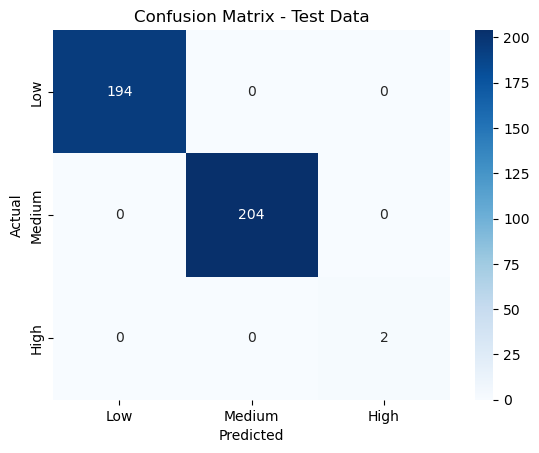

In [24]:
# Predict using trained model
y_pred_test = rf_model.predict(X_test_real)

# Accuracy
accuracy = accuracy_score(y_test_real, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Detailed performance
print("\nClassification Report:\n", classification_report(y_test_real, y_pred_test))

# Optional: Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_real, y_pred_test)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()